Traceback (most recent call last):
  File "results_even_faster.py", line 116, in <module>
    np.save('random_accuracies_1_100_step1_fast_even', tss)
  File "/home/gregoire/anaconda3/envs/pytorch_fury/lib/python3.6/site-packages/numpy/lib/npyio.py", line 517, in save
    fid = open(file, "wb")
FileNotFoundError: [Errno 2] No such file or directory: 'random_accuracies_1_100_step1_fast_even.npy'


In [ ]:
from vogn_utils import sampling_selection_fast,csvDataset,ToTensor
from tf_utils import test_perf,test_perf_py
from mc_dropout import mc_dropout_selection
import torch
import torch.nn as nn
import torch.optim as optim
from vogn import VOGN
from datasets import Dataset
from utils import train_model
from utils import inference
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import torch.nn.functional as F
sns.set()
from torch.utils.data.dataloader import DataLoader
import time
from sklearn.model_selection import train_test_split
from numpy.random import seed
import csv

class SimpleConvNet(nn.Module):
    def __init__(self):
        super(type(self), self).__init__()
        
        self.layer1 = nn.Linear(9, 64)
        self.layer2 = nn.Linear(64, 256)
        self.layer3 = nn.Linear(256, 64)
        self.layer4 = nn.Linear(64, 1)
        
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        out = self.layer4(x)
        return out
    
class SimpleConvNet_dropout(nn.Module):
    def __init__(self,dropout=0.2):
        super(type(self), self).__init__()
        
        self.layer1 = nn.Linear(9, 64)
        self.layer2 = nn.Linear(64, 256)
        self.layer3 = nn.Linear(256, 64)
        self.layer4 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = self.dropout(x)
        x = F.relu(self.layer2(x))
        x = self.dropout(x)
        x = F.relu(self.layer3(x))
        x = self.dropout(x)
        out = self.layer4(x)
        return out    
    
Xtrain = np.load('trainx.npy')
Ytrain = np.load('trainy.npy')*1.
Xtest = np.load('testx.npy')
Ytest = np.load('testy.npy')*1.


for i in range(9):
    Xtrain[:,i]=(Xtrain[:,i] - Xtrain[:,i].mean())/(Xtrain[:,i].std())
    Xtest[:,i]=(Xtest[:,i] - Xtest[:,i].mean())/(Xtest[:,i].std())
Ytrain = Ytrain.reshape(-1,1)
Ytest = Ytest.reshape(-1,1)

rez_={}
rezz_={} 

batch_size_sample = np.ones(261).astype(int)
for i in range(100):
    batch_size_sample[i+110]=3
for i in range(60):
    batch_size_sample[i+200]=5
    
vogn_batch_size = np.ones(261).astype(int)
for i in range(100):
    vogn_batch_size[i+110]=16
for i in range(60):
    vogn_batch_size[i+200]=32
    
nb_ep = np.ones(261).astype(int)*50
for i in range(100):
    nb_ep[i+110]=10
for i in range(60):
    nb_ep[i+200]=5
    
for i in range(5):
    seed(i)
    depart = [np.random.choice(3420)]
    nb_ech = 101
    nb_batch=261
    class_model = SimpleConvNet()
    results = sampling_selection_fast (depart,nb_ech,nb_ep,nb_batch,batch_size_sample,vogn_batch_size,class_model,Xtrain,Ytrain,i)
    rez_["group" + str(i)] = results    
    
for i in range(5):
    doop = []
    for j in rez_["group" + str(i)]:
        model = SimpleConvNet_dropout()
        optimizer = optim.Adam(model.parameters(), weight_decay=0.001)
        doop.append(test_perf_py(model,optimizer,Xtrain[j],Ytrain[j],Xtest,Ytest))
    rezz_["group" + str(i)] = doop    




Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 0 seed 0
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 1 seed 0
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 2 seed 0
Epoch[0]:
Epoch[1]:
Epoch[2]:
Epoch[3]:
Epoch[4]:
Epoch[5]:
Epoch[6]:
Epoch[7]:
Epoch[8]:
Epoch[9]:
Epoch[10]:
Epoch[11]:
Epoch[12]:
Epoch[13]:
Epoch[14]:
Epoch[15]:
Epoch[16]:
Epoch[17]:
Epoch[18]:
Epoch[19]:
Epoch[20]:
Epoch[21]:
Epoch[22]:
Epoch[23]:
Epoch[24]:
Epoch[25]:
Epoch[26]:
Epoch[27]:
Epoch[28]:
Epoch[29]:
Epoch[30]:
Epoch[31]:
Epoch[32]:
Epoch[33]:
Epoch[34]:
Epoch[35]:
Epoch[36]:
Epoch[37]:
Epoch[38]:
Epoch[39]:
Epoch[40]:
Epoch[41]:
Epoch[42]:
Epoch[43]:
Epoch[44]:
Epoch[45]:
Epoch[46]:
Epoch[47]:
Epoch[48]:
Epoch[49]:
batch 3 seed 0
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 4 seed 0
Epoch[0]:
Epoch[1]:
Epoch[2]:
Epoch[3]:
Epoch[4]:
Epoch[5]:
Epoch[6]:
Epoch[7]:
Epoch[8]:
Epoch[9]:
Epoch[10]:
Epoch[11]:
Epoch[12]:
Epoch[13]:
Epoch[14]:
Epoch[15]:
Epoch[16]:
Epoch[17]:
Epoch[18]:
Epoch[19]:
Epoch[20]:
Epoch[21]:
Epoch[22]:
Epoch[23]:
Epoch[24]:


batch 105 seed 0
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 106 seed 0
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 107 seed 0
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 108 seed 0
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 109 seed 0
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 110 seed 0
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 111 seed 0
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 112 seed 0
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 113 seed 0
Epoch[0]:
Epoch[1]:
Epoch[2]:
Epoch[3]:
Epoch[4]:
batch 114 seed 0
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 115 seed 0
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 116 seed 0
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 117 seed 0
Epoch[0]:
Epoch[1]:
Epoch[2]:
Epoch[3]:
batch 118 seed 0
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 119 seed 0
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 120 seed 0
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 121 seed 0
Epoch[0]:
Epoch[1]:
Epoch[2]:
Epoch[3]:
batch 122 seed 0
Epoch[0]:
Epoch[1]:
Epoch[2]:
Epoch[3]:
batch 123 seed 0
Epoch[0]:
Epoch[1]:
Epoch[2]:
Epoch[3]:
Epoch[4]:
batch 124 seed 0
Epoch[0]:
Epoch[1]:


Epoch[17]:
Epoch[18]:
Epoch[19]:
Epoch[20]:
Epoch[21]:
Epoch[22]:
Epoch[23]:
Epoch[24]:
batch 260 seed 0
2151.0244131088257
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 0 seed 1
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 1 seed 1
Epoch[0]:
Epoch[1]:
Epoch[2]:
Epoch[3]:
Epoch[4]:
Epoch[5]:
Epoch[6]:
Epoch[7]:
Epoch[8]:
Epoch[9]:
Epoch[10]:
Epoch[11]:
Epoch[12]:
Epoch[13]:
Epoch[14]:
Epoch[15]:
Epoch[16]:
Epoch[17]:
Epoch[18]:
Epoch[19]:
Epoch[20]:
Epoch[21]:
Epoch[22]:
Epoch[23]:
Epoch[24]:
Epoch[25]:
Epoch[26]:
Epoch[27]:
Epoch[28]:
Epoch[29]:
Epoch[30]:
Epoch[31]:
Epoch[32]:
Epoch[33]:
Epoch[34]:
Epoch[35]:
Epoch[36]:
Epoch[37]:
Epoch[38]:
Epoch[39]:
Epoch[40]:
Epoch[41]:
Epoch[42]:
Epoch[43]:
Epoch[44]:
Epoch[45]:
Epoch[46]:
Epoch[47]:
Epoch[48]:
Epoch[49]:
batch 2 seed 1
Epoch[0]:
Epoch[1]:
Epoch[2]:
Epoch[3]:
Epoch[4]:
Epoch[5]:
Epoch[6]:
Epoch[7]:
Epoch[8]:
Epoch[9]:
Epoch[10]:
Epoch[11]:
Epoch[12]:
Epoch[13]:
Epoch[14]:
Epoch[15]:
Epoch[16]:
Epoch[17]:
Epoch[18]:
Epoch[19]:
Epoch[20]:
Epoch[21]:

batch 87 seed 1
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 88 seed 1
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 89 seed 1
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 90 seed 1
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 91 seed 1
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 92 seed 1
Epoch[0]:
Epoch[1]:
Epoch[2]:
Epoch[3]:
batch 93 seed 1
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 94 seed 1
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 95 seed 1
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 96 seed 1
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 97 seed 1
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 98 seed 1
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 99 seed 1
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 100 seed 1
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 101 seed 1
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 102 seed 1
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 103 seed 1
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 104 seed 1
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 105 seed 1
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 106 seed 1
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 107 seed 1
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 108 seed 1

Epoch[1]:
Epoch[2]:
Epoch[3]:
Epoch[4]:
batch 247 seed 1
Epoch[0]:
Epoch[1]:
Epoch[2]:
Epoch[3]:
batch 248 seed 1
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 249 seed 1
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 250 seed 1
Epoch[0]:
Epoch[1]:
Epoch[2]:
Epoch[3]:
Epoch[4]:
batch 251 seed 1
Epoch[0]:
Epoch[1]:
Epoch[2]:
Epoch[3]:
Epoch[4]:
batch 252 seed 1
Epoch[0]:
Epoch[1]:
Epoch[2]:
Epoch[3]:
batch 253 seed 1
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 254 seed 1
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 255 seed 1
Epoch[0]:
Epoch[1]:
Epoch[2]:
Epoch[3]:
batch 256 seed 1
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 257 seed 1
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 258 seed 1
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 259 seed 1
Epoch[0]:
Epoch[1]:
Epoch[2]:
Epoch[3]:
Epoch[4]:
Epoch[5]:
Epoch[6]:
Epoch[7]:
Epoch[8]:
Epoch[9]:
Epoch[10]:
Epoch[11]:
Epoch[12]:
Epoch[13]:
Epoch[14]:
Epoch[15]:
Epoch[16]:
Epoch[17]:
Epoch[18]:
Epoch[19]:
Epoch[20]:
Epoch[21]:
Epoch[22]:
Epoch[23]:
Epoch[24]:
Epoch[25]:
Epoch[26]:
Epoch[27]:
Epoch[28]:


Epoch[2]:
batch 42 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 43 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 44 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 45 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 46 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 47 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 48 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 49 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 50 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 51 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 52 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 53 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 54 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 55 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 56 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 57 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 58 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 59 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 60 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 61 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 62 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 63 seed 2
Epoch[0]

Epoch[2]:
batch 208 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
Epoch[3]:
Epoch[4]:
batch 209 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 210 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 211 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
Epoch[3]:
Epoch[4]:
batch 212 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
Epoch[3]:
batch 213 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 214 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
Epoch[3]:
batch 215 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
Epoch[3]:
batch 216 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
Epoch[3]:
Epoch[4]:
batch 217 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 218 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 219 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
Epoch[3]:
Epoch[4]:
batch 220 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 221 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
Epoch[3]:
batch 222 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 223 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 224 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 225 seed 2
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 226 seed 2
Epoch[0

Epoch[4]:
Epoch[5]:
Epoch[6]:
Epoch[7]:
Epoch[8]:
Epoch[9]:
Epoch[10]:
Epoch[11]:
Epoch[12]:
Epoch[13]:
Epoch[14]:
Epoch[15]:
Epoch[16]:
Epoch[17]:
Epoch[18]:
Epoch[19]:
Epoch[20]:
Epoch[21]:
Epoch[22]:
Epoch[23]:
Epoch[24]:
Epoch[25]:
Epoch[26]:
Epoch[27]:
Epoch[28]:
Epoch[29]:
Epoch[30]:
Epoch[31]:
Epoch[32]:
Epoch[33]:
Epoch[34]:
Epoch[35]:
Epoch[36]:
Epoch[37]:
Epoch[38]:
Epoch[39]:
Epoch[40]:
Epoch[41]:
Epoch[42]:
Epoch[43]:
Epoch[44]:
Epoch[45]:
Epoch[46]:
Epoch[47]:
Epoch[48]:
Epoch[49]:
batch 9 seed 3
Epoch[0]:
Epoch[1]:
Epoch[2]:
Epoch[3]:
Epoch[4]:
Epoch[5]:
Epoch[6]:
Epoch[7]:
Epoch[8]:
Epoch[9]:
Epoch[10]:
Epoch[11]:
Epoch[12]:
Epoch[13]:
Epoch[14]:
Epoch[15]:
Epoch[16]:
Epoch[17]:
Epoch[18]:
Epoch[19]:
Epoch[20]:
Epoch[21]:
Epoch[22]:
Epoch[23]:
Epoch[24]:
Epoch[25]:
Epoch[26]:
Epoch[27]:
batch 10 seed 3
Epoch[0]:
Epoch[1]:
Epoch[2]:
Epoch[3]:
Epoch[4]:
Epoch[5]:
Epoch[6]:
Epoch[7]:
Epoch[8]:
Epoch[9]:
Epoch[10]:
Epoch[11]:
Epoch[12]:
Epoch[13]:
Epoch[14]:
Epoch[15]:
Epoch

Epoch[1]:
Epoch[2]:
Epoch[3]:
batch 159 seed 3
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 160 seed 3
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 161 seed 3
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 162 seed 3
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 163 seed 3
Epoch[0]:
Epoch[1]:
Epoch[2]:
Epoch[3]:
Epoch[4]:
batch 164 seed 3
Epoch[0]:
Epoch[1]:
Epoch[2]:
Epoch[3]:
batch 165 seed 3
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 166 seed 3
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 167 seed 3
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 168 seed 3
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 169 seed 3
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 170 seed 3
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 171 seed 3
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 172 seed 3
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 173 seed 3
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 174 seed 3
Epoch[0]:
Epoch[1]:
Epoch[2]:
Epoch[3]:
batch 175 seed 3
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 176 seed 3
Epoch[0]:
Epoch[1]:
Epoch[2]:
batch 177 seed 3
Epoch[0]:
Epoch[1]:
Epoch[2]:
Epoch[3]:
batch 178 seed 3
Epoch[0]:


In [3]:
ttt=np.zeros((5,262))
for i in range(5):
    ttt[i] =np.array(rezz_["group" + str(i)])
    
np.save('lol', ttt)

w = csv.writer(open("lold.csv", "w"))
for key, val in rez_.items():
    w.writerow([key, val])


In [4]:
def plot_mean_std(percentages, accuracies, label, log=False, color="blue"):
    mean = np.mean(accuracies,axis=0)
    std  = np.std(accuracies,axis=0)
    if color == "blue":
        plt.plot(percentages,mean, label=label, color='#1f77b4')
        plt.fill_between(percentages, mean + std, mean - std, facecolor='#1f77b4', alpha=0.5)
    else:
        plt.plot(percentages,mean, label=label, color='#ff7f0e')
        plt.fill_between(percentages, mean + std, mean - std, facecolor='#ff7f0e', alpha=0.5)
    if log: plt.xscale('log')
    plt.legend()

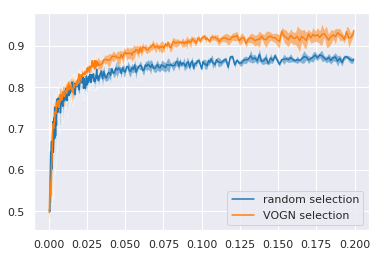

In [16]:
nnn = np.ones(262)
for i in range(261):
    nnn[i+1] = nnn[i] + batch_size_sample[i]
    
plot_mean_std(nnn/3420,ts,'random selection',color='blue')
plot_mean_std(nnn/3420,ttt,'VOGN selection',color='y')
#plt.savefig('graph_1.png')

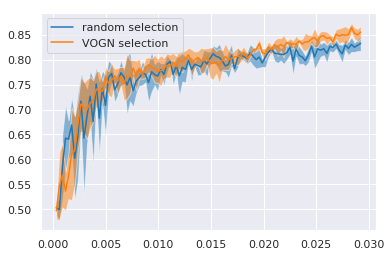

In [17]:
plot_mean_std(nnn[:100]/3420,ts[:,:100],'random selection',color='blue')
plot_mean_std(nnn[:100]/3420,ttt[:,:100],'VOGN selection',color='y')

In [10]:
rez_r={}
rezz_r={}
for i in range(5):
    seed(3+i)
    results =[np.random.choice(3420, j,replace=False) for j in nnn.astype(int)]
    rez_r["group" + str(i)] = results

In [11]:
for i in range(5):
    doop = []
    for j in rez_r["group" + str(i)]:
        model = SimpleConvNet()
        optimizer = optim.Adam(model.parameters(), weight_decay=0.001)
        doop.append(test_perf_py(model,optimizer,Xtrain[j],Ytrain[j],Xtest,Ytest))
    rezz_r["group" + str(i)] = doop

Epoch[0]:
## Epoch[0], Train Loss: 0.599361   &   Train Accuracy: 1.000000
Epoch[1]:
## Epoch[1], Train Loss: 0.571707   &   Train Accuracy: 1.000000
Epoch[2]:
## Epoch[2], Train Loss: 0.547161   &   Train Accuracy: 1.000000
Epoch[3]:
## Epoch[3], Train Loss: 0.525334   &   Train Accuracy: 1.000000
Epoch[4]:
## Epoch[4], Train Loss: 0.503830   &   Train Accuracy: 1.000000
Epoch[5]:
## Epoch[5], Train Loss: 0.481339   &   Train Accuracy: 1.000000
Epoch[6]:
## Epoch[6], Train Loss: 0.457664   &   Train Accuracy: 1.000000
Epoch[7]:
## Epoch[7], Train Loss: 0.433701   &   Train Accuracy: 1.000000
Epoch[8]:
## Epoch[8], Train Loss: 0.409032   &   Train Accuracy: 1.000000
Epoch[9]:
## Epoch[9], Train Loss: 0.382743   &   Train Accuracy: 1.000000
Epoch[10]:
## Epoch[10], Train Loss: 0.355859   &   Train Accuracy: 1.000000
Epoch[11]:
## Epoch[11], Train Loss: 0.328356   &   Train Accuracy: 1.000000
Epoch[12]:
## Epoch[12], Train Loss: 0.300388   &   Train Accuracy: 1.000000
Epoch[13]:
## Epoch

## Epoch[27], Train Loss: 0.049669   &   Train Accuracy: 1.000000
Epoch[28]:
## Epoch[28], Train Loss: 0.040110   &   Train Accuracy: 1.000000
Epoch[29]:
## Epoch[29], Train Loss: 0.032291   &   Train Accuracy: 1.000000
Epoch[30]:
## Epoch[30], Train Loss: 0.025949   &   Train Accuracy: 1.000000
Epoch[31]:
## Epoch[31], Train Loss: 0.020854   &   Train Accuracy: 1.000000
Epoch[32]:
## Epoch[32], Train Loss: 0.016783   &   Train Accuracy: 1.000000
Epoch[33]:
## Epoch[33], Train Loss: 0.013543   &   Train Accuracy: 1.000000
Epoch[34]:
## Epoch[34], Train Loss: 0.010971   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.008935   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.007323   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.006042   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.005025   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.004213   &   Train Accuracy: 1.000000
Epoch[40]:

Epoch[0]:
## Epoch[0], Train Loss: 0.695932   &   Train Accuracy: 0.500000
Epoch[1]:
## Epoch[1], Train Loss: 0.669258   &   Train Accuracy: 1.000000
Epoch[2]:
## Epoch[2], Train Loss: 0.644116   &   Train Accuracy: 1.000000
Epoch[3]:
## Epoch[3], Train Loss: 0.619517   &   Train Accuracy: 0.833333
Epoch[4]:
## Epoch[4], Train Loss: 0.594898   &   Train Accuracy: 0.833333
Epoch[5]:
## Epoch[5], Train Loss: 0.569139   &   Train Accuracy: 0.833333
Epoch[6]:
## Epoch[6], Train Loss: 0.542840   &   Train Accuracy: 0.833333
Epoch[7]:
## Epoch[7], Train Loss: 0.515088   &   Train Accuracy: 0.833333
Epoch[8]:
## Epoch[8], Train Loss: 0.485576   &   Train Accuracy: 0.833333
Epoch[9]:
## Epoch[9], Train Loss: 0.454510   &   Train Accuracy: 0.833333
Epoch[10]:
## Epoch[10], Train Loss: 0.422312   &   Train Accuracy: 0.833333
Epoch[11]:
## Epoch[11], Train Loss: 0.389573   &   Train Accuracy: 0.833333
Epoch[12]:
## Epoch[12], Train Loss: 0.356578   &   Train Accuracy: 0.833333
Epoch[13]:
## Epoch

## Epoch[31], Train Loss: 0.037895   &   Train Accuracy: 1.000000
Epoch[32]:
## Epoch[32], Train Loss: 0.030918   &   Train Accuracy: 1.000000
Epoch[33]:
## Epoch[33], Train Loss: 0.025192   &   Train Accuracy: 1.000000
Epoch[34]:
## Epoch[34], Train Loss: 0.020534   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.016771   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.013734   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.011309   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.009359   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.007788   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.006521   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.005497   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.004671   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.004002   &   Train Accuracy: 1.000000
Epoch[44]:

## Epoch[7], Train Loss: 0.517757   &   Train Accuracy: 0.909091
Epoch[8]:
## Epoch[8], Train Loss: 0.492214   &   Train Accuracy: 0.909091
Epoch[9]:
## Epoch[9], Train Loss: 0.465328   &   Train Accuracy: 0.909091
Epoch[10]:
## Epoch[10], Train Loss: 0.437433   &   Train Accuracy: 0.909091
Epoch[11]:
## Epoch[11], Train Loss: 0.408655   &   Train Accuracy: 0.909091
Epoch[12]:
## Epoch[12], Train Loss: 0.379124   &   Train Accuracy: 0.909091
Epoch[13]:
## Epoch[13], Train Loss: 0.349304   &   Train Accuracy: 0.909091
Epoch[14]:
## Epoch[14], Train Loss: 0.319480   &   Train Accuracy: 0.909091
Epoch[15]:
## Epoch[15], Train Loss: 0.290345   &   Train Accuracy: 0.909091
Epoch[16]:
## Epoch[16], Train Loss: 0.262447   &   Train Accuracy: 0.909091
Epoch[17]:
## Epoch[17], Train Loss: 0.235841   &   Train Accuracy: 0.909091
Epoch[18]:
## Epoch[18], Train Loss: 0.210872   &   Train Accuracy: 0.909091
Epoch[19]:
## Epoch[19], Train Loss: 0.187765   &   Train Accuracy: 0.909091
Epoch[20]:
## E

## Epoch[35], Train Loss: 0.043250   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.037163   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.031781   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.027065   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.023023   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.019590   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.016661   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.014186   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.012090   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.010320   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.008827   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.007576   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.006534   &   Train Accuracy: 1.000000
Epoch[48]:

## Epoch[3], Train Loss: 0.647901   &   Train Accuracy: 0.812500
Epoch[4]:
## Epoch[4], Train Loss: 0.634895   &   Train Accuracy: 0.812500
Epoch[5]:
## Epoch[5], Train Loss: 0.621330   &   Train Accuracy: 0.812500
Epoch[6]:
## Epoch[6], Train Loss: 0.606917   &   Train Accuracy: 0.875000
Epoch[7]:
## Epoch[7], Train Loss: 0.591121   &   Train Accuracy: 0.875000
Epoch[8]:
## Epoch[8], Train Loss: 0.574099   &   Train Accuracy: 0.875000
Epoch[9]:
## Epoch[9], Train Loss: 0.556020   &   Train Accuracy: 0.875000
Epoch[10]:
## Epoch[10], Train Loss: 0.536639   &   Train Accuracy: 0.875000
Epoch[11]:
## Epoch[11], Train Loss: 0.515869   &   Train Accuracy: 0.875000
Epoch[12]:
## Epoch[12], Train Loss: 0.493688   &   Train Accuracy: 0.875000
Epoch[13]:
## Epoch[13], Train Loss: 0.470224   &   Train Accuracy: 0.875000
Epoch[14]:
## Epoch[14], Train Loss: 0.445572   &   Train Accuracy: 0.937500
Epoch[15]:
## Epoch[15], Train Loss: 0.419958   &   Train Accuracy: 0.937500
Epoch[16]:
## Epoch[16]

## Epoch[15], Train Loss: 0.356692   &   Train Accuracy: 0.944444
Epoch[16]:
## Epoch[16], Train Loss: 0.329745   &   Train Accuracy: 0.944444
Epoch[17]:
## Epoch[17], Train Loss: 0.303511   &   Train Accuracy: 0.944444
Epoch[18]:
## Epoch[18], Train Loss: 0.278213   &   Train Accuracy: 0.944444
Epoch[19]:
## Epoch[19], Train Loss: 0.254290   &   Train Accuracy: 0.944444
Epoch[20]:
## Epoch[20], Train Loss: 0.231744   &   Train Accuracy: 0.944444
Epoch[21]:
## Epoch[21], Train Loss: 0.210620   &   Train Accuracy: 0.944444
Epoch[22]:
## Epoch[22], Train Loss: 0.191151   &   Train Accuracy: 0.944444
Epoch[23]:
## Epoch[23], Train Loss: 0.173418   &   Train Accuracy: 0.944444
Epoch[24]:
## Epoch[24], Train Loss: 0.157332   &   Train Accuracy: 0.944444
Epoch[25]:
## Epoch[25], Train Loss: 0.142807   &   Train Accuracy: 0.944444
Epoch[26]:
## Epoch[26], Train Loss: 0.129608   &   Train Accuracy: 0.944444
Epoch[27]:
## Epoch[27], Train Loss: 0.117627   &   Train Accuracy: 0.944444
Epoch[28]:

## Epoch[29], Train Loss: 0.124358   &   Train Accuracy: 1.000000
Epoch[30]:
## Epoch[30], Train Loss: 0.109712   &   Train Accuracy: 1.000000
Epoch[31]:
## Epoch[31], Train Loss: 0.096368   &   Train Accuracy: 1.000000
Epoch[32]:
## Epoch[32], Train Loss: 0.084224   &   Train Accuracy: 1.000000
Epoch[33]:
## Epoch[33], Train Loss: 0.073179   &   Train Accuracy: 1.000000
Epoch[34]:
## Epoch[34], Train Loss: 0.063185   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.054312   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.046496   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.039714   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.033892   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.028897   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.024642   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.021054   &   Train Accuracy: 1.000000
Epoch[42]:

## Epoch[48], Train Loss: 0.003835   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.003429   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.678339   &   Train Accuracy: 0.695652
Epoch[1]:
## Epoch[1], Train Loss: 0.660355   &   Train Accuracy: 0.652174
Epoch[2]:
## Epoch[2], Train Loss: 0.644170   &   Train Accuracy: 0.652174
Epoch[3]:
## Epoch[3], Train Loss: 0.629149   &   Train Accuracy: 0.652174
Epoch[4]:
## Epoch[4], Train Loss: 0.614765   &   Train Accuracy: 0.652174
Epoch[5]:
## Epoch[5], Train Loss: 0.600218   &   Train Accuracy: 0.652174
Epoch[6]:
## Epoch[6], Train Loss: 0.585415   &   Train Accuracy: 0.652174
Epoch[7]:
## Epoch[7], Train Loss: 0.569910   &   Train Accuracy: 0.695652
Epoch[8]:
## Epoch[8], Train Loss: 0.553654   &   Train Accuracy: 0.695652
Epoch[9]:
## Epoch[9], Train Loss: 0.536562   &   Train Accuracy: 0.739130
Epoch[10]:
## Epoch[10], Train Loss: 0.518758   &   Train Accuracy: 0.739130
Epoch[11]:
## Epoch[11], Train

## Epoch[10], Train Loss: 0.557415   &   Train Accuracy: 0.960000
Epoch[11]:
## Epoch[11], Train Loss: 0.537294   &   Train Accuracy: 0.960000
Epoch[12]:
## Epoch[12], Train Loss: 0.515658   &   Train Accuracy: 0.960000
Epoch[13]:
## Epoch[13], Train Loss: 0.492737   &   Train Accuracy: 0.960000
Epoch[14]:
## Epoch[14], Train Loss: 0.468539   &   Train Accuracy: 0.960000
Epoch[15]:
## Epoch[15], Train Loss: 0.443276   &   Train Accuracy: 1.000000
Epoch[16]:
## Epoch[16], Train Loss: 0.417100   &   Train Accuracy: 1.000000
Epoch[17]:
## Epoch[17], Train Loss: 0.390188   &   Train Accuracy: 1.000000
Epoch[18]:
## Epoch[18], Train Loss: 0.362750   &   Train Accuracy: 1.000000
Epoch[19]:
## Epoch[19], Train Loss: 0.335178   &   Train Accuracy: 1.000000
Epoch[20]:
## Epoch[20], Train Loss: 0.307903   &   Train Accuracy: 1.000000
Epoch[21]:
## Epoch[21], Train Loss: 0.281241   &   Train Accuracy: 1.000000
Epoch[22]:
## Epoch[22], Train Loss: 0.255547   &   Train Accuracy: 1.000000
Epoch[23]:

## Epoch[27], Train Loss: 0.164213   &   Train Accuracy: 0.962963
Epoch[28]:
## Epoch[28], Train Loss: 0.146024   &   Train Accuracy: 0.962963
Epoch[29]:
## Epoch[29], Train Loss: 0.129065   &   Train Accuracy: 0.962963
Epoch[30]:
## Epoch[30], Train Loss: 0.113401   &   Train Accuracy: 0.962963
Epoch[31]:
## Epoch[31], Train Loss: 0.099100   &   Train Accuracy: 1.000000
Epoch[32]:
## Epoch[32], Train Loss: 0.086131   &   Train Accuracy: 1.000000
Epoch[33]:
## Epoch[33], Train Loss: 0.074476   &   Train Accuracy: 1.000000
Epoch[34]:
## Epoch[34], Train Loss: 0.064117   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.054968   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.046935   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.039969   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.033936   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.028796   &   Train Accuracy: 1.000000
Epoch[40]:

## Epoch[13], Train Loss: 0.377053   &   Train Accuracy: 0.966667
Epoch[14]:
## Epoch[14], Train Loss: 0.347018   &   Train Accuracy: 1.000000
Epoch[15]:
## Epoch[15], Train Loss: 0.317234   &   Train Accuracy: 1.000000
Epoch[16]:
## Epoch[16], Train Loss: 0.288108   &   Train Accuracy: 1.000000
Epoch[17]:
## Epoch[17], Train Loss: 0.259772   &   Train Accuracy: 1.000000
Epoch[18]:
## Epoch[18], Train Loss: 0.232514   &   Train Accuracy: 1.000000
Epoch[19]:
## Epoch[19], Train Loss: 0.206667   &   Train Accuracy: 1.000000
Epoch[20]:
## Epoch[20], Train Loss: 0.182389   &   Train Accuracy: 1.000000
Epoch[21]:
## Epoch[21], Train Loss: 0.159791   &   Train Accuracy: 1.000000
Epoch[22]:
## Epoch[22], Train Loss: 0.138871   &   Train Accuracy: 1.000000
Epoch[23]:
## Epoch[23], Train Loss: 0.119736   &   Train Accuracy: 1.000000
Epoch[24]:
## Epoch[24], Train Loss: 0.102413   &   Train Accuracy: 1.000000
Epoch[25]:
## Epoch[25], Train Loss: 0.086926   &   Train Accuracy: 1.000000
Epoch[26]:

## Epoch[22], Train Loss: 0.219214   &   Train Accuracy: 0.906250
Epoch[23]:
## Epoch[23], Train Loss: 0.202889   &   Train Accuracy: 0.906250
Epoch[24]:
## Epoch[24], Train Loss: 0.187710   &   Train Accuracy: 0.906250
Epoch[25]:
## Epoch[25], Train Loss: 0.173620   &   Train Accuracy: 0.906250
Epoch[26]:
## Epoch[26], Train Loss: 0.160356   &   Train Accuracy: 0.937500
Epoch[27]:
## Epoch[27], Train Loss: 0.147737   &   Train Accuracy: 0.937500
Epoch[28]:
## Epoch[28], Train Loss: 0.135794   &   Train Accuracy: 0.937500
Epoch[29]:
## Epoch[29], Train Loss: 0.124580   &   Train Accuracy: 0.937500
Epoch[30]:
## Epoch[30], Train Loss: 0.114012   &   Train Accuracy: 0.968750
Epoch[31]:
## Epoch[31], Train Loss: 0.104113   &   Train Accuracy: 0.968750
Epoch[32]:
## Epoch[32], Train Loss: 0.094929   &   Train Accuracy: 0.968750
Epoch[33]:
## Epoch[33], Train Loss: 0.086503   &   Train Accuracy: 0.968750
Epoch[34]:
## Epoch[34], Train Loss: 0.078904   &   Train Accuracy: 0.968750
Epoch[35]:

## Epoch[30], Train Loss: 0.178962   &   Train Accuracy: 0.941176
Epoch[31]:
## Epoch[31], Train Loss: 0.165429   &   Train Accuracy: 0.941176
Epoch[32]:
## Epoch[32], Train Loss: 0.152144   &   Train Accuracy: 0.941176
Epoch[33]:
## Epoch[33], Train Loss: 0.139211   &   Train Accuracy: 0.941176
Epoch[34]:
## Epoch[34], Train Loss: 0.126759   &   Train Accuracy: 0.970588
Epoch[35]:
## Epoch[35], Train Loss: 0.114847   &   Train Accuracy: 0.970588
Epoch[36]:
## Epoch[36], Train Loss: 0.103541   &   Train Accuracy: 0.970588
Epoch[37]:
## Epoch[37], Train Loss: 0.092893   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.083015   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.073934   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.065612   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.058125   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.051458   &   Train Accuracy: 1.000000
Epoch[43]:

## Epoch[21], Train Loss: 0.353544   &   Train Accuracy: 0.891892
Epoch[22]:
## Epoch[22], Train Loss: 0.331124   &   Train Accuracy: 0.891892
Epoch[23]:
## Epoch[23], Train Loss: 0.309193   &   Train Accuracy: 0.918919
Epoch[24]:
## Epoch[24], Train Loss: 0.288015   &   Train Accuracy: 0.918919
Epoch[25]:
## Epoch[25], Train Loss: 0.267598   &   Train Accuracy: 0.918919
Epoch[26]:
## Epoch[26], Train Loss: 0.247925   &   Train Accuracy: 0.918919
Epoch[27]:
## Epoch[27], Train Loss: 0.229155   &   Train Accuracy: 0.918919
Epoch[28]:
## Epoch[28], Train Loss: 0.211438   &   Train Accuracy: 0.918919
Epoch[29]:
## Epoch[29], Train Loss: 0.194772   &   Train Accuracy: 0.945946
Epoch[30]:
## Epoch[30], Train Loss: 0.179120   &   Train Accuracy: 0.945946
Epoch[31]:
## Epoch[31], Train Loss: 0.164493   &   Train Accuracy: 0.945946
Epoch[32]:
## Epoch[32], Train Loss: 0.150829   &   Train Accuracy: 0.945946
Epoch[33]:
## Epoch[33], Train Loss: 0.138042   &   Train Accuracy: 0.945946
Epoch[34]:

## Epoch[10], Train Loss: 0.547729   &   Train Accuracy: 0.900000
Epoch[11]:
## Epoch[11], Train Loss: 0.527354   &   Train Accuracy: 0.900000
Epoch[12]:
## Epoch[12], Train Loss: 0.505664   &   Train Accuracy: 0.925000
Epoch[13]:
## Epoch[13], Train Loss: 0.482659   &   Train Accuracy: 0.925000
Epoch[14]:
## Epoch[14], Train Loss: 0.458543   &   Train Accuracy: 0.925000
Epoch[15]:
## Epoch[15], Train Loss: 0.433555   &   Train Accuracy: 0.925000
Epoch[16]:
## Epoch[16], Train Loss: 0.407981   &   Train Accuracy: 0.925000
Epoch[17]:
## Epoch[17], Train Loss: 0.381992   &   Train Accuracy: 0.925000
Epoch[18]:
## Epoch[18], Train Loss: 0.355971   &   Train Accuracy: 0.925000
Epoch[19]:
## Epoch[19], Train Loss: 0.330212   &   Train Accuracy: 0.925000
Epoch[20]:
## Epoch[20], Train Loss: 0.305070   &   Train Accuracy: 0.925000
Epoch[21]:
## Epoch[21], Train Loss: 0.280861   &   Train Accuracy: 0.925000
Epoch[22]:
## Epoch[22], Train Loss: 0.257848   &   Train Accuracy: 0.925000
Epoch[23]:

## Epoch[0], Train Loss: 0.688419   &   Train Accuracy: 0.488372
Epoch[1]:
## Epoch[1], Train Loss: 0.679756   &   Train Accuracy: 0.790698
Epoch[2]:
## Epoch[2], Train Loss: 0.671834   &   Train Accuracy: 0.813953
Epoch[3]:
## Epoch[3], Train Loss: 0.664318   &   Train Accuracy: 0.883721
Epoch[4]:
## Epoch[4], Train Loss: 0.656860   &   Train Accuracy: 0.883721
Epoch[5]:
## Epoch[5], Train Loss: 0.649010   &   Train Accuracy: 0.883721
Epoch[6]:
## Epoch[6], Train Loss: 0.640520   &   Train Accuracy: 0.883721
Epoch[7]:
## Epoch[7], Train Loss: 0.631067   &   Train Accuracy: 0.860465
Epoch[8]:
## Epoch[8], Train Loss: 0.620514   &   Train Accuracy: 0.860465
Epoch[9]:
## Epoch[9], Train Loss: 0.608937   &   Train Accuracy: 0.860465
Epoch[10]:
## Epoch[10], Train Loss: 0.596264   &   Train Accuracy: 0.837209
Epoch[11]:
## Epoch[11], Train Loss: 0.582455   &   Train Accuracy: 0.813953
Epoch[12]:
## Epoch[12], Train Loss: 0.567551   &   Train Accuracy: 0.790698
Epoch[13]:
## Epoch[13], Trai

## Epoch[41], Train Loss: 0.049188   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.043765   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.038787   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.034271   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.030249   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.026671   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.023536   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.020815   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.018481   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.677668   &   Train Accuracy: 0.543478
Epoch[1]:
## Epoch[1], Train Loss: 0.665958   &   Train Accuracy: 0.695652
Epoch[2]:
## Epoch[2], Train Loss: 0.654589   &   Train Accuracy: 0.782609
Epoch[3]:
## Epoch[3], Train Loss: 0.642906   &   Train Accuracy: 0.869565
Epoch[4]:
## Epoch

## Epoch[27], Train Loss: 0.247244   &   Train Accuracy: 0.895833
Epoch[28]:
## Epoch[28], Train Loss: 0.234176   &   Train Accuracy: 0.895833
Epoch[29]:
## Epoch[29], Train Loss: 0.221663   &   Train Accuracy: 0.895833
Epoch[30]:
## Epoch[30], Train Loss: 0.209608   &   Train Accuracy: 0.916667
Epoch[31]:
## Epoch[31], Train Loss: 0.197920   &   Train Accuracy: 0.937500
Epoch[32]:
## Epoch[32], Train Loss: 0.186571   &   Train Accuracy: 0.958333
Epoch[33]:
## Epoch[33], Train Loss: 0.175529   &   Train Accuracy: 0.958333
Epoch[34]:
## Epoch[34], Train Loss: 0.164784   &   Train Accuracy: 0.958333
Epoch[35]:
## Epoch[35], Train Loss: 0.154268   &   Train Accuracy: 0.958333
Epoch[36]:
## Epoch[36], Train Loss: 0.144017   &   Train Accuracy: 0.958333
Epoch[37]:
## Epoch[37], Train Loss: 0.134068   &   Train Accuracy: 0.958333
Epoch[38]:
## Epoch[38], Train Loss: 0.124400   &   Train Accuracy: 0.958333
Epoch[39]:
## Epoch[39], Train Loss: 0.115128   &   Train Accuracy: 0.958333
Epoch[40]:

## Epoch[36], Train Loss: 0.053725   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.047512   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.042021   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.037148   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.032839   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.029020   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.025632   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.022627   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.019961   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.017608   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.015531   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.013734   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.012182   &   Train Accuracy: 1.000000
Epoch[49]:

## Epoch[47], Train Loss: 0.051545   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.046413   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.041659   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.683720   &   Train Accuracy: 0.679245
Epoch[1]:
## Epoch[1], Train Loss: 0.673227   &   Train Accuracy: 0.792453
Epoch[2]:
## Epoch[2], Train Loss: 0.663087   &   Train Accuracy: 0.811321
Epoch[3]:
## Epoch[3], Train Loss: 0.652962   &   Train Accuracy: 0.830189
Epoch[4]:
## Epoch[4], Train Loss: 0.642415   &   Train Accuracy: 0.849057
Epoch[5]:
## Epoch[5], Train Loss: 0.631040   &   Train Accuracy: 0.849057
Epoch[6]:
## Epoch[6], Train Loss: 0.618648   &   Train Accuracy: 0.849057
Epoch[7]:
## Epoch[7], Train Loss: 0.605125   &   Train Accuracy: 0.849057
Epoch[8]:
## Epoch[8], Train Loss: 0.590466   &   Train Accuracy: 0.849057
Epoch[9]:
## Epoch[9], Train Loss: 0.574740   &   Train Accuracy: 0.849057
Epoch[10]:
## Epoch[10], Train

## Epoch[37], Train Loss: 0.092225   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.082826   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.074128   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.066082   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.058710   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.052036   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.046058   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.040741   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.036023   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.031839   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.028142   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.024891   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.022053   &   Train Accuracy: 1.000000
Epoch[0]:


## Epoch[44], Train Loss: 0.064727   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.059108   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.053885   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.049067   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.044587   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.040449   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.683854   &   Train Accuracy: 0.793103
Epoch[1]:
## Epoch[1], Train Loss: 0.673721   &   Train Accuracy: 0.896552
Epoch[2]:
## Epoch[2], Train Loss: 0.663705   &   Train Accuracy: 0.913793
Epoch[3]:
## Epoch[3], Train Loss: 0.653510   &   Train Accuracy: 0.948276
Epoch[4]:
## Epoch[4], Train Loss: 0.642849   &   Train Accuracy: 0.931034
Epoch[5]:
## Epoch[5], Train Loss: 0.631299   &   Train Accuracy: 0.931034
Epoch[6]:
## Epoch[6], Train Loss: 0.618846   &   Train Accuracy: 0.913793
Epoch[7]:
## Epoch[7], T

## Epoch[39], Train Loss: 0.066153   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.059260   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.053036   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.047481   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.042473   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.037967   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.033956   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.030392   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.027217   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.024403   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.021910   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.682030   &   Train Accuracy: 0.786885
Epoch[1]:
## Epoch[1], Train Loss: 0.673550   &   Train Accuracy: 0.868852
Epoch[2]:
## E

## Epoch[49], Train Loss: 0.060455   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.669396   &   Train Accuracy: 0.539683
Epoch[1]:
## Epoch[1], Train Loss: 0.654515   &   Train Accuracy: 0.539683
Epoch[2]:
## Epoch[2], Train Loss: 0.639107   &   Train Accuracy: 0.587302
Epoch[3]:
## Epoch[3], Train Loss: 0.622809   &   Train Accuracy: 0.634921
Epoch[4]:
## Epoch[4], Train Loss: 0.605453   &   Train Accuracy: 0.730159
Epoch[5]:
## Epoch[5], Train Loss: 0.586824   &   Train Accuracy: 0.761905
Epoch[6]:
## Epoch[6], Train Loss: 0.566904   &   Train Accuracy: 0.825397
Epoch[7]:
## Epoch[7], Train Loss: 0.545670   &   Train Accuracy: 0.841270
Epoch[8]:
## Epoch[8], Train Loss: 0.523206   &   Train Accuracy: 0.857143
Epoch[9]:
## Epoch[9], Train Loss: 0.499628   &   Train Accuracy: 0.888889
Epoch[10]:
## Epoch[10], Train Loss: 0.475104   &   Train Accuracy: 0.888889
Epoch[11]:
## Epoch[11], Train Loss: 0.450036   &   Train Accuracy: 0.888889
Epoch[12]:
## Epoch[12], Train

## Epoch[35], Train Loss: 0.070052   &   Train Accuracy: 0.969231
Epoch[36]:
## Epoch[36], Train Loss: 0.064423   &   Train Accuracy: 0.969231
Epoch[37]:
## Epoch[37], Train Loss: 0.059292   &   Train Accuracy: 0.984615
Epoch[38]:
## Epoch[38], Train Loss: 0.054519   &   Train Accuracy: 0.984615
Epoch[39]:
## Epoch[39], Train Loss: 0.050022   &   Train Accuracy: 0.984615
Epoch[40]:
## Epoch[40], Train Loss: 0.045819   &   Train Accuracy: 0.984615
Epoch[41]:
## Epoch[41], Train Loss: 0.041871   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.038135   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.034631   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.031375   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.028377   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.025644   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.023169   &   Train Accuracy: 1.000000
Epoch[48]:

## Epoch[21], Train Loss: 0.336877   &   Train Accuracy: 0.897059
Epoch[22]:
## Epoch[22], Train Loss: 0.319024   &   Train Accuracy: 0.897059
Epoch[23]:
## Epoch[23], Train Loss: 0.302097   &   Train Accuracy: 0.911765
Epoch[24]:
## Epoch[24], Train Loss: 0.286155   &   Train Accuracy: 0.911765
Epoch[25]:
## Epoch[25], Train Loss: 0.271148   &   Train Accuracy: 0.926471
Epoch[26]:
## Epoch[26], Train Loss: 0.256984   &   Train Accuracy: 0.926471
Epoch[27]:
## Epoch[27], Train Loss: 0.243637   &   Train Accuracy: 0.926471
Epoch[28]:
## Epoch[28], Train Loss: 0.231067   &   Train Accuracy: 0.926471
Epoch[29]:
## Epoch[29], Train Loss: 0.219318   &   Train Accuracy: 0.926471
Epoch[30]:
## Epoch[30], Train Loss: 0.208327   &   Train Accuracy: 0.926471
Epoch[31]:
## Epoch[31], Train Loss: 0.198002   &   Train Accuracy: 0.926471
Epoch[32]:
## Epoch[32], Train Loss: 0.188262   &   Train Accuracy: 0.955882
Epoch[33]:
## Epoch[33], Train Loss: 0.179043   &   Train Accuracy: 0.955882
Epoch[34]:

## Epoch[9], Train Loss: 0.547597   &   Train Accuracy: 0.859155
Epoch[10]:
## Epoch[10], Train Loss: 0.526648   &   Train Accuracy: 0.873239
Epoch[11]:
## Epoch[11], Train Loss: 0.504506   &   Train Accuracy: 0.873239
Epoch[12]:
## Epoch[12], Train Loss: 0.481368   &   Train Accuracy: 0.887324
Epoch[13]:
## Epoch[13], Train Loss: 0.457473   &   Train Accuracy: 0.887324
Epoch[14]:
## Epoch[14], Train Loss: 0.433027   &   Train Accuracy: 0.901408
Epoch[15]:
## Epoch[15], Train Loss: 0.408277   &   Train Accuracy: 0.915493
Epoch[16]:
## Epoch[16], Train Loss: 0.383604   &   Train Accuracy: 0.915493
Epoch[17]:
## Epoch[17], Train Loss: 0.359356   &   Train Accuracy: 0.901408
Epoch[18]:
## Epoch[18], Train Loss: 0.335799   &   Train Accuracy: 0.901408
Epoch[19]:
## Epoch[19], Train Loss: 0.313239   &   Train Accuracy: 0.901408
Epoch[20]:
## Epoch[20], Train Loss: 0.291858   &   Train Accuracy: 0.929577
Epoch[21]:
## Epoch[21], Train Loss: 0.271943   &   Train Accuracy: 0.929577
Epoch[22]:


## Epoch[17], Train Loss: 0.387318   &   Train Accuracy: 0.849315
Epoch[18]:
## Epoch[18], Train Loss: 0.368600   &   Train Accuracy: 0.849315
Epoch[19]:
## Epoch[19], Train Loss: 0.350391   &   Train Accuracy: 0.863014
Epoch[20]:
## Epoch[20], Train Loss: 0.332657   &   Train Accuracy: 0.863014
Epoch[21]:
## Epoch[21], Train Loss: 0.315563   &   Train Accuracy: 0.876712
Epoch[22]:
## Epoch[22], Train Loss: 0.299194   &   Train Accuracy: 0.890411
Epoch[23]:
## Epoch[23], Train Loss: 0.283595   &   Train Accuracy: 0.904110
Epoch[24]:
## Epoch[24], Train Loss: 0.268683   &   Train Accuracy: 0.917808
Epoch[25]:
## Epoch[25], Train Loss: 0.254453   &   Train Accuracy: 0.931507
Epoch[26]:
## Epoch[26], Train Loss: 0.240845   &   Train Accuracy: 0.917808
Epoch[27]:
## Epoch[27], Train Loss: 0.227663   &   Train Accuracy: 0.917808
Epoch[28]:
## Epoch[28], Train Loss: 0.214839   &   Train Accuracy: 0.931507
Epoch[29]:
## Epoch[29], Train Loss: 0.202367   &   Train Accuracy: 0.931507
Epoch[30]:

## Epoch[44], Train Loss: 0.045280   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.040742   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.036689   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.033084   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.029874   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.027019   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.683700   &   Train Accuracy: 0.684211
Epoch[1]:
## Epoch[1], Train Loss: 0.671937   &   Train Accuracy: 0.750000
Epoch[2]:
## Epoch[2], Train Loss: 0.660437   &   Train Accuracy: 0.776316
Epoch[3]:
## Epoch[3], Train Loss: 0.648506   &   Train Accuracy: 0.789474
Epoch[4]:
## Epoch[4], Train Loss: 0.635640   &   Train Accuracy: 0.802632
Epoch[5]:
## Epoch[5], Train Loss: 0.621747   &   Train Accuracy: 0.815789
Epoch[6]:
## Epoch[6], Train Loss: 0.606820   &   Train Accuracy: 0.815789
Epoch[7]:
## Epoch[7], T

## Epoch[29], Train Loss: 0.122676   &   Train Accuracy: 0.961538
Epoch[30]:
## Epoch[30], Train Loss: 0.111526   &   Train Accuracy: 0.961538
Epoch[31]:
## Epoch[31], Train Loss: 0.100994   &   Train Accuracy: 0.961538
Epoch[32]:
## Epoch[32], Train Loss: 0.091093   &   Train Accuracy: 0.987179
Epoch[33]:
## Epoch[33], Train Loss: 0.081837   &   Train Accuracy: 0.987179
Epoch[34]:
## Epoch[34], Train Loss: 0.073254   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.065387   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.058192   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.051652   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.045738   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.040436   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.035722   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.031526   &   Train Accuracy: 1.000000
Epoch[42]:

## Epoch[1], Train Loss: 0.668600   &   Train Accuracy: 0.864198
Epoch[2]:
## Epoch[2], Train Loss: 0.656968   &   Train Accuracy: 0.876543
Epoch[3]:
## Epoch[3], Train Loss: 0.644385   &   Train Accuracy: 0.888889
Epoch[4]:
## Epoch[4], Train Loss: 0.630501   &   Train Accuracy: 0.901235
Epoch[5]:
## Epoch[5], Train Loss: 0.615535   &   Train Accuracy: 0.901235
Epoch[6]:
## Epoch[6], Train Loss: 0.599239   &   Train Accuracy: 0.888889
Epoch[7]:
## Epoch[7], Train Loss: 0.581897   &   Train Accuracy: 0.888889
Epoch[8]:
## Epoch[8], Train Loss: 0.563253   &   Train Accuracy: 0.888889
Epoch[9]:
## Epoch[9], Train Loss: 0.543233   &   Train Accuracy: 0.888889
Epoch[10]:
## Epoch[10], Train Loss: 0.521952   &   Train Accuracy: 0.888889
Epoch[11]:
## Epoch[11], Train Loss: 0.499599   &   Train Accuracy: 0.888889
Epoch[12]:
## Epoch[12], Train Loss: 0.476455   &   Train Accuracy: 0.888889
Epoch[13]:
## Epoch[13], Train Loss: 0.452656   &   Train Accuracy: 0.876543
Epoch[14]:
## Epoch[14], Tr

## Epoch[22], Train Loss: 0.306152   &   Train Accuracy: 0.903614
Epoch[23]:
## Epoch[23], Train Loss: 0.291928   &   Train Accuracy: 0.903614
Epoch[24]:
## Epoch[24], Train Loss: 0.279391   &   Train Accuracy: 0.891566
Epoch[25]:
## Epoch[25], Train Loss: 0.268341   &   Train Accuracy: 0.891566
Epoch[26]:
## Epoch[26], Train Loss: 0.258636   &   Train Accuracy: 0.891566
Epoch[27]:
## Epoch[27], Train Loss: 0.249985   &   Train Accuracy: 0.891566
Epoch[28]:
## Epoch[28], Train Loss: 0.242023   &   Train Accuracy: 0.891566
Epoch[29]:
## Epoch[29], Train Loss: 0.234512   &   Train Accuracy: 0.891566
Epoch[30]:
## Epoch[30], Train Loss: 0.227349   &   Train Accuracy: 0.891566
Epoch[31]:
## Epoch[31], Train Loss: 0.220322   &   Train Accuracy: 0.915663
Epoch[32]:
## Epoch[32], Train Loss: 0.213245   &   Train Accuracy: 0.915663
Epoch[33]:
## Epoch[33], Train Loss: 0.206153   &   Train Accuracy: 0.915663
Epoch[34]:
## Epoch[34], Train Loss: 0.199119   &   Train Accuracy: 0.927711
Epoch[35]:

## Epoch[49], Train Loss: 0.035613   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.684167   &   Train Accuracy: 0.755814
Epoch[1]:
## Epoch[1], Train Loss: 0.673427   &   Train Accuracy: 0.837209
Epoch[2]:
## Epoch[2], Train Loss: 0.662577   &   Train Accuracy: 0.825581
Epoch[3]:
## Epoch[3], Train Loss: 0.651332   &   Train Accuracy: 0.837209
Epoch[4]:
## Epoch[4], Train Loss: 0.639229   &   Train Accuracy: 0.848837
Epoch[5]:
## Epoch[5], Train Loss: 0.626076   &   Train Accuracy: 0.860465
Epoch[6]:
## Epoch[6], Train Loss: 0.611890   &   Train Accuracy: 0.860465
Epoch[7]:
## Epoch[7], Train Loss: 0.596512   &   Train Accuracy: 0.848837
Epoch[8]:
## Epoch[8], Train Loss: 0.579802   &   Train Accuracy: 0.848837
Epoch[9]:
## Epoch[9], Train Loss: 0.561685   &   Train Accuracy: 0.848837
Epoch[10]:
## Epoch[10], Train Loss: 0.542373   &   Train Accuracy: 0.837209
Epoch[11]:
## Epoch[11], Train Loss: 0.522093   &   Train Accuracy: 0.848837
Epoch[12]:
## Epoch[12], Train

## Epoch[24], Train Loss: 0.215496   &   Train Accuracy: 0.954545
Epoch[25]:
## Epoch[25], Train Loss: 0.200809   &   Train Accuracy: 0.954545
Epoch[26]:
## Epoch[26], Train Loss: 0.187238   &   Train Accuracy: 0.954545
Epoch[27]:
## Epoch[27], Train Loss: 0.174810   &   Train Accuracy: 0.954545
Epoch[28]:
## Epoch[28], Train Loss: 0.163414   &   Train Accuracy: 0.954545
Epoch[29]:
## Epoch[29], Train Loss: 0.152986   &   Train Accuracy: 0.954545
Epoch[30]:
## Epoch[30], Train Loss: 0.143412   &   Train Accuracy: 0.954545
Epoch[31]:
## Epoch[31], Train Loss: 0.134606   &   Train Accuracy: 0.954545
Epoch[32]:
## Epoch[32], Train Loss: 0.126440   &   Train Accuracy: 0.965909
Epoch[33]:
## Epoch[33], Train Loss: 0.118888   &   Train Accuracy: 0.965909
Epoch[34]:
## Epoch[34], Train Loss: 0.111879   &   Train Accuracy: 0.965909
Epoch[35]:
## Epoch[35], Train Loss: 0.105276   &   Train Accuracy: 0.965909
Epoch[36]:
## Epoch[36], Train Loss: 0.098955   &   Train Accuracy: 0.977273
Epoch[37]:

## Epoch[33], Train Loss: 0.173555   &   Train Accuracy: 0.911111
Epoch[34]:
## Epoch[34], Train Loss: 0.164551   &   Train Accuracy: 0.922222
Epoch[35]:
## Epoch[35], Train Loss: 0.155588   &   Train Accuracy: 0.922222
Epoch[36]:
## Epoch[36], Train Loss: 0.146759   &   Train Accuracy: 0.933333
Epoch[37]:
## Epoch[37], Train Loss: 0.138097   &   Train Accuracy: 0.944444
Epoch[38]:
## Epoch[38], Train Loss: 0.129652   &   Train Accuracy: 0.955556
Epoch[39]:
## Epoch[39], Train Loss: 0.121440   &   Train Accuracy: 0.955556
Epoch[40]:
## Epoch[40], Train Loss: 0.113546   &   Train Accuracy: 0.977778
Epoch[41]:
## Epoch[41], Train Loss: 0.105939   &   Train Accuracy: 0.977778
Epoch[42]:
## Epoch[42], Train Loss: 0.098621   &   Train Accuracy: 0.988889
Epoch[43]:
## Epoch[43], Train Loss: 0.091609   &   Train Accuracy: 0.988889
Epoch[44]:
## Epoch[44], Train Loss: 0.084952   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.078642   &   Train Accuracy: 1.000000
Epoch[46]:

## Epoch[2], Train Loss: 0.654220   &   Train Accuracy: 0.827957
Epoch[3]:
## Epoch[3], Train Loss: 0.639859   &   Train Accuracy: 0.870968
Epoch[4]:
## Epoch[4], Train Loss: 0.624575   &   Train Accuracy: 0.881720
Epoch[5]:
## Epoch[5], Train Loss: 0.608163   &   Train Accuracy: 0.881720
Epoch[6]:
## Epoch[6], Train Loss: 0.590532   &   Train Accuracy: 0.913978
Epoch[7]:
## Epoch[7], Train Loss: 0.571598   &   Train Accuracy: 0.913978
Epoch[8]:
## Epoch[8], Train Loss: 0.551349   &   Train Accuracy: 0.913978
Epoch[9]:
## Epoch[9], Train Loss: 0.529800   &   Train Accuracy: 0.903226
Epoch[10]:
## Epoch[10], Train Loss: 0.507200   &   Train Accuracy: 0.903226
Epoch[11]:
## Epoch[11], Train Loss: 0.483639   &   Train Accuracy: 0.903226
Epoch[12]:
## Epoch[12], Train Loss: 0.459329   &   Train Accuracy: 0.903226
Epoch[13]:
## Epoch[13], Train Loss: 0.434425   &   Train Accuracy: 0.903226
Epoch[14]:
## Epoch[14], Train Loss: 0.409296   &   Train Accuracy: 0.892473
Epoch[15]:
## Epoch[15], 

## Epoch[19], Train Loss: 0.347199   &   Train Accuracy: 0.884211
Epoch[20]:
## Epoch[20], Train Loss: 0.328761   &   Train Accuracy: 0.884211
Epoch[21]:
## Epoch[21], Train Loss: 0.311756   &   Train Accuracy: 0.884211
Epoch[22]:
## Epoch[22], Train Loss: 0.296190   &   Train Accuracy: 0.884211
Epoch[23]:
## Epoch[23], Train Loss: 0.281958   &   Train Accuracy: 0.894737
Epoch[24]:
## Epoch[24], Train Loss: 0.269014   &   Train Accuracy: 0.894737
Epoch[25]:
## Epoch[25], Train Loss: 0.257235   &   Train Accuracy: 0.915789
Epoch[26]:
## Epoch[26], Train Loss: 0.246455   &   Train Accuracy: 0.915789
Epoch[27]:
## Epoch[27], Train Loss: 0.236475   &   Train Accuracy: 0.915789
Epoch[28]:
## Epoch[28], Train Loss: 0.227149   &   Train Accuracy: 0.915789
Epoch[29]:
## Epoch[29], Train Loss: 0.218332   &   Train Accuracy: 0.915789
Epoch[30]:
## Epoch[30], Train Loss: 0.209837   &   Train Accuracy: 0.915789
Epoch[31]:
## Epoch[31], Train Loss: 0.201578   &   Train Accuracy: 0.915789
Epoch[32]:

## Epoch[29], Train Loss: 0.226289   &   Train Accuracy: 0.917526
Epoch[30]:
## Epoch[30], Train Loss: 0.218205   &   Train Accuracy: 0.917526
Epoch[31]:
## Epoch[31], Train Loss: 0.210539   &   Train Accuracy: 0.917526
Epoch[32]:
## Epoch[32], Train Loss: 0.203137   &   Train Accuracy: 0.917526
Epoch[33]:
## Epoch[33], Train Loss: 0.195886   &   Train Accuracy: 0.917526
Epoch[34]:
## Epoch[34], Train Loss: 0.188757   &   Train Accuracy: 0.917526
Epoch[35]:
## Epoch[35], Train Loss: 0.181693   &   Train Accuracy: 0.927835
Epoch[36]:
## Epoch[36], Train Loss: 0.174698   &   Train Accuracy: 0.927835
Epoch[37]:
## Epoch[37], Train Loss: 0.167733   &   Train Accuracy: 0.938144
Epoch[38]:
## Epoch[38], Train Loss: 0.160747   &   Train Accuracy: 0.938144
Epoch[39]:
## Epoch[39], Train Loss: 0.153772   &   Train Accuracy: 0.938144
Epoch[40]:
## Epoch[40], Train Loss: 0.146807   &   Train Accuracy: 0.938144
Epoch[41]:
## Epoch[41], Train Loss: 0.139830   &   Train Accuracy: 0.927835
Epoch[42]:

## Epoch[39], Train Loss: 0.148292   &   Train Accuracy: 0.959596
Epoch[40]:
## Epoch[40], Train Loss: 0.140550   &   Train Accuracy: 0.959596
Epoch[41]:
## Epoch[41], Train Loss: 0.133007   &   Train Accuracy: 0.969697
Epoch[42]:
## Epoch[42], Train Loss: 0.125655   &   Train Accuracy: 0.979798
Epoch[43]:
## Epoch[43], Train Loss: 0.118485   &   Train Accuracy: 0.979798
Epoch[44]:
## Epoch[44], Train Loss: 0.111450   &   Train Accuracy: 0.979798
Epoch[45]:
## Epoch[45], Train Loss: 0.104531   &   Train Accuracy: 0.979798
Epoch[46]:
## Epoch[46], Train Loss: 0.097798   &   Train Accuracy: 0.989899
Epoch[47]:
## Epoch[47], Train Loss: 0.091257   &   Train Accuracy: 0.989899
Epoch[48]:
## Epoch[48], Train Loss: 0.084870   &   Train Accuracy: 0.989899
Epoch[49]:
## Epoch[49], Train Loss: 0.078686   &   Train Accuracy: 0.989899
Epoch[0]:
## Epoch[0], Train Loss: 0.685821   &   Train Accuracy: 0.520000
Epoch[1]:
## Epoch[1], Train Loss: 0.676710   &   Train Accuracy: 0.520000
Epoch[2]:
## E

## Epoch[2], Train Loss: 0.661041   &   Train Accuracy: 0.833333
Epoch[3]:
## Epoch[3], Train Loss: 0.650315   &   Train Accuracy: 0.843137
Epoch[4]:
## Epoch[4], Train Loss: 0.638887   &   Train Accuracy: 0.852941
Epoch[5]:
## Epoch[5], Train Loss: 0.626480   &   Train Accuracy: 0.872549
Epoch[6]:
## Epoch[6], Train Loss: 0.612967   &   Train Accuracy: 0.872549
Epoch[7]:
## Epoch[7], Train Loss: 0.598286   &   Train Accuracy: 0.882353
Epoch[8]:
## Epoch[8], Train Loss: 0.582374   &   Train Accuracy: 0.882353
Epoch[9]:
## Epoch[9], Train Loss: 0.565119   &   Train Accuracy: 0.882353
Epoch[10]:
## Epoch[10], Train Loss: 0.546638   &   Train Accuracy: 0.882353
Epoch[11]:
## Epoch[11], Train Loss: 0.527012   &   Train Accuracy: 0.882353
Epoch[12]:
## Epoch[12], Train Loss: 0.506439   &   Train Accuracy: 0.882353
Epoch[13]:
## Epoch[13], Train Loss: 0.485135   &   Train Accuracy: 0.882353
Epoch[14]:
## Epoch[14], Train Loss: 0.463216   &   Train Accuracy: 0.882353
Epoch[15]:
## Epoch[15], 

## Epoch[16], Train Loss: 0.406434   &   Train Accuracy: 0.836538
Epoch[17]:
## Epoch[17], Train Loss: 0.387489   &   Train Accuracy: 0.826923
Epoch[18]:
## Epoch[18], Train Loss: 0.369830   &   Train Accuracy: 0.836538
Epoch[19]:
## Epoch[19], Train Loss: 0.353554   &   Train Accuracy: 0.836538
Epoch[20]:
## Epoch[20], Train Loss: 0.338727   &   Train Accuracy: 0.836538
Epoch[21]:
## Epoch[21], Train Loss: 0.325255   &   Train Accuracy: 0.836538
Epoch[22]:
## Epoch[22], Train Loss: 0.313038   &   Train Accuracy: 0.836538
Epoch[23]:
## Epoch[23], Train Loss: 0.301896   &   Train Accuracy: 0.836538
Epoch[24]:
## Epoch[24], Train Loss: 0.291617   &   Train Accuracy: 0.846154
Epoch[25]:
## Epoch[25], Train Loss: 0.281927   &   Train Accuracy: 0.846154
Epoch[26]:
## Epoch[26], Train Loss: 0.272649   &   Train Accuracy: 0.865385
Epoch[27]:
## Epoch[27], Train Loss: 0.263668   &   Train Accuracy: 0.875000
Epoch[28]:
## Epoch[28], Train Loss: 0.254828   &   Train Accuracy: 0.884615
Epoch[29]:

## Epoch[29], Train Loss: 0.171138   &   Train Accuracy: 0.933962
Epoch[30]:
## Epoch[30], Train Loss: 0.160480   &   Train Accuracy: 0.933962
Epoch[31]:
## Epoch[31], Train Loss: 0.150569   &   Train Accuracy: 0.952830
Epoch[32]:
## Epoch[32], Train Loss: 0.141368   &   Train Accuracy: 0.962264
Epoch[33]:
## Epoch[33], Train Loss: 0.132784   &   Train Accuracy: 0.962264
Epoch[34]:
## Epoch[34], Train Loss: 0.124758   &   Train Accuracy: 0.962264
Epoch[35]:
## Epoch[35], Train Loss: 0.117218   &   Train Accuracy: 0.962264
Epoch[36]:
## Epoch[36], Train Loss: 0.110076   &   Train Accuracy: 0.971698
Epoch[37]:
## Epoch[37], Train Loss: 0.103278   &   Train Accuracy: 0.971698
Epoch[38]:
## Epoch[38], Train Loss: 0.096759   &   Train Accuracy: 0.981132
Epoch[39]:
## Epoch[39], Train Loss: 0.090617   &   Train Accuracy: 0.981132
Epoch[40]:
## Epoch[40], Train Loss: 0.084805   &   Train Accuracy: 0.971698
Epoch[41]:
## Epoch[41], Train Loss: 0.079373   &   Train Accuracy: 0.971698
Epoch[42]:

## Epoch[41], Train Loss: 0.127950   &   Train Accuracy: 0.962963
Epoch[42]:
## Epoch[42], Train Loss: 0.120737   &   Train Accuracy: 0.962963
Epoch[43]:
## Epoch[43], Train Loss: 0.113672   &   Train Accuracy: 0.962963
Epoch[44]:
## Epoch[44], Train Loss: 0.106790   &   Train Accuracy: 0.981481
Epoch[45]:
## Epoch[45], Train Loss: 0.100144   &   Train Accuracy: 0.981481
Epoch[46]:
## Epoch[46], Train Loss: 0.093775   &   Train Accuracy: 0.981481
Epoch[47]:
## Epoch[47], Train Loss: 0.087669   &   Train Accuracy: 0.990741
Epoch[48]:
## Epoch[48], Train Loss: 0.081772   &   Train Accuracy: 0.990741
Epoch[49]:
## Epoch[49], Train Loss: 0.076150   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.682904   &   Train Accuracy: 0.541284
Epoch[1]:
## Epoch[1], Train Loss: 0.673456   &   Train Accuracy: 0.541284
Epoch[2]:
## Epoch[2], Train Loss: 0.664724   &   Train Accuracy: 0.541284
Epoch[3]:
## Epoch[3], Train Loss: 0.655800   &   Train Accuracy: 0.568807
Epoch[4]:
## Epoch

## Epoch[4], Train Loss: 0.638368   &   Train Accuracy: 0.828829
Epoch[5]:
## Epoch[5], Train Loss: 0.624839   &   Train Accuracy: 0.864865
Epoch[6]:
## Epoch[6], Train Loss: 0.609988   &   Train Accuracy: 0.828829
Epoch[7]:
## Epoch[7], Train Loss: 0.593951   &   Train Accuracy: 0.810811
Epoch[8]:
## Epoch[8], Train Loss: 0.576706   &   Train Accuracy: 0.801802
Epoch[9]:
## Epoch[9], Train Loss: 0.558463   &   Train Accuracy: 0.801802
Epoch[10]:
## Epoch[10], Train Loss: 0.539317   &   Train Accuracy: 0.801802
Epoch[11]:
## Epoch[11], Train Loss: 0.519399   &   Train Accuracy: 0.801802
Epoch[12]:
## Epoch[12], Train Loss: 0.498845   &   Train Accuracy: 0.801802
Epoch[13]:
## Epoch[13], Train Loss: 0.477935   &   Train Accuracy: 0.801802
Epoch[14]:
## Epoch[14], Train Loss: 0.456891   &   Train Accuracy: 0.801802
Epoch[15]:
## Epoch[15], Train Loss: 0.436154   &   Train Accuracy: 0.801802
Epoch[16]:
## Epoch[16], Train Loss: 0.416005   &   Train Accuracy: 0.819820
Epoch[17]:
## Epoch[1

## Epoch[32], Train Loss: 0.181628   &   Train Accuracy: 0.948718
Epoch[33]:
## Epoch[33], Train Loss: 0.174208   &   Train Accuracy: 0.948718
Epoch[34]:
## Epoch[34], Train Loss: 0.166663   &   Train Accuracy: 0.948718
Epoch[35]:
## Epoch[35], Train Loss: 0.159026   &   Train Accuracy: 0.948718
Epoch[36]:
## Epoch[36], Train Loss: 0.151298   &   Train Accuracy: 0.957265
Epoch[37]:
## Epoch[37], Train Loss: 0.143547   &   Train Accuracy: 0.957265
Epoch[38]:
## Epoch[38], Train Loss: 0.135861   &   Train Accuracy: 0.965812
Epoch[39]:
## Epoch[39], Train Loss: 0.128383   &   Train Accuracy: 0.965812
Epoch[40]:
## Epoch[40], Train Loss: 0.121161   &   Train Accuracy: 0.965812
Epoch[41]:
## Epoch[41], Train Loss: 0.114252   &   Train Accuracy: 0.965812
Epoch[42]:
## Epoch[42], Train Loss: 0.107663   &   Train Accuracy: 0.974359
Epoch[43]:
## Epoch[43], Train Loss: 0.101401   &   Train Accuracy: 0.982906
Epoch[44]:
## Epoch[44], Train Loss: 0.095411   &   Train Accuracy: 0.982906
Epoch[45]:

## Epoch[47], Train Loss: 0.090813   &   Train Accuracy: 0.975610
Epoch[48]:
## Epoch[48], Train Loss: 0.086246   &   Train Accuracy: 0.975610
Epoch[49]:
## Epoch[49], Train Loss: 0.081811   &   Train Accuracy: 0.975610
Epoch[0]:
## Epoch[0], Train Loss: 0.677730   &   Train Accuracy: 0.642857
Epoch[1]:
## Epoch[1], Train Loss: 0.665073   &   Train Accuracy: 0.785714
Epoch[2]:
## Epoch[2], Train Loss: 0.652510   &   Train Accuracy: 0.865079
Epoch[3]:
## Epoch[3], Train Loss: 0.639566   &   Train Accuracy: 0.880952
Epoch[4]:
## Epoch[4], Train Loss: 0.625773   &   Train Accuracy: 0.904762
Epoch[5]:
## Epoch[5], Train Loss: 0.610835   &   Train Accuracy: 0.920635
Epoch[6]:
## Epoch[6], Train Loss: 0.594712   &   Train Accuracy: 0.888889
Epoch[7]:
## Epoch[7], Train Loss: 0.577243   &   Train Accuracy: 0.904762
Epoch[8]:
## Epoch[8], Train Loss: 0.558392   &   Train Accuracy: 0.896825
Epoch[9]:
## Epoch[9], Train Loss: 0.538192   &   Train Accuracy: 0.888889
Epoch[10]:
## Epoch[10], Train

## Epoch[31], Train Loss: 0.211569   &   Train Accuracy: 0.916667
Epoch[32]:
## Epoch[32], Train Loss: 0.203509   &   Train Accuracy: 0.931818
Epoch[33]:
## Epoch[33], Train Loss: 0.195768   &   Train Accuracy: 0.939394
Epoch[34]:
## Epoch[34], Train Loss: 0.188252   &   Train Accuracy: 0.946970
Epoch[35]:
## Epoch[35], Train Loss: 0.180814   &   Train Accuracy: 0.946970
Epoch[36]:
## Epoch[36], Train Loss: 0.173416   &   Train Accuracy: 0.946970
Epoch[37]:
## Epoch[37], Train Loss: 0.165993   &   Train Accuracy: 0.954545
Epoch[38]:
## Epoch[38], Train Loss: 0.158570   &   Train Accuracy: 0.954545
Epoch[39]:
## Epoch[39], Train Loss: 0.151278   &   Train Accuracy: 0.954545
Epoch[40]:
## Epoch[40], Train Loss: 0.144025   &   Train Accuracy: 0.954545
Epoch[41]:
## Epoch[41], Train Loss: 0.136845   &   Train Accuracy: 0.954545
Epoch[42]:
## Epoch[42], Train Loss: 0.129752   &   Train Accuracy: 0.954545
Epoch[43]:
## Epoch[43], Train Loss: 0.122821   &   Train Accuracy: 0.954545
Epoch[44]:

## Epoch[9], Train Loss: 0.549341   &   Train Accuracy: 0.794326
Epoch[10]:
## Epoch[10], Train Loss: 0.530481   &   Train Accuracy: 0.801418
Epoch[11]:
## Epoch[11], Train Loss: 0.510762   &   Train Accuracy: 0.808511
Epoch[12]:
## Epoch[12], Train Loss: 0.490488   &   Train Accuracy: 0.829787
Epoch[13]:
## Epoch[13], Train Loss: 0.469875   &   Train Accuracy: 0.836879
Epoch[14]:
## Epoch[14], Train Loss: 0.449224   &   Train Accuracy: 0.843972
Epoch[15]:
## Epoch[15], Train Loss: 0.428803   &   Train Accuracy: 0.843972
Epoch[16]:
## Epoch[16], Train Loss: 0.408883   &   Train Accuracy: 0.851064
Epoch[17]:
## Epoch[17], Train Loss: 0.389627   &   Train Accuracy: 0.858156
Epoch[18]:
## Epoch[18], Train Loss: 0.371379   &   Train Accuracy: 0.858156
Epoch[19]:
## Epoch[19], Train Loss: 0.354337   &   Train Accuracy: 0.865248
Epoch[20]:
## Epoch[20], Train Loss: 0.338667   &   Train Accuracy: 0.858156
Epoch[21]:
## Epoch[21], Train Loss: 0.324446   &   Train Accuracy: 0.865248
Epoch[22]:


## Epoch[37], Train Loss: 0.162903   &   Train Accuracy: 0.918367
Epoch[38]:
## Epoch[38], Train Loss: 0.157398   &   Train Accuracy: 0.918367
Epoch[39]:
## Epoch[39], Train Loss: 0.151871   &   Train Accuracy: 0.918367
Epoch[40]:
## Epoch[40], Train Loss: 0.146369   &   Train Accuracy: 0.918367
Epoch[41]:
## Epoch[41], Train Loss: 0.140981   &   Train Accuracy: 0.918367
Epoch[42]:
## Epoch[42], Train Loss: 0.135657   &   Train Accuracy: 0.925170
Epoch[43]:
## Epoch[43], Train Loss: 0.130473   &   Train Accuracy: 0.925170
Epoch[44]:
## Epoch[44], Train Loss: 0.125458   &   Train Accuracy: 0.925170
Epoch[45]:
## Epoch[45], Train Loss: 0.120659   &   Train Accuracy: 0.952381
Epoch[46]:
## Epoch[46], Train Loss: 0.116061   &   Train Accuracy: 0.959184
Epoch[47]:
## Epoch[47], Train Loss: 0.111595   &   Train Accuracy: 0.959184
Epoch[48]:
## Epoch[48], Train Loss: 0.107266   &   Train Accuracy: 0.959184
Epoch[49]:
## Epoch[49], Train Loss: 0.103057   &   Train Accuracy: 0.965986
Epoch[0]:


## Epoch[6], Train Loss: 0.602361   &   Train Accuracy: 0.839744
Epoch[7]:
## Epoch[7], Train Loss: 0.584049   &   Train Accuracy: 0.826923
Epoch[8]:
## Epoch[8], Train Loss: 0.564525   &   Train Accuracy: 0.826923
Epoch[9]:
## Epoch[9], Train Loss: 0.543865   &   Train Accuracy: 0.833333
Epoch[10]:
## Epoch[10], Train Loss: 0.522292   &   Train Accuracy: 0.839744
Epoch[11]:
## Epoch[11], Train Loss: 0.499931   &   Train Accuracy: 0.846154
Epoch[12]:
## Epoch[12], Train Loss: 0.477125   &   Train Accuracy: 0.846154
Epoch[13]:
## Epoch[13], Train Loss: 0.454145   &   Train Accuracy: 0.846154
Epoch[14]:
## Epoch[14], Train Loss: 0.431214   &   Train Accuracy: 0.852564
Epoch[15]:
## Epoch[15], Train Loss: 0.408713   &   Train Accuracy: 0.858974
Epoch[16]:
## Epoch[16], Train Loss: 0.386845   &   Train Accuracy: 0.865385
Epoch[17]:
## Epoch[17], Train Loss: 0.365873   &   Train Accuracy: 0.871795
Epoch[18]:
## Epoch[18], Train Loss: 0.346037   &   Train Accuracy: 0.871795
Epoch[19]:
## Epo

## Epoch[24], Train Loss: 0.344848   &   Train Accuracy: 0.845679
Epoch[25]:
## Epoch[25], Train Loss: 0.336317   &   Train Accuracy: 0.845679
Epoch[26]:
## Epoch[26], Train Loss: 0.328102   &   Train Accuracy: 0.851852
Epoch[27]:
## Epoch[27], Train Loss: 0.320011   &   Train Accuracy: 0.858025
Epoch[28]:
## Epoch[28], Train Loss: 0.311950   &   Train Accuracy: 0.864198
Epoch[29]:
## Epoch[29], Train Loss: 0.303914   &   Train Accuracy: 0.870370
Epoch[30]:
## Epoch[30], Train Loss: 0.295925   &   Train Accuracy: 0.870370
Epoch[31]:
## Epoch[31], Train Loss: 0.287943   &   Train Accuracy: 0.870370
Epoch[32]:
## Epoch[32], Train Loss: 0.279938   &   Train Accuracy: 0.870370
Epoch[33]:
## Epoch[33], Train Loss: 0.271917   &   Train Accuracy: 0.870370
Epoch[34]:
## Epoch[34], Train Loss: 0.263938   &   Train Accuracy: 0.876543
Epoch[35]:
## Epoch[35], Train Loss: 0.256012   &   Train Accuracy: 0.876543
Epoch[36]:
## Epoch[36], Train Loss: 0.248133   &   Train Accuracy: 0.888889
Epoch[37]:

## Epoch[47], Train Loss: 0.141225   &   Train Accuracy: 0.952381
Epoch[48]:
## Epoch[48], Train Loss: 0.136475   &   Train Accuracy: 0.958333
Epoch[49]:
## Epoch[49], Train Loss: 0.131885   &   Train Accuracy: 0.964286
Epoch[0]:
## Epoch[0], Train Loss: 0.685929   &   Train Accuracy: 0.649123
Epoch[1]:
## Epoch[1], Train Loss: 0.673336   &   Train Accuracy: 0.789474
Epoch[2]:
## Epoch[2], Train Loss: 0.660406   &   Train Accuracy: 0.847953
Epoch[3]:
## Epoch[3], Train Loss: 0.646556   &   Train Accuracy: 0.853801
Epoch[4]:
## Epoch[4], Train Loss: 0.631334   &   Train Accuracy: 0.871345
Epoch[5]:
## Epoch[5], Train Loss: 0.614640   &   Train Accuracy: 0.871345
Epoch[6]:
## Epoch[6], Train Loss: 0.596466   &   Train Accuracy: 0.871345
Epoch[7]:
## Epoch[7], Train Loss: 0.576986   &   Train Accuracy: 0.859649
Epoch[8]:
## Epoch[8], Train Loss: 0.556306   &   Train Accuracy: 0.853801
Epoch[9]:
## Epoch[9], Train Loss: 0.534405   &   Train Accuracy: 0.853801
Epoch[10]:
## Epoch[10], Train

## Epoch[17], Train Loss: 0.346306   &   Train Accuracy: 0.864407
Epoch[18]:
## Epoch[18], Train Loss: 0.328724   &   Train Accuracy: 0.864407
Epoch[19]:
## Epoch[19], Train Loss: 0.312565   &   Train Accuracy: 0.858757
Epoch[20]:
## Epoch[20], Train Loss: 0.297960   &   Train Accuracy: 0.864407
Epoch[21]:
## Epoch[21], Train Loss: 0.284842   &   Train Accuracy: 0.864407
Epoch[22]:
## Epoch[22], Train Loss: 0.273135   &   Train Accuracy: 0.864407
Epoch[23]:
## Epoch[23], Train Loss: 0.262605   &   Train Accuracy: 0.870056
Epoch[24]:
## Epoch[24], Train Loss: 0.253035   &   Train Accuracy: 0.881356
Epoch[25]:
## Epoch[25], Train Loss: 0.244204   &   Train Accuracy: 0.881356
Epoch[26]:
## Epoch[26], Train Loss: 0.235921   &   Train Accuracy: 0.881356
Epoch[27]:
## Epoch[27], Train Loss: 0.228100   &   Train Accuracy: 0.881356
Epoch[28]:
## Epoch[28], Train Loss: 0.220557   &   Train Accuracy: 0.881356
Epoch[29]:
## Epoch[29], Train Loss: 0.213157   &   Train Accuracy: 0.881356
Epoch[30]:

## Epoch[40], Train Loss: 0.159421   &   Train Accuracy: 0.939891
Epoch[41]:
## Epoch[41], Train Loss: 0.153439   &   Train Accuracy: 0.939891
Epoch[42]:
## Epoch[42], Train Loss: 0.147580   &   Train Accuracy: 0.945355
Epoch[43]:
## Epoch[43], Train Loss: 0.141860   &   Train Accuracy: 0.950820
Epoch[44]:
## Epoch[44], Train Loss: 0.136269   &   Train Accuracy: 0.950820
Epoch[45]:
## Epoch[45], Train Loss: 0.130786   &   Train Accuracy: 0.950820
Epoch[46]:
## Epoch[46], Train Loss: 0.125447   &   Train Accuracy: 0.956284
Epoch[47]:
## Epoch[47], Train Loss: 0.120226   &   Train Accuracy: 0.956284
Epoch[48]:
## Epoch[48], Train Loss: 0.115129   &   Train Accuracy: 0.956284
Epoch[49]:
## Epoch[49], Train Loss: 0.110197   &   Train Accuracy: 0.956284
Epoch[0]:
## Epoch[0], Train Loss: 0.683132   &   Train Accuracy: 0.650538
Epoch[1]:
## Epoch[1], Train Loss: 0.671489   &   Train Accuracy: 0.801075
Epoch[2]:
## Epoch[2], Train Loss: 0.659488   &   Train Accuracy: 0.822581
Epoch[3]:
## Epo

## Epoch[11], Train Loss: 0.554380   &   Train Accuracy: 0.796875
Epoch[12]:
## Epoch[12], Train Loss: 0.536622   &   Train Accuracy: 0.796875
Epoch[13]:
## Epoch[13], Train Loss: 0.518130   &   Train Accuracy: 0.802083
Epoch[14]:
## Epoch[14], Train Loss: 0.499050   &   Train Accuracy: 0.807292
Epoch[15]:
## Epoch[15], Train Loss: 0.479654   &   Train Accuracy: 0.807292
Epoch[16]:
## Epoch[16], Train Loss: 0.460281   &   Train Accuracy: 0.817708
Epoch[17]:
## Epoch[17], Train Loss: 0.441212   &   Train Accuracy: 0.822917
Epoch[18]:
## Epoch[18], Train Loss: 0.422767   &   Train Accuracy: 0.822917
Epoch[19]:
## Epoch[19], Train Loss: 0.405141   &   Train Accuracy: 0.822917
Epoch[20]:
## Epoch[20], Train Loss: 0.388560   &   Train Accuracy: 0.828125
Epoch[21]:
## Epoch[21], Train Loss: 0.373172   &   Train Accuracy: 0.833333
Epoch[22]:
## Epoch[22], Train Loss: 0.358965   &   Train Accuracy: 0.843750
Epoch[23]:
## Epoch[23], Train Loss: 0.345973   &   Train Accuracy: 0.843750
Epoch[24]:

## Epoch[20], Train Loss: 0.393435   &   Train Accuracy: 0.843434
Epoch[21]:
## Epoch[21], Train Loss: 0.378496   &   Train Accuracy: 0.853535
Epoch[22]:
## Epoch[22], Train Loss: 0.365016   &   Train Accuracy: 0.853535
Epoch[23]:
## Epoch[23], Train Loss: 0.352916   &   Train Accuracy: 0.853535
Epoch[24]:
## Epoch[24], Train Loss: 0.342025   &   Train Accuracy: 0.863636
Epoch[25]:
## Epoch[25], Train Loss: 0.332190   &   Train Accuracy: 0.883838
Epoch[26]:
## Epoch[26], Train Loss: 0.323197   &   Train Accuracy: 0.883838
Epoch[27]:
## Epoch[27], Train Loss: 0.314876   &   Train Accuracy: 0.883838
Epoch[28]:
## Epoch[28], Train Loss: 0.306939   &   Train Accuracy: 0.893939
Epoch[29]:
## Epoch[29], Train Loss: 0.299296   &   Train Accuracy: 0.893939
Epoch[30]:
## Epoch[30], Train Loss: 0.291808   &   Train Accuracy: 0.893939
Epoch[31]:
## Epoch[31], Train Loss: 0.284429   &   Train Accuracy: 0.898990
Epoch[32]:
## Epoch[32], Train Loss: 0.277164   &   Train Accuracy: 0.904040
Epoch[33]:

## Epoch[33], Train Loss: 0.207224   &   Train Accuracy: 0.926471
Epoch[34]:
## Epoch[34], Train Loss: 0.199087   &   Train Accuracy: 0.931373
Epoch[35]:
## Epoch[35], Train Loss: 0.191180   &   Train Accuracy: 0.936275
Epoch[36]:
## Epoch[36], Train Loss: 0.183568   &   Train Accuracy: 0.936275
Epoch[37]:
## Epoch[37], Train Loss: 0.176257   &   Train Accuracy: 0.936275
Epoch[38]:
## Epoch[38], Train Loss: 0.169293   &   Train Accuracy: 0.941176
Epoch[39]:
## Epoch[39], Train Loss: 0.162627   &   Train Accuracy: 0.941176
Epoch[40]:
## Epoch[40], Train Loss: 0.156188   &   Train Accuracy: 0.941176
Epoch[41]:
## Epoch[41], Train Loss: 0.149915   &   Train Accuracy: 0.946078
Epoch[42]:
## Epoch[42], Train Loss: 0.143798   &   Train Accuracy: 0.950980
Epoch[43]:
## Epoch[43], Train Loss: 0.137806   &   Train Accuracy: 0.950980
Epoch[44]:
## Epoch[44], Train Loss: 0.131977   &   Train Accuracy: 0.950980
Epoch[45]:
## Epoch[45], Train Loss: 0.126283   &   Train Accuracy: 0.950980
Epoch[46]:

## Epoch[47], Train Loss: 0.145806   &   Train Accuracy: 0.957143
Epoch[48]:
## Epoch[48], Train Loss: 0.140328   &   Train Accuracy: 0.961905
Epoch[49]:
## Epoch[49], Train Loss: 0.134885   &   Train Accuracy: 0.961905
Epoch[0]:
## Epoch[0], Train Loss: 0.680973   &   Train Accuracy: 0.544601
Epoch[1]:
## Epoch[1], Train Loss: 0.671017   &   Train Accuracy: 0.544601
Epoch[2]:
## Epoch[2], Train Loss: 0.660999   &   Train Accuracy: 0.596244
Epoch[3]:
## Epoch[3], Train Loss: 0.650365   &   Train Accuracy: 0.685446
Epoch[4]:
## Epoch[4], Train Loss: 0.638780   &   Train Accuracy: 0.732394
Epoch[5]:
## Epoch[5], Train Loss: 0.626066   &   Train Accuracy: 0.751174
Epoch[6]:
## Epoch[6], Train Loss: 0.612151   &   Train Accuracy: 0.788732
Epoch[7]:
## Epoch[7], Train Loss: 0.596868   &   Train Accuracy: 0.798122
Epoch[8]:
## Epoch[8], Train Loss: 0.580250   &   Train Accuracy: 0.821596
Epoch[9]:
## Epoch[9], Train Loss: 0.562252   &   Train Accuracy: 0.816901
Epoch[10]:
## Epoch[10], Train

## Epoch[8], Train Loss: 0.552538   &   Train Accuracy: 0.872146
Epoch[9]:
## Epoch[9], Train Loss: 0.532673   &   Train Accuracy: 0.872146
Epoch[10]:
## Epoch[10], Train Loss: 0.511830   &   Train Accuracy: 0.872146
Epoch[11]:
## Epoch[11], Train Loss: 0.490093   &   Train Accuracy: 0.867580
Epoch[12]:
## Epoch[12], Train Loss: 0.467726   &   Train Accuracy: 0.867580
Epoch[13]:
## Epoch[13], Train Loss: 0.445037   &   Train Accuracy: 0.867580
Epoch[14]:
## Epoch[14], Train Loss: 0.422220   &   Train Accuracy: 0.867580
Epoch[15]:
## Epoch[15], Train Loss: 0.399652   &   Train Accuracy: 0.863014
Epoch[16]:
## Epoch[16], Train Loss: 0.377701   &   Train Accuracy: 0.863014
Epoch[17]:
## Epoch[17], Train Loss: 0.356729   &   Train Accuracy: 0.853881
Epoch[18]:
## Epoch[18], Train Loss: 0.337011   &   Train Accuracy: 0.853881
Epoch[19]:
## Epoch[19], Train Loss: 0.318827   &   Train Accuracy: 0.853881
Epoch[20]:
## Epoch[20], Train Loss: 0.302384   &   Train Accuracy: 0.858447
Epoch[21]:
##

## Epoch[21], Train Loss: 0.303155   &   Train Accuracy: 0.906667
Epoch[22]:
## Epoch[22], Train Loss: 0.287173   &   Train Accuracy: 0.906667
Epoch[23]:
## Epoch[23], Train Loss: 0.272477   &   Train Accuracy: 0.902222
Epoch[24]:
## Epoch[24], Train Loss: 0.259036   &   Train Accuracy: 0.902222
Epoch[25]:
## Epoch[25], Train Loss: 0.246757   &   Train Accuracy: 0.902222
Epoch[26]:
## Epoch[26], Train Loss: 0.235523   &   Train Accuracy: 0.902222
Epoch[27]:
## Epoch[27], Train Loss: 0.225214   &   Train Accuracy: 0.911111
Epoch[28]:
## Epoch[28], Train Loss: 0.215701   &   Train Accuracy: 0.915556
Epoch[29]:
## Epoch[29], Train Loss: 0.206867   &   Train Accuracy: 0.915556
Epoch[30]:
## Epoch[30], Train Loss: 0.198612   &   Train Accuracy: 0.915556
Epoch[31]:
## Epoch[31], Train Loss: 0.190858   &   Train Accuracy: 0.911111
Epoch[32]:
## Epoch[32], Train Loss: 0.183545   &   Train Accuracy: 0.915556
Epoch[33]:
## Epoch[33], Train Loss: 0.176567   &   Train Accuracy: 0.924444
Epoch[34]:

## Epoch[39], Train Loss: 0.183017   &   Train Accuracy: 0.917749
Epoch[40]:
## Epoch[40], Train Loss: 0.177634   &   Train Accuracy: 0.917749
Epoch[41]:
## Epoch[41], Train Loss: 0.172230   &   Train Accuracy: 0.926407
Epoch[42]:
## Epoch[42], Train Loss: 0.166799   &   Train Accuracy: 0.930736
Epoch[43]:
## Epoch[43], Train Loss: 0.161357   &   Train Accuracy: 0.930736
Epoch[44]:
## Epoch[44], Train Loss: 0.155971   &   Train Accuracy: 0.930736
Epoch[45]:
## Epoch[45], Train Loss: 0.150664   &   Train Accuracy: 0.930736
Epoch[46]:
## Epoch[46], Train Loss: 0.145465   &   Train Accuracy: 0.939394
Epoch[47]:
## Epoch[47], Train Loss: 0.140372   &   Train Accuracy: 0.943723
Epoch[48]:
## Epoch[48], Train Loss: 0.135403   &   Train Accuracy: 0.948052
Epoch[49]:
## Epoch[49], Train Loss: 0.130542   &   Train Accuracy: 0.952381
Epoch[0]:
## Epoch[0], Train Loss: 0.687028   &   Train Accuracy: 0.482906
Epoch[1]:
## Epoch[1], Train Loss: 0.676870   &   Train Accuracy: 0.619658
Epoch[2]:
## E

## Epoch[10], Train Loss: 0.486223   &   Train Accuracy: 0.858333
Epoch[11]:
## Epoch[11], Train Loss: 0.461650   &   Train Accuracy: 0.862500
Epoch[12]:
## Epoch[12], Train Loss: 0.437054   &   Train Accuracy: 0.866667
Epoch[13]:
## Epoch[13], Train Loss: 0.412826   &   Train Accuracy: 0.870833
Epoch[14]:
## Epoch[14], Train Loss: 0.389453   &   Train Accuracy: 0.866667
Epoch[15]:
## Epoch[15], Train Loss: 0.367433   &   Train Accuracy: 0.866667
Epoch[16]:
## Epoch[16], Train Loss: 0.347149   &   Train Accuracy: 0.866667
Epoch[17]:
## Epoch[17], Train Loss: 0.328865   &   Train Accuracy: 0.866667
Epoch[18]:
## Epoch[18], Train Loss: 0.312700   &   Train Accuracy: 0.870833
Epoch[19]:
## Epoch[19], Train Loss: 0.298624   &   Train Accuracy: 0.866667
Epoch[20]:
## Epoch[20], Train Loss: 0.286559   &   Train Accuracy: 0.870833
Epoch[21]:
## Epoch[21], Train Loss: 0.276283   &   Train Accuracy: 0.875000
Epoch[22]:
## Epoch[22], Train Loss: 0.267528   &   Train Accuracy: 0.870833
Epoch[23]:

## Epoch[32], Train Loss: 0.211956   &   Train Accuracy: 0.898374
Epoch[33]:
## Epoch[33], Train Loss: 0.205994   &   Train Accuracy: 0.902439
Epoch[34]:
## Epoch[34], Train Loss: 0.200419   &   Train Accuracy: 0.906504
Epoch[35]:
## Epoch[35], Train Loss: 0.195151   &   Train Accuracy: 0.910569
Epoch[36]:
## Epoch[36], Train Loss: 0.190058   &   Train Accuracy: 0.922764
Epoch[37]:
## Epoch[37], Train Loss: 0.185061   &   Train Accuracy: 0.922764
Epoch[38]:
## Epoch[38], Train Loss: 0.180095   &   Train Accuracy: 0.926829
Epoch[39]:
## Epoch[39], Train Loss: 0.175039   &   Train Accuracy: 0.930894
Epoch[40]:
## Epoch[40], Train Loss: 0.169908   &   Train Accuracy: 0.930894
Epoch[41]:
## Epoch[41], Train Loss: 0.164746   &   Train Accuracy: 0.934959
Epoch[42]:
## Epoch[42], Train Loss: 0.159585   &   Train Accuracy: 0.934959
Epoch[43]:
## Epoch[43], Train Loss: 0.154460   &   Train Accuracy: 0.943089
Epoch[44]:
## Epoch[44], Train Loss: 0.149414   &   Train Accuracy: 0.947154
Epoch[45]:

## Epoch[47], Train Loss: 0.144022   &   Train Accuracy: 0.944444
Epoch[48]:
## Epoch[48], Train Loss: 0.139629   &   Train Accuracy: 0.948413
Epoch[49]:
## Epoch[49], Train Loss: 0.135275   &   Train Accuracy: 0.948413
Epoch[0]:
## Epoch[0], Train Loss: 0.686319   &   Train Accuracy: 0.690196
Epoch[1]:
## Epoch[1], Train Loss: 0.675736   &   Train Accuracy: 0.796078
Epoch[2]:
## Epoch[2], Train Loss: 0.665300   &   Train Accuracy: 0.788235
Epoch[3]:
## Epoch[3], Train Loss: 0.654443   &   Train Accuracy: 0.800000
Epoch[4]:
## Epoch[4], Train Loss: 0.642759   &   Train Accuracy: 0.803922
Epoch[5]:
## Epoch[5], Train Loss: 0.630116   &   Train Accuracy: 0.807843
Epoch[6]:
## Epoch[6], Train Loss: 0.616448   &   Train Accuracy: 0.819608
Epoch[7]:
## Epoch[7], Train Loss: 0.601633   &   Train Accuracy: 0.811765
Epoch[8]:
## Epoch[8], Train Loss: 0.585758   &   Train Accuracy: 0.819608
Epoch[9]:
## Epoch[9], Train Loss: 0.568729   &   Train Accuracy: 0.827451
Epoch[10]:
## Epoch[10], Train

## Epoch[20], Train Loss: 0.312519   &   Train Accuracy: 0.888889
Epoch[21]:
## Epoch[21], Train Loss: 0.297233   &   Train Accuracy: 0.888889
Epoch[22]:
## Epoch[22], Train Loss: 0.283791   &   Train Accuracy: 0.888889
Epoch[23]:
## Epoch[23], Train Loss: 0.272145   &   Train Accuracy: 0.892720
Epoch[24]:
## Epoch[24], Train Loss: 0.262183   &   Train Accuracy: 0.892720
Epoch[25]:
## Epoch[25], Train Loss: 0.253732   &   Train Accuracy: 0.896552
Epoch[26]:
## Epoch[26], Train Loss: 0.246554   &   Train Accuracy: 0.896552
Epoch[27]:
## Epoch[27], Train Loss: 0.240336   &   Train Accuracy: 0.900383
Epoch[28]:
## Epoch[28], Train Loss: 0.234854   &   Train Accuracy: 0.900383
Epoch[29]:
## Epoch[29], Train Loss: 0.229873   &   Train Accuracy: 0.904215
Epoch[30]:
## Epoch[30], Train Loss: 0.225173   &   Train Accuracy: 0.908046
Epoch[31]:
## Epoch[31], Train Loss: 0.220607   &   Train Accuracy: 0.908046
Epoch[32]:
## Epoch[32], Train Loss: 0.216089   &   Train Accuracy: 0.908046
Epoch[33]:

## Epoch[40], Train Loss: 0.222254   &   Train Accuracy: 0.906367
Epoch[41]:
## Epoch[41], Train Loss: 0.215052   &   Train Accuracy: 0.910112
Epoch[42]:
## Epoch[42], Train Loss: 0.207844   &   Train Accuracy: 0.910112
Epoch[43]:
## Epoch[43], Train Loss: 0.200642   &   Train Accuracy: 0.917603
Epoch[44]:
## Epoch[44], Train Loss: 0.193401   &   Train Accuracy: 0.921348
Epoch[45]:
## Epoch[45], Train Loss: 0.186142   &   Train Accuracy: 0.928839
Epoch[46]:
## Epoch[46], Train Loss: 0.178938   &   Train Accuracy: 0.936330
Epoch[47]:
## Epoch[47], Train Loss: 0.171809   &   Train Accuracy: 0.936330
Epoch[48]:
## Epoch[48], Train Loss: 0.164781   &   Train Accuracy: 0.940075
Epoch[49]:
## Epoch[49], Train Loss: 0.157826   &   Train Accuracy: 0.947566
Epoch[0]:
## Epoch[0], Train Loss: 0.690877   &   Train Accuracy: 0.529630
Epoch[1]:
## Epoch[1], Train Loss: 0.679798   &   Train Accuracy: 0.766667
Epoch[2]:
## Epoch[2], Train Loss: 0.669308   &   Train Accuracy: 0.807407
Epoch[3]:
## Epo

## Epoch[0], Train Loss: 0.684870   &   Train Accuracy: 0.514493
Epoch[1]:
## Epoch[1], Train Loss: 0.670781   &   Train Accuracy: 0.554348
Epoch[2]:
## Epoch[2], Train Loss: 0.656807   &   Train Accuracy: 0.750000
Epoch[3]:
## Epoch[3], Train Loss: 0.642564   &   Train Accuracy: 0.844203
Epoch[4]:
## Epoch[4], Train Loss: 0.627580   &   Train Accuracy: 0.858696
Epoch[5]:
## Epoch[5], Train Loss: 0.611659   &   Train Accuracy: 0.865942
Epoch[6]:
## Epoch[6], Train Loss: 0.594762   &   Train Accuracy: 0.873188
Epoch[7]:
## Epoch[7], Train Loss: 0.576799   &   Train Accuracy: 0.873188
Epoch[8]:
## Epoch[8], Train Loss: 0.557688   &   Train Accuracy: 0.869565
Epoch[9]:
## Epoch[9], Train Loss: 0.537423   &   Train Accuracy: 0.865942
Epoch[10]:
## Epoch[10], Train Loss: 0.516084   &   Train Accuracy: 0.865942
Epoch[11]:
## Epoch[11], Train Loss: 0.493854   &   Train Accuracy: 0.865942
Epoch[12]:
## Epoch[12], Train Loss: 0.471041   &   Train Accuracy: 0.862319
Epoch[13]:
## Epoch[13], Trai

## Epoch[24], Train Loss: 0.336563   &   Train Accuracy: 0.851064
Epoch[25]:
## Epoch[25], Train Loss: 0.328333   &   Train Accuracy: 0.851064
Epoch[26]:
## Epoch[26], Train Loss: 0.320807   &   Train Accuracy: 0.847518
Epoch[27]:
## Epoch[27], Train Loss: 0.313809   &   Train Accuracy: 0.847518
Epoch[28]:
## Epoch[28], Train Loss: 0.307087   &   Train Accuracy: 0.854610
Epoch[29]:
## Epoch[29], Train Loss: 0.300541   &   Train Accuracy: 0.861702
Epoch[30]:
## Epoch[30], Train Loss: 0.294125   &   Train Accuracy: 0.861702
Epoch[31]:
## Epoch[31], Train Loss: 0.287817   &   Train Accuracy: 0.861702
Epoch[32]:
## Epoch[32], Train Loss: 0.281630   &   Train Accuracy: 0.865248
Epoch[33]:
## Epoch[33], Train Loss: 0.275575   &   Train Accuracy: 0.865248
Epoch[34]:
## Epoch[34], Train Loss: 0.269666   &   Train Accuracy: 0.868794
Epoch[35]:
## Epoch[35], Train Loss: 0.263920   &   Train Accuracy: 0.879433
Epoch[36]:
## Epoch[36], Train Loss: 0.258303   &   Train Accuracy: 0.879433
Epoch[37]:

## Epoch[40], Train Loss: 0.184342   &   Train Accuracy: 0.934028
Epoch[41]:
## Epoch[41], Train Loss: 0.177127   &   Train Accuracy: 0.944444
Epoch[42]:
## Epoch[42], Train Loss: 0.170105   &   Train Accuracy: 0.954861
Epoch[43]:
## Epoch[43], Train Loss: 0.163266   &   Train Accuracy: 0.954861
Epoch[44]:
## Epoch[44], Train Loss: 0.156619   &   Train Accuracy: 0.958333
Epoch[45]:
## Epoch[45], Train Loss: 0.150192   &   Train Accuracy: 0.965278
Epoch[46]:
## Epoch[46], Train Loss: 0.143986   &   Train Accuracy: 0.965278
Epoch[47]:
## Epoch[47], Train Loss: 0.138006   &   Train Accuracy: 0.965278
Epoch[48]:
## Epoch[48], Train Loss: 0.132223   &   Train Accuracy: 0.968750
Epoch[49]:
## Epoch[49], Train Loss: 0.126659   &   Train Accuracy: 0.968750
Epoch[0]:
## Epoch[0], Train Loss: 0.679513   &   Train Accuracy: 0.570447
Epoch[1]:
## Epoch[1], Train Loss: 0.668889   &   Train Accuracy: 0.597938
Epoch[2]:
## Epoch[2], Train Loss: 0.658384   &   Train Accuracy: 0.639175
Epoch[3]:
## Epo

## Epoch[12], Train Loss: 0.511102   &   Train Accuracy: 0.875421
Epoch[13]:
## Epoch[13], Train Loss: 0.490202   &   Train Accuracy: 0.875421
Epoch[14]:
## Epoch[14], Train Loss: 0.468761   &   Train Accuracy: 0.875421
Epoch[15]:
## Epoch[15], Train Loss: 0.446996   &   Train Accuracy: 0.875421
Epoch[16]:
## Epoch[16], Train Loss: 0.425250   &   Train Accuracy: 0.875421
Epoch[17]:
## Epoch[17], Train Loss: 0.403875   &   Train Accuracy: 0.872054
Epoch[18]:
## Epoch[18], Train Loss: 0.383181   &   Train Accuracy: 0.872054
Epoch[19]:
## Epoch[19], Train Loss: 0.363505   &   Train Accuracy: 0.872054
Epoch[20]:
## Epoch[20], Train Loss: 0.345124   &   Train Accuracy: 0.875421
Epoch[21]:
## Epoch[21], Train Loss: 0.328363   &   Train Accuracy: 0.878788
Epoch[22]:
## Epoch[22], Train Loss: 0.313364   &   Train Accuracy: 0.882155
Epoch[23]:
## Epoch[23], Train Loss: 0.300114   &   Train Accuracy: 0.885522
Epoch[24]:
## Epoch[24], Train Loss: 0.288551   &   Train Accuracy: 0.892256
Epoch[25]:

## Epoch[32], Train Loss: 0.249838   &   Train Accuracy: 0.881188
Epoch[33]:
## Epoch[33], Train Loss: 0.243501   &   Train Accuracy: 0.887789
Epoch[34]:
## Epoch[34], Train Loss: 0.237229   &   Train Accuracy: 0.891089
Epoch[35]:
## Epoch[35], Train Loss: 0.231048   &   Train Accuracy: 0.891089
Epoch[36]:
## Epoch[36], Train Loss: 0.225013   &   Train Accuracy: 0.897690
Epoch[37]:
## Epoch[37], Train Loss: 0.219132   &   Train Accuracy: 0.900990
Epoch[38]:
## Epoch[38], Train Loss: 0.213395   &   Train Accuracy: 0.907591
Epoch[39]:
## Epoch[39], Train Loss: 0.207786   &   Train Accuracy: 0.907591
Epoch[40]:
## Epoch[40], Train Loss: 0.202272   &   Train Accuracy: 0.917492
Epoch[41]:
## Epoch[41], Train Loss: 0.196813   &   Train Accuracy: 0.917492
Epoch[42]:
## Epoch[42], Train Loss: 0.191419   &   Train Accuracy: 0.917492
Epoch[43]:
## Epoch[43], Train Loss: 0.186073   &   Train Accuracy: 0.920792
Epoch[44]:
## Epoch[44], Train Loss: 0.180778   &   Train Accuracy: 0.930693
Epoch[45]:

## Epoch[47], Train Loss: 0.159034   &   Train Accuracy: 0.954693
Epoch[48]:
## Epoch[48], Train Loss: 0.153357   &   Train Accuracy: 0.954693
Epoch[49]:
## Epoch[49], Train Loss: 0.147748   &   Train Accuracy: 0.964401
Epoch[0]:
## Epoch[0], Train Loss: 0.687275   &   Train Accuracy: 0.644231
Epoch[1]:
## Epoch[1], Train Loss: 0.677103   &   Train Accuracy: 0.788462
Epoch[2]:
## Epoch[2], Train Loss: 0.666958   &   Train Accuracy: 0.833333
Epoch[3]:
## Epoch[3], Train Loss: 0.656411   &   Train Accuracy: 0.820513
Epoch[4]:
## Epoch[4], Train Loss: 0.645086   &   Train Accuracy: 0.820513
Epoch[5]:
## Epoch[5], Train Loss: 0.632809   &   Train Accuracy: 0.817308
Epoch[6]:
## Epoch[6], Train Loss: 0.619570   &   Train Accuracy: 0.820513
Epoch[7]:
## Epoch[7], Train Loss: 0.605369   &   Train Accuracy: 0.814103
Epoch[8]:
## Epoch[8], Train Loss: 0.590164   &   Train Accuracy: 0.817308
Epoch[9]:
## Epoch[9], Train Loss: 0.573984   &   Train Accuracy: 0.817308
Epoch[10]:
## Epoch[10], Train

## Epoch[19], Train Loss: 0.360478   &   Train Accuracy: 0.864780
Epoch[20]:
## Epoch[20], Train Loss: 0.345564   &   Train Accuracy: 0.871069
Epoch[21]:
## Epoch[21], Train Loss: 0.332386   &   Train Accuracy: 0.871069
Epoch[22]:
## Epoch[22], Train Loss: 0.320912   &   Train Accuracy: 0.871069
Epoch[23]:
## Epoch[23], Train Loss: 0.311060   &   Train Accuracy: 0.871069
Epoch[24]:
## Epoch[24], Train Loss: 0.302618   &   Train Accuracy: 0.871069
Epoch[25]:
## Epoch[25], Train Loss: 0.295360   &   Train Accuracy: 0.877358
Epoch[26]:
## Epoch[26], Train Loss: 0.289085   &   Train Accuracy: 0.877358
Epoch[27]:
## Epoch[27], Train Loss: 0.283470   &   Train Accuracy: 0.883648
Epoch[28]:
## Epoch[28], Train Loss: 0.278271   &   Train Accuracy: 0.883648
Epoch[29]:
## Epoch[29], Train Loss: 0.273293   &   Train Accuracy: 0.886792
Epoch[30]:
## Epoch[30], Train Loss: 0.268378   &   Train Accuracy: 0.889937
Epoch[31]:
## Epoch[31], Train Loss: 0.263430   &   Train Accuracy: 0.889937
Epoch[32]:

## Epoch[41], Train Loss: 0.190864   &   Train Accuracy: 0.919753
Epoch[42]:
## Epoch[42], Train Loss: 0.187037   &   Train Accuracy: 0.919753
Epoch[43]:
## Epoch[43], Train Loss: 0.183234   &   Train Accuracy: 0.922840
Epoch[44]:
## Epoch[44], Train Loss: 0.179516   &   Train Accuracy: 0.925926
Epoch[45]:
## Epoch[45], Train Loss: 0.175903   &   Train Accuracy: 0.925926
Epoch[46]:
## Epoch[46], Train Loss: 0.172361   &   Train Accuracy: 0.925926
Epoch[47]:
## Epoch[47], Train Loss: 0.168913   &   Train Accuracy: 0.922840
Epoch[48]:
## Epoch[48], Train Loss: 0.165579   &   Train Accuracy: 0.916667
Epoch[49]:
## Epoch[49], Train Loss: 0.162358   &   Train Accuracy: 0.919753
Epoch[0]:
## Epoch[0], Train Loss: 0.678393   &   Train Accuracy: 0.568807
Epoch[1]:
## Epoch[1], Train Loss: 0.665552   &   Train Accuracy: 0.691131
Epoch[2]:
## Epoch[2], Train Loss: 0.652633   &   Train Accuracy: 0.755352
Epoch[3]:
## Epoch[3], Train Loss: 0.639322   &   Train Accuracy: 0.782875
Epoch[4]:
## Epoch

## Epoch[7], Train Loss: 0.547916   &   Train Accuracy: 0.804805
Epoch[8]:
## Epoch[8], Train Loss: 0.528024   &   Train Accuracy: 0.816817
Epoch[9]:
## Epoch[9], Train Loss: 0.507641   &   Train Accuracy: 0.816817
Epoch[10]:
## Epoch[10], Train Loss: 0.486998   &   Train Accuracy: 0.837838
Epoch[11]:
## Epoch[11], Train Loss: 0.466292   &   Train Accuracy: 0.834835
Epoch[12]:
## Epoch[12], Train Loss: 0.445789   &   Train Accuracy: 0.837838
Epoch[13]:
## Epoch[13], Train Loss: 0.425796   &   Train Accuracy: 0.840841
Epoch[14]:
## Epoch[14], Train Loss: 0.406611   &   Train Accuracy: 0.834835
Epoch[15]:
## Epoch[15], Train Loss: 0.388439   &   Train Accuracy: 0.840841
Epoch[16]:
## Epoch[16], Train Loss: 0.371494   &   Train Accuracy: 0.837838
Epoch[17]:
## Epoch[17], Train Loss: 0.355951   &   Train Accuracy: 0.837838
Epoch[18]:
## Epoch[18], Train Loss: 0.341955   &   Train Accuracy: 0.840841
Epoch[19]:
## Epoch[19], Train Loss: 0.329520   &   Train Accuracy: 0.840841
Epoch[20]:
## E

## Epoch[22], Train Loss: 0.266142   &   Train Accuracy: 0.902655
Epoch[23]:
## Epoch[23], Train Loss: 0.255838   &   Train Accuracy: 0.902655
Epoch[24]:
## Epoch[24], Train Loss: 0.247309   &   Train Accuracy: 0.905605
Epoch[25]:
## Epoch[25], Train Loss: 0.240272   &   Train Accuracy: 0.908555
Epoch[26]:
## Epoch[26], Train Loss: 0.234435   &   Train Accuracy: 0.911504
Epoch[27]:
## Epoch[27], Train Loss: 0.229538   &   Train Accuracy: 0.908555
Epoch[28]:
## Epoch[28], Train Loss: 0.225322   &   Train Accuracy: 0.908555
Epoch[29]:
## Epoch[29], Train Loss: 0.221558   &   Train Accuracy: 0.911504
Epoch[30]:
## Epoch[30], Train Loss: 0.218062   &   Train Accuracy: 0.911504
Epoch[31]:
## Epoch[31], Train Loss: 0.214691   &   Train Accuracy: 0.908555
Epoch[32]:
## Epoch[32], Train Loss: 0.211363   &   Train Accuracy: 0.911504
Epoch[33]:
## Epoch[33], Train Loss: 0.208015   &   Train Accuracy: 0.911504
Epoch[34]:
## Epoch[34], Train Loss: 0.204621   &   Train Accuracy: 0.914454
Epoch[35]:

## Epoch[42], Train Loss: 0.218139   &   Train Accuracy: 0.910145
Epoch[43]:
## Epoch[43], Train Loss: 0.212143   &   Train Accuracy: 0.915942
Epoch[44]:
## Epoch[44], Train Loss: 0.206151   &   Train Accuracy: 0.924638
Epoch[45]:
## Epoch[45], Train Loss: 0.200174   &   Train Accuracy: 0.924638
Epoch[46]:
## Epoch[46], Train Loss: 0.194236   &   Train Accuracy: 0.927536
Epoch[47]:
## Epoch[47], Train Loss: 0.188369   &   Train Accuracy: 0.924638
Epoch[48]:
## Epoch[48], Train Loss: 0.182586   &   Train Accuracy: 0.918841
Epoch[49]:
## Epoch[49], Train Loss: 0.176889   &   Train Accuracy: 0.921739
Epoch[0]:
## Epoch[0], Train Loss: 0.685074   &   Train Accuracy: 0.568966
Epoch[1]:
## Epoch[1], Train Loss: 0.675907   &   Train Accuracy: 0.761494
Epoch[2]:
## Epoch[2], Train Loss: 0.666513   &   Train Accuracy: 0.816092
Epoch[3]:
## Epoch[3], Train Loss: 0.656711   &   Train Accuracy: 0.850575
Epoch[4]:
## Epoch[4], Train Loss: 0.646280   &   Train Accuracy: 0.844828
Epoch[5]:
## Epoch[5

## Epoch[5], Train Loss: 0.625985   &   Train Accuracy: 0.833333
Epoch[6]:
## Epoch[6], Train Loss: 0.611668   &   Train Accuracy: 0.833333
Epoch[7]:
## Epoch[7], Train Loss: 0.596286   &   Train Accuracy: 0.833333
Epoch[8]:
## Epoch[8], Train Loss: 0.579878   &   Train Accuracy: 0.836158
Epoch[9]:
## Epoch[9], Train Loss: 0.562398   &   Train Accuracy: 0.833333
Epoch[10]:
## Epoch[10], Train Loss: 0.543900   &   Train Accuracy: 0.830508
Epoch[11]:
## Epoch[11], Train Loss: 0.524550   &   Train Accuracy: 0.836158
Epoch[12]:
## Epoch[12], Train Loss: 0.504527   &   Train Accuracy: 0.841808
Epoch[13]:
## Epoch[13], Train Loss: 0.484018   &   Train Accuracy: 0.844633
Epoch[14]:
## Epoch[14], Train Loss: 0.463266   &   Train Accuracy: 0.841808
Epoch[15]:
## Epoch[15], Train Loss: 0.442611   &   Train Accuracy: 0.841808
Epoch[16]:
## Epoch[16], Train Loss: 0.422322   &   Train Accuracy: 0.844633
Epoch[17]:
## Epoch[17], Train Loss: 0.402705   &   Train Accuracy: 0.847458
Epoch[18]:
## Epoch

## Epoch[14], Train Loss: 0.443523   &   Train Accuracy: 0.841667
Epoch[15]:
## Epoch[15], Train Loss: 0.422894   &   Train Accuracy: 0.844444
Epoch[16]:
## Epoch[16], Train Loss: 0.402926   &   Train Accuracy: 0.847222
Epoch[17]:
## Epoch[17], Train Loss: 0.383931   &   Train Accuracy: 0.852778
Epoch[18]:
## Epoch[18], Train Loss: 0.366240   &   Train Accuracy: 0.855556
Epoch[19]:
## Epoch[19], Train Loss: 0.350051   &   Train Accuracy: 0.855556
Epoch[20]:
## Epoch[20], Train Loss: 0.335482   &   Train Accuracy: 0.855556
Epoch[21]:
## Epoch[21], Train Loss: 0.322588   &   Train Accuracy: 0.852778
Epoch[22]:
## Epoch[22], Train Loss: 0.311315   &   Train Accuracy: 0.850000
Epoch[23]:
## Epoch[23], Train Loss: 0.301509   &   Train Accuracy: 0.847222
Epoch[24]:
## Epoch[24], Train Loss: 0.292947   &   Train Accuracy: 0.852778
Epoch[25]:
## Epoch[25], Train Loss: 0.285452   &   Train Accuracy: 0.855556
Epoch[26]:
## Epoch[26], Train Loss: 0.278783   &   Train Accuracy: 0.855556
Epoch[27]:

## Epoch[30], Train Loss: 0.245555   &   Train Accuracy: 0.912568
Epoch[31]:
## Epoch[31], Train Loss: 0.240007   &   Train Accuracy: 0.912568
Epoch[32]:
## Epoch[32], Train Loss: 0.234736   &   Train Accuracy: 0.912568
Epoch[33]:
## Epoch[33], Train Loss: 0.229635   &   Train Accuracy: 0.912568
Epoch[34]:
## Epoch[34], Train Loss: 0.224603   &   Train Accuracy: 0.915301
Epoch[35]:
## Epoch[35], Train Loss: 0.219561   &   Train Accuracy: 0.909836
Epoch[36]:
## Epoch[36], Train Loss: 0.214531   &   Train Accuracy: 0.909836
Epoch[37]:
## Epoch[37], Train Loss: 0.209540   &   Train Accuracy: 0.909836
Epoch[38]:
## Epoch[38], Train Loss: 0.204650   &   Train Accuracy: 0.909836
Epoch[39]:
## Epoch[39], Train Loss: 0.199868   &   Train Accuracy: 0.912568
Epoch[40]:
## Epoch[40], Train Loss: 0.195173   &   Train Accuracy: 0.912568
Epoch[41]:
## Epoch[41], Train Loss: 0.190578   &   Train Accuracy: 0.909836
Epoch[42]:
## Epoch[42], Train Loss: 0.186111   &   Train Accuracy: 0.912568
Epoch[43]:

## Epoch[44], Train Loss: 0.173247   &   Train Accuracy: 0.930108
Epoch[45]:
## Epoch[45], Train Loss: 0.168341   &   Train Accuracy: 0.932796
Epoch[46]:
## Epoch[46], Train Loss: 0.163585   &   Train Accuracy: 0.932796
Epoch[47]:
## Epoch[47], Train Loss: 0.158979   &   Train Accuracy: 0.938172
Epoch[48]:
## Epoch[48], Train Loss: 0.154492   &   Train Accuracy: 0.943548
Epoch[49]:
## Epoch[49], Train Loss: 0.150092   &   Train Accuracy: 0.946237
Epoch[0]:
## Epoch[0], Train Loss: 0.681645   &   Train Accuracy: 0.528000
Epoch[1]:
## Epoch[1], Train Loss: 0.672705   &   Train Accuracy: 0.624000
Epoch[2]:
## Epoch[2], Train Loss: 0.663502   &   Train Accuracy: 0.704000
Epoch[3]:
## Epoch[3], Train Loss: 0.653724   &   Train Accuracy: 0.741333
Epoch[4]:
## Epoch[4], Train Loss: 0.643237   &   Train Accuracy: 0.784000
Epoch[5]:
## Epoch[5], Train Loss: 0.631759   &   Train Accuracy: 0.816000
Epoch[6]:
## Epoch[6], Train Loss: 0.619157   &   Train Accuracy: 0.832000
Epoch[7]:
## Epoch[7], T

## Epoch[16], Train Loss: 0.439593   &   Train Accuracy: 0.837270
Epoch[17]:
## Epoch[17], Train Loss: 0.417855   &   Train Accuracy: 0.839895
Epoch[18]:
## Epoch[18], Train Loss: 0.396715   &   Train Accuracy: 0.842520
Epoch[19]:
## Epoch[19], Train Loss: 0.376525   &   Train Accuracy: 0.842520
Epoch[20]:
## Epoch[20], Train Loss: 0.357572   &   Train Accuracy: 0.853018
Epoch[21]:
## Epoch[21], Train Loss: 0.340028   &   Train Accuracy: 0.858268
Epoch[22]:
## Epoch[22], Train Loss: 0.324140   &   Train Accuracy: 0.866142
Epoch[23]:
## Epoch[23], Train Loss: 0.309994   &   Train Accuracy: 0.868766
Epoch[24]:
## Epoch[24], Train Loss: 0.297677   &   Train Accuracy: 0.871391
Epoch[25]:
## Epoch[25], Train Loss: 0.287056   &   Train Accuracy: 0.863517
Epoch[26]:
## Epoch[26], Train Loss: 0.278022   &   Train Accuracy: 0.868766
Epoch[27]:
## Epoch[27], Train Loss: 0.270377   &   Train Accuracy: 0.876640
Epoch[28]:
## Epoch[28], Train Loss: 0.263941   &   Train Accuracy: 0.874016
Epoch[29]:

## Epoch[28], Train Loss: 0.316049   &   Train Accuracy: 0.843990
Epoch[29]:
## Epoch[29], Train Loss: 0.311092   &   Train Accuracy: 0.843990
Epoch[30]:
## Epoch[30], Train Loss: 0.306130   &   Train Accuracy: 0.846547
Epoch[31]:
## Epoch[31], Train Loss: 0.301021   &   Train Accuracy: 0.851662
Epoch[32]:
## Epoch[32], Train Loss: 0.295698   &   Train Accuracy: 0.859335
Epoch[33]:
## Epoch[33], Train Loss: 0.290224   &   Train Accuracy: 0.867008
Epoch[34]:
## Epoch[34], Train Loss: 0.284674   &   Train Accuracy: 0.869565
Epoch[35]:
## Epoch[35], Train Loss: 0.279098   &   Train Accuracy: 0.874680
Epoch[36]:
## Epoch[36], Train Loss: 0.273544   &   Train Accuracy: 0.872123
Epoch[37]:
## Epoch[37], Train Loss: 0.268010   &   Train Accuracy: 0.872123
Epoch[38]:
## Epoch[38], Train Loss: 0.262524   &   Train Accuracy: 0.884910
Epoch[39]:
## Epoch[39], Train Loss: 0.257113   &   Train Accuracy: 0.884910
Epoch[40]:
## Epoch[40], Train Loss: 0.251799   &   Train Accuracy: 0.884910
Epoch[41]:

## Epoch[35], Train Loss: 0.224975   &   Train Accuracy: 0.892768
Epoch[36]:
## Epoch[36], Train Loss: 0.220305   &   Train Accuracy: 0.895262
Epoch[37]:
## Epoch[37], Train Loss: 0.215603   &   Train Accuracy: 0.892768
Epoch[38]:
## Epoch[38], Train Loss: 0.210810   &   Train Accuracy: 0.897756
Epoch[39]:
## Epoch[39], Train Loss: 0.205907   &   Train Accuracy: 0.902743
Epoch[40]:
## Epoch[40], Train Loss: 0.200934   &   Train Accuracy: 0.905237
Epoch[41]:
## Epoch[41], Train Loss: 0.195915   &   Train Accuracy: 0.905237
Epoch[42]:
## Epoch[42], Train Loss: 0.190870   &   Train Accuracy: 0.910224
Epoch[43]:
## Epoch[43], Train Loss: 0.185762   &   Train Accuracy: 0.910224
Epoch[44]:
## Epoch[44], Train Loss: 0.180648   &   Train Accuracy: 0.912718
Epoch[45]:
## Epoch[45], Train Loss: 0.175558   &   Train Accuracy: 0.920200
Epoch[46]:
## Epoch[46], Train Loss: 0.170540   &   Train Accuracy: 0.925187
Epoch[47]:
## Epoch[47], Train Loss: 0.165628   &   Train Accuracy: 0.927681
Epoch[48]:

## Epoch[2], Train Loss: 0.665556   &   Train Accuracy: 0.656250
Epoch[3]:
## Epoch[3], Train Loss: 0.654626   &   Train Accuracy: 0.740385
Epoch[4]:
## Epoch[4], Train Loss: 0.642694   &   Train Accuracy: 0.762019
Epoch[5]:
## Epoch[5], Train Loss: 0.629623   &   Train Accuracy: 0.781250
Epoch[6]:
## Epoch[6], Train Loss: 0.615390   &   Train Accuracy: 0.795673
Epoch[7]:
## Epoch[7], Train Loss: 0.599976   &   Train Accuracy: 0.826923
Epoch[8]:
## Epoch[8], Train Loss: 0.583320   &   Train Accuracy: 0.834135
Epoch[9]:
## Epoch[9], Train Loss: 0.565513   &   Train Accuracy: 0.834135
Epoch[10]:
## Epoch[10], Train Loss: 0.546681   &   Train Accuracy: 0.836538
Epoch[11]:
## Epoch[11], Train Loss: 0.526971   &   Train Accuracy: 0.841346
Epoch[12]:
## Epoch[12], Train Loss: 0.506528   &   Train Accuracy: 0.841346
Epoch[13]:
## Epoch[13], Train Loss: 0.485483   &   Train Accuracy: 0.841346
Epoch[14]:
## Epoch[14], Train Loss: 0.464022   &   Train Accuracy: 0.843750
Epoch[15]:
## Epoch[15], 

## Epoch[21], Train Loss: 0.364899   &   Train Accuracy: 0.863850
Epoch[22]:
## Epoch[22], Train Loss: 0.349934   &   Train Accuracy: 0.868545
Epoch[23]:
## Epoch[23], Train Loss: 0.336220   &   Train Accuracy: 0.870892
Epoch[24]:
## Epoch[24], Train Loss: 0.323761   &   Train Accuracy: 0.875587
Epoch[25]:
## Epoch[25], Train Loss: 0.312484   &   Train Accuracy: 0.880282
Epoch[26]:
## Epoch[26], Train Loss: 0.302227   &   Train Accuracy: 0.880282
Epoch[27]:
## Epoch[27], Train Loss: 0.292856   &   Train Accuracy: 0.877934
Epoch[28]:
## Epoch[28], Train Loss: 0.284270   &   Train Accuracy: 0.882629
Epoch[29]:
## Epoch[29], Train Loss: 0.276311   &   Train Accuracy: 0.882629
Epoch[30]:
## Epoch[30], Train Loss: 0.268853   &   Train Accuracy: 0.880282
Epoch[31]:
## Epoch[31], Train Loss: 0.261772   &   Train Accuracy: 0.880282
Epoch[32]:
## Epoch[32], Train Loss: 0.254965   &   Train Accuracy: 0.882629
Epoch[33]:
## Epoch[33], Train Loss: 0.248383   &   Train Accuracy: 0.887324
Epoch[34]:

## Epoch[33], Train Loss: 0.265064   &   Train Accuracy: 0.871560
Epoch[34]:
## Epoch[34], Train Loss: 0.258916   &   Train Accuracy: 0.873853
Epoch[35]:
## Epoch[35], Train Loss: 0.252754   &   Train Accuracy: 0.880734
Epoch[36]:
## Epoch[36], Train Loss: 0.246645   &   Train Accuracy: 0.883028
Epoch[37]:
## Epoch[37], Train Loss: 0.240632   &   Train Accuracy: 0.887615
Epoch[38]:
## Epoch[38], Train Loss: 0.234745   &   Train Accuracy: 0.892202
Epoch[39]:
## Epoch[39], Train Loss: 0.228992   &   Train Accuracy: 0.899083
Epoch[40]:
## Epoch[40], Train Loss: 0.223384   &   Train Accuracy: 0.899083
Epoch[41]:
## Epoch[41], Train Loss: 0.217891   &   Train Accuracy: 0.899083
Epoch[42]:
## Epoch[42], Train Loss: 0.212461   &   Train Accuracy: 0.903670
Epoch[43]:
## Epoch[43], Train Loss: 0.207043   &   Train Accuracy: 0.905963
Epoch[44]:
## Epoch[44], Train Loss: 0.201644   &   Train Accuracy: 0.908257
Epoch[45]:
## Epoch[45], Train Loss: 0.196293   &   Train Accuracy: 0.910550
Epoch[46]:

## Epoch[2], Train Loss: 0.664931   &   Train Accuracy: 0.669623
Epoch[3]:
## Epoch[3], Train Loss: 0.655321   &   Train Accuracy: 0.698448
Epoch[4]:
## Epoch[4], Train Loss: 0.644953   &   Train Accuracy: 0.729490
Epoch[5]:
## Epoch[5], Train Loss: 0.633622   &   Train Accuracy: 0.749446
Epoch[6]:
## Epoch[6], Train Loss: 0.621197   &   Train Accuracy: 0.773836
Epoch[7]:
## Epoch[7], Train Loss: 0.607650   &   Train Accuracy: 0.787140
Epoch[8]:
## Epoch[8], Train Loss: 0.593043   &   Train Accuracy: 0.811530
Epoch[9]:
## Epoch[9], Train Loss: 0.577354   &   Train Accuracy: 0.820399
Epoch[10]:
## Epoch[10], Train Loss: 0.560615   &   Train Accuracy: 0.824834
Epoch[11]:
## Epoch[11], Train Loss: 0.542853   &   Train Accuracy: 0.824834
Epoch[12]:
## Epoch[12], Train Loss: 0.524145   &   Train Accuracy: 0.829268
Epoch[13]:
## Epoch[13], Train Loss: 0.504649   &   Train Accuracy: 0.833703
Epoch[14]:
## Epoch[14], Train Loss: 0.484607   &   Train Accuracy: 0.840355
Epoch[15]:
## Epoch[15], 

## Epoch[18], Train Loss: 0.374473   &   Train Accuracy: 0.859002
Epoch[19]:
## Epoch[19], Train Loss: 0.358071   &   Train Accuracy: 0.859002
Epoch[20]:
## Epoch[20], Train Loss: 0.343393   &   Train Accuracy: 0.861171
Epoch[21]:
## Epoch[21], Train Loss: 0.330545   &   Train Accuracy: 0.861171
Epoch[22]:
## Epoch[22], Train Loss: 0.319486   &   Train Accuracy: 0.859002
Epoch[23]:
## Epoch[23], Train Loss: 0.310112   &   Train Accuracy: 0.856833
Epoch[24]:
## Epoch[24], Train Loss: 0.302247   &   Train Accuracy: 0.859002
Epoch[25]:
## Epoch[25], Train Loss: 0.295616   &   Train Accuracy: 0.859002
Epoch[26]:
## Epoch[26], Train Loss: 0.289995   &   Train Accuracy: 0.865510
Epoch[27]:
## Epoch[27], Train Loss: 0.285096   &   Train Accuracy: 0.865510
Epoch[28]:
## Epoch[28], Train Loss: 0.280676   &   Train Accuracy: 0.865510
Epoch[29]:
## Epoch[29], Train Loss: 0.276525   &   Train Accuracy: 0.869848
Epoch[30]:
## Epoch[30], Train Loss: 0.272484   &   Train Accuracy: 0.867679
Epoch[31]:

## Epoch[34], Train Loss: 0.275709   &   Train Accuracy: 0.887473
Epoch[35]:
## Epoch[35], Train Loss: 0.270569   &   Train Accuracy: 0.889597
Epoch[36]:
## Epoch[36], Train Loss: 0.265409   &   Train Accuracy: 0.887473
Epoch[37]:
## Epoch[37], Train Loss: 0.260265   &   Train Accuracy: 0.891720
Epoch[38]:
## Epoch[38], Train Loss: 0.255204   &   Train Accuracy: 0.891720
Epoch[39]:
## Epoch[39], Train Loss: 0.250249   &   Train Accuracy: 0.895966
Epoch[40]:
## Epoch[40], Train Loss: 0.245431   &   Train Accuracy: 0.895966
Epoch[41]:
## Epoch[41], Train Loss: 0.240736   &   Train Accuracy: 0.912951
Epoch[42]:
## Epoch[42], Train Loss: 0.236179   &   Train Accuracy: 0.912951
Epoch[43]:
## Epoch[43], Train Loss: 0.231765   &   Train Accuracy: 0.915074
Epoch[44]:
## Epoch[44], Train Loss: 0.227411   &   Train Accuracy: 0.915074
Epoch[45]:
## Epoch[45], Train Loss: 0.223084   &   Train Accuracy: 0.912951
Epoch[46]:
## Epoch[46], Train Loss: 0.218792   &   Train Accuracy: 0.915074
Epoch[47]:

## Epoch[48], Train Loss: 0.173287   &   Train Accuracy: 0.933472
Epoch[49]:
## Epoch[49], Train Loss: 0.168871   &   Train Accuracy: 0.941788
Epoch[0]:
## Epoch[0], Train Loss: 0.678828   &   Train Accuracy: 0.561728
Epoch[1]:
## Epoch[1], Train Loss: 0.669000   &   Train Accuracy: 0.600823
Epoch[2]:
## Epoch[2], Train Loss: 0.658928   &   Train Accuracy: 0.662551
Epoch[3]:
## Epoch[3], Train Loss: 0.648263   &   Train Accuracy: 0.713992
Epoch[4]:
## Epoch[4], Train Loss: 0.636615   &   Train Accuracy: 0.748971
Epoch[5]:
## Epoch[5], Train Loss: 0.623854   &   Train Accuracy: 0.761317
Epoch[6]:
## Epoch[6], Train Loss: 0.609833   &   Train Accuracy: 0.779835
Epoch[7]:
## Epoch[7], Train Loss: 0.594474   &   Train Accuracy: 0.790123
Epoch[8]:
## Epoch[8], Train Loss: 0.577731   &   Train Accuracy: 0.800412
Epoch[9]:
## Epoch[9], Train Loss: 0.559795   &   Train Accuracy: 0.804527
Epoch[10]:
## Epoch[10], Train Loss: 0.540819   &   Train Accuracy: 0.808642
Epoch[11]:
## Epoch[11], Train

## Epoch[6], Train Loss: 0.620231   &   Train Accuracy: 0.780242
Epoch[7]:
## Epoch[7], Train Loss: 0.606194   &   Train Accuracy: 0.800403
Epoch[8]:
## Epoch[8], Train Loss: 0.590959   &   Train Accuracy: 0.806452
Epoch[9]:
## Epoch[9], Train Loss: 0.574656   &   Train Accuracy: 0.808468
Epoch[10]:
## Epoch[10], Train Loss: 0.557334   &   Train Accuracy: 0.812500
Epoch[11]:
## Epoch[11], Train Loss: 0.539111   &   Train Accuracy: 0.808468
Epoch[12]:
## Epoch[12], Train Loss: 0.520178   &   Train Accuracy: 0.814516
Epoch[13]:
## Epoch[13], Train Loss: 0.500726   &   Train Accuracy: 0.812500
Epoch[14]:
## Epoch[14], Train Loss: 0.480979   &   Train Accuracy: 0.818548
Epoch[15]:
## Epoch[15], Train Loss: 0.461313   &   Train Accuracy: 0.824597
Epoch[16]:
## Epoch[16], Train Loss: 0.442111   &   Train Accuracy: 0.832661
Epoch[17]:
## Epoch[17], Train Loss: 0.423694   &   Train Accuracy: 0.834677
Epoch[18]:
## Epoch[18], Train Loss: 0.406329   &   Train Accuracy: 0.836694
Epoch[19]:
## Epo

Epoch[27]:
## Epoch[27], Train Loss: 0.303631   &   Train Accuracy: 0.867589
Epoch[28]:
## Epoch[28], Train Loss: 0.298470   &   Train Accuracy: 0.869565
Epoch[29]:
## Epoch[29], Train Loss: 0.293346   &   Train Accuracy: 0.871542
Epoch[30]:
## Epoch[30], Train Loss: 0.288096   &   Train Accuracy: 0.873518
Epoch[31]:
## Epoch[31], Train Loss: 0.282702   &   Train Accuracy: 0.873518
Epoch[32]:
## Epoch[32], Train Loss: 0.277177   &   Train Accuracy: 0.877470
Epoch[33]:
## Epoch[33], Train Loss: 0.271634   &   Train Accuracy: 0.883399
Epoch[34]:
## Epoch[34], Train Loss: 0.266155   &   Train Accuracy: 0.883399
Epoch[35]:
## Epoch[35], Train Loss: 0.260768   &   Train Accuracy: 0.883399
Epoch[36]:
## Epoch[36], Train Loss: 0.255491   &   Train Accuracy: 0.883399
Epoch[37]:
## Epoch[37], Train Loss: 0.250362   &   Train Accuracy: 0.883399
Epoch[38]:
## Epoch[38], Train Loss: 0.245368   &   Train Accuracy: 0.885375
Epoch[39]:
## Epoch[39], Train Loss: 0.240479   &   Train Accuracy: 0.891304

## Epoch[39], Train Loss: 0.232548   &   Train Accuracy: 0.905039
Epoch[40]:
## Epoch[40], Train Loss: 0.228434   &   Train Accuracy: 0.910853
Epoch[41]:
## Epoch[41], Train Loss: 0.224297   &   Train Accuracy: 0.912791
Epoch[42]:
## Epoch[42], Train Loss: 0.220190   &   Train Accuracy: 0.914729
Epoch[43]:
## Epoch[43], Train Loss: 0.216100   &   Train Accuracy: 0.918605
Epoch[44]:
## Epoch[44], Train Loss: 0.212046   &   Train Accuracy: 0.918605
Epoch[45]:
## Epoch[45], Train Loss: 0.208066   &   Train Accuracy: 0.918605
Epoch[46]:
## Epoch[46], Train Loss: 0.204185   &   Train Accuracy: 0.918605
Epoch[47]:
## Epoch[47], Train Loss: 0.200385   &   Train Accuracy: 0.920543
Epoch[48]:
## Epoch[48], Train Loss: 0.196647   &   Train Accuracy: 0.918605
Epoch[49]:
## Epoch[49], Train Loss: 0.192957   &   Train Accuracy: 0.916667
Epoch[0]:
## Epoch[0], Train Loss: 0.682637   &   Train Accuracy: 0.591171
Epoch[1]:
## Epoch[1], Train Loss: 0.671847   &   Train Accuracy: 0.735125
Epoch[2]:
## E

## Epoch[4], Train Loss: 0.646550   &   Train Accuracy: 0.809793
Epoch[5]:
## Epoch[5], Train Loss: 0.634583   &   Train Accuracy: 0.821092
Epoch[6]:
## Epoch[6], Train Loss: 0.621450   &   Train Accuracy: 0.822976
Epoch[7]:
## Epoch[7], Train Loss: 0.607134   &   Train Accuracy: 0.824859
Epoch[8]:
## Epoch[8], Train Loss: 0.591604   &   Train Accuracy: 0.822976
Epoch[9]:
## Epoch[9], Train Loss: 0.574889   &   Train Accuracy: 0.824859
Epoch[10]:
## Epoch[10], Train Loss: 0.557092   &   Train Accuracy: 0.824859
Epoch[11]:
## Epoch[11], Train Loss: 0.538283   &   Train Accuracy: 0.817326
Epoch[12]:
## Epoch[12], Train Loss: 0.518763   &   Train Accuracy: 0.819209
Epoch[13]:
## Epoch[13], Train Loss: 0.498730   &   Train Accuracy: 0.822976
Epoch[14]:
## Epoch[14], Train Loss: 0.478435   &   Train Accuracy: 0.821092
Epoch[15]:
## Epoch[15], Train Loss: 0.458115   &   Train Accuracy: 0.824859
Epoch[16]:
## Epoch[16], Train Loss: 0.438141   &   Train Accuracy: 0.826742
Epoch[17]:
## Epoch[1

## Epoch[15], Train Loss: 0.465990   &   Train Accuracy: 0.842884
Epoch[16]:
## Epoch[16], Train Loss: 0.445429   &   Train Accuracy: 0.839187
Epoch[17]:
## Epoch[17], Train Loss: 0.425251   &   Train Accuracy: 0.839187
Epoch[18]:
## Epoch[18], Train Loss: 0.405775   &   Train Accuracy: 0.848429
Epoch[19]:
## Epoch[19], Train Loss: 0.387378   &   Train Accuracy: 0.848429
Epoch[20]:
## Epoch[20], Train Loss: 0.370385   &   Train Accuracy: 0.853974
Epoch[21]:
## Epoch[21], Train Loss: 0.355049   &   Train Accuracy: 0.850277
Epoch[22]:
## Epoch[22], Train Loss: 0.341497   &   Train Accuracy: 0.850277
Epoch[23]:
## Epoch[23], Train Loss: 0.329714   &   Train Accuracy: 0.850277
Epoch[24]:
## Epoch[24], Train Loss: 0.319595   &   Train Accuracy: 0.852126
Epoch[25]:
## Epoch[25], Train Loss: 0.310972   &   Train Accuracy: 0.853974
Epoch[26]:
## Epoch[26], Train Loss: 0.303613   &   Train Accuracy: 0.861368
Epoch[27]:
## Epoch[27], Train Loss: 0.297253   &   Train Accuracy: 0.866913
Epoch[28]:

## Epoch[24], Train Loss: 0.328494   &   Train Accuracy: 0.878403
Epoch[25]:
## Epoch[25], Train Loss: 0.313779   &   Train Accuracy: 0.880218
Epoch[26]:
## Epoch[26], Train Loss: 0.300590   &   Train Accuracy: 0.882033
Epoch[27]:
## Epoch[27], Train Loss: 0.288897   &   Train Accuracy: 0.872958
Epoch[28]:
## Epoch[28], Train Loss: 0.278584   &   Train Accuracy: 0.874773
Epoch[29]:
## Epoch[29], Train Loss: 0.269480   &   Train Accuracy: 0.869328
Epoch[30]:
## Epoch[30], Train Loss: 0.261412   &   Train Accuracy: 0.867514
Epoch[31]:
## Epoch[31], Train Loss: 0.254145   &   Train Accuracy: 0.863884
Epoch[32]:
## Epoch[32], Train Loss: 0.247453   &   Train Accuracy: 0.865699
Epoch[33]:
## Epoch[33], Train Loss: 0.241154   &   Train Accuracy: 0.869328
Epoch[34]:
## Epoch[34], Train Loss: 0.235135   &   Train Accuracy: 0.874773
Epoch[35]:
## Epoch[35], Train Loss: 0.229275   &   Train Accuracy: 0.880218
Epoch[36]:
## Epoch[36], Train Loss: 0.223485   &   Train Accuracy: 0.883848
Epoch[37]:

## Epoch[34], Train Loss: 0.251415   &   Train Accuracy: 0.882353
Epoch[35]:
## Epoch[35], Train Loss: 0.246608   &   Train Accuracy: 0.884135
Epoch[36]:
## Epoch[36], Train Loss: 0.241839   &   Train Accuracy: 0.889483
Epoch[37]:
## Epoch[37], Train Loss: 0.237172   &   Train Accuracy: 0.891266
Epoch[38]:
## Epoch[38], Train Loss: 0.232646   &   Train Accuracy: 0.896613
Epoch[39]:
## Epoch[39], Train Loss: 0.228273   &   Train Accuracy: 0.898396
Epoch[40]:
## Epoch[40], Train Loss: 0.224046   &   Train Accuracy: 0.901961
Epoch[41]:
## Epoch[41], Train Loss: 0.219970   &   Train Accuracy: 0.903743
Epoch[42]:
## Epoch[42], Train Loss: 0.215998   &   Train Accuracy: 0.909091
Epoch[43]:
## Epoch[43], Train Loss: 0.212091   &   Train Accuracy: 0.916221
Epoch[44]:
## Epoch[44], Train Loss: 0.208209   &   Train Accuracy: 0.919786
Epoch[45]:
## Epoch[45], Train Loss: 0.204313   &   Train Accuracy: 0.918004
Epoch[46]:
## Epoch[46], Train Loss: 0.200390   &   Train Accuracy: 0.921569
Epoch[47]:

## Epoch[45], Train Loss: 0.212784   &   Train Accuracy: 0.912434
Epoch[46]:
## Epoch[46], Train Loss: 0.208448   &   Train Accuracy: 0.912434
Epoch[47]:
## Epoch[47], Train Loss: 0.204213   &   Train Accuracy: 0.914186
Epoch[48]:
## Epoch[48], Train Loss: 0.200072   &   Train Accuracy: 0.917688
Epoch[49]:
## Epoch[49], Train Loss: 0.195995   &   Train Accuracy: 0.928196
Epoch[0]:
## Epoch[0], Train Loss: 0.682611   &   Train Accuracy: 0.744792
Epoch[1]:
## Epoch[1], Train Loss: 0.673239   &   Train Accuracy: 0.803819
Epoch[2]:
## Epoch[2], Train Loss: 0.663197   &   Train Accuracy: 0.829861
Epoch[3]:
## Epoch[3], Train Loss: 0.652318   &   Train Accuracy: 0.822917
Epoch[4]:
## Epoch[4], Train Loss: 0.640528   &   Train Accuracy: 0.807292
Epoch[5]:
## Epoch[5], Train Loss: 0.627857   &   Train Accuracy: 0.798611
Epoch[6]:
## Epoch[6], Train Loss: 0.614317   &   Train Accuracy: 0.793403
Epoch[7]:
## Epoch[7], Train Loss: 0.599868   &   Train Accuracy: 0.796875
Epoch[8]:
## Epoch[8], Tra

## Epoch[11], Train Loss: 0.457636   &   Train Accuracy: 0.819113
Epoch[12]:
## Epoch[12], Train Loss: 0.434640   &   Train Accuracy: 0.824232
Epoch[13]:
## Epoch[13], Train Loss: 0.412299   &   Train Accuracy: 0.829352
Epoch[14]:
## Epoch[14], Train Loss: 0.390966   &   Train Accuracy: 0.841297
Epoch[15]:
## Epoch[15], Train Loss: 0.370965   &   Train Accuracy: 0.837884
Epoch[16]:
## Epoch[16], Train Loss: 0.352554   &   Train Accuracy: 0.837884
Epoch[17]:
## Epoch[17], Train Loss: 0.335822   &   Train Accuracy: 0.839590
Epoch[18]:
## Epoch[18], Train Loss: 0.320859   &   Train Accuracy: 0.846416
Epoch[19]:
## Epoch[19], Train Loss: 0.307698   &   Train Accuracy: 0.851536
Epoch[20]:
## Epoch[20], Train Loss: 0.296346   &   Train Accuracy: 0.856655
Epoch[21]:
## Epoch[21], Train Loss: 0.286716   &   Train Accuracy: 0.865188
Epoch[22]:
## Epoch[22], Train Loss: 0.278661   &   Train Accuracy: 0.868601
Epoch[23]:
## Epoch[23], Train Loss: 0.271952   &   Train Accuracy: 0.878840
Epoch[24]:

## Epoch[28], Train Loss: 0.286253   &   Train Accuracy: 0.875839
Epoch[29]:
## Epoch[29], Train Loss: 0.281143   &   Train Accuracy: 0.875839
Epoch[30]:
## Epoch[30], Train Loss: 0.276152   &   Train Accuracy: 0.877517
Epoch[31]:
## Epoch[31], Train Loss: 0.271169   &   Train Accuracy: 0.884228
Epoch[32]:
## Epoch[32], Train Loss: 0.266103   &   Train Accuracy: 0.884228
Epoch[33]:
## Epoch[33], Train Loss: 0.260927   &   Train Accuracy: 0.885906
Epoch[34]:
## Epoch[34], Train Loss: 0.255687   &   Train Accuracy: 0.885906
Epoch[35]:
## Epoch[35], Train Loss: 0.250470   &   Train Accuracy: 0.885906
Epoch[36]:
## Epoch[36], Train Loss: 0.245349   &   Train Accuracy: 0.887584
Epoch[37]:
## Epoch[37], Train Loss: 0.240360   &   Train Accuracy: 0.894295
Epoch[38]:
## Epoch[38], Train Loss: 0.235546   &   Train Accuracy: 0.894295
Epoch[39]:
## Epoch[39], Train Loss: 0.230913   &   Train Accuracy: 0.890940
Epoch[40]:
## Epoch[40], Train Loss: 0.226441   &   Train Accuracy: 0.887584
Epoch[41]:

## Epoch[36], Train Loss: 0.230788   &   Train Accuracy: 0.896040
Epoch[37]:
## Epoch[37], Train Loss: 0.225986   &   Train Accuracy: 0.897690
Epoch[38]:
## Epoch[38], Train Loss: 0.221210   &   Train Accuracy: 0.897690
Epoch[39]:
## Epoch[39], Train Loss: 0.216501   &   Train Accuracy: 0.897690
Epoch[40]:
## Epoch[40], Train Loss: 0.211881   &   Train Accuracy: 0.902640
Epoch[41]:
## Epoch[41], Train Loss: 0.207381   &   Train Accuracy: 0.902640
Epoch[42]:
## Epoch[42], Train Loss: 0.203034   &   Train Accuracy: 0.902640
Epoch[43]:
## Epoch[43], Train Loss: 0.198841   &   Train Accuracy: 0.907591
Epoch[44]:
## Epoch[44], Train Loss: 0.194776   &   Train Accuracy: 0.905941
Epoch[45]:
## Epoch[45], Train Loss: 0.190804   &   Train Accuracy: 0.907591
Epoch[46]:
## Epoch[46], Train Loss: 0.186886   &   Train Accuracy: 0.912541
Epoch[47]:
## Epoch[47], Train Loss: 0.182998   &   Train Accuracy: 0.915842
Epoch[48]:
## Epoch[48], Train Loss: 0.179143   &   Train Accuracy: 0.920792
Epoch[49]:

## Epoch[47], Train Loss: 0.169857   &   Train Accuracy: 0.933442
Epoch[48]:
## Epoch[48], Train Loss: 0.165854   &   Train Accuracy: 0.935065
Epoch[49]:
## Epoch[49], Train Loss: 0.161971   &   Train Accuracy: 0.936688
Epoch[0]:
## Epoch[0], Train Loss: 0.684870   &   Train Accuracy: 0.528180
Epoch[1]:
## Epoch[1], Train Loss: 0.675924   &   Train Accuracy: 0.685990
Epoch[2]:
## Epoch[2], Train Loss: 0.666869   &   Train Accuracy: 0.811594
Epoch[3]:
## Epoch[3], Train Loss: 0.657254   &   Train Accuracy: 0.834138
Epoch[4]:
## Epoch[4], Train Loss: 0.646799   &   Train Accuracy: 0.840580
Epoch[5]:
## Epoch[5], Train Loss: 0.635302   &   Train Accuracy: 0.845411
Epoch[6]:
## Epoch[6], Train Loss: 0.622729   &   Train Accuracy: 0.837359
Epoch[7]:
## Epoch[7], Train Loss: 0.608989   &   Train Accuracy: 0.835749
Epoch[8]:
## Epoch[8], Train Loss: 0.594024   &   Train Accuracy: 0.838969
Epoch[9]:
## Epoch[9], Train Loss: 0.577868   &   Train Accuracy: 0.843800
Epoch[10]:
## Epoch[10], Train

## Epoch[15], Train Loss: 0.410923   &   Train Accuracy: 0.849445
Epoch[16]:
## Epoch[16], Train Loss: 0.392698   &   Train Accuracy: 0.851030
Epoch[17]:
## Epoch[17], Train Loss: 0.375926   &   Train Accuracy: 0.854200
Epoch[18]:
## Epoch[18], Train Loss: 0.360840   &   Train Accuracy: 0.852615
Epoch[19]:
## Epoch[19], Train Loss: 0.347587   &   Train Accuracy: 0.849445
Epoch[20]:
## Epoch[20], Train Loss: 0.336154   &   Train Accuracy: 0.851030
Epoch[21]:
## Epoch[21], Train Loss: 0.326409   &   Train Accuracy: 0.852615
Epoch[22]:
## Epoch[22], Train Loss: 0.318128   &   Train Accuracy: 0.857369
Epoch[23]:
## Epoch[23], Train Loss: 0.311076   &   Train Accuracy: 0.855784
Epoch[24]:
## Epoch[24], Train Loss: 0.304988   &   Train Accuracy: 0.855784
Epoch[25]:
## Epoch[25], Train Loss: 0.299529   &   Train Accuracy: 0.857369
Epoch[26]:
## Epoch[26], Train Loss: 0.294448   &   Train Accuracy: 0.858954
Epoch[27]:
## Epoch[27], Train Loss: 0.289507   &   Train Accuracy: 0.862124
Epoch[28]:

## Epoch[30], Train Loss: 0.263946   &   Train Accuracy: 0.882995
Epoch[31]:
## Epoch[31], Train Loss: 0.259141   &   Train Accuracy: 0.882995
Epoch[32]:
## Epoch[32], Train Loss: 0.254451   &   Train Accuracy: 0.884555
Epoch[33]:
## Epoch[33], Train Loss: 0.249832   &   Train Accuracy: 0.886115
Epoch[34]:
## Epoch[34], Train Loss: 0.245268   &   Train Accuracy: 0.886115
Epoch[35]:
## Epoch[35], Train Loss: 0.240761   &   Train Accuracy: 0.887676
Epoch[36]:
## Epoch[36], Train Loss: 0.236309   &   Train Accuracy: 0.887676
Epoch[37]:
## Epoch[37], Train Loss: 0.231924   &   Train Accuracy: 0.887676
Epoch[38]:
## Epoch[38], Train Loss: 0.227597   &   Train Accuracy: 0.886115
Epoch[39]:
## Epoch[39], Train Loss: 0.223330   &   Train Accuracy: 0.892356
Epoch[40]:
## Epoch[40], Train Loss: 0.219143   &   Train Accuracy: 0.892356
Epoch[41]:
## Epoch[41], Train Loss: 0.215038   &   Train Accuracy: 0.892356
Epoch[42]:
## Epoch[42], Train Loss: 0.210991   &   Train Accuracy: 0.895476
Epoch[43]:

## Epoch[46], Train Loss: 0.233670   &   Train Accuracy: 0.898618
Epoch[47]:
## Epoch[47], Train Loss: 0.229800   &   Train Accuracy: 0.901690
Epoch[48]:
## Epoch[48], Train Loss: 0.225859   &   Train Accuracy: 0.901690
Epoch[49]:
## Epoch[49], Train Loss: 0.221841   &   Train Accuracy: 0.904762
Epoch[0]:
## Epoch[0], Train Loss: 0.686880   &   Train Accuracy: 0.657012
Epoch[1]:
## Epoch[1], Train Loss: 0.677969   &   Train Accuracy: 0.794207
Epoch[2]:
## Epoch[2], Train Loss: 0.668709   &   Train Accuracy: 0.824695
Epoch[3]:
## Epoch[3], Train Loss: 0.658748   &   Train Accuracy: 0.833841
Epoch[4]:
## Epoch[4], Train Loss: 0.647887   &   Train Accuracy: 0.847561
Epoch[5]:
## Epoch[5], Train Loss: 0.635899   &   Train Accuracy: 0.858232
Epoch[6]:
## Epoch[6], Train Loss: 0.622718   &   Train Accuracy: 0.858232
Epoch[7]:
## Epoch[7], Train Loss: 0.608276   &   Train Accuracy: 0.858232
Epoch[8]:
## Epoch[8], Train Loss: 0.592595   &   Train Accuracy: 0.858232
Epoch[9]:
## Epoch[9], Train

## Epoch[9], Train Loss: 0.551808   &   Train Accuracy: 0.839339
Epoch[10]:
## Epoch[10], Train Loss: 0.532661   &   Train Accuracy: 0.843844
Epoch[11]:
## Epoch[11], Train Loss: 0.512683   &   Train Accuracy: 0.843844
Epoch[12]:
## Epoch[12], Train Loss: 0.492086   &   Train Accuracy: 0.843844
Epoch[13]:
## Epoch[13], Train Loss: 0.471113   &   Train Accuracy: 0.845345
Epoch[14]:
## Epoch[14], Train Loss: 0.450074   &   Train Accuracy: 0.848348
Epoch[15]:
## Epoch[15], Train Loss: 0.429263   &   Train Accuracy: 0.846847
Epoch[16]:
## Epoch[16], Train Loss: 0.409041   &   Train Accuracy: 0.848348
Epoch[17]:
## Epoch[17], Train Loss: 0.389720   &   Train Accuracy: 0.848348
Epoch[18]:
## Epoch[18], Train Loss: 0.371632   &   Train Accuracy: 0.848348
Epoch[19]:
## Epoch[19], Train Loss: 0.355014   &   Train Accuracy: 0.852853
Epoch[20]:
## Epoch[20], Train Loss: 0.340088   &   Train Accuracy: 0.852853
Epoch[21]:
## Epoch[21], Train Loss: 0.326979   &   Train Accuracy: 0.854354
Epoch[22]:


## Epoch[26], Train Loss: 0.301830   &   Train Accuracy: 0.868343
Epoch[27]:
## Epoch[27], Train Loss: 0.296135   &   Train Accuracy: 0.869822
Epoch[28]:
## Epoch[28], Train Loss: 0.291082   &   Train Accuracy: 0.869822
Epoch[29]:
## Epoch[29], Train Loss: 0.286438   &   Train Accuracy: 0.869822
Epoch[30]:
## Epoch[30], Train Loss: 0.282009   &   Train Accuracy: 0.866864
Epoch[31]:
## Epoch[31], Train Loss: 0.277663   &   Train Accuracy: 0.868343
Epoch[32]:
## Epoch[32], Train Loss: 0.273342   &   Train Accuracy: 0.866864
Epoch[33]:
## Epoch[33], Train Loss: 0.269009   &   Train Accuracy: 0.868343
Epoch[34]:
## Epoch[34], Train Loss: 0.264627   &   Train Accuracy: 0.869822
Epoch[35]:
## Epoch[35], Train Loss: 0.260177   &   Train Accuracy: 0.872781
Epoch[36]:
## Epoch[36], Train Loss: 0.255707   &   Train Accuracy: 0.869822
Epoch[37]:
## Epoch[37], Train Loss: 0.251224   &   Train Accuracy: 0.878698
Epoch[38]:
## Epoch[38], Train Loss: 0.246755   &   Train Accuracy: 0.884615
Epoch[39]:

## Epoch[35], Train Loss: 0.261721   &   Train Accuracy: 0.872434
Epoch[36]:
## Epoch[36], Train Loss: 0.257259   &   Train Accuracy: 0.875367
Epoch[37]:
## Epoch[37], Train Loss: 0.252663   &   Train Accuracy: 0.876833
Epoch[38]:
## Epoch[38], Train Loss: 0.247989   &   Train Accuracy: 0.882698
Epoch[39]:
## Epoch[39], Train Loss: 0.243265   &   Train Accuracy: 0.884164
Epoch[40]:
## Epoch[40], Train Loss: 0.238531   &   Train Accuracy: 0.884164
Epoch[41]:
## Epoch[41], Train Loss: 0.233809   &   Train Accuracy: 0.884164
Epoch[42]:
## Epoch[42], Train Loss: 0.229134   &   Train Accuracy: 0.885630
Epoch[43]:
## Epoch[43], Train Loss: 0.224539   &   Train Accuracy: 0.890029
Epoch[44]:
## Epoch[44], Train Loss: 0.220022   &   Train Accuracy: 0.892962
Epoch[45]:
## Epoch[45], Train Loss: 0.215568   &   Train Accuracy: 0.897361
Epoch[46]:
## Epoch[46], Train Loss: 0.211138   &   Train Accuracy: 0.897361
Epoch[47]:
## Epoch[47], Train Loss: 0.206695   &   Train Accuracy: 0.903226
Epoch[48]:

## Epoch[22], Train Loss: 0.086256   &   Train Accuracy: 1.000000
Epoch[23]:
## Epoch[23], Train Loss: 0.069914   &   Train Accuracy: 1.000000
Epoch[24]:
## Epoch[24], Train Loss: 0.056135   &   Train Accuracy: 1.000000
Epoch[25]:
## Epoch[25], Train Loss: 0.044756   &   Train Accuracy: 1.000000
Epoch[26]:
## Epoch[26], Train Loss: 0.035519   &   Train Accuracy: 1.000000
Epoch[27]:
## Epoch[27], Train Loss: 0.028103   &   Train Accuracy: 1.000000
Epoch[28]:
## Epoch[28], Train Loss: 0.022212   &   Train Accuracy: 1.000000
Epoch[29]:
## Epoch[29], Train Loss: 0.017589   &   Train Accuracy: 1.000000
Epoch[30]:
## Epoch[30], Train Loss: 0.013974   &   Train Accuracy: 1.000000
Epoch[31]:
## Epoch[31], Train Loss: 0.011168   &   Train Accuracy: 1.000000
Epoch[32]:
## Epoch[32], Train Loss: 0.008978   &   Train Accuracy: 1.000000
Epoch[33]:
## Epoch[33], Train Loss: 0.007270   &   Train Accuracy: 1.000000
Epoch[34]:
## Epoch[34], Train Loss: 0.005937   &   Train Accuracy: 1.000000
Epoch[35]:

## Epoch[42], Train Loss: 0.010655   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.009007   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.007659   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.006554   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.005646   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.004901   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.004287   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.003778   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.685084   &   Train Accuracy: 0.333333
Epoch[1]:
## Epoch[1], Train Loss: 0.656532   &   Train Accuracy: 0.500000
Epoch[2]:
## Epoch[2], Train Loss: 0.629225   &   Train Accuracy: 1.000000
Epoch[3]:
## Epoch[3], Train Loss: 0.601739   &   Train Accuracy: 1.000000
Epoch[4]:
## Epoch[4], Train Loss: 0.573917   &   Train Accuracy: 1.000000
Epoch[5]:
## Epoch[5

## Epoch[7], Train Loss: 0.568069   &   Train Accuracy: 1.000000
Epoch[8]:
## Epoch[8], Train Loss: 0.548404   &   Train Accuracy: 1.000000
Epoch[9]:
## Epoch[9], Train Loss: 0.527245   &   Train Accuracy: 1.000000
Epoch[10]:
## Epoch[10], Train Loss: 0.504439   &   Train Accuracy: 1.000000
Epoch[11]:
## Epoch[11], Train Loss: 0.480310   &   Train Accuracy: 1.000000
Epoch[12]:
## Epoch[12], Train Loss: 0.455060   &   Train Accuracy: 1.000000
Epoch[13]:
## Epoch[13], Train Loss: 0.428437   &   Train Accuracy: 1.000000
Epoch[14]:
## Epoch[14], Train Loss: 0.400791   &   Train Accuracy: 1.000000
Epoch[15]:
## Epoch[15], Train Loss: 0.372271   &   Train Accuracy: 1.000000
Epoch[16]:
## Epoch[16], Train Loss: 0.342986   &   Train Accuracy: 1.000000
Epoch[17]:
## Epoch[17], Train Loss: 0.313071   &   Train Accuracy: 1.000000
Epoch[18]:
## Epoch[18], Train Loss: 0.283022   &   Train Accuracy: 1.000000
Epoch[19]:
## Epoch[19], Train Loss: 0.253291   &   Train Accuracy: 1.000000
Epoch[20]:
## E

## Epoch[32], Train Loss: 0.057006   &   Train Accuracy: 1.000000
Epoch[33]:
## Epoch[33], Train Loss: 0.047043   &   Train Accuracy: 1.000000
Epoch[34]:
## Epoch[34], Train Loss: 0.038560   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.031481   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.025652   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.020908   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.017079   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.014015   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.011565   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.009596   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.008008   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.006735   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.005711   &   Train Accuracy: 1.000000
Epoch[45]:

## Epoch[1], Train Loss: 0.603856   &   Train Accuracy: 0.846154
Epoch[2]:
## Epoch[2], Train Loss: 0.582027   &   Train Accuracy: 0.846154
Epoch[3]:
## Epoch[3], Train Loss: 0.559958   &   Train Accuracy: 0.846154
Epoch[4]:
## Epoch[4], Train Loss: 0.536462   &   Train Accuracy: 0.846154
Epoch[5]:
## Epoch[5], Train Loss: 0.511473   &   Train Accuracy: 0.846154
Epoch[6]:
## Epoch[6], Train Loss: 0.485195   &   Train Accuracy: 0.846154
Epoch[7]:
## Epoch[7], Train Loss: 0.458018   &   Train Accuracy: 0.846154
Epoch[8]:
## Epoch[8], Train Loss: 0.429918   &   Train Accuracy: 0.846154
Epoch[9]:
## Epoch[9], Train Loss: 0.401224   &   Train Accuracy: 0.846154
Epoch[10]:
## Epoch[10], Train Loss: 0.372189   &   Train Accuracy: 0.846154
Epoch[11]:
## Epoch[11], Train Loss: 0.343324   &   Train Accuracy: 0.846154
Epoch[12]:
## Epoch[12], Train Loss: 0.314809   &   Train Accuracy: 0.846154
Epoch[13]:
## Epoch[13], Train Loss: 0.286978   &   Train Accuracy: 0.846154
Epoch[14]:
## Epoch[14], Tr

## Epoch[14], Train Loss: 0.358964   &   Train Accuracy: 0.800000
Epoch[15]:
## Epoch[15], Train Loss: 0.347577   &   Train Accuracy: 0.800000
Epoch[16]:
## Epoch[16], Train Loss: 0.336472   &   Train Accuracy: 0.800000
Epoch[17]:
## Epoch[17], Train Loss: 0.325364   &   Train Accuracy: 0.800000
Epoch[18]:
## Epoch[18], Train Loss: 0.313934   &   Train Accuracy: 0.800000
Epoch[19]:
## Epoch[19], Train Loss: 0.301902   &   Train Accuracy: 0.800000
Epoch[20]:
## Epoch[20], Train Loss: 0.289347   &   Train Accuracy: 0.800000
Epoch[21]:
## Epoch[21], Train Loss: 0.276407   &   Train Accuracy: 0.800000
Epoch[22]:
## Epoch[22], Train Loss: 0.263083   &   Train Accuracy: 0.800000
Epoch[23]:
## Epoch[23], Train Loss: 0.249486   &   Train Accuracy: 0.800000
Epoch[24]:
## Epoch[24], Train Loss: 0.236062   &   Train Accuracy: 0.866667
Epoch[25]:
## Epoch[25], Train Loss: 0.223006   &   Train Accuracy: 0.866667
Epoch[26]:
## Epoch[26], Train Loss: 0.210513   &   Train Accuracy: 0.933333
Epoch[27]:

Epoch[0]:
## Epoch[0], Train Loss: 0.681452   &   Train Accuracy: 0.833333
Epoch[1]:
## Epoch[1], Train Loss: 0.668783   &   Train Accuracy: 0.888889
Epoch[2]:
## Epoch[2], Train Loss: 0.656650   &   Train Accuracy: 0.888889
Epoch[3]:
## Epoch[3], Train Loss: 0.644097   &   Train Accuracy: 0.888889
Epoch[4]:
## Epoch[4], Train Loss: 0.630823   &   Train Accuracy: 0.888889
Epoch[5]:
## Epoch[5], Train Loss: 0.616636   &   Train Accuracy: 0.888889
Epoch[6]:
## Epoch[6], Train Loss: 0.601734   &   Train Accuracy: 0.888889
Epoch[7]:
## Epoch[7], Train Loss: 0.586030   &   Train Accuracy: 0.888889
Epoch[8]:
## Epoch[8], Train Loss: 0.569008   &   Train Accuracy: 0.888889
Epoch[9]:
## Epoch[9], Train Loss: 0.550723   &   Train Accuracy: 0.888889
Epoch[10]:
## Epoch[10], Train Loss: 0.531371   &   Train Accuracy: 0.888889
Epoch[11]:
## Epoch[11], Train Loss: 0.510920   &   Train Accuracy: 0.888889
Epoch[12]:
## Epoch[12], Train Loss: 0.489303   &   Train Accuracy: 0.888889
Epoch[13]:
## Epoch

## Epoch[16], Train Loss: 0.371263   &   Train Accuracy: 0.950000
Epoch[17]:
## Epoch[17], Train Loss: 0.343191   &   Train Accuracy: 0.950000
Epoch[18]:
## Epoch[18], Train Loss: 0.315351   &   Train Accuracy: 0.950000
Epoch[19]:
## Epoch[19], Train Loss: 0.288208   &   Train Accuracy: 0.950000
Epoch[20]:
## Epoch[20], Train Loss: 0.262018   &   Train Accuracy: 0.950000
Epoch[21]:
## Epoch[21], Train Loss: 0.236940   &   Train Accuracy: 0.950000
Epoch[22]:
## Epoch[22], Train Loss: 0.213333   &   Train Accuracy: 1.000000
Epoch[23]:
## Epoch[23], Train Loss: 0.191266   &   Train Accuracy: 1.000000
Epoch[24]:
## Epoch[24], Train Loss: 0.171003   &   Train Accuracy: 1.000000
Epoch[25]:
## Epoch[25], Train Loss: 0.152402   &   Train Accuracy: 1.000000
Epoch[26]:
## Epoch[26], Train Loss: 0.135383   &   Train Accuracy: 1.000000
Epoch[27]:
## Epoch[27], Train Loss: 0.119811   &   Train Accuracy: 1.000000
Epoch[28]:
## Epoch[28], Train Loss: 0.105634   &   Train Accuracy: 1.000000
Epoch[29]:

## Epoch[23], Train Loss: 0.181764   &   Train Accuracy: 1.000000
Epoch[24]:
## Epoch[24], Train Loss: 0.161604   &   Train Accuracy: 1.000000
Epoch[25]:
## Epoch[25], Train Loss: 0.142877   &   Train Accuracy: 1.000000
Epoch[26]:
## Epoch[26], Train Loss: 0.125602   &   Train Accuracy: 1.000000
Epoch[27]:
## Epoch[27], Train Loss: 0.109739   &   Train Accuracy: 1.000000
Epoch[28]:
## Epoch[28], Train Loss: 0.095353   &   Train Accuracy: 1.000000
Epoch[29]:
## Epoch[29], Train Loss: 0.082315   &   Train Accuracy: 1.000000
Epoch[30]:
## Epoch[30], Train Loss: 0.070624   &   Train Accuracy: 1.000000
Epoch[31]:
## Epoch[31], Train Loss: 0.060218   &   Train Accuracy: 1.000000
Epoch[32]:
## Epoch[32], Train Loss: 0.051075   &   Train Accuracy: 1.000000
Epoch[33]:
## Epoch[33], Train Loss: 0.043126   &   Train Accuracy: 1.000000
Epoch[34]:
## Epoch[34], Train Loss: 0.036324   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.030555   &   Train Accuracy: 1.000000
Epoch[36]:

Epoch[38]:
## Epoch[38], Train Loss: 0.018644   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.015880   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.013580   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.011669   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.010069   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.008728   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.007603   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.006659   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.005866   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.005198   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.004637   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.004164   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.682941   &   Train Accuracy: 0.520000
E

## Epoch[45], Train Loss: 0.005371   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.004758   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.004247   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.003821   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.003464   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.683660   &   Train Accuracy: 0.481481
Epoch[1]:
## Epoch[1], Train Loss: 0.668108   &   Train Accuracy: 0.518519
Epoch[2]:
## Epoch[2], Train Loss: 0.652708   &   Train Accuracy: 0.555556
Epoch[3]:
## Epoch[3], Train Loss: 0.637277   &   Train Accuracy: 0.814815
Epoch[4]:
## Epoch[4], Train Loss: 0.621063   &   Train Accuracy: 0.851852
Epoch[5]:
## Epoch[5], Train Loss: 0.603966   &   Train Accuracy: 0.925926
Epoch[6]:
## Epoch[6], Train Loss: 0.585808   &   Train Accuracy: 0.962963
Epoch[7]:
## Epoch[7], Train Loss: 0.566213   &   Train Accuracy: 0.962963
Epoch[8]:
## Epoch[8], Tra

## Epoch[3], Train Loss: 0.618543   &   Train Accuracy: 0.862069
Epoch[4]:
## Epoch[4], Train Loss: 0.601919   &   Train Accuracy: 0.896552
Epoch[5]:
## Epoch[5], Train Loss: 0.583608   &   Train Accuracy: 0.896552
Epoch[6]:
## Epoch[6], Train Loss: 0.563887   &   Train Accuracy: 0.965517
Epoch[7]:
## Epoch[7], Train Loss: 0.542610   &   Train Accuracy: 0.965517
Epoch[8]:
## Epoch[8], Train Loss: 0.519707   &   Train Accuracy: 0.965517
Epoch[9]:
## Epoch[9], Train Loss: 0.495405   &   Train Accuracy: 0.965517
Epoch[10]:
## Epoch[10], Train Loss: 0.469640   &   Train Accuracy: 0.965517
Epoch[11]:
## Epoch[11], Train Loss: 0.442696   &   Train Accuracy: 0.965517
Epoch[12]:
## Epoch[12], Train Loss: 0.414813   &   Train Accuracy: 1.000000
Epoch[13]:
## Epoch[13], Train Loss: 0.385978   &   Train Accuracy: 1.000000
Epoch[14]:
## Epoch[14], Train Loss: 0.356540   &   Train Accuracy: 1.000000
Epoch[15]:
## Epoch[15], Train Loss: 0.326972   &   Train Accuracy: 1.000000
Epoch[16]:
## Epoch[16]

## Epoch[47], Train Loss: 0.003663   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.003315   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.003021   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.671670   &   Train Accuracy: 0.875000
Epoch[1]:
## Epoch[1], Train Loss: 0.657923   &   Train Accuracy: 0.937500
Epoch[2]:
## Epoch[2], Train Loss: 0.644080   &   Train Accuracy: 0.937500
Epoch[3]:
## Epoch[3], Train Loss: 0.630113   &   Train Accuracy: 0.937500
Epoch[4]:
## Epoch[4], Train Loss: 0.615239   &   Train Accuracy: 0.937500
Epoch[5]:
## Epoch[5], Train Loss: 0.599101   &   Train Accuracy: 0.937500
Epoch[6]:
## Epoch[6], Train Loss: 0.581888   &   Train Accuracy: 0.937500
Epoch[7]:
## Epoch[7], Train Loss: 0.563340   &   Train Accuracy: 0.968750
Epoch[8]:
## Epoch[8], Train Loss: 0.543668   &   Train Accuracy: 0.968750
Epoch[9]:
## Epoch[9], Train Loss: 0.522731   &   Train Accuracy: 0.968750
Epoch[10]:
## Epoch[10], Train

## Epoch[39], Train Loss: 0.067915   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.058835   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.050737   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.043565   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.037325   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.031938   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.027314   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.023368   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.020035   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.017234   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.014880   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.686538   &   Train Accuracy: 0.485714
Epoch[1]:
## Epoch[1], Train Loss: 0.676705   &   Train Accuracy: 0.685714
Epoch[2]:
## E

## Epoch[23], Train Loss: 0.218842   &   Train Accuracy: 0.945946
Epoch[24]:
## Epoch[24], Train Loss: 0.194847   &   Train Accuracy: 0.972973
Epoch[25]:
## Epoch[25], Train Loss: 0.172389   &   Train Accuracy: 0.972973
Epoch[26]:
## Epoch[26], Train Loss: 0.151638   &   Train Accuracy: 0.972973
Epoch[27]:
## Epoch[27], Train Loss: 0.132620   &   Train Accuracy: 1.000000
Epoch[28]:
## Epoch[28], Train Loss: 0.115357   &   Train Accuracy: 1.000000
Epoch[29]:
## Epoch[29], Train Loss: 0.099814   &   Train Accuracy: 1.000000
Epoch[30]:
## Epoch[30], Train Loss: 0.085909   &   Train Accuracy: 1.000000
Epoch[31]:
## Epoch[31], Train Loss: 0.073545   &   Train Accuracy: 1.000000
Epoch[32]:
## Epoch[32], Train Loss: 0.062649   &   Train Accuracy: 1.000000
Epoch[33]:
## Epoch[33], Train Loss: 0.053100   &   Train Accuracy: 1.000000
Epoch[34]:
## Epoch[34], Train Loss: 0.044859   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.037838   &   Train Accuracy: 1.000000
Epoch[36]:

## Epoch[11], Train Loss: 0.566641   &   Train Accuracy: 0.825000
Epoch[12]:
## Epoch[12], Train Loss: 0.550161   &   Train Accuracy: 0.825000
Epoch[13]:
## Epoch[13], Train Loss: 0.532413   &   Train Accuracy: 0.825000
Epoch[14]:
## Epoch[14], Train Loss: 0.513475   &   Train Accuracy: 0.850000
Epoch[15]:
## Epoch[15], Train Loss: 0.493494   &   Train Accuracy: 0.875000
Epoch[16]:
## Epoch[16], Train Loss: 0.472568   &   Train Accuracy: 0.875000
Epoch[17]:
## Epoch[17], Train Loss: 0.450998   &   Train Accuracy: 0.850000
Epoch[18]:
## Epoch[18], Train Loss: 0.428880   &   Train Accuracy: 0.875000
Epoch[19]:
## Epoch[19], Train Loss: 0.406562   &   Train Accuracy: 0.900000
Epoch[20]:
## Epoch[20], Train Loss: 0.384276   &   Train Accuracy: 0.900000
Epoch[21]:
## Epoch[21], Train Loss: 0.362244   &   Train Accuracy: 0.900000
Epoch[22]:
## Epoch[22], Train Loss: 0.340634   &   Train Accuracy: 0.900000
Epoch[23]:
## Epoch[23], Train Loss: 0.319610   &   Train Accuracy: 0.900000
Epoch[24]:

## Epoch[25], Train Loss: 0.178254   &   Train Accuracy: 0.952381
Epoch[26]:
## Epoch[26], Train Loss: 0.163837   &   Train Accuracy: 0.952381
Epoch[27]:
## Epoch[27], Train Loss: 0.150462   &   Train Accuracy: 0.952381
Epoch[28]:
## Epoch[28], Train Loss: 0.137902   &   Train Accuracy: 0.952381
Epoch[29]:
## Epoch[29], Train Loss: 0.126156   &   Train Accuracy: 0.952381
Epoch[30]:
## Epoch[30], Train Loss: 0.115131   &   Train Accuracy: 0.952381
Epoch[31]:
## Epoch[31], Train Loss: 0.104884   &   Train Accuracy: 0.976190
Epoch[32]:
## Epoch[32], Train Loss: 0.095278   &   Train Accuracy: 0.976190
Epoch[33]:
## Epoch[33], Train Loss: 0.086148   &   Train Accuracy: 1.000000
Epoch[34]:
## Epoch[34], Train Loss: 0.077712   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.069929   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.062672   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.055932   &   Train Accuracy: 1.000000
Epoch[38]:

## Epoch[36], Train Loss: 0.048874   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.042328   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.036617   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.031705   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.027471   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.023844   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.020738   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.018071   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.015795   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.013865   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.012208   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.010784   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.009561   &   Train Accuracy: 1.000000
Epoch[49]:

## Epoch[45], Train Loss: 0.014604   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.013155   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.011882   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.010764   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.009783   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.685047   &   Train Accuracy: 0.702128
Epoch[1]:
## Epoch[1], Train Loss: 0.672034   &   Train Accuracy: 0.765957
Epoch[2]:
## Epoch[2], Train Loss: 0.659768   &   Train Accuracy: 0.765957
Epoch[3]:
## Epoch[3], Train Loss: 0.648132   &   Train Accuracy: 0.765957
Epoch[4]:
## Epoch[4], Train Loss: 0.636020   &   Train Accuracy: 0.765957
Epoch[5]:
## Epoch[5], Train Loss: 0.623613   &   Train Accuracy: 0.765957
Epoch[6]:
## Epoch[6], Train Loss: 0.610319   &   Train Accuracy: 0.765957
Epoch[7]:
## Epoch[7], Train Loss: 0.596021   &   Train Accuracy: 0.765957
Epoch[8]:
## Epoch[8], Tra

## Epoch[38], Train Loss: 0.032899   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.029073   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.025749   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.022829   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.020268   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.018052   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.016113   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.014417   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.012940   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.011645   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.010510   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.009524   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.685573   &   Train Accuracy: 0.500000
Epoch[1]:
##

## Epoch[49], Train Loss: 0.054148   &   Train Accuracy: 0.980392
Epoch[0]:
## Epoch[0], Train Loss: 0.676379   &   Train Accuracy: 0.634615
Epoch[1]:
## Epoch[1], Train Loss: 0.663741   &   Train Accuracy: 0.673077
Epoch[2]:
## Epoch[2], Train Loss: 0.652162   &   Train Accuracy: 0.692308
Epoch[3]:
## Epoch[3], Train Loss: 0.641055   &   Train Accuracy: 0.692308
Epoch[4]:
## Epoch[4], Train Loss: 0.629766   &   Train Accuracy: 0.711538
Epoch[5]:
## Epoch[5], Train Loss: 0.617661   &   Train Accuracy: 0.711538
Epoch[6]:
## Epoch[6], Train Loss: 0.604485   &   Train Accuracy: 0.711538
Epoch[7]:
## Epoch[7], Train Loss: 0.590000   &   Train Accuracy: 0.730769
Epoch[8]:
## Epoch[8], Train Loss: 0.574361   &   Train Accuracy: 0.750000
Epoch[9]:
## Epoch[9], Train Loss: 0.557476   &   Train Accuracy: 0.788462
Epoch[10]:
## Epoch[10], Train Loss: 0.539282   &   Train Accuracy: 0.826923
Epoch[11]:
## Epoch[11], Train Loss: 0.519905   &   Train Accuracy: 0.826923
Epoch[12]:
## Epoch[12], Train

## Epoch[41], Train Loss: 0.074627   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.067994   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.061744   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.055848   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.050396   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.045353   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.040740   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.036526   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.032718   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.689443   &   Train Accuracy: 0.454545
Epoch[1]:
## Epoch[1], Train Loss: 0.679830   &   Train Accuracy: 0.654545
Epoch[2]:
## Epoch[2], Train Loss: 0.670367   &   Train Accuracy: 0.763636
Epoch[3]:
## Epoch[3], Train Loss: 0.660748   &   Train Accuracy: 0.836364
Epoch[4]:
## Epoch

## Epoch[48], Train Loss: 0.044127   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.041144   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.678195   &   Train Accuracy: 0.561404
Epoch[1]:
## Epoch[1], Train Loss: 0.668719   &   Train Accuracy: 0.561404
Epoch[2]:
## Epoch[2], Train Loss: 0.659193   &   Train Accuracy: 0.578947
Epoch[3]:
## Epoch[3], Train Loss: 0.649334   &   Train Accuracy: 0.614035
Epoch[4]:
## Epoch[4], Train Loss: 0.638411   &   Train Accuracy: 0.684211
Epoch[5]:
## Epoch[5], Train Loss: 0.626182   &   Train Accuracy: 0.719298
Epoch[6]:
## Epoch[6], Train Loss: 0.612710   &   Train Accuracy: 0.771930
Epoch[7]:
## Epoch[7], Train Loss: 0.597925   &   Train Accuracy: 0.789474
Epoch[8]:
## Epoch[8], Train Loss: 0.581818   &   Train Accuracy: 0.824561
Epoch[9]:
## Epoch[9], Train Loss: 0.564271   &   Train Accuracy: 0.859649
Epoch[10]:
## Epoch[10], Train Loss: 0.545296   &   Train Accuracy: 0.859649
Epoch[11]:
## Epoch[11], Train

## Epoch[42], Train Loss: 0.076993   &   Train Accuracy: 0.983051
Epoch[43]:
## Epoch[43], Train Loss: 0.070406   &   Train Accuracy: 0.983051
Epoch[44]:
## Epoch[44], Train Loss: 0.064270   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.058620   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.053382   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.048560   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.044158   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.040130   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.687859   &   Train Accuracy: 0.483333
Epoch[1]:
## Epoch[1], Train Loss: 0.675035   &   Train Accuracy: 0.683333
Epoch[2]:
## Epoch[2], Train Loss: 0.662353   &   Train Accuracy: 0.866667
Epoch[3]:
## Epoch[3], Train Loss: 0.649265   &   Train Accuracy: 0.916667
Epoch[4]:
## Epoch[4], Train Loss: 0.635419   &   Train Accuracy: 0.866667
Epoch[5]:
## Epoch[5

## Epoch[25], Train Loss: 0.191299   &   Train Accuracy: 0.951613
Epoch[26]:
## Epoch[26], Train Loss: 0.176768   &   Train Accuracy: 0.951613
Epoch[27]:
## Epoch[27], Train Loss: 0.163341   &   Train Accuracy: 0.951613
Epoch[28]:
## Epoch[28], Train Loss: 0.150939   &   Train Accuracy: 0.951613
Epoch[29]:
## Epoch[29], Train Loss: 0.139513   &   Train Accuracy: 0.951613
Epoch[30]:
## Epoch[30], Train Loss: 0.129035   &   Train Accuracy: 0.951613
Epoch[31]:
## Epoch[31], Train Loss: 0.119394   &   Train Accuracy: 0.951613
Epoch[32]:
## Epoch[32], Train Loss: 0.110510   &   Train Accuracy: 0.951613
Epoch[33]:
## Epoch[33], Train Loss: 0.102311   &   Train Accuracy: 0.951613
Epoch[34]:
## Epoch[34], Train Loss: 0.094680   &   Train Accuracy: 0.951613
Epoch[35]:
## Epoch[35], Train Loss: 0.087565   &   Train Accuracy: 0.967742
Epoch[36]:
## Epoch[36], Train Loss: 0.080925   &   Train Accuracy: 0.983871
Epoch[37]:
## Epoch[37], Train Loss: 0.074633   &   Train Accuracy: 0.983871
Epoch[38]:

Epoch[0]:
## Epoch[0], Train Loss: 0.675063   &   Train Accuracy: 0.738462
Epoch[1]:
## Epoch[1], Train Loss: 0.662114   &   Train Accuracy: 0.723077
Epoch[2]:
## Epoch[2], Train Loss: 0.649357   &   Train Accuracy: 0.723077
Epoch[3]:
## Epoch[3], Train Loss: 0.636013   &   Train Accuracy: 0.723077
Epoch[4]:
## Epoch[4], Train Loss: 0.621721   &   Train Accuracy: 0.769231
Epoch[5]:
## Epoch[5], Train Loss: 0.606182   &   Train Accuracy: 0.784615
Epoch[6]:
## Epoch[6], Train Loss: 0.589135   &   Train Accuracy: 0.784615
Epoch[7]:
## Epoch[7], Train Loss: 0.570469   &   Train Accuracy: 0.784615
Epoch[8]:
## Epoch[8], Train Loss: 0.550430   &   Train Accuracy: 0.800000
Epoch[9]:
## Epoch[9], Train Loss: 0.529150   &   Train Accuracy: 0.800000
Epoch[10]:
## Epoch[10], Train Loss: 0.506558   &   Train Accuracy: 0.846154
Epoch[11]:
## Epoch[11], Train Loss: 0.482701   &   Train Accuracy: 0.892308
Epoch[12]:
## Epoch[12], Train Loss: 0.457891   &   Train Accuracy: 0.907692
Epoch[13]:
## Epoch

## Epoch[27], Train Loss: 0.197797   &   Train Accuracy: 0.925373
Epoch[28]:
## Epoch[28], Train Loss: 0.187358   &   Train Accuracy: 0.925373
Epoch[29]:
## Epoch[29], Train Loss: 0.177357   &   Train Accuracy: 0.925373
Epoch[30]:
## Epoch[30], Train Loss: 0.167694   &   Train Accuracy: 0.925373
Epoch[31]:
## Epoch[31], Train Loss: 0.158236   &   Train Accuracy: 0.925373
Epoch[32]:
## Epoch[32], Train Loss: 0.149002   &   Train Accuracy: 0.925373
Epoch[33]:
## Epoch[33], Train Loss: 0.139920   &   Train Accuracy: 0.940299
Epoch[34]:
## Epoch[34], Train Loss: 0.131021   &   Train Accuracy: 0.940299
Epoch[35]:
## Epoch[35], Train Loss: 0.122472   &   Train Accuracy: 0.940299
Epoch[36]:
## Epoch[36], Train Loss: 0.114322   &   Train Accuracy: 0.955224
Epoch[37]:
## Epoch[37], Train Loss: 0.106571   &   Train Accuracy: 0.955224
Epoch[38]:
## Epoch[38], Train Loss: 0.099188   &   Train Accuracy: 0.970149
Epoch[39]:
## Epoch[39], Train Loss: 0.092076   &   Train Accuracy: 0.970149
Epoch[40]:

## Epoch[9], Train Loss: 0.582119   &   Train Accuracy: 0.842857
Epoch[10]:
## Epoch[10], Train Loss: 0.566014   &   Train Accuracy: 0.857143
Epoch[11]:
## Epoch[11], Train Loss: 0.548786   &   Train Accuracy: 0.857143
Epoch[12]:
## Epoch[12], Train Loss: 0.530536   &   Train Accuracy: 0.857143
Epoch[13]:
## Epoch[13], Train Loss: 0.511564   &   Train Accuracy: 0.857143
Epoch[14]:
## Epoch[14], Train Loss: 0.491990   &   Train Accuracy: 0.857143
Epoch[15]:
## Epoch[15], Train Loss: 0.472004   &   Train Accuracy: 0.857143
Epoch[16]:
## Epoch[16], Train Loss: 0.451971   &   Train Accuracy: 0.857143
Epoch[17]:
## Epoch[17], Train Loss: 0.432123   &   Train Accuracy: 0.885714
Epoch[18]:
## Epoch[18], Train Loss: 0.412756   &   Train Accuracy: 0.885714
Epoch[19]:
## Epoch[19], Train Loss: 0.394218   &   Train Accuracy: 0.871429
Epoch[20]:
## Epoch[20], Train Loss: 0.376609   &   Train Accuracy: 0.871429
Epoch[21]:
## Epoch[21], Train Loss: 0.360220   &   Train Accuracy: 0.871429
Epoch[22]:


## Epoch[39], Train Loss: 0.102807   &   Train Accuracy: 0.972222
Epoch[40]:
## Epoch[40], Train Loss: 0.097016   &   Train Accuracy: 0.972222
Epoch[41]:
## Epoch[41], Train Loss: 0.091568   &   Train Accuracy: 0.972222
Epoch[42]:
## Epoch[42], Train Loss: 0.086471   &   Train Accuracy: 0.972222
Epoch[43]:
## Epoch[43], Train Loss: 0.081673   &   Train Accuracy: 0.986111
Epoch[44]:
## Epoch[44], Train Loss: 0.077200   &   Train Accuracy: 0.986111
Epoch[45]:
## Epoch[45], Train Loss: 0.073052   &   Train Accuracy: 0.986111
Epoch[46]:
## Epoch[46], Train Loss: 0.069174   &   Train Accuracy: 0.986111
Epoch[47]:
## Epoch[47], Train Loss: 0.065577   &   Train Accuracy: 0.986111
Epoch[48]:
## Epoch[48], Train Loss: 0.062244   &   Train Accuracy: 0.986111
Epoch[49]:
## Epoch[49], Train Loss: 0.059129   &   Train Accuracy: 0.986111
Epoch[0]:
## Epoch[0], Train Loss: 0.693886   &   Train Accuracy: 0.410959
Epoch[1]:
## Epoch[1], Train Loss: 0.684549   &   Train Accuracy: 0.575342
Epoch[2]:
## E

## Epoch[14], Train Loss: 0.439339   &   Train Accuracy: 0.920000
Epoch[15]:
## Epoch[15], Train Loss: 0.415904   &   Train Accuracy: 0.906667
Epoch[16]:
## Epoch[16], Train Loss: 0.392836   &   Train Accuracy: 0.906667
Epoch[17]:
## Epoch[17], Train Loss: 0.370413   &   Train Accuracy: 0.906667
Epoch[18]:
## Epoch[18], Train Loss: 0.348950   &   Train Accuracy: 0.906667
Epoch[19]:
## Epoch[19], Train Loss: 0.328687   &   Train Accuracy: 0.906667
Epoch[20]:
## Epoch[20], Train Loss: 0.309681   &   Train Accuracy: 0.906667
Epoch[21]:
## Epoch[21], Train Loss: 0.292073   &   Train Accuracy: 0.906667
Epoch[22]:
## Epoch[22], Train Loss: 0.275883   &   Train Accuracy: 0.906667
Epoch[23]:
## Epoch[23], Train Loss: 0.260919   &   Train Accuracy: 0.906667
Epoch[24]:
## Epoch[24], Train Loss: 0.247041   &   Train Accuracy: 0.906667
Epoch[25]:
## Epoch[25], Train Loss: 0.234151   &   Train Accuracy: 0.893333
Epoch[26]:
## Epoch[26], Train Loss: 0.222147   &   Train Accuracy: 0.893333
Epoch[27]:

Epoch[0]:
## Epoch[0], Train Loss: 0.685713   &   Train Accuracy: 0.589744
Epoch[1]:
## Epoch[1], Train Loss: 0.673529   &   Train Accuracy: 0.769231
Epoch[2]:
## Epoch[2], Train Loss: 0.661741   &   Train Accuracy: 0.769231
Epoch[3]:
## Epoch[3], Train Loss: 0.649743   &   Train Accuracy: 0.782051
Epoch[4]:
## Epoch[4], Train Loss: 0.637242   &   Train Accuracy: 0.782051
Epoch[5]:
## Epoch[5], Train Loss: 0.623887   &   Train Accuracy: 0.782051
Epoch[6]:
## Epoch[6], Train Loss: 0.609373   &   Train Accuracy: 0.782051
Epoch[7]:
## Epoch[7], Train Loss: 0.593620   &   Train Accuracy: 0.794872
Epoch[8]:
## Epoch[8], Train Loss: 0.576695   &   Train Accuracy: 0.794872
Epoch[9]:
## Epoch[9], Train Loss: 0.558626   &   Train Accuracy: 0.794872
Epoch[10]:
## Epoch[10], Train Loss: 0.539373   &   Train Accuracy: 0.820513
Epoch[11]:
## Epoch[11], Train Loss: 0.519019   &   Train Accuracy: 0.833333
Epoch[12]:
## Epoch[12], Train Loss: 0.497778   &   Train Accuracy: 0.833333
Epoch[13]:
## Epoch

## Epoch[32], Train Loss: 0.118565   &   Train Accuracy: 0.975000
Epoch[33]:
## Epoch[33], Train Loss: 0.109198   &   Train Accuracy: 0.987500
Epoch[34]:
## Epoch[34], Train Loss: 0.100438   &   Train Accuracy: 0.987500
Epoch[35]:
## Epoch[35], Train Loss: 0.092184   &   Train Accuracy: 0.987500
Epoch[36]:
## Epoch[36], Train Loss: 0.084374   &   Train Accuracy: 0.987500
Epoch[37]:
## Epoch[37], Train Loss: 0.076997   &   Train Accuracy: 0.987500
Epoch[38]:
## Epoch[38], Train Loss: 0.070079   &   Train Accuracy: 0.987500
Epoch[39]:
## Epoch[39], Train Loss: 0.063561   &   Train Accuracy: 0.987500
Epoch[40]:
## Epoch[40], Train Loss: 0.057436   &   Train Accuracy: 0.987500
Epoch[41]:
## Epoch[41], Train Loss: 0.051785   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.046588   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.041817   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.037438   &   Train Accuracy: 1.000000
Epoch[45]:

## Epoch[6], Train Loss: 0.615285   &   Train Accuracy: 0.722892
Epoch[7]:
## Epoch[7], Train Loss: 0.602013   &   Train Accuracy: 0.759036
Epoch[8]:
## Epoch[8], Train Loss: 0.587586   &   Train Accuracy: 0.771084
Epoch[9]:
## Epoch[9], Train Loss: 0.572191   &   Train Accuracy: 0.783133
Epoch[10]:
## Epoch[10], Train Loss: 0.555793   &   Train Accuracy: 0.795181
Epoch[11]:
## Epoch[11], Train Loss: 0.538673   &   Train Accuracy: 0.807229
Epoch[12]:
## Epoch[12], Train Loss: 0.520971   &   Train Accuracy: 0.819277
Epoch[13]:
## Epoch[13], Train Loss: 0.502833   &   Train Accuracy: 0.819277
Epoch[14]:
## Epoch[14], Train Loss: 0.484300   &   Train Accuracy: 0.819277
Epoch[15]:
## Epoch[15], Train Loss: 0.465526   &   Train Accuracy: 0.819277
Epoch[16]:
## Epoch[16], Train Loss: 0.446791   &   Train Accuracy: 0.843373
Epoch[17]:
## Epoch[17], Train Loss: 0.428258   &   Train Accuracy: 0.831325
Epoch[18]:
## Epoch[18], Train Loss: 0.410177   &   Train Accuracy: 0.855422
Epoch[19]:
## Epo

## Epoch[25], Train Loss: 0.191870   &   Train Accuracy: 0.952941
Epoch[26]:
## Epoch[26], Train Loss: 0.177998   &   Train Accuracy: 0.941176
Epoch[27]:
## Epoch[27], Train Loss: 0.165566   &   Train Accuracy: 0.941176
Epoch[28]:
## Epoch[28], Train Loss: 0.154325   &   Train Accuracy: 0.941176
Epoch[29]:
## Epoch[29], Train Loss: 0.144092   &   Train Accuracy: 0.952941
Epoch[30]:
## Epoch[30], Train Loss: 0.134703   &   Train Accuracy: 0.952941
Epoch[31]:
## Epoch[31], Train Loss: 0.126023   &   Train Accuracy: 0.952941
Epoch[32]:
## Epoch[32], Train Loss: 0.117983   &   Train Accuracy: 0.952941
Epoch[33]:
## Epoch[33], Train Loss: 0.110413   &   Train Accuracy: 0.952941
Epoch[34]:
## Epoch[34], Train Loss: 0.103246   &   Train Accuracy: 0.964706
Epoch[35]:
## Epoch[35], Train Loss: 0.096470   &   Train Accuracy: 0.976471
Epoch[36]:
## Epoch[36], Train Loss: 0.090007   &   Train Accuracy: 0.976471
Epoch[37]:
## Epoch[37], Train Loss: 0.083913   &   Train Accuracy: 0.976471
Epoch[38]:

## Epoch[41], Train Loss: 0.044835   &   Train Accuracy: 0.988506
Epoch[42]:
## Epoch[42], Train Loss: 0.041061   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.037603   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.034405   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.031459   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.028763   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.026288   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.024011   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.021943   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.683220   &   Train Accuracy: 0.511364
Epoch[1]:
## Epoch[1], Train Loss: 0.670536   &   Train Accuracy: 0.681818
Epoch[2]:
## Epoch[2], Train Loss: 0.658176   &   Train Accuracy: 0.784091
Epoch[3]:
## Epoch[3], Train Loss: 0.645400   &   Train Accuracy: 0.852273
Epoch[4]:
## Epoch

## Epoch[15], Train Loss: 0.432773   &   Train Accuracy: 0.866667
Epoch[16]:
## Epoch[16], Train Loss: 0.409668   &   Train Accuracy: 0.866667
Epoch[17]:
## Epoch[17], Train Loss: 0.386815   &   Train Accuracy: 0.866667
Epoch[18]:
## Epoch[18], Train Loss: 0.364439   &   Train Accuracy: 0.866667
Epoch[19]:
## Epoch[19], Train Loss: 0.342802   &   Train Accuracy: 0.877778
Epoch[20]:
## Epoch[20], Train Loss: 0.322171   &   Train Accuracy: 0.888889
Epoch[21]:
## Epoch[21], Train Loss: 0.302782   &   Train Accuracy: 0.911111
Epoch[22]:
## Epoch[22], Train Loss: 0.284753   &   Train Accuracy: 0.922222
Epoch[23]:
## Epoch[23], Train Loss: 0.268172   &   Train Accuracy: 0.922222
Epoch[24]:
## Epoch[24], Train Loss: 0.252976   &   Train Accuracy: 0.922222
Epoch[25]:
## Epoch[25], Train Loss: 0.239125   &   Train Accuracy: 0.922222
Epoch[26]:
## Epoch[26], Train Loss: 0.226451   &   Train Accuracy: 0.933333
Epoch[27]:
## Epoch[27], Train Loss: 0.214723   &   Train Accuracy: 0.944444
Epoch[28]:

## Epoch[40], Train Loss: 0.133596   &   Train Accuracy: 0.956522
Epoch[41]:
## Epoch[41], Train Loss: 0.125774   &   Train Accuracy: 0.967391
Epoch[42]:
## Epoch[42], Train Loss: 0.118228   &   Train Accuracy: 0.989130
Epoch[43]:
## Epoch[43], Train Loss: 0.110960   &   Train Accuracy: 0.989130
Epoch[44]:
## Epoch[44], Train Loss: 0.103957   &   Train Accuracy: 0.989130
Epoch[45]:
## Epoch[45], Train Loss: 0.097234   &   Train Accuracy: 0.989130
Epoch[46]:
## Epoch[46], Train Loss: 0.090781   &   Train Accuracy: 0.989130
Epoch[47]:
## Epoch[47], Train Loss: 0.084627   &   Train Accuracy: 0.989130
Epoch[48]:
## Epoch[48], Train Loss: 0.078789   &   Train Accuracy: 0.989130
Epoch[49]:
## Epoch[49], Train Loss: 0.073283   &   Train Accuracy: 0.989130
Epoch[0]:
## Epoch[0], Train Loss: 0.671169   &   Train Accuracy: 0.591398
Epoch[1]:
## Epoch[1], Train Loss: 0.661848   &   Train Accuracy: 0.591398
Epoch[2]:
## Epoch[2], Train Loss: 0.652413   &   Train Accuracy: 0.591398
Epoch[3]:
## Epo

## Epoch[6], Train Loss: 0.627400   &   Train Accuracy: 0.831579
Epoch[7]:
## Epoch[7], Train Loss: 0.614466   &   Train Accuracy: 0.821053
Epoch[8]:
## Epoch[8], Train Loss: 0.600230   &   Train Accuracy: 0.821053
Epoch[9]:
## Epoch[9], Train Loss: 0.584740   &   Train Accuracy: 0.821053
Epoch[10]:
## Epoch[10], Train Loss: 0.568007   &   Train Accuracy: 0.821053
Epoch[11]:
## Epoch[11], Train Loss: 0.550089   &   Train Accuracy: 0.821053
Epoch[12]:
## Epoch[12], Train Loss: 0.531075   &   Train Accuracy: 0.821053
Epoch[13]:
## Epoch[13], Train Loss: 0.511105   &   Train Accuracy: 0.821053
Epoch[14]:
## Epoch[14], Train Loss: 0.490455   &   Train Accuracy: 0.821053
Epoch[15]:
## Epoch[15], Train Loss: 0.469323   &   Train Accuracy: 0.821053
Epoch[16]:
## Epoch[16], Train Loss: 0.448030   &   Train Accuracy: 0.821053
Epoch[17]:
## Epoch[17], Train Loss: 0.426803   &   Train Accuracy: 0.821053
Epoch[18]:
## Epoch[18], Train Loss: 0.405941   &   Train Accuracy: 0.821053
Epoch[19]:
## Epo

## Epoch[30], Train Loss: 0.216655   &   Train Accuracy: 0.907216
Epoch[31]:
## Epoch[31], Train Loss: 0.208625   &   Train Accuracy: 0.907216
Epoch[32]:
## Epoch[32], Train Loss: 0.200568   &   Train Accuracy: 0.907216
Epoch[33]:
## Epoch[33], Train Loss: 0.192329   &   Train Accuracy: 0.907216
Epoch[34]:
## Epoch[34], Train Loss: 0.184006   &   Train Accuracy: 0.907216
Epoch[35]:
## Epoch[35], Train Loss: 0.175735   &   Train Accuracy: 0.907216
Epoch[36]:
## Epoch[36], Train Loss: 0.167581   &   Train Accuracy: 0.917526
Epoch[37]:
## Epoch[37], Train Loss: 0.159441   &   Train Accuracy: 0.927835
Epoch[38]:
## Epoch[38], Train Loss: 0.151389   &   Train Accuracy: 0.927835
Epoch[39]:
## Epoch[39], Train Loss: 0.143334   &   Train Accuracy: 0.948454
Epoch[40]:
## Epoch[40], Train Loss: 0.135413   &   Train Accuracy: 0.948454
Epoch[41]:
## Epoch[41], Train Loss: 0.127627   &   Train Accuracy: 0.958763
Epoch[42]:
## Epoch[42], Train Loss: 0.120047   &   Train Accuracy: 0.969072
Epoch[43]:

## Epoch[47], Train Loss: 0.057153   &   Train Accuracy: 0.989899
Epoch[48]:
## Epoch[48], Train Loss: 0.053467   &   Train Accuracy: 0.989899
Epoch[49]:
## Epoch[49], Train Loss: 0.050003   &   Train Accuracy: 0.989899
Epoch[0]:
## Epoch[0], Train Loss: 0.686965   &   Train Accuracy: 0.710000
Epoch[1]:
## Epoch[1], Train Loss: 0.678866   &   Train Accuracy: 0.780000
Epoch[2]:
## Epoch[2], Train Loss: 0.670736   &   Train Accuracy: 0.790000
Epoch[3]:
## Epoch[3], Train Loss: 0.662235   &   Train Accuracy: 0.820000
Epoch[4]:
## Epoch[4], Train Loss: 0.653163   &   Train Accuracy: 0.830000
Epoch[5]:
## Epoch[5], Train Loss: 0.643498   &   Train Accuracy: 0.830000
Epoch[6]:
## Epoch[6], Train Loss: 0.633135   &   Train Accuracy: 0.830000
Epoch[7]:
## Epoch[7], Train Loss: 0.621806   &   Train Accuracy: 0.830000
Epoch[8]:
## Epoch[8], Train Loss: 0.609422   &   Train Accuracy: 0.830000
Epoch[9]:
## Epoch[9], Train Loss: 0.595950   &   Train Accuracy: 0.820000
Epoch[10]:
## Epoch[10], Train

## Epoch[17], Train Loss: 0.385529   &   Train Accuracy: 0.872549
Epoch[18]:
## Epoch[18], Train Loss: 0.363755   &   Train Accuracy: 0.872549
Epoch[19]:
## Epoch[19], Train Loss: 0.342515   &   Train Accuracy: 0.872549
Epoch[20]:
## Epoch[20], Train Loss: 0.322026   &   Train Accuracy: 0.872549
Epoch[21]:
## Epoch[21], Train Loss: 0.302412   &   Train Accuracy: 0.882353
Epoch[22]:
## Epoch[22], Train Loss: 0.283759   &   Train Accuracy: 0.892157
Epoch[23]:
## Epoch[23], Train Loss: 0.266155   &   Train Accuracy: 0.892157
Epoch[24]:
## Epoch[24], Train Loss: 0.249635   &   Train Accuracy: 0.892157
Epoch[25]:
## Epoch[25], Train Loss: 0.234187   &   Train Accuracy: 0.901961
Epoch[26]:
## Epoch[26], Train Loss: 0.219806   &   Train Accuracy: 0.911765
Epoch[27]:
## Epoch[27], Train Loss: 0.206361   &   Train Accuracy: 0.931373
Epoch[28]:
## Epoch[28], Train Loss: 0.193787   &   Train Accuracy: 0.941176
Epoch[29]:
## Epoch[29], Train Loss: 0.181995   &   Train Accuracy: 0.960784
Epoch[30]:

## Epoch[29], Train Loss: 0.155814   &   Train Accuracy: 0.932692
Epoch[30]:
## Epoch[30], Train Loss: 0.149135   &   Train Accuracy: 0.932692
Epoch[31]:
## Epoch[31], Train Loss: 0.142914   &   Train Accuracy: 0.932692
Epoch[32]:
## Epoch[32], Train Loss: 0.137032   &   Train Accuracy: 0.942308
Epoch[33]:
## Epoch[33], Train Loss: 0.131424   &   Train Accuracy: 0.961538
Epoch[34]:
## Epoch[34], Train Loss: 0.126031   &   Train Accuracy: 0.961538
Epoch[35]:
## Epoch[35], Train Loss: 0.120808   &   Train Accuracy: 0.971154
Epoch[36]:
## Epoch[36], Train Loss: 0.115703   &   Train Accuracy: 0.971154
Epoch[37]:
## Epoch[37], Train Loss: 0.110707   &   Train Accuracy: 0.971154
Epoch[38]:
## Epoch[38], Train Loss: 0.105846   &   Train Accuracy: 0.971154
Epoch[39]:
## Epoch[39], Train Loss: 0.101144   &   Train Accuracy: 0.971154
Epoch[40]:
## Epoch[40], Train Loss: 0.096629   &   Train Accuracy: 0.971154
Epoch[41]:
## Epoch[41], Train Loss: 0.092260   &   Train Accuracy: 0.971154
Epoch[42]:

## Epoch[41], Train Loss: 0.098573   &   Train Accuracy: 0.981132
Epoch[42]:
## Epoch[42], Train Loss: 0.092244   &   Train Accuracy: 0.981132
Epoch[43]:
## Epoch[43], Train Loss: 0.086181   &   Train Accuracy: 0.981132
Epoch[44]:
## Epoch[44], Train Loss: 0.080351   &   Train Accuracy: 0.981132
Epoch[45]:
## Epoch[45], Train Loss: 0.074748   &   Train Accuracy: 0.990566
Epoch[46]:
## Epoch[46], Train Loss: 0.069385   &   Train Accuracy: 0.990566
Epoch[47]:
## Epoch[47], Train Loss: 0.064235   &   Train Accuracy: 0.990566
Epoch[48]:
## Epoch[48], Train Loss: 0.059326   &   Train Accuracy: 0.990566
Epoch[49]:
## Epoch[49], Train Loss: 0.054709   &   Train Accuracy: 0.990566
Epoch[0]:
## Epoch[0], Train Loss: 0.686129   &   Train Accuracy: 0.467290
Epoch[1]:
## Epoch[1], Train Loss: 0.675938   &   Train Accuracy: 0.485981
Epoch[2]:
## Epoch[2], Train Loss: 0.665881   &   Train Accuracy: 0.588785
Epoch[3]:
## Epoch[3], Train Loss: 0.655529   &   Train Accuracy: 0.719626
Epoch[4]:
## Epoch

## Epoch[6], Train Loss: 0.549505   &   Train Accuracy: 0.889908
Epoch[7]:
## Epoch[7], Train Loss: 0.526801   &   Train Accuracy: 0.889908
Epoch[8]:
## Epoch[8], Train Loss: 0.503093   &   Train Accuracy: 0.908257
Epoch[9]:
## Epoch[9], Train Loss: 0.478515   &   Train Accuracy: 0.908257
Epoch[10]:
## Epoch[10], Train Loss: 0.453259   &   Train Accuracy: 0.908257
Epoch[11]:
## Epoch[11], Train Loss: 0.427490   &   Train Accuracy: 0.917431
Epoch[12]:
## Epoch[12], Train Loss: 0.401797   &   Train Accuracy: 0.926606
Epoch[13]:
## Epoch[13], Train Loss: 0.376322   &   Train Accuracy: 0.926606
Epoch[14]:
## Epoch[14], Train Loss: 0.351447   &   Train Accuracy: 0.935780
Epoch[15]:
## Epoch[15], Train Loss: 0.327363   &   Train Accuracy: 0.935780
Epoch[16]:
## Epoch[16], Train Loss: 0.304200   &   Train Accuracy: 0.944954
Epoch[17]:
## Epoch[17], Train Loss: 0.282213   &   Train Accuracy: 0.954128
Epoch[18]:
## Epoch[18], Train Loss: 0.261529   &   Train Accuracy: 0.954128
Epoch[19]:
## Epo

## Epoch[36], Train Loss: 0.155226   &   Train Accuracy: 0.954955
Epoch[37]:
## Epoch[37], Train Loss: 0.150011   &   Train Accuracy: 0.954955
Epoch[38]:
## Epoch[38], Train Loss: 0.144894   &   Train Accuracy: 0.954955
Epoch[39]:
## Epoch[39], Train Loss: 0.139866   &   Train Accuracy: 0.954955
Epoch[40]:
## Epoch[40], Train Loss: 0.134979   &   Train Accuracy: 0.963964
Epoch[41]:
## Epoch[41], Train Loss: 0.130296   &   Train Accuracy: 0.963964
Epoch[42]:
## Epoch[42], Train Loss: 0.125707   &   Train Accuracy: 0.963964
Epoch[43]:
## Epoch[43], Train Loss: 0.121205   &   Train Accuracy: 0.963964
Epoch[44]:
## Epoch[44], Train Loss: 0.116813   &   Train Accuracy: 0.963964
Epoch[45]:
## Epoch[45], Train Loss: 0.112489   &   Train Accuracy: 0.963964
Epoch[46]:
## Epoch[46], Train Loss: 0.108221   &   Train Accuracy: 0.963964
Epoch[47]:
## Epoch[47], Train Loss: 0.104154   &   Train Accuracy: 0.963964
Epoch[48]:
## Epoch[48], Train Loss: 0.100193   &   Train Accuracy: 0.963964
Epoch[49]:

## Epoch[47], Train Loss: 0.123453   &   Train Accuracy: 0.965812
Epoch[48]:
## Epoch[48], Train Loss: 0.116744   &   Train Accuracy: 0.965812
Epoch[49]:
## Epoch[49], Train Loss: 0.110220   &   Train Accuracy: 0.965812
Epoch[0]:
## Epoch[0], Train Loss: 0.678462   &   Train Accuracy: 0.808333
Epoch[1]:
## Epoch[1], Train Loss: 0.667670   &   Train Accuracy: 0.800000
Epoch[2]:
## Epoch[2], Train Loss: 0.656386   &   Train Accuracy: 0.800000
Epoch[3]:
## Epoch[3], Train Loss: 0.644482   &   Train Accuracy: 0.808333
Epoch[4]:
## Epoch[4], Train Loss: 0.631751   &   Train Accuracy: 0.800000
Epoch[5]:
## Epoch[5], Train Loss: 0.618135   &   Train Accuracy: 0.825000
Epoch[6]:
## Epoch[6], Train Loss: 0.603570   &   Train Accuracy: 0.816667
Epoch[7]:
## Epoch[7], Train Loss: 0.587941   &   Train Accuracy: 0.816667
Epoch[8]:
## Epoch[8], Train Loss: 0.571256   &   Train Accuracy: 0.825000
Epoch[9]:
## Epoch[9], Train Loss: 0.553559   &   Train Accuracy: 0.833333
Epoch[10]:
## Epoch[10], Train

## Epoch[30], Train Loss: 0.222828   &   Train Accuracy: 0.920635
Epoch[31]:
## Epoch[31], Train Loss: 0.215226   &   Train Accuracy: 0.920635
Epoch[32]:
## Epoch[32], Train Loss: 0.207695   &   Train Accuracy: 0.912698
Epoch[33]:
## Epoch[33], Train Loss: 0.200234   &   Train Accuracy: 0.912698
Epoch[34]:
## Epoch[34], Train Loss: 0.192852   &   Train Accuracy: 0.920635
Epoch[35]:
## Epoch[35], Train Loss: 0.185600   &   Train Accuracy: 0.928571
Epoch[36]:
## Epoch[36], Train Loss: 0.178504   &   Train Accuracy: 0.936508
Epoch[37]:
## Epoch[37], Train Loss: 0.171530   &   Train Accuracy: 0.936508
Epoch[38]:
## Epoch[38], Train Loss: 0.164722   &   Train Accuracy: 0.944444
Epoch[39]:
## Epoch[39], Train Loss: 0.158086   &   Train Accuracy: 0.944444
Epoch[40]:
## Epoch[40], Train Loss: 0.151556   &   Train Accuracy: 0.944444
Epoch[41]:
## Epoch[41], Train Loss: 0.145183   &   Train Accuracy: 0.952381
Epoch[42]:
## Epoch[42], Train Loss: 0.138965   &   Train Accuracy: 0.960317
Epoch[43]:

## Epoch[5], Train Loss: 0.634138   &   Train Accuracy: 0.829630
Epoch[6]:
## Epoch[6], Train Loss: 0.622048   &   Train Accuracy: 0.829630
Epoch[7]:
## Epoch[7], Train Loss: 0.608925   &   Train Accuracy: 0.859259
Epoch[8]:
## Epoch[8], Train Loss: 0.594641   &   Train Accuracy: 0.851852
Epoch[9]:
## Epoch[9], Train Loss: 0.579103   &   Train Accuracy: 0.851852
Epoch[10]:
## Epoch[10], Train Loss: 0.562399   &   Train Accuracy: 0.851852
Epoch[11]:
## Epoch[11], Train Loss: 0.544569   &   Train Accuracy: 0.859259
Epoch[12]:
## Epoch[12], Train Loss: 0.525602   &   Train Accuracy: 0.859259
Epoch[13]:
## Epoch[13], Train Loss: 0.505539   &   Train Accuracy: 0.859259
Epoch[14]:
## Epoch[14], Train Loss: 0.484504   &   Train Accuracy: 0.851852
Epoch[15]:
## Epoch[15], Train Loss: 0.462643   &   Train Accuracy: 0.851852
Epoch[16]:
## Epoch[16], Train Loss: 0.440188   &   Train Accuracy: 0.851852
Epoch[17]:
## Epoch[17], Train Loss: 0.417295   &   Train Accuracy: 0.866667
Epoch[18]:
## Epoch

Epoch[37]:
## Epoch[37], Train Loss: 0.155736   &   Train Accuracy: 0.943262
Epoch[38]:
## Epoch[38], Train Loss: 0.147761   &   Train Accuracy: 0.936170
Epoch[39]:
## Epoch[39], Train Loss: 0.140164   &   Train Accuracy: 0.950355
Epoch[40]:
## Epoch[40], Train Loss: 0.132877   &   Train Accuracy: 0.964539
Epoch[41]:
## Epoch[41], Train Loss: 0.125951   &   Train Accuracy: 0.964539
Epoch[42]:
## Epoch[42], Train Loss: 0.119349   &   Train Accuracy: 0.971631
Epoch[43]:
## Epoch[43], Train Loss: 0.113019   &   Train Accuracy: 0.971631
Epoch[44]:
## Epoch[44], Train Loss: 0.106952   &   Train Accuracy: 0.978723
Epoch[45]:
## Epoch[45], Train Loss: 0.101115   &   Train Accuracy: 0.978723
Epoch[46]:
## Epoch[46], Train Loss: 0.095545   &   Train Accuracy: 0.978723
Epoch[47]:
## Epoch[47], Train Loss: 0.090219   &   Train Accuracy: 0.978723
Epoch[48]:
## Epoch[48], Train Loss: 0.085135   &   Train Accuracy: 0.978723
Epoch[49]:
## Epoch[49], Train Loss: 0.080233   &   Train Accuracy: 0.985816

## Epoch[6], Train Loss: 0.624366   &   Train Accuracy: 0.793333
Epoch[7]:
## Epoch[7], Train Loss: 0.611998   &   Train Accuracy: 0.793333
Epoch[8]:
## Epoch[8], Train Loss: 0.598772   &   Train Accuracy: 0.786667
Epoch[9]:
## Epoch[9], Train Loss: 0.584663   &   Train Accuracy: 0.793333
Epoch[10]:
## Epoch[10], Train Loss: 0.569840   &   Train Accuracy: 0.793333
Epoch[11]:
## Epoch[11], Train Loss: 0.554244   &   Train Accuracy: 0.800000
Epoch[12]:
## Epoch[12], Train Loss: 0.537964   &   Train Accuracy: 0.800000
Epoch[13]:
## Epoch[13], Train Loss: 0.521132   &   Train Accuracy: 0.800000
Epoch[14]:
## Epoch[14], Train Loss: 0.503960   &   Train Accuracy: 0.800000
Epoch[15]:
## Epoch[15], Train Loss: 0.486530   &   Train Accuracy: 0.806667
Epoch[16]:
## Epoch[16], Train Loss: 0.469077   &   Train Accuracy: 0.813333
Epoch[17]:
## Epoch[17], Train Loss: 0.451826   &   Train Accuracy: 0.826667
Epoch[18]:
## Epoch[18], Train Loss: 0.434983   &   Train Accuracy: 0.826667
Epoch[19]:
## Epo

## Epoch[22], Train Loss: 0.310669   &   Train Accuracy: 0.871795
Epoch[23]:
## Epoch[23], Train Loss: 0.300023   &   Train Accuracy: 0.865385
Epoch[24]:
## Epoch[24], Train Loss: 0.290379   &   Train Accuracy: 0.858974
Epoch[25]:
## Epoch[25], Train Loss: 0.281641   &   Train Accuracy: 0.858974
Epoch[26]:
## Epoch[26], Train Loss: 0.273618   &   Train Accuracy: 0.858974
Epoch[27]:
## Epoch[27], Train Loss: 0.266119   &   Train Accuracy: 0.858974
Epoch[28]:
## Epoch[28], Train Loss: 0.258939   &   Train Accuracy: 0.858974
Epoch[29]:
## Epoch[29], Train Loss: 0.251942   &   Train Accuracy: 0.871795
Epoch[30]:
## Epoch[30], Train Loss: 0.245056   &   Train Accuracy: 0.878205
Epoch[31]:
## Epoch[31], Train Loss: 0.238155   &   Train Accuracy: 0.897436
Epoch[32]:
## Epoch[32], Train Loss: 0.231238   &   Train Accuracy: 0.891026
Epoch[33]:
## Epoch[33], Train Loss: 0.224282   &   Train Accuracy: 0.897436
Epoch[34]:
## Epoch[34], Train Loss: 0.217350   &   Train Accuracy: 0.903846
Epoch[35]:

## Epoch[46], Train Loss: 0.139478   &   Train Accuracy: 0.944444
Epoch[47]:
## Epoch[47], Train Loss: 0.133884   &   Train Accuracy: 0.944444
Epoch[48]:
## Epoch[48], Train Loss: 0.128342   &   Train Accuracy: 0.944444
Epoch[49]:
## Epoch[49], Train Loss: 0.122879   &   Train Accuracy: 0.950617
Epoch[0]:
## Epoch[0], Train Loss: 0.684279   &   Train Accuracy: 0.672727
Epoch[1]:
## Epoch[1], Train Loss: 0.672617   &   Train Accuracy: 0.757576
Epoch[2]:
## Epoch[2], Train Loss: 0.660587   &   Train Accuracy: 0.812121
Epoch[3]:
## Epoch[3], Train Loss: 0.647879   &   Train Accuracy: 0.812121
Epoch[4]:
## Epoch[4], Train Loss: 0.634357   &   Train Accuracy: 0.812121
Epoch[5]:
## Epoch[5], Train Loss: 0.619890   &   Train Accuracy: 0.812121
Epoch[6]:
## Epoch[6], Train Loss: 0.604285   &   Train Accuracy: 0.812121
Epoch[7]:
## Epoch[7], Train Loss: 0.587480   &   Train Accuracy: 0.812121
Epoch[8]:
## Epoch[8], Train Loss: 0.569497   &   Train Accuracy: 0.818182
Epoch[9]:
## Epoch[9], Train

## Epoch[11], Train Loss: 0.494594   &   Train Accuracy: 0.865497
Epoch[12]:
## Epoch[12], Train Loss: 0.471241   &   Train Accuracy: 0.865497
Epoch[13]:
## Epoch[13], Train Loss: 0.447788   &   Train Accuracy: 0.865497
Epoch[14]:
## Epoch[14], Train Loss: 0.424581   &   Train Accuracy: 0.865497
Epoch[15]:
## Epoch[15], Train Loss: 0.402054   &   Train Accuracy: 0.865497
Epoch[16]:
## Epoch[16], Train Loss: 0.380557   &   Train Accuracy: 0.865497
Epoch[17]:
## Epoch[17], Train Loss: 0.360519   &   Train Accuracy: 0.865497
Epoch[18]:
## Epoch[18], Train Loss: 0.342290   &   Train Accuracy: 0.865497
Epoch[19]:
## Epoch[19], Train Loss: 0.326070   &   Train Accuracy: 0.865497
Epoch[20]:
## Epoch[20], Train Loss: 0.311924   &   Train Accuracy: 0.865497
Epoch[21]:
## Epoch[21], Train Loss: 0.299818   &   Train Accuracy: 0.865497
Epoch[22]:
## Epoch[22], Train Loss: 0.289643   &   Train Accuracy: 0.865497
Epoch[23]:
## Epoch[23], Train Loss: 0.281155   &   Train Accuracy: 0.865497
Epoch[24]:

## Epoch[32], Train Loss: 0.208033   &   Train Accuracy: 0.920904
Epoch[33]:
## Epoch[33], Train Loss: 0.199799   &   Train Accuracy: 0.926554
Epoch[34]:
## Epoch[34], Train Loss: 0.191882   &   Train Accuracy: 0.926554
Epoch[35]:
## Epoch[35], Train Loss: 0.184251   &   Train Accuracy: 0.926554
Epoch[36]:
## Epoch[36], Train Loss: 0.176835   &   Train Accuracy: 0.937853
Epoch[37]:
## Epoch[37], Train Loss: 0.169622   &   Train Accuracy: 0.937853
Epoch[38]:
## Epoch[38], Train Loss: 0.162551   &   Train Accuracy: 0.937853
Epoch[39]:
## Epoch[39], Train Loss: 0.155573   &   Train Accuracy: 0.943503
Epoch[40]:
## Epoch[40], Train Loss: 0.148734   &   Train Accuracy: 0.949153
Epoch[41]:
## Epoch[41], Train Loss: 0.141965   &   Train Accuracy: 0.954802
Epoch[42]:
## Epoch[42], Train Loss: 0.135314   &   Train Accuracy: 0.954802
Epoch[43]:
## Epoch[43], Train Loss: 0.128788   &   Train Accuracy: 0.960452
Epoch[44]:
## Epoch[44], Train Loss: 0.122425   &   Train Accuracy: 0.960452
Epoch[45]:

## Epoch[41], Train Loss: 0.170497   &   Train Accuracy: 0.928962
Epoch[42]:
## Epoch[42], Train Loss: 0.165867   &   Train Accuracy: 0.945355
Epoch[43]:
## Epoch[43], Train Loss: 0.161339   &   Train Accuracy: 0.945355
Epoch[44]:
## Epoch[44], Train Loss: 0.156882   &   Train Accuracy: 0.945355
Epoch[45]:
## Epoch[45], Train Loss: 0.152459   &   Train Accuracy: 0.950820
Epoch[46]:
## Epoch[46], Train Loss: 0.148070   &   Train Accuracy: 0.956284
Epoch[47]:
## Epoch[47], Train Loss: 0.143722   &   Train Accuracy: 0.956284
Epoch[48]:
## Epoch[48], Train Loss: 0.139428   &   Train Accuracy: 0.956284
Epoch[49]:
## Epoch[49], Train Loss: 0.135228   &   Train Accuracy: 0.956284
Epoch[0]:
## Epoch[0], Train Loss: 0.679465   &   Train Accuracy: 0.747312
Epoch[1]:
## Epoch[1], Train Loss: 0.668749   &   Train Accuracy: 0.844086
Epoch[2]:
## Epoch[2], Train Loss: 0.657245   &   Train Accuracy: 0.860215
Epoch[3]:
## Epoch[3], Train Loss: 0.644748   &   Train Accuracy: 0.870968
Epoch[4]:
## Epoch

Epoch[0]:
## Epoch[0], Train Loss: 0.681502   &   Train Accuracy: 0.848958
Epoch[1]:
## Epoch[1], Train Loss: 0.672244   &   Train Accuracy: 0.885417
Epoch[2]:
## Epoch[2], Train Loss: 0.662300   &   Train Accuracy: 0.890625
Epoch[3]:
## Epoch[3], Train Loss: 0.651458   &   Train Accuracy: 0.885417
Epoch[4]:
## Epoch[4], Train Loss: 0.639643   &   Train Accuracy: 0.875000
Epoch[5]:
## Epoch[5], Train Loss: 0.626874   &   Train Accuracy: 0.875000
Epoch[6]:
## Epoch[6], Train Loss: 0.613032   &   Train Accuracy: 0.869792
Epoch[7]:
## Epoch[7], Train Loss: 0.598060   &   Train Accuracy: 0.869792
Epoch[8]:
## Epoch[8], Train Loss: 0.581792   &   Train Accuracy: 0.864583
Epoch[9]:
## Epoch[9], Train Loss: 0.564218   &   Train Accuracy: 0.864583
Epoch[10]:
## Epoch[10], Train Loss: 0.545394   &   Train Accuracy: 0.864583
Epoch[11]:
## Epoch[11], Train Loss: 0.525440   &   Train Accuracy: 0.864583
Epoch[12]:
## Epoch[12], Train Loss: 0.504500   &   Train Accuracy: 0.864583
Epoch[13]:
## Epoch

## Epoch[18], Train Loss: 0.388554   &   Train Accuracy: 0.873737
Epoch[19]:
## Epoch[19], Train Loss: 0.368361   &   Train Accuracy: 0.873737
Epoch[20]:
## Epoch[20], Train Loss: 0.349100   &   Train Accuracy: 0.868687
Epoch[21]:
## Epoch[21], Train Loss: 0.331005   &   Train Accuracy: 0.873737
Epoch[22]:
## Epoch[22], Train Loss: 0.314145   &   Train Accuracy: 0.878788
Epoch[23]:
## Epoch[23], Train Loss: 0.298548   &   Train Accuracy: 0.883838
Epoch[24]:
## Epoch[24], Train Loss: 0.284210   &   Train Accuracy: 0.888889
Epoch[25]:
## Epoch[25], Train Loss: 0.271101   &   Train Accuracy: 0.898990
Epoch[26]:
## Epoch[26], Train Loss: 0.259083   &   Train Accuracy: 0.898990
Epoch[27]:
## Epoch[27], Train Loss: 0.248123   &   Train Accuracy: 0.904040
Epoch[28]:
## Epoch[28], Train Loss: 0.238094   &   Train Accuracy: 0.909091
Epoch[29]:
## Epoch[29], Train Loss: 0.228870   &   Train Accuracy: 0.909091
Epoch[30]:
## Epoch[30], Train Loss: 0.220315   &   Train Accuracy: 0.919192
Epoch[31]:

## Epoch[25], Train Loss: 0.282577   &   Train Accuracy: 0.877451
Epoch[26]:
## Epoch[26], Train Loss: 0.274521   &   Train Accuracy: 0.882353
Epoch[27]:
## Epoch[27], Train Loss: 0.267256   &   Train Accuracy: 0.887255
Epoch[28]:
## Epoch[28], Train Loss: 0.260496   &   Train Accuracy: 0.892157
Epoch[29]:
## Epoch[29], Train Loss: 0.254058   &   Train Accuracy: 0.892157
Epoch[30]:
## Epoch[30], Train Loss: 0.247758   &   Train Accuracy: 0.887255
Epoch[31]:
## Epoch[31], Train Loss: 0.241498   &   Train Accuracy: 0.887255
Epoch[32]:
## Epoch[32], Train Loss: 0.235236   &   Train Accuracy: 0.897059
Epoch[33]:
## Epoch[33], Train Loss: 0.228956   &   Train Accuracy: 0.906863
Epoch[34]:
## Epoch[34], Train Loss: 0.222603   &   Train Accuracy: 0.906863
Epoch[35]:
## Epoch[35], Train Loss: 0.216221   &   Train Accuracy: 0.906863
Epoch[36]:
## Epoch[36], Train Loss: 0.209846   &   Train Accuracy: 0.911765
Epoch[37]:
## Epoch[37], Train Loss: 0.203467   &   Train Accuracy: 0.916667
Epoch[38]:

## Epoch[49], Train Loss: 0.169735   &   Train Accuracy: 0.928571
Epoch[0]:
## Epoch[0], Train Loss: 0.685618   &   Train Accuracy: 0.507042
Epoch[1]:
## Epoch[1], Train Loss: 0.673708   &   Train Accuracy: 0.535211
Epoch[2]:
## Epoch[2], Train Loss: 0.661538   &   Train Accuracy: 0.723005
Epoch[3]:
## Epoch[3], Train Loss: 0.648553   &   Train Accuracy: 0.774648
Epoch[4]:
## Epoch[4], Train Loss: 0.634700   &   Train Accuracy: 0.821596
Epoch[5]:
## Epoch[5], Train Loss: 0.619685   &   Train Accuracy: 0.835681
Epoch[6]:
## Epoch[6], Train Loss: 0.603273   &   Train Accuracy: 0.840376
Epoch[7]:
## Epoch[7], Train Loss: 0.585464   &   Train Accuracy: 0.835681
Epoch[8]:
## Epoch[8], Train Loss: 0.566226   &   Train Accuracy: 0.845070
Epoch[9]:
## Epoch[9], Train Loss: 0.545595   &   Train Accuracy: 0.845070
Epoch[10]:
## Epoch[10], Train Loss: 0.523702   &   Train Accuracy: 0.845070
Epoch[11]:
## Epoch[11], Train Loss: 0.500715   &   Train Accuracy: 0.840376
Epoch[12]:
## Epoch[12], Train

## Epoch[10], Train Loss: 0.545363   &   Train Accuracy: 0.785388
Epoch[11]:
## Epoch[11], Train Loss: 0.527243   &   Train Accuracy: 0.799087
Epoch[12]:
## Epoch[12], Train Loss: 0.508595   &   Train Accuracy: 0.808219
Epoch[13]:
## Epoch[13], Train Loss: 0.489578   &   Train Accuracy: 0.812785
Epoch[14]:
## Epoch[14], Train Loss: 0.470507   &   Train Accuracy: 0.812785
Epoch[15]:
## Epoch[15], Train Loss: 0.451570   &   Train Accuracy: 0.812785
Epoch[16]:
## Epoch[16], Train Loss: 0.433036   &   Train Accuracy: 0.803653
Epoch[17]:
## Epoch[17], Train Loss: 0.415289   &   Train Accuracy: 0.803653
Epoch[18]:
## Epoch[18], Train Loss: 0.398546   &   Train Accuracy: 0.817352
Epoch[19]:
## Epoch[19], Train Loss: 0.382978   &   Train Accuracy: 0.826484
Epoch[20]:
## Epoch[20], Train Loss: 0.368684   &   Train Accuracy: 0.821918
Epoch[21]:
## Epoch[21], Train Loss: 0.355686   &   Train Accuracy: 0.826484
Epoch[22]:
## Epoch[22], Train Loss: 0.343931   &   Train Accuracy: 0.835616
Epoch[23]:

## Epoch[28], Train Loss: 0.235978   &   Train Accuracy: 0.888889
Epoch[29]:
## Epoch[29], Train Loss: 0.230393   &   Train Accuracy: 0.888889
Epoch[30]:
## Epoch[30], Train Loss: 0.225048   &   Train Accuracy: 0.897778
Epoch[31]:
## Epoch[31], Train Loss: 0.219809   &   Train Accuracy: 0.893333
Epoch[32]:
## Epoch[32], Train Loss: 0.214599   &   Train Accuracy: 0.893333
Epoch[33]:
## Epoch[33], Train Loss: 0.209384   &   Train Accuracy: 0.893333
Epoch[34]:
## Epoch[34], Train Loss: 0.204170   &   Train Accuracy: 0.893333
Epoch[35]:
## Epoch[35], Train Loss: 0.198933   &   Train Accuracy: 0.902222
Epoch[36]:
## Epoch[36], Train Loss: 0.193664   &   Train Accuracy: 0.897778
Epoch[37]:
## Epoch[37], Train Loss: 0.188392   &   Train Accuracy: 0.902222
Epoch[38]:
## Epoch[38], Train Loss: 0.183140   &   Train Accuracy: 0.902222
Epoch[39]:
## Epoch[39], Train Loss: 0.177945   &   Train Accuracy: 0.906667
Epoch[40]:
## Epoch[40], Train Loss: 0.172824   &   Train Accuracy: 0.902222
Epoch[41]:

## Epoch[39], Train Loss: 0.209252   &   Train Accuracy: 0.922078
Epoch[40]:
## Epoch[40], Train Loss: 0.202630   &   Train Accuracy: 0.926407
Epoch[41]:
## Epoch[41], Train Loss: 0.196111   &   Train Accuracy: 0.926407
Epoch[42]:
## Epoch[42], Train Loss: 0.189698   &   Train Accuracy: 0.926407
Epoch[43]:
## Epoch[43], Train Loss: 0.183358   &   Train Accuracy: 0.935065
Epoch[44]:
## Epoch[44], Train Loss: 0.177145   &   Train Accuracy: 0.935065
Epoch[45]:
## Epoch[45], Train Loss: 0.171058   &   Train Accuracy: 0.939394
Epoch[46]:
## Epoch[46], Train Loss: 0.165046   &   Train Accuracy: 0.939394
Epoch[47]:
## Epoch[47], Train Loss: 0.159073   &   Train Accuracy: 0.943723
Epoch[48]:
## Epoch[48], Train Loss: 0.153229   &   Train Accuracy: 0.943723
Epoch[49]:
## Epoch[49], Train Loss: 0.147522   &   Train Accuracy: 0.948052
Epoch[0]:
## Epoch[0], Train Loss: 0.682727   &   Train Accuracy: 0.679487
Epoch[1]:
## Epoch[1], Train Loss: 0.672050   &   Train Accuracy: 0.807692
Epoch[2]:
## E

## Epoch[6], Train Loss: 0.618030   &   Train Accuracy: 0.787500
Epoch[7]:
## Epoch[7], Train Loss: 0.603519   &   Train Accuracy: 0.804167
Epoch[8]:
## Epoch[8], Train Loss: 0.587904   &   Train Accuracy: 0.800000
Epoch[9]:
## Epoch[9], Train Loss: 0.571114   &   Train Accuracy: 0.800000
Epoch[10]:
## Epoch[10], Train Loss: 0.553196   &   Train Accuracy: 0.800000
Epoch[11]:
## Epoch[11], Train Loss: 0.534197   &   Train Accuracy: 0.825000
Epoch[12]:
## Epoch[12], Train Loss: 0.514269   &   Train Accuracy: 0.825000
Epoch[13]:
## Epoch[13], Train Loss: 0.493651   &   Train Accuracy: 0.837500
Epoch[14]:
## Epoch[14], Train Loss: 0.472592   &   Train Accuracy: 0.837500
Epoch[15]:
## Epoch[15], Train Loss: 0.451349   &   Train Accuracy: 0.837500
Epoch[16]:
## Epoch[16], Train Loss: 0.430265   &   Train Accuracy: 0.841667
Epoch[17]:
## Epoch[17], Train Loss: 0.409757   &   Train Accuracy: 0.841667
Epoch[18]:
## Epoch[18], Train Loss: 0.390152   &   Train Accuracy: 0.841667
Epoch[19]:
## Epo

## Epoch[20], Train Loss: 0.361598   &   Train Accuracy: 0.861789
Epoch[21]:
## Epoch[21], Train Loss: 0.346610   &   Train Accuracy: 0.857724
Epoch[22]:
## Epoch[22], Train Loss: 0.332901   &   Train Accuracy: 0.861789
Epoch[23]:
## Epoch[23], Train Loss: 0.320428   &   Train Accuracy: 0.865854
Epoch[24]:
## Epoch[24], Train Loss: 0.309092   &   Train Accuracy: 0.873984
Epoch[25]:
## Epoch[25], Train Loss: 0.298680   &   Train Accuracy: 0.865854
Epoch[26]:
## Epoch[26], Train Loss: 0.289050   &   Train Accuracy: 0.857724
Epoch[27]:
## Epoch[27], Train Loss: 0.280013   &   Train Accuracy: 0.861789
Epoch[28]:
## Epoch[28], Train Loss: 0.271452   &   Train Accuracy: 0.865854
Epoch[29]:
## Epoch[29], Train Loss: 0.263344   &   Train Accuracy: 0.865854
Epoch[30]:
## Epoch[30], Train Loss: 0.255673   &   Train Accuracy: 0.865854
Epoch[31]:
## Epoch[31], Train Loss: 0.248384   &   Train Accuracy: 0.882114
Epoch[32]:
## Epoch[32], Train Loss: 0.241446   &   Train Accuracy: 0.882114
Epoch[33]:

## Epoch[40], Train Loss: 0.201560   &   Train Accuracy: 0.920635
Epoch[41]:
## Epoch[41], Train Loss: 0.195747   &   Train Accuracy: 0.916667
Epoch[42]:
## Epoch[42], Train Loss: 0.190163   &   Train Accuracy: 0.916667
Epoch[43]:
## Epoch[43], Train Loss: 0.184761   &   Train Accuracy: 0.924603
Epoch[44]:
## Epoch[44], Train Loss: 0.179502   &   Train Accuracy: 0.928571
Epoch[45]:
## Epoch[45], Train Loss: 0.174352   &   Train Accuracy: 0.932540
Epoch[46]:
## Epoch[46], Train Loss: 0.169338   &   Train Accuracy: 0.940476
Epoch[47]:
## Epoch[47], Train Loss: 0.164412   &   Train Accuracy: 0.944444
Epoch[48]:
## Epoch[48], Train Loss: 0.159585   &   Train Accuracy: 0.948413
Epoch[49]:
## Epoch[49], Train Loss: 0.154835   &   Train Accuracy: 0.948413
Epoch[0]:
## Epoch[0], Train Loss: 0.687522   &   Train Accuracy: 0.490196
Epoch[1]:
## Epoch[1], Train Loss: 0.677183   &   Train Accuracy: 0.494118
Epoch[2]:
## Epoch[2], Train Loss: 0.666736   &   Train Accuracy: 0.576471
Epoch[3]:
## Epo

## Epoch[13], Train Loss: 0.513916   &   Train Accuracy: 0.842912
Epoch[14]:
## Epoch[14], Train Loss: 0.492483   &   Train Accuracy: 0.842912
Epoch[15]:
## Epoch[15], Train Loss: 0.470371   &   Train Accuracy: 0.846743
Epoch[16]:
## Epoch[16], Train Loss: 0.447815   &   Train Accuracy: 0.862069
Epoch[17]:
## Epoch[17], Train Loss: 0.425109   &   Train Accuracy: 0.869732
Epoch[18]:
## Epoch[18], Train Loss: 0.402534   &   Train Accuracy: 0.873563
Epoch[19]:
## Epoch[19], Train Loss: 0.380431   &   Train Accuracy: 0.877395
Epoch[20]:
## Epoch[20], Train Loss: 0.359175   &   Train Accuracy: 0.877395
Epoch[21]:
## Epoch[21], Train Loss: 0.339107   &   Train Accuracy: 0.881226
Epoch[22]:
## Epoch[22], Train Loss: 0.320588   &   Train Accuracy: 0.885057
Epoch[23]:
## Epoch[23], Train Loss: 0.303775   &   Train Accuracy: 0.888889
Epoch[24]:
## Epoch[24], Train Loss: 0.288766   &   Train Accuracy: 0.896552
Epoch[25]:
## Epoch[25], Train Loss: 0.275606   &   Train Accuracy: 0.904215
Epoch[26]:

## Epoch[25], Train Loss: 0.286615   &   Train Accuracy: 0.865169
Epoch[26]:
## Epoch[26], Train Loss: 0.278009   &   Train Accuracy: 0.868914
Epoch[27]:
## Epoch[27], Train Loss: 0.270093   &   Train Accuracy: 0.868914
Epoch[28]:
## Epoch[28], Train Loss: 0.262688   &   Train Accuracy: 0.865169
Epoch[29]:
## Epoch[29], Train Loss: 0.255611   &   Train Accuracy: 0.865169
Epoch[30]:
## Epoch[30], Train Loss: 0.248725   &   Train Accuracy: 0.868914
Epoch[31]:
## Epoch[31], Train Loss: 0.241950   &   Train Accuracy: 0.868914
Epoch[32]:
## Epoch[32], Train Loss: 0.235251   &   Train Accuracy: 0.872659
Epoch[33]:
## Epoch[33], Train Loss: 0.228597   &   Train Accuracy: 0.872659
Epoch[34]:
## Epoch[34], Train Loss: 0.222000   &   Train Accuracy: 0.876404
Epoch[35]:
## Epoch[35], Train Loss: 0.215443   &   Train Accuracy: 0.883895
Epoch[36]:
## Epoch[36], Train Loss: 0.208995   &   Train Accuracy: 0.887640
Epoch[37]:
## Epoch[37], Train Loss: 0.202642   &   Train Accuracy: 0.891386
Epoch[38]:

## Epoch[38], Train Loss: 0.180289   &   Train Accuracy: 0.926740
Epoch[39]:
## Epoch[39], Train Loss: 0.175272   &   Train Accuracy: 0.930403
Epoch[40]:
## Epoch[40], Train Loss: 0.170248   &   Train Accuracy: 0.934066
Epoch[41]:
## Epoch[41], Train Loss: 0.165188   &   Train Accuracy: 0.934066
Epoch[42]:
## Epoch[42], Train Loss: 0.160101   &   Train Accuracy: 0.941392
Epoch[43]:
## Epoch[43], Train Loss: 0.154987   &   Train Accuracy: 0.941392
Epoch[44]:
## Epoch[44], Train Loss: 0.149839   &   Train Accuracy: 0.952381
Epoch[45]:
## Epoch[45], Train Loss: 0.144685   &   Train Accuracy: 0.952381
Epoch[46]:
## Epoch[46], Train Loss: 0.139560   &   Train Accuracy: 0.952381
Epoch[47]:
## Epoch[47], Train Loss: 0.134479   &   Train Accuracy: 0.956044
Epoch[48]:
## Epoch[48], Train Loss: 0.129473   &   Train Accuracy: 0.967033
Epoch[49]:
## Epoch[49], Train Loss: 0.124560   &   Train Accuracy: 0.967033
Epoch[0]:
## Epoch[0], Train Loss: 0.684409   &   Train Accuracy: 0.561594
Epoch[1]:
##

## Epoch[2], Train Loss: 0.670484   &   Train Accuracy: 0.609929
Epoch[3]:
## Epoch[3], Train Loss: 0.661626   &   Train Accuracy: 0.695035
Epoch[4]:
## Epoch[4], Train Loss: 0.651902   &   Train Accuracy: 0.780142
Epoch[5]:
## Epoch[5], Train Loss: 0.641090   &   Train Accuracy: 0.801418
Epoch[6]:
## Epoch[6], Train Loss: 0.629124   &   Train Accuracy: 0.812057
Epoch[7]:
## Epoch[7], Train Loss: 0.616040   &   Train Accuracy: 0.840426
Epoch[8]:
## Epoch[8], Train Loss: 0.601801   &   Train Accuracy: 0.840426
Epoch[9]:
## Epoch[9], Train Loss: 0.586353   &   Train Accuracy: 0.843972
Epoch[10]:
## Epoch[10], Train Loss: 0.569632   &   Train Accuracy: 0.851064
Epoch[11]:
## Epoch[11], Train Loss: 0.551628   &   Train Accuracy: 0.854610
Epoch[12]:
## Epoch[12], Train Loss: 0.532466   &   Train Accuracy: 0.854610
Epoch[13]:
## Epoch[13], Train Loss: 0.512248   &   Train Accuracy: 0.854610
Epoch[14]:
## Epoch[14], Train Loss: 0.491222   &   Train Accuracy: 0.854610
Epoch[15]:
## Epoch[15], 

## Epoch[17], Train Loss: 0.424858   &   Train Accuracy: 0.847222
Epoch[18]:
## Epoch[18], Train Loss: 0.405901   &   Train Accuracy: 0.854167
Epoch[19]:
## Epoch[19], Train Loss: 0.387894   &   Train Accuracy: 0.861111
Epoch[20]:
## Epoch[20], Train Loss: 0.371074   &   Train Accuracy: 0.857639
Epoch[21]:
## Epoch[21], Train Loss: 0.355564   &   Train Accuracy: 0.854167
Epoch[22]:
## Epoch[22], Train Loss: 0.341466   &   Train Accuracy: 0.854167
Epoch[23]:
## Epoch[23], Train Loss: 0.328741   &   Train Accuracy: 0.857639
Epoch[24]:
## Epoch[24], Train Loss: 0.317292   &   Train Accuracy: 0.850694
Epoch[25]:
## Epoch[25], Train Loss: 0.306970   &   Train Accuracy: 0.854167
Epoch[26]:
## Epoch[26], Train Loss: 0.297589   &   Train Accuracy: 0.857639
Epoch[27]:
## Epoch[27], Train Loss: 0.288943   &   Train Accuracy: 0.864583
Epoch[28]:
## Epoch[28], Train Loss: 0.280899   &   Train Accuracy: 0.871528
Epoch[29]:
## Epoch[29], Train Loss: 0.273384   &   Train Accuracy: 0.871528
Epoch[30]:

## Epoch[34], Train Loss: 0.206344   &   Train Accuracy: 0.914966
Epoch[35]:
## Epoch[35], Train Loss: 0.200072   &   Train Accuracy: 0.914966
Epoch[36]:
## Epoch[36], Train Loss: 0.193952   &   Train Accuracy: 0.914966
Epoch[37]:
## Epoch[37], Train Loss: 0.187963   &   Train Accuracy: 0.918367
Epoch[38]:
## Epoch[38], Train Loss: 0.182109   &   Train Accuracy: 0.918367
Epoch[39]:
## Epoch[39], Train Loss: 0.176360   &   Train Accuracy: 0.921769
Epoch[40]:
## Epoch[40], Train Loss: 0.170740   &   Train Accuracy: 0.928571
Epoch[41]:
## Epoch[41], Train Loss: 0.165252   &   Train Accuracy: 0.931973
Epoch[42]:
## Epoch[42], Train Loss: 0.159883   &   Train Accuracy: 0.942177
Epoch[43]:
## Epoch[43], Train Loss: 0.154621   &   Train Accuracy: 0.942177
Epoch[44]:
## Epoch[44], Train Loss: 0.149475   &   Train Accuracy: 0.945578
Epoch[45]:
## Epoch[45], Train Loss: 0.144474   &   Train Accuracy: 0.952381
Epoch[46]:
## Epoch[46], Train Loss: 0.139595   &   Train Accuracy: 0.955782
Epoch[47]:

## Epoch[48], Train Loss: 0.116144   &   Train Accuracy: 0.950000
Epoch[49]:
## Epoch[49], Train Loss: 0.111773   &   Train Accuracy: 0.950000
Epoch[0]:
## Epoch[0], Train Loss: 0.683824   &   Train Accuracy: 0.524752
Epoch[1]:
## Epoch[1], Train Loss: 0.674311   &   Train Accuracy: 0.610561
Epoch[2]:
## Epoch[2], Train Loss: 0.664590   &   Train Accuracy: 0.676568
Epoch[3]:
## Epoch[3], Train Loss: 0.654185   &   Train Accuracy: 0.712871
Epoch[4]:
## Epoch[4], Train Loss: 0.642990   &   Train Accuracy: 0.745875
Epoch[5]:
## Epoch[5], Train Loss: 0.630754   &   Train Accuracy: 0.765677
Epoch[6]:
## Epoch[6], Train Loss: 0.617337   &   Train Accuracy: 0.785479
Epoch[7]:
## Epoch[7], Train Loss: 0.602686   &   Train Accuracy: 0.795380
Epoch[8]:
## Epoch[8], Train Loss: 0.587029   &   Train Accuracy: 0.811881
Epoch[9]:
## Epoch[9], Train Loss: 0.570396   &   Train Accuracy: 0.821782
Epoch[10]:
## Epoch[10], Train Loss: 0.552883   &   Train Accuracy: 0.828383
Epoch[11]:
## Epoch[11], Train

## Epoch[7], Train Loss: 0.588039   &   Train Accuracy: 0.834951
Epoch[8]:
## Epoch[8], Train Loss: 0.570289   &   Train Accuracy: 0.831715
Epoch[9]:
## Epoch[9], Train Loss: 0.551518   &   Train Accuracy: 0.831715
Epoch[10]:
## Epoch[10], Train Loss: 0.531787   &   Train Accuracy: 0.831715
Epoch[11]:
## Epoch[11], Train Loss: 0.511316   &   Train Accuracy: 0.834951
Epoch[12]:
## Epoch[12], Train Loss: 0.490274   &   Train Accuracy: 0.841424
Epoch[13]:
## Epoch[13], Train Loss: 0.468946   &   Train Accuracy: 0.844660
Epoch[14]:
## Epoch[14], Train Loss: 0.447672   &   Train Accuracy: 0.854369
Epoch[15]:
## Epoch[15], Train Loss: 0.426739   &   Train Accuracy: 0.857605
Epoch[16]:
## Epoch[16], Train Loss: 0.406535   &   Train Accuracy: 0.860841
Epoch[17]:
## Epoch[17], Train Loss: 0.387348   &   Train Accuracy: 0.860841
Epoch[18]:
## Epoch[18], Train Loss: 0.369471   &   Train Accuracy: 0.857605
Epoch[19]:
## Epoch[19], Train Loss: 0.353048   &   Train Accuracy: 0.857605
Epoch[20]:
## E

## Epoch[16], Train Loss: 0.421604   &   Train Accuracy: 0.841270
Epoch[17]:
## Epoch[17], Train Loss: 0.399736   &   Train Accuracy: 0.853968
Epoch[18]:
## Epoch[18], Train Loss: 0.378594   &   Train Accuracy: 0.860317
Epoch[19]:
## Epoch[19], Train Loss: 0.358469   &   Train Accuracy: 0.863492
Epoch[20]:
## Epoch[20], Train Loss: 0.339589   &   Train Accuracy: 0.869841
Epoch[21]:
## Epoch[21], Train Loss: 0.322198   &   Train Accuracy: 0.876190
Epoch[22]:
## Epoch[22], Train Loss: 0.306411   &   Train Accuracy: 0.882540
Epoch[23]:
## Epoch[23], Train Loss: 0.292304   &   Train Accuracy: 0.888889
Epoch[24]:
## Epoch[24], Train Loss: 0.279813   &   Train Accuracy: 0.885714
Epoch[25]:
## Epoch[25], Train Loss: 0.268850   &   Train Accuracy: 0.885714
Epoch[26]:
## Epoch[26], Train Loss: 0.259194   &   Train Accuracy: 0.885714
Epoch[27]:
## Epoch[27], Train Loss: 0.250617   &   Train Accuracy: 0.888889
Epoch[28]:
## Epoch[28], Train Loss: 0.242906   &   Train Accuracy: 0.892063
Epoch[29]:

## Epoch[31], Train Loss: 0.266535   &   Train Accuracy: 0.887850
Epoch[32]:
## Epoch[32], Train Loss: 0.260664   &   Train Accuracy: 0.894081
Epoch[33]:
## Epoch[33], Train Loss: 0.254937   &   Train Accuracy: 0.897196
Epoch[34]:
## Epoch[34], Train Loss: 0.249256   &   Train Accuracy: 0.906542
Epoch[35]:
## Epoch[35], Train Loss: 0.243544   &   Train Accuracy: 0.912773
Epoch[36]:
## Epoch[36], Train Loss: 0.237749   &   Train Accuracy: 0.909657
Epoch[37]:
## Epoch[37], Train Loss: 0.231873   &   Train Accuracy: 0.915888
Epoch[38]:
## Epoch[38], Train Loss: 0.226010   &   Train Accuracy: 0.919003
Epoch[39]:
## Epoch[39], Train Loss: 0.220233   &   Train Accuracy: 0.925234
Epoch[40]:
## Epoch[40], Train Loss: 0.214642   &   Train Accuracy: 0.928349
Epoch[41]:
## Epoch[41], Train Loss: 0.209278   &   Train Accuracy: 0.928349
Epoch[42]:
## Epoch[42], Train Loss: 0.204080   &   Train Accuracy: 0.928349
Epoch[43]:
## Epoch[43], Train Loss: 0.199010   &   Train Accuracy: 0.928349
Epoch[44]:

## Epoch[49], Train Loss: 0.182709   &   Train Accuracy: 0.932722
Epoch[0]:
## Epoch[0], Train Loss: 0.691906   &   Train Accuracy: 0.512121
Epoch[1]:
## Epoch[1], Train Loss: 0.683225   &   Train Accuracy: 0.596970
Epoch[2]:
## Epoch[2], Train Loss: 0.674992   &   Train Accuracy: 0.660606
Epoch[3]:
## Epoch[3], Train Loss: 0.666630   &   Train Accuracy: 0.733333
Epoch[4]:
## Epoch[4], Train Loss: 0.657591   &   Train Accuracy: 0.775758
Epoch[5]:
## Epoch[5], Train Loss: 0.647609   &   Train Accuracy: 0.796970
Epoch[6]:
## Epoch[6], Train Loss: 0.636443   &   Train Accuracy: 0.809091
Epoch[7]:
## Epoch[7], Train Loss: 0.624030   &   Train Accuracy: 0.830303
Epoch[8]:
## Epoch[8], Train Loss: 0.610386   &   Train Accuracy: 0.842424
Epoch[9]:
## Epoch[9], Train Loss: 0.595518   &   Train Accuracy: 0.857576
Epoch[10]:
## Epoch[10], Train Loss: 0.579413   &   Train Accuracy: 0.872727
Epoch[11]:
## Epoch[11], Train Loss: 0.562110   &   Train Accuracy: 0.869697
Epoch[12]:
## Epoch[12], Train

## Epoch[17], Train Loss: 0.412092   &   Train Accuracy: 0.851190
Epoch[18]:
## Epoch[18], Train Loss: 0.393036   &   Train Accuracy: 0.851190
Epoch[19]:
## Epoch[19], Train Loss: 0.375234   &   Train Accuracy: 0.839286
Epoch[20]:
## Epoch[20], Train Loss: 0.358826   &   Train Accuracy: 0.836310
Epoch[21]:
## Epoch[21], Train Loss: 0.343955   &   Train Accuracy: 0.839286
Epoch[22]:
## Epoch[22], Train Loss: 0.330640   &   Train Accuracy: 0.842262
Epoch[23]:
## Epoch[23], Train Loss: 0.318814   &   Train Accuracy: 0.851190
Epoch[24]:
## Epoch[24], Train Loss: 0.308425   &   Train Accuracy: 0.857143
Epoch[25]:
## Epoch[25], Train Loss: 0.299265   &   Train Accuracy: 0.854167
Epoch[26]:
## Epoch[26], Train Loss: 0.291215   &   Train Accuracy: 0.857143
Epoch[27]:
## Epoch[27], Train Loss: 0.284101   &   Train Accuracy: 0.866071
Epoch[28]:
## Epoch[28], Train Loss: 0.277764   &   Train Accuracy: 0.869048
Epoch[29]:
## Epoch[29], Train Loss: 0.272082   &   Train Accuracy: 0.875000
Epoch[30]:

## Epoch[35], Train Loss: 0.236503   &   Train Accuracy: 0.909357
Epoch[36]:
## Epoch[36], Train Loss: 0.231965   &   Train Accuracy: 0.909357
Epoch[37]:
## Epoch[37], Train Loss: 0.227326   &   Train Accuracy: 0.912281
Epoch[38]:
## Epoch[38], Train Loss: 0.222596   &   Train Accuracy: 0.915205
Epoch[39]:
## Epoch[39], Train Loss: 0.217796   &   Train Accuracy: 0.915205
Epoch[40]:
## Epoch[40], Train Loss: 0.213000   &   Train Accuracy: 0.915205
Epoch[41]:
## Epoch[41], Train Loss: 0.208264   &   Train Accuracy: 0.918129
Epoch[42]:
## Epoch[42], Train Loss: 0.203648   &   Train Accuracy: 0.921053
Epoch[43]:
## Epoch[43], Train Loss: 0.199195   &   Train Accuracy: 0.921053
Epoch[44]:
## Epoch[44], Train Loss: 0.194896   &   Train Accuracy: 0.921053
Epoch[45]:
## Epoch[45], Train Loss: 0.190691   &   Train Accuracy: 0.926901
Epoch[46]:
## Epoch[46], Train Loss: 0.186577   &   Train Accuracy: 0.938596
Epoch[47]:
## Epoch[47], Train Loss: 0.182534   &   Train Accuracy: 0.941520
Epoch[48]:

## Epoch[49], Train Loss: 0.159717   &   Train Accuracy: 0.948276
Epoch[0]:
## Epoch[0], Train Loss: 0.681747   &   Train Accuracy: 0.498575
Epoch[1]:
## Epoch[1], Train Loss: 0.672184   &   Train Accuracy: 0.512821
Epoch[2]:
## Epoch[2], Train Loss: 0.662698   &   Train Accuracy: 0.603989
Epoch[3]:
## Epoch[3], Train Loss: 0.652608   &   Train Accuracy: 0.692308
Epoch[4]:
## Epoch[4], Train Loss: 0.641678   &   Train Accuracy: 0.749288
Epoch[5]:
## Epoch[5], Train Loss: 0.629690   &   Train Accuracy: 0.772080
Epoch[6]:
## Epoch[6], Train Loss: 0.616619   &   Train Accuracy: 0.820513
Epoch[7]:
## Epoch[7], Train Loss: 0.602557   &   Train Accuracy: 0.823362
Epoch[8]:
## Epoch[8], Train Loss: 0.587459   &   Train Accuracy: 0.826211
Epoch[9]:
## Epoch[9], Train Loss: 0.571340   &   Train Accuracy: 0.829060
Epoch[10]:
## Epoch[10], Train Loss: 0.554396   &   Train Accuracy: 0.823362
Epoch[11]:
## Epoch[11], Train Loss: 0.536761   &   Train Accuracy: 0.831909
Epoch[12]:
## Epoch[12], Train

## Epoch[13], Train Loss: 0.466142   &   Train Accuracy: 0.873950
Epoch[14]:
## Epoch[14], Train Loss: 0.441991   &   Train Accuracy: 0.873950
Epoch[15]:
## Epoch[15], Train Loss: 0.417986   &   Train Accuracy: 0.868347
Epoch[16]:
## Epoch[16], Train Loss: 0.394442   &   Train Accuracy: 0.865546
Epoch[17]:
## Epoch[17], Train Loss: 0.371778   &   Train Accuracy: 0.868347
Epoch[18]:
## Epoch[18], Train Loss: 0.350376   &   Train Accuracy: 0.865546
Epoch[19]:
## Epoch[19], Train Loss: 0.330496   &   Train Accuracy: 0.865546
Epoch[20]:
## Epoch[20], Train Loss: 0.312344   &   Train Accuracy: 0.865546
Epoch[21]:
## Epoch[21], Train Loss: 0.295987   &   Train Accuracy: 0.868347
Epoch[22]:
## Epoch[22], Train Loss: 0.281435   &   Train Accuracy: 0.873950
Epoch[23]:
## Epoch[23], Train Loss: 0.268544   &   Train Accuracy: 0.882353
Epoch[24]:
## Epoch[24], Train Loss: 0.257228   &   Train Accuracy: 0.885154
Epoch[25]:
## Epoch[25], Train Loss: 0.247275   &   Train Accuracy: 0.890756
Epoch[26]:

## Epoch[20], Train Loss: 0.387581   &   Train Accuracy: 0.853994
Epoch[21]:
## Epoch[21], Train Loss: 0.374037   &   Train Accuracy: 0.851240
Epoch[22]:
## Epoch[22], Train Loss: 0.362184   &   Train Accuracy: 0.842975
Epoch[23]:
## Epoch[23], Train Loss: 0.351935   &   Train Accuracy: 0.840220
Epoch[24]:
## Epoch[24], Train Loss: 0.343110   &   Train Accuracy: 0.845730
Epoch[25]:
## Epoch[25], Train Loss: 0.335529   &   Train Accuracy: 0.853994
Epoch[26]:
## Epoch[26], Train Loss: 0.328942   &   Train Accuracy: 0.853994
Epoch[27]:
## Epoch[27], Train Loss: 0.323050   &   Train Accuracy: 0.856749
Epoch[28]:
## Epoch[28], Train Loss: 0.317561   &   Train Accuracy: 0.865014
Epoch[29]:
## Epoch[29], Train Loss: 0.312175   &   Train Accuracy: 0.865014
Epoch[30]:
## Epoch[30], Train Loss: 0.306745   &   Train Accuracy: 0.865014
Epoch[31]:
## Epoch[31], Train Loss: 0.301230   &   Train Accuracy: 0.865014
Epoch[32]:
## Epoch[32], Train Loss: 0.295585   &   Train Accuracy: 0.865014
Epoch[33]:

## Epoch[33], Train Loss: 0.217860   &   Train Accuracy: 0.891599
Epoch[34]:
## Epoch[34], Train Loss: 0.212490   &   Train Accuracy: 0.897019
Epoch[35]:
## Epoch[35], Train Loss: 0.207162   &   Train Accuracy: 0.894309
Epoch[36]:
## Epoch[36], Train Loss: 0.201855   &   Train Accuracy: 0.899729
Epoch[37]:
## Epoch[37], Train Loss: 0.196608   &   Train Accuracy: 0.902439
Epoch[38]:
## Epoch[38], Train Loss: 0.191365   &   Train Accuracy: 0.910569
Epoch[39]:
## Epoch[39], Train Loss: 0.186156   &   Train Accuracy: 0.913279
Epoch[40]:
## Epoch[40], Train Loss: 0.180973   &   Train Accuracy: 0.918699
Epoch[41]:
## Epoch[41], Train Loss: 0.175819   &   Train Accuracy: 0.921409
Epoch[42]:
## Epoch[42], Train Loss: 0.170708   &   Train Accuracy: 0.921409
Epoch[43]:
## Epoch[43], Train Loss: 0.165622   &   Train Accuracy: 0.924119
Epoch[44]:
## Epoch[44], Train Loss: 0.160583   &   Train Accuracy: 0.926829
Epoch[45]:
## Epoch[45], Train Loss: 0.155598   &   Train Accuracy: 0.926829
Epoch[46]:

## Epoch[1], Train Loss: 0.675362   &   Train Accuracy: 0.775132
Epoch[2]:
## Epoch[2], Train Loss: 0.665682   &   Train Accuracy: 0.793651
Epoch[3]:
## Epoch[3], Train Loss: 0.655415   &   Train Accuracy: 0.801587
Epoch[4]:
## Epoch[4], Train Loss: 0.644349   &   Train Accuracy: 0.801587
Epoch[5]:
## Epoch[5], Train Loss: 0.632292   &   Train Accuracy: 0.809524
Epoch[6]:
## Epoch[6], Train Loss: 0.619001   &   Train Accuracy: 0.806878
Epoch[7]:
## Epoch[7], Train Loss: 0.604328   &   Train Accuracy: 0.814815
Epoch[8]:
## Epoch[8], Train Loss: 0.588363   &   Train Accuracy: 0.825397
Epoch[9]:
## Epoch[9], Train Loss: 0.571141   &   Train Accuracy: 0.822751
Epoch[10]:
## Epoch[10], Train Loss: 0.552738   &   Train Accuracy: 0.822751
Epoch[11]:
## Epoch[11], Train Loss: 0.533269   &   Train Accuracy: 0.817460
Epoch[12]:
## Epoch[12], Train Loss: 0.512987   &   Train Accuracy: 0.817460
Epoch[13]:
## Epoch[13], Train Loss: 0.492119   &   Train Accuracy: 0.817460
Epoch[14]:
## Epoch[14], Tr

## Epoch[19], Train Loss: 0.377552   &   Train Accuracy: 0.857513
Epoch[20]:
## Epoch[20], Train Loss: 0.362366   &   Train Accuracy: 0.857513
Epoch[21]:
## Epoch[21], Train Loss: 0.348810   &   Train Accuracy: 0.857513
Epoch[22]:
## Epoch[22], Train Loss: 0.336931   &   Train Accuracy: 0.862694
Epoch[23]:
## Epoch[23], Train Loss: 0.326711   &   Train Accuracy: 0.865285
Epoch[24]:
## Epoch[24], Train Loss: 0.317988   &   Train Accuracy: 0.867876
Epoch[25]:
## Epoch[25], Train Loss: 0.310611   &   Train Accuracy: 0.865285
Epoch[26]:
## Epoch[26], Train Loss: 0.304370   &   Train Accuracy: 0.865285
Epoch[27]:
## Epoch[27], Train Loss: 0.299078   &   Train Accuracy: 0.862694
Epoch[28]:
## Epoch[28], Train Loss: 0.294484   &   Train Accuracy: 0.867876
Epoch[29]:
## Epoch[29], Train Loss: 0.290357   &   Train Accuracy: 0.873057
Epoch[30]:
## Epoch[30], Train Loss: 0.286502   &   Train Accuracy: 0.878238
Epoch[31]:
## Epoch[31], Train Loss: 0.282749   &   Train Accuracy: 0.883420
Epoch[32]:

## Epoch[34], Train Loss: 0.254001   &   Train Accuracy: 0.873737
Epoch[35]:
## Epoch[35], Train Loss: 0.249459   &   Train Accuracy: 0.878788
Epoch[36]:
## Epoch[36], Train Loss: 0.244885   &   Train Accuracy: 0.881313
Epoch[37]:
## Epoch[37], Train Loss: 0.240312   &   Train Accuracy: 0.883838
Epoch[38]:
## Epoch[38], Train Loss: 0.235748   &   Train Accuracy: 0.886364
Epoch[39]:
## Epoch[39], Train Loss: 0.231204   &   Train Accuracy: 0.886364
Epoch[40]:
## Epoch[40], Train Loss: 0.226673   &   Train Accuracy: 0.886364
Epoch[41]:
## Epoch[41], Train Loss: 0.222148   &   Train Accuracy: 0.891414
Epoch[42]:
## Epoch[42], Train Loss: 0.217639   &   Train Accuracy: 0.893939
Epoch[43]:
## Epoch[43], Train Loss: 0.213172   &   Train Accuracy: 0.896465
Epoch[44]:
## Epoch[44], Train Loss: 0.208745   &   Train Accuracy: 0.901515
Epoch[45]:
## Epoch[45], Train Loss: 0.204376   &   Train Accuracy: 0.911616
Epoch[46]:
## Epoch[46], Train Loss: 0.200108   &   Train Accuracy: 0.919192
Epoch[47]:

## Epoch[45], Train Loss: 0.203494   &   Train Accuracy: 0.918719
Epoch[46]:
## Epoch[46], Train Loss: 0.198140   &   Train Accuracy: 0.923645
Epoch[47]:
## Epoch[47], Train Loss: 0.192797   &   Train Accuracy: 0.926108
Epoch[48]:
## Epoch[48], Train Loss: 0.187427   &   Train Accuracy: 0.931034
Epoch[49]:
## Epoch[49], Train Loss: 0.181998   &   Train Accuracy: 0.931034
Epoch[0]:
## Epoch[0], Train Loss: 0.682899   &   Train Accuracy: 0.530414
Epoch[1]:
## Epoch[1], Train Loss: 0.674036   &   Train Accuracy: 0.535280
Epoch[2]:
## Epoch[2], Train Loss: 0.664494   &   Train Accuracy: 0.615572
Epoch[3]:
## Epoch[3], Train Loss: 0.653882   &   Train Accuracy: 0.686131
Epoch[4]:
## Epoch[4], Train Loss: 0.642282   &   Train Accuracy: 0.727494
Epoch[5]:
## Epoch[5], Train Loss: 0.629680   &   Train Accuracy: 0.751825
Epoch[6]:
## Epoch[6], Train Loss: 0.615832   &   Train Accuracy: 0.768856
Epoch[7]:
## Epoch[7], Train Loss: 0.600801   &   Train Accuracy: 0.785888
Epoch[8]:
## Epoch[8], Tra

## Epoch[7], Train Loss: 0.607103   &   Train Accuracy: 0.814727
Epoch[8]:
## Epoch[8], Train Loss: 0.591940   &   Train Accuracy: 0.824228
Epoch[9]:
## Epoch[9], Train Loss: 0.575607   &   Train Accuracy: 0.833729
Epoch[10]:
## Epoch[10], Train Loss: 0.558156   &   Train Accuracy: 0.845606
Epoch[11]:
## Epoch[11], Train Loss: 0.539594   &   Train Accuracy: 0.850356
Epoch[12]:
## Epoch[12], Train Loss: 0.519978   &   Train Accuracy: 0.855107
Epoch[13]:
## Epoch[13], Train Loss: 0.499475   &   Train Accuracy: 0.850356
Epoch[14]:
## Epoch[14], Train Loss: 0.478324   &   Train Accuracy: 0.857482
Epoch[15]:
## Epoch[15], Train Loss: 0.456840   &   Train Accuracy: 0.864608
Epoch[16]:
## Epoch[16], Train Loss: 0.435389   &   Train Accuracy: 0.866983
Epoch[17]:
## Epoch[17], Train Loss: 0.414331   &   Train Accuracy: 0.866983
Epoch[18]:
## Epoch[18], Train Loss: 0.393972   &   Train Accuracy: 0.864608
Epoch[19]:
## Epoch[19], Train Loss: 0.374594   &   Train Accuracy: 0.871734
Epoch[20]:
## E

## Epoch[16], Train Loss: 0.384837   &   Train Accuracy: 0.877030
Epoch[17]:
## Epoch[17], Train Loss: 0.366830   &   Train Accuracy: 0.881671
Epoch[18]:
## Epoch[18], Train Loss: 0.350421   &   Train Accuracy: 0.883991
Epoch[19]:
## Epoch[19], Train Loss: 0.335666   &   Train Accuracy: 0.886311
Epoch[20]:
## Epoch[20], Train Loss: 0.322596   &   Train Accuracy: 0.888631
Epoch[21]:
## Epoch[21], Train Loss: 0.311134   &   Train Accuracy: 0.893271
Epoch[22]:
## Epoch[22], Train Loss: 0.301128   &   Train Accuracy: 0.893271
Epoch[23]:
## Epoch[23], Train Loss: 0.292458   &   Train Accuracy: 0.893271
Epoch[24]:
## Epoch[24], Train Loss: 0.284921   &   Train Accuracy: 0.893271
Epoch[25]:
## Epoch[25], Train Loss: 0.278353   &   Train Accuracy: 0.890951
Epoch[26]:
## Epoch[26], Train Loss: 0.272603   &   Train Accuracy: 0.893271
Epoch[27]:
## Epoch[27], Train Loss: 0.267494   &   Train Accuracy: 0.888631
Epoch[28]:
## Epoch[28], Train Loss: 0.262854   &   Train Accuracy: 0.890951
Epoch[29]:

## Epoch[25], Train Loss: 0.290372   &   Train Accuracy: 0.884354
Epoch[26]:
## Epoch[26], Train Loss: 0.280862   &   Train Accuracy: 0.879819
Epoch[27]:
## Epoch[27], Train Loss: 0.272671   &   Train Accuracy: 0.879819
Epoch[28]:
## Epoch[28], Train Loss: 0.265533   &   Train Accuracy: 0.882086
Epoch[29]:
## Epoch[29], Train Loss: 0.259237   &   Train Accuracy: 0.886621
Epoch[30]:
## Epoch[30], Train Loss: 0.253557   &   Train Accuracy: 0.893424
Epoch[31]:
## Epoch[31], Train Loss: 0.248291   &   Train Accuracy: 0.891156
Epoch[32]:
## Epoch[32], Train Loss: 0.243324   &   Train Accuracy: 0.891156
Epoch[33]:
## Epoch[33], Train Loss: 0.238459   &   Train Accuracy: 0.893424
Epoch[34]:
## Epoch[34], Train Loss: 0.233624   &   Train Accuracy: 0.895692
Epoch[35]:
## Epoch[35], Train Loss: 0.228780   &   Train Accuracy: 0.897959
Epoch[36]:
## Epoch[36], Train Loss: 0.223905   &   Train Accuracy: 0.902494
Epoch[37]:
## Epoch[37], Train Loss: 0.218991   &   Train Accuracy: 0.902494
Epoch[38]:

## Epoch[33], Train Loss: 0.261160   &   Train Accuracy: 0.889135
Epoch[34]:
## Epoch[34], Train Loss: 0.256925   &   Train Accuracy: 0.891353
Epoch[35]:
## Epoch[35], Train Loss: 0.252610   &   Train Accuracy: 0.891353
Epoch[36]:
## Epoch[36], Train Loss: 0.248181   &   Train Accuracy: 0.891353
Epoch[37]:
## Epoch[37], Train Loss: 0.243666   &   Train Accuracy: 0.891353
Epoch[38]:
## Epoch[38], Train Loss: 0.239085   &   Train Accuracy: 0.891353
Epoch[39]:
## Epoch[39], Train Loss: 0.234479   &   Train Accuracy: 0.893570
Epoch[40]:
## Epoch[40], Train Loss: 0.229894   &   Train Accuracy: 0.893570
Epoch[41]:
## Epoch[41], Train Loss: 0.225401   &   Train Accuracy: 0.898004
Epoch[42]:
## Epoch[42], Train Loss: 0.221030   &   Train Accuracy: 0.902439
Epoch[43]:
## Epoch[43], Train Loss: 0.216740   &   Train Accuracy: 0.906874
Epoch[44]:
## Epoch[44], Train Loss: 0.212580   &   Train Accuracy: 0.917960
Epoch[45]:
## Epoch[45], Train Loss: 0.208552   &   Train Accuracy: 0.917960
Epoch[46]:

## Epoch[44], Train Loss: 0.220213   &   Train Accuracy: 0.908894
Epoch[45]:
## Epoch[45], Train Loss: 0.216723   &   Train Accuracy: 0.908894
Epoch[46]:
## Epoch[46], Train Loss: 0.213222   &   Train Accuracy: 0.915401
Epoch[47]:
## Epoch[47], Train Loss: 0.209694   &   Train Accuracy: 0.917570
Epoch[48]:
## Epoch[48], Train Loss: 0.206118   &   Train Accuracy: 0.917570
Epoch[49]:
## Epoch[49], Train Loss: 0.202494   &   Train Accuracy: 0.917570
Epoch[0]:
## Epoch[0], Train Loss: 0.686277   &   Train Accuracy: 0.474249
Epoch[1]:
## Epoch[1], Train Loss: 0.675902   &   Train Accuracy: 0.643777
Epoch[2]:
## Epoch[2], Train Loss: 0.665464   &   Train Accuracy: 0.787554
Epoch[3]:
## Epoch[3], Train Loss: 0.654544   &   Train Accuracy: 0.839056
Epoch[4]:
## Epoch[4], Train Loss: 0.642762   &   Train Accuracy: 0.845494
Epoch[5]:
## Epoch[5], Train Loss: 0.629763   &   Train Accuracy: 0.843348
Epoch[6]:
## Epoch[6], Train Loss: 0.615479   &   Train Accuracy: 0.834764
Epoch[7]:
## Epoch[7], T

## Epoch[8], Train Loss: 0.580476   &   Train Accuracy: 0.813025
Epoch[9]:
## Epoch[9], Train Loss: 0.562586   &   Train Accuracy: 0.821429
Epoch[10]:
## Epoch[10], Train Loss: 0.543634   &   Train Accuracy: 0.823529
Epoch[11]:
## Epoch[11], Train Loss: 0.523741   &   Train Accuracy: 0.829832
Epoch[12]:
## Epoch[12], Train Loss: 0.503172   &   Train Accuracy: 0.836134
Epoch[13]:
## Epoch[13], Train Loss: 0.482197   &   Train Accuracy: 0.844538
Epoch[14]:
## Epoch[14], Train Loss: 0.461106   &   Train Accuracy: 0.846639
Epoch[15]:
## Epoch[15], Train Loss: 0.440209   &   Train Accuracy: 0.850840
Epoch[16]:
## Epoch[16], Train Loss: 0.419845   &   Train Accuracy: 0.850840
Epoch[17]:
## Epoch[17], Train Loss: 0.400369   &   Train Accuracy: 0.855042
Epoch[18]:
## Epoch[18], Train Loss: 0.382085   &   Train Accuracy: 0.861345
Epoch[19]:
## Epoch[19], Train Loss: 0.365193   &   Train Accuracy: 0.863445
Epoch[20]:
## Epoch[20], Train Loss: 0.349883   &   Train Accuracy: 0.865546
Epoch[21]:
##

## Epoch[20], Train Loss: 0.311177   &   Train Accuracy: 0.864198
Epoch[21]:
## Epoch[21], Train Loss: 0.296959   &   Train Accuracy: 0.868313
Epoch[22]:
## Epoch[22], Train Loss: 0.284526   &   Train Accuracy: 0.870370
Epoch[23]:
## Epoch[23], Train Loss: 0.273784   &   Train Accuracy: 0.872428
Epoch[24]:
## Epoch[24], Train Loss: 0.264601   &   Train Accuracy: 0.878601
Epoch[25]:
## Epoch[25], Train Loss: 0.256767   &   Train Accuracy: 0.882716
Epoch[26]:
## Epoch[26], Train Loss: 0.250017   &   Train Accuracy: 0.882716
Epoch[27]:
## Epoch[27], Train Loss: 0.244114   &   Train Accuracy: 0.884774
Epoch[28]:
## Epoch[28], Train Loss: 0.238861   &   Train Accuracy: 0.888889
Epoch[29]:
## Epoch[29], Train Loss: 0.234075   &   Train Accuracy: 0.893004
Epoch[30]:
## Epoch[30], Train Loss: 0.229593   &   Train Accuracy: 0.893004
Epoch[31]:
## Epoch[31], Train Loss: 0.225261   &   Train Accuracy: 0.893004
Epoch[32]:
## Epoch[32], Train Loss: 0.220952   &   Train Accuracy: 0.895062
Epoch[33]:

## Epoch[30], Train Loss: 0.247847   &   Train Accuracy: 0.885081
Epoch[31]:
## Epoch[31], Train Loss: 0.242909   &   Train Accuracy: 0.889113
Epoch[32]:
## Epoch[32], Train Loss: 0.237999   &   Train Accuracy: 0.893145
Epoch[33]:
## Epoch[33], Train Loss: 0.233122   &   Train Accuracy: 0.895161
Epoch[34]:
## Epoch[34], Train Loss: 0.228283   &   Train Accuracy: 0.899194
Epoch[35]:
## Epoch[35], Train Loss: 0.223508   &   Train Accuracy: 0.903226
Epoch[36]:
## Epoch[36], Train Loss: 0.218802   &   Train Accuracy: 0.911290
Epoch[37]:
## Epoch[37], Train Loss: 0.214187   &   Train Accuracy: 0.915323
Epoch[38]:
## Epoch[38], Train Loss: 0.209647   &   Train Accuracy: 0.919355
Epoch[39]:
## Epoch[39], Train Loss: 0.205163   &   Train Accuracy: 0.923387
Epoch[40]:
## Epoch[40], Train Loss: 0.200710   &   Train Accuracy: 0.927419
Epoch[41]:
## Epoch[41], Train Loss: 0.196316   &   Train Accuracy: 0.925403
Epoch[42]:
## Epoch[42], Train Loss: 0.191950   &   Train Accuracy: 0.925403
Epoch[43]:

## Epoch[43], Train Loss: 0.209045   &   Train Accuracy: 0.911067
Epoch[44]:
## Epoch[44], Train Loss: 0.204684   &   Train Accuracy: 0.916996
Epoch[45]:
## Epoch[45], Train Loss: 0.200385   &   Train Accuracy: 0.920949
Epoch[46]:
## Epoch[46], Train Loss: 0.196142   &   Train Accuracy: 0.922925
Epoch[47]:
## Epoch[47], Train Loss: 0.191999   &   Train Accuracy: 0.920949
Epoch[48]:
## Epoch[48], Train Loss: 0.187908   &   Train Accuracy: 0.924901
Epoch[49]:
## Epoch[49], Train Loss: 0.183833   &   Train Accuracy: 0.926877
Epoch[0]:
## Epoch[0], Train Loss: 0.679227   &   Train Accuracy: 0.704501
Epoch[1]:
## Epoch[1], Train Loss: 0.667321   &   Train Accuracy: 0.749511
Epoch[2]:
## Epoch[2], Train Loss: 0.654823   &   Train Accuracy: 0.784736
Epoch[3]:
## Epoch[3], Train Loss: 0.641442   &   Train Accuracy: 0.786693
Epoch[4]:
## Epoch[4], Train Loss: 0.626919   &   Train Accuracy: 0.800391
Epoch[5]:
## Epoch[5], Train Loss: 0.611301   &   Train Accuracy: 0.804305
Epoch[6]:
## Epoch[6],

## Epoch[0], Train Loss: 0.681309   &   Train Accuracy: 0.545106
Epoch[1]:
## Epoch[1], Train Loss: 0.669616   &   Train Accuracy: 0.664107
Epoch[2]:
## Epoch[2], Train Loss: 0.657661   &   Train Accuracy: 0.765835
Epoch[3]:
## Epoch[3], Train Loss: 0.644963   &   Train Accuracy: 0.813820
Epoch[4]:
## Epoch[4], Train Loss: 0.631126   &   Train Accuracy: 0.838772
Epoch[5]:
## Epoch[5], Train Loss: 0.615912   &   Train Accuracy: 0.848369
Epoch[6]:
## Epoch[6], Train Loss: 0.599324   &   Train Accuracy: 0.859885
Epoch[7]:
## Epoch[7], Train Loss: 0.581453   &   Train Accuracy: 0.867562
Epoch[8]:
## Epoch[8], Train Loss: 0.562353   &   Train Accuracy: 0.873321
Epoch[9]:
## Epoch[9], Train Loss: 0.542104   &   Train Accuracy: 0.877159
Epoch[10]:
## Epoch[10], Train Loss: 0.520804   &   Train Accuracy: 0.884837
Epoch[11]:
## Epoch[11], Train Loss: 0.498700   &   Train Accuracy: 0.884837
Epoch[12]:
## Epoch[12], Train Loss: 0.475974   &   Train Accuracy: 0.880998
Epoch[13]:
## Epoch[13], Trai

## Epoch[10], Train Loss: 0.525669   &   Train Accuracy: 0.830508
Epoch[11]:
## Epoch[11], Train Loss: 0.505383   &   Train Accuracy: 0.841808
Epoch[12]:
## Epoch[12], Train Loss: 0.484529   &   Train Accuracy: 0.849341
Epoch[13]:
## Epoch[13], Train Loss: 0.463386   &   Train Accuracy: 0.851224
Epoch[14]:
## Epoch[14], Train Loss: 0.442288   &   Train Accuracy: 0.862524
Epoch[15]:
## Epoch[15], Train Loss: 0.421558   &   Train Accuracy: 0.862524
Epoch[16]:
## Epoch[16], Train Loss: 0.401562   &   Train Accuracy: 0.868173
Epoch[17]:
## Epoch[17], Train Loss: 0.382648   &   Train Accuracy: 0.870056
Epoch[18]:
## Epoch[18], Train Loss: 0.365114   &   Train Accuracy: 0.875706
Epoch[19]:
## Epoch[19], Train Loss: 0.349181   &   Train Accuracy: 0.873823
Epoch[20]:
## Epoch[20], Train Loss: 0.334958   &   Train Accuracy: 0.873823
Epoch[21]:
## Epoch[21], Train Loss: 0.322506   &   Train Accuracy: 0.873823
Epoch[22]:
## Epoch[22], Train Loss: 0.311761   &   Train Accuracy: 0.871940
Epoch[23]:

## Epoch[20], Train Loss: 0.371077   &   Train Accuracy: 0.870610
Epoch[21]:
## Epoch[21], Train Loss: 0.353623   &   Train Accuracy: 0.874307
Epoch[22]:
## Epoch[22], Train Loss: 0.337665   &   Train Accuracy: 0.874307
Epoch[23]:
## Epoch[23], Train Loss: 0.323308   &   Train Accuracy: 0.876155
Epoch[24]:
## Epoch[24], Train Loss: 0.310565   &   Train Accuracy: 0.885397
Epoch[25]:
## Epoch[25], Train Loss: 0.299377   &   Train Accuracy: 0.885397
Epoch[26]:
## Epoch[26], Train Loss: 0.289638   &   Train Accuracy: 0.887246
Epoch[27]:
## Epoch[27], Train Loss: 0.281137   &   Train Accuracy: 0.885397
Epoch[28]:
## Epoch[28], Train Loss: 0.273700   &   Train Accuracy: 0.885397
Epoch[29]:
## Epoch[29], Train Loss: 0.267094   &   Train Accuracy: 0.883549
Epoch[30]:
## Epoch[30], Train Loss: 0.261108   &   Train Accuracy: 0.889094
Epoch[31]:
## Epoch[31], Train Loss: 0.255563   &   Train Accuracy: 0.889094
Epoch[32]:
## Epoch[32], Train Loss: 0.250335   &   Train Accuracy: 0.889094
Epoch[33]:

## Epoch[29], Train Loss: 0.289690   &   Train Accuracy: 0.867514
Epoch[30]:
## Epoch[30], Train Loss: 0.284831   &   Train Accuracy: 0.869328
Epoch[31]:
## Epoch[31], Train Loss: 0.279904   &   Train Accuracy: 0.872958
Epoch[32]:
## Epoch[32], Train Loss: 0.274828   &   Train Accuracy: 0.871143
Epoch[33]:
## Epoch[33], Train Loss: 0.269617   &   Train Accuracy: 0.871143
Epoch[34]:
## Epoch[34], Train Loss: 0.264278   &   Train Accuracy: 0.869328
Epoch[35]:
## Epoch[35], Train Loss: 0.258826   &   Train Accuracy: 0.872958
Epoch[36]:
## Epoch[36], Train Loss: 0.253312   &   Train Accuracy: 0.882033
Epoch[37]:
## Epoch[37], Train Loss: 0.247851   &   Train Accuracy: 0.887477
Epoch[38]:
## Epoch[38], Train Loss: 0.242457   &   Train Accuracy: 0.894737
Epoch[39]:
## Epoch[39], Train Loss: 0.237163   &   Train Accuracy: 0.896552
Epoch[40]:
## Epoch[40], Train Loss: 0.232027   &   Train Accuracy: 0.901996
Epoch[41]:
## Epoch[41], Train Loss: 0.227077   &   Train Accuracy: 0.905626
Epoch[42]:

## Epoch[41], Train Loss: 0.238403   &   Train Accuracy: 0.898396
Epoch[42]:
## Epoch[42], Train Loss: 0.234296   &   Train Accuracy: 0.894831
Epoch[43]:
## Epoch[43], Train Loss: 0.230252   &   Train Accuracy: 0.891266
Epoch[44]:
## Epoch[44], Train Loss: 0.226263   &   Train Accuracy: 0.893048
Epoch[45]:
## Epoch[45], Train Loss: 0.222330   &   Train Accuracy: 0.894831
Epoch[46]:
## Epoch[46], Train Loss: 0.218412   &   Train Accuracy: 0.894831
Epoch[47]:
## Epoch[47], Train Loss: 0.214503   &   Train Accuracy: 0.900178
Epoch[48]:
## Epoch[48], Train Loss: 0.210596   &   Train Accuracy: 0.901961
Epoch[49]:
## Epoch[49], Train Loss: 0.206699   &   Train Accuracy: 0.905526
Epoch[0]:
## Epoch[0], Train Loss: 0.681061   &   Train Accuracy: 0.524735
Epoch[1]:
## Epoch[1], Train Loss: 0.669534   &   Train Accuracy: 0.630742
Epoch[2]:
## Epoch[2], Train Loss: 0.657673   &   Train Accuracy: 0.696113
Epoch[3]:
## Epoch[3], Train Loss: 0.645189   &   Train Accuracy: 0.734982
Epoch[4]:
## Epoch

## Epoch[49], Train Loss: 0.198106   &   Train Accuracy: 0.912434
Epoch[0]:
## Epoch[0], Train Loss: 0.680610   &   Train Accuracy: 0.645833
Epoch[1]:
## Epoch[1], Train Loss: 0.667484   &   Train Accuracy: 0.713542
Epoch[2]:
## Epoch[2], Train Loss: 0.654395   &   Train Accuracy: 0.755208
Epoch[3]:
## Epoch[3], Train Loss: 0.640958   &   Train Accuracy: 0.772569
Epoch[4]:
## Epoch[4], Train Loss: 0.626875   &   Train Accuracy: 0.782986
Epoch[5]:
## Epoch[5], Train Loss: 0.611862   &   Train Accuracy: 0.791667
Epoch[6]:
## Epoch[6], Train Loss: 0.595834   &   Train Accuracy: 0.798611
Epoch[7]:
## Epoch[7], Train Loss: 0.578829   &   Train Accuracy: 0.803819
Epoch[8]:
## Epoch[8], Train Loss: 0.560931   &   Train Accuracy: 0.819444
Epoch[9]:
## Epoch[9], Train Loss: 0.542259   &   Train Accuracy: 0.819444
Epoch[10]:
## Epoch[10], Train Loss: 0.522984   &   Train Accuracy: 0.826389
Epoch[11]:
## Epoch[11], Train Loss: 0.503320   &   Train Accuracy: 0.831597
Epoch[12]:
## Epoch[12], Train

## Epoch[11], Train Loss: 0.536695   &   Train Accuracy: 0.825939
Epoch[12]:
## Epoch[12], Train Loss: 0.517992   &   Train Accuracy: 0.837884
Epoch[13]:
## Epoch[13], Train Loss: 0.498902   &   Train Accuracy: 0.844710
Epoch[14]:
## Epoch[14], Train Loss: 0.479645   &   Train Accuracy: 0.860068
Epoch[15]:
## Epoch[15], Train Loss: 0.460506   &   Train Accuracy: 0.858362
Epoch[16]:
## Epoch[16], Train Loss: 0.441677   &   Train Accuracy: 0.861775
Epoch[17]:
## Epoch[17], Train Loss: 0.423420   &   Train Accuracy: 0.861775
Epoch[18]:
## Epoch[18], Train Loss: 0.406028   &   Train Accuracy: 0.861775
Epoch[19]:
## Epoch[19], Train Loss: 0.389663   &   Train Accuracy: 0.868601
Epoch[20]:
## Epoch[20], Train Loss: 0.374522   &   Train Accuracy: 0.872014
Epoch[21]:
## Epoch[21], Train Loss: 0.360731   &   Train Accuracy: 0.870307
Epoch[22]:
## Epoch[22], Train Loss: 0.348337   &   Train Accuracy: 0.870307
Epoch[23]:
## Epoch[23], Train Loss: 0.337336   &   Train Accuracy: 0.868601
Epoch[24]:

## Epoch[29], Train Loss: 0.250868   &   Train Accuracy: 0.899329
Epoch[30]:
## Epoch[30], Train Loss: 0.245333   &   Train Accuracy: 0.899329
Epoch[31]:
## Epoch[31], Train Loss: 0.240321   &   Train Accuracy: 0.902685
Epoch[32]:
## Epoch[32], Train Loss: 0.235666   &   Train Accuracy: 0.904362
Epoch[33]:
## Epoch[33], Train Loss: 0.231222   &   Train Accuracy: 0.906040
Epoch[34]:
## Epoch[34], Train Loss: 0.226873   &   Train Accuracy: 0.907718
Epoch[35]:
## Epoch[35], Train Loss: 0.222543   &   Train Accuracy: 0.907718
Epoch[36]:
## Epoch[36], Train Loss: 0.218174   &   Train Accuracy: 0.907718
Epoch[37]:
## Epoch[37], Train Loss: 0.213721   &   Train Accuracy: 0.907718
Epoch[38]:
## Epoch[38], Train Loss: 0.209190   &   Train Accuracy: 0.911074
Epoch[39]:
## Epoch[39], Train Loss: 0.204628   &   Train Accuracy: 0.914430
Epoch[40]:
## Epoch[40], Train Loss: 0.200070   &   Train Accuracy: 0.914430
Epoch[41]:
## Epoch[41], Train Loss: 0.195556   &   Train Accuracy: 0.916107
Epoch[42]:

## Epoch[40], Train Loss: 0.237275   &   Train Accuracy: 0.899340
Epoch[41]:
## Epoch[41], Train Loss: 0.233527   &   Train Accuracy: 0.900990
Epoch[42]:
## Epoch[42], Train Loss: 0.229900   &   Train Accuracy: 0.900990
Epoch[43]:
## Epoch[43], Train Loss: 0.226361   &   Train Accuracy: 0.899340
Epoch[44]:
## Epoch[44], Train Loss: 0.222939   &   Train Accuracy: 0.900990
Epoch[45]:
## Epoch[45], Train Loss: 0.219590   &   Train Accuracy: 0.900990
Epoch[46]:
## Epoch[46], Train Loss: 0.216298   &   Train Accuracy: 0.902640
Epoch[47]:
## Epoch[47], Train Loss: 0.213056   &   Train Accuracy: 0.900990
Epoch[48]:
## Epoch[48], Train Loss: 0.209816   &   Train Accuracy: 0.900990
Epoch[49]:
## Epoch[49], Train Loss: 0.206565   &   Train Accuracy: 0.905941
Epoch[0]:
## Epoch[0], Train Loss: 0.684525   &   Train Accuracy: 0.528642
Epoch[1]:
## Epoch[1], Train Loss: 0.674832   &   Train Accuracy: 0.656301
Epoch[2]:
## Epoch[2], Train Loss: 0.665118   &   Train Accuracy: 0.744681
Epoch[3]:
## Epo

## Epoch[47], Train Loss: 0.201482   &   Train Accuracy: 0.907468
Epoch[48]:
## Epoch[48], Train Loss: 0.196938   &   Train Accuracy: 0.907468
Epoch[49]:
## Epoch[49], Train Loss: 0.192517   &   Train Accuracy: 0.910714
Epoch[0]:
## Epoch[0], Train Loss: 0.679122   &   Train Accuracy: 0.589372
Epoch[1]:
## Epoch[1], Train Loss: 0.664757   &   Train Accuracy: 0.764895
Epoch[2]:
## Epoch[2], Train Loss: 0.650901   &   Train Accuracy: 0.813205
Epoch[3]:
## Epoch[3], Train Loss: 0.636889   &   Train Accuracy: 0.821256
Epoch[4]:
## Epoch[4], Train Loss: 0.622199   &   Train Accuracy: 0.818035
Epoch[5]:
## Epoch[5], Train Loss: 0.606794   &   Train Accuracy: 0.809984
Epoch[6]:
## Epoch[6], Train Loss: 0.590662   &   Train Accuracy: 0.808374
Epoch[7]:
## Epoch[7], Train Loss: 0.573755   &   Train Accuracy: 0.806763
Epoch[8]:
## Epoch[8], Train Loss: 0.556070   &   Train Accuracy: 0.811594
Epoch[9]:
## Epoch[9], Train Loss: 0.537731   &   Train Accuracy: 0.813205
Epoch[10]:
## Epoch[10], Train

## Epoch[6], Train Loss: 0.613397   &   Train Accuracy: 0.854200
Epoch[7]:
## Epoch[7], Train Loss: 0.597715   &   Train Accuracy: 0.854200
Epoch[8]:
## Epoch[8], Train Loss: 0.580764   &   Train Accuracy: 0.855784
Epoch[9]:
## Epoch[9], Train Loss: 0.562532   &   Train Accuracy: 0.851030
Epoch[10]:
## Epoch[10], Train Loss: 0.543118   &   Train Accuracy: 0.849445
Epoch[11]:
## Epoch[11], Train Loss: 0.522672   &   Train Accuracy: 0.846276
Epoch[12]:
## Epoch[12], Train Loss: 0.501319   &   Train Accuracy: 0.847861
Epoch[13]:
## Epoch[13], Train Loss: 0.479270   &   Train Accuracy: 0.847861
Epoch[14]:
## Epoch[14], Train Loss: 0.456799   &   Train Accuracy: 0.852615
Epoch[15]:
## Epoch[15], Train Loss: 0.434252   &   Train Accuracy: 0.851030
Epoch[16]:
## Epoch[16], Train Loss: 0.411993   &   Train Accuracy: 0.855784
Epoch[17]:
## Epoch[17], Train Loss: 0.390373   &   Train Accuracy: 0.862124
Epoch[18]:
## Epoch[18], Train Loss: 0.369774   &   Train Accuracy: 0.860539
Epoch[19]:
## Epo

## Epoch[20], Train Loss: 0.354520   &   Train Accuracy: 0.859594
Epoch[21]:
## Epoch[21], Train Loss: 0.342693   &   Train Accuracy: 0.864275
Epoch[22]:
## Epoch[22], Train Loss: 0.332295   &   Train Accuracy: 0.864275
Epoch[23]:
## Epoch[23], Train Loss: 0.323248   &   Train Accuracy: 0.870515
Epoch[24]:
## Epoch[24], Train Loss: 0.315420   &   Train Accuracy: 0.870515
Epoch[25]:
## Epoch[25], Train Loss: 0.308625   &   Train Accuracy: 0.873635
Epoch[26]:
## Epoch[26], Train Loss: 0.302679   &   Train Accuracy: 0.875195
Epoch[27]:
## Epoch[27], Train Loss: 0.297378   &   Train Accuracy: 0.876755
Epoch[28]:
## Epoch[28], Train Loss: 0.292508   &   Train Accuracy: 0.875195
Epoch[29]:
## Epoch[29], Train Loss: 0.287896   &   Train Accuracy: 0.872075
Epoch[30]:
## Epoch[30], Train Loss: 0.283401   &   Train Accuracy: 0.873635
Epoch[31]:
## Epoch[31], Train Loss: 0.278913   &   Train Accuracy: 0.873635
Epoch[32]:
## Epoch[32], Train Loss: 0.274400   &   Train Accuracy: 0.875195
Epoch[33]:

## Epoch[32], Train Loss: 0.288829   &   Train Accuracy: 0.857143
Epoch[33]:
## Epoch[33], Train Loss: 0.283899   &   Train Accuracy: 0.857143
Epoch[34]:
## Epoch[34], Train Loss: 0.278800   &   Train Accuracy: 0.858679
Epoch[35]:
## Epoch[35], Train Loss: 0.273549   &   Train Accuracy: 0.863287
Epoch[36]:
## Epoch[36], Train Loss: 0.268231   &   Train Accuracy: 0.867896
Epoch[37]:
## Epoch[37], Train Loss: 0.262934   &   Train Accuracy: 0.870968
Epoch[38]:
## Epoch[38], Train Loss: 0.257720   &   Train Accuracy: 0.877112
Epoch[39]:
## Epoch[39], Train Loss: 0.252638   &   Train Accuracy: 0.881720
Epoch[40]:
## Epoch[40], Train Loss: 0.247706   &   Train Accuracy: 0.887865
Epoch[41]:
## Epoch[41], Train Loss: 0.242925   &   Train Accuracy: 0.894009
Epoch[42]:
## Epoch[42], Train Loss: 0.238291   &   Train Accuracy: 0.900154
Epoch[43]:
## Epoch[43], Train Loss: 0.233772   &   Train Accuracy: 0.906298
Epoch[44]:
## Epoch[44], Train Loss: 0.229337   &   Train Accuracy: 0.907834
Epoch[45]:

## Epoch[47], Train Loss: 0.200963   &   Train Accuracy: 0.913767
Epoch[48]:
## Epoch[48], Train Loss: 0.197095   &   Train Accuracy: 0.919818
Epoch[49]:
## Epoch[49], Train Loss: 0.193309   &   Train Accuracy: 0.919818
Epoch[0]:
## Epoch[0], Train Loss: 0.677629   &   Train Accuracy: 0.753754
Epoch[1]:
## Epoch[1], Train Loss: 0.665454   &   Train Accuracy: 0.812312
Epoch[2]:
## Epoch[2], Train Loss: 0.653022   &   Train Accuracy: 0.819820
Epoch[3]:
## Epoch[3], Train Loss: 0.639926   &   Train Accuracy: 0.821321
Epoch[4]:
## Epoch[4], Train Loss: 0.625865   &   Train Accuracy: 0.825826
Epoch[5]:
## Epoch[5], Train Loss: 0.610456   &   Train Accuracy: 0.828829
Epoch[6]:
## Epoch[6], Train Loss: 0.593602   &   Train Accuracy: 0.827327
Epoch[7]:
## Epoch[7], Train Loss: 0.575231   &   Train Accuracy: 0.831832
Epoch[8]:
## Epoch[8], Train Loss: 0.555505   &   Train Accuracy: 0.831832
Epoch[9]:
## Epoch[9], Train Loss: 0.534636   &   Train Accuracy: 0.837838
Epoch[10]:
## Epoch[10], Train

## Epoch[5], Train Loss: 0.630766   &   Train Accuracy: 0.853550
Epoch[6]:
## Epoch[6], Train Loss: 0.616937   &   Train Accuracy: 0.849112
Epoch[7]:
## Epoch[7], Train Loss: 0.601938   &   Train Accuracy: 0.847633
Epoch[8]:
## Epoch[8], Train Loss: 0.585719   &   Train Accuracy: 0.847633
Epoch[9]:
## Epoch[9], Train Loss: 0.568260   &   Train Accuracy: 0.853550
Epoch[10]:
## Epoch[10], Train Loss: 0.549616   &   Train Accuracy: 0.862426
Epoch[11]:
## Epoch[11], Train Loss: 0.529859   &   Train Accuracy: 0.866864
Epoch[12]:
## Epoch[12], Train Loss: 0.509151   &   Train Accuracy: 0.868343
Epoch[13]:
## Epoch[13], Train Loss: 0.487716   &   Train Accuracy: 0.872781
Epoch[14]:
## Epoch[14], Train Loss: 0.465817   &   Train Accuracy: 0.874260
Epoch[15]:
## Epoch[15], Train Loss: 0.443731   &   Train Accuracy: 0.875740
Epoch[16]:
## Epoch[16], Train Loss: 0.421793   &   Train Accuracy: 0.875740
Epoch[17]:
## Epoch[17], Train Loss: 0.400343   &   Train Accuracy: 0.874260
Epoch[18]:
## Epoch

## Epoch[18], Train Loss: 0.355667   &   Train Accuracy: 0.863636
Epoch[19]:
## Epoch[19], Train Loss: 0.341594   &   Train Accuracy: 0.866569
Epoch[20]:
## Epoch[20], Train Loss: 0.329342   &   Train Accuracy: 0.863636
Epoch[21]:
## Epoch[21], Train Loss: 0.318876   &   Train Accuracy: 0.865103
Epoch[22]:
## Epoch[22], Train Loss: 0.310053   &   Train Accuracy: 0.868035
Epoch[23]:
## Epoch[23], Train Loss: 0.302665   &   Train Accuracy: 0.870968
Epoch[24]:
## Epoch[24], Train Loss: 0.296465   &   Train Accuracy: 0.869501
Epoch[25]:
## Epoch[25], Train Loss: 0.291159   &   Train Accuracy: 0.870968
Epoch[26]:
## Epoch[26], Train Loss: 0.286490   &   Train Accuracy: 0.872434
Epoch[27]:
## Epoch[27], Train Loss: 0.282234   &   Train Accuracy: 0.875367
Epoch[28]:
## Epoch[28], Train Loss: 0.278222   &   Train Accuracy: 0.876833
Epoch[29]:
## Epoch[29], Train Loss: 0.274328   &   Train Accuracy: 0.878299
Epoch[30]:
## Epoch[30], Train Loss: 0.270453   &   Train Accuracy: 0.878299
Epoch[31]:

Epoch[0]:
## Epoch[0], Train Loss: 0.664315   &   Train Accuracy: 0.666667
Epoch[1]:
## Epoch[1], Train Loss: 0.644312   &   Train Accuracy: 0.666667
Epoch[2]:
## Epoch[2], Train Loss: 0.626011   &   Train Accuracy: 0.666667
Epoch[3]:
## Epoch[3], Train Loss: 0.608536   &   Train Accuracy: 0.666667
Epoch[4]:
## Epoch[4], Train Loss: 0.590974   &   Train Accuracy: 0.666667
Epoch[5]:
## Epoch[5], Train Loss: 0.572097   &   Train Accuracy: 0.666667
Epoch[6]:
## Epoch[6], Train Loss: 0.552365   &   Train Accuracy: 1.000000
Epoch[7]:
## Epoch[7], Train Loss: 0.532058   &   Train Accuracy: 1.000000
Epoch[8]:
## Epoch[8], Train Loss: 0.510184   &   Train Accuracy: 1.000000
Epoch[9]:
## Epoch[9], Train Loss: 0.487220   &   Train Accuracy: 1.000000
Epoch[10]:
## Epoch[10], Train Loss: 0.463081   &   Train Accuracy: 1.000000
Epoch[11]:
## Epoch[11], Train Loss: 0.437778   &   Train Accuracy: 1.000000
Epoch[12]:
## Epoch[12], Train Loss: 0.411585   &   Train Accuracy: 1.000000
Epoch[13]:
## Epoch

## Epoch[7], Train Loss: 0.507580   &   Train Accuracy: 1.000000
Epoch[8]:
## Epoch[8], Train Loss: 0.478552   &   Train Accuracy: 1.000000
Epoch[9]:
## Epoch[9], Train Loss: 0.448394   &   Train Accuracy: 1.000000
Epoch[10]:
## Epoch[10], Train Loss: 0.416896   &   Train Accuracy: 1.000000
Epoch[11]:
## Epoch[11], Train Loss: 0.384317   &   Train Accuracy: 1.000000
Epoch[12]:
## Epoch[12], Train Loss: 0.350755   &   Train Accuracy: 1.000000
Epoch[13]:
## Epoch[13], Train Loss: 0.316931   &   Train Accuracy: 1.000000
Epoch[14]:
## Epoch[14], Train Loss: 0.283478   &   Train Accuracy: 1.000000
Epoch[15]:
## Epoch[15], Train Loss: 0.250617   &   Train Accuracy: 1.000000
Epoch[16]:
## Epoch[16], Train Loss: 0.218765   &   Train Accuracy: 1.000000
Epoch[17]:
## Epoch[17], Train Loss: 0.188347   &   Train Accuracy: 1.000000
Epoch[18]:
## Epoch[18], Train Loss: 0.160013   &   Train Accuracy: 1.000000
Epoch[19]:
## Epoch[19], Train Loss: 0.134239   &   Train Accuracy: 1.000000
Epoch[20]:
## E

## Epoch[24], Train Loss: 0.081933   &   Train Accuracy: 1.000000
Epoch[25]:
## Epoch[25], Train Loss: 0.067177   &   Train Accuracy: 1.000000
Epoch[26]:
## Epoch[26], Train Loss: 0.054665   &   Train Accuracy: 1.000000
Epoch[27]:
## Epoch[27], Train Loss: 0.044192   &   Train Accuracy: 1.000000
Epoch[28]:
## Epoch[28], Train Loss: 0.035696   &   Train Accuracy: 1.000000
Epoch[29]:
## Epoch[29], Train Loss: 0.028862   &   Train Accuracy: 1.000000
Epoch[30]:
## Epoch[30], Train Loss: 0.023337   &   Train Accuracy: 1.000000
Epoch[31]:
## Epoch[31], Train Loss: 0.018898   &   Train Accuracy: 1.000000
Epoch[32]:
## Epoch[32], Train Loss: 0.015346   &   Train Accuracy: 1.000000
Epoch[33]:
## Epoch[33], Train Loss: 0.012517   &   Train Accuracy: 1.000000
Epoch[34]:
## Epoch[34], Train Loss: 0.010260   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.008461   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.007022   &   Train Accuracy: 1.000000
Epoch[37]:

## Epoch[48], Train Loss: 0.001099   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.001017   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.654215   &   Train Accuracy: 0.700000
Epoch[1]:
## Epoch[1], Train Loss: 0.637064   &   Train Accuracy: 0.700000
Epoch[2]:
## Epoch[2], Train Loss: 0.620734   &   Train Accuracy: 0.700000
Epoch[3]:
## Epoch[3], Train Loss: 0.604422   &   Train Accuracy: 0.700000
Epoch[4]:
## Epoch[4], Train Loss: 0.587567   &   Train Accuracy: 0.700000
Epoch[5]:
## Epoch[5], Train Loss: 0.569519   &   Train Accuracy: 0.700000
Epoch[6]:
## Epoch[6], Train Loss: 0.550380   &   Train Accuracy: 0.700000
Epoch[7]:
## Epoch[7], Train Loss: 0.529985   &   Train Accuracy: 0.700000
Epoch[8]:
## Epoch[8], Train Loss: 0.508491   &   Train Accuracy: 0.700000
Epoch[9]:
## Epoch[9], Train Loss: 0.485961   &   Train Accuracy: 0.700000
Epoch[10]:
## Epoch[10], Train Loss: 0.462457   &   Train Accuracy: 0.700000
Epoch[11]:
## Epoch[11], Train

## Epoch[11], Train Loss: 0.449308   &   Train Accuracy: 1.000000
Epoch[12]:
## Epoch[12], Train Loss: 0.420656   &   Train Accuracy: 1.000000
Epoch[13]:
## Epoch[13], Train Loss: 0.391134   &   Train Accuracy: 1.000000
Epoch[14]:
## Epoch[14], Train Loss: 0.360906   &   Train Accuracy: 1.000000
Epoch[15]:
## Epoch[15], Train Loss: 0.330151   &   Train Accuracy: 1.000000
Epoch[16]:
## Epoch[16], Train Loss: 0.299377   &   Train Accuracy: 1.000000
Epoch[17]:
## Epoch[17], Train Loss: 0.268870   &   Train Accuracy: 1.000000
Epoch[18]:
## Epoch[18], Train Loss: 0.238957   &   Train Accuracy: 1.000000
Epoch[19]:
## Epoch[19], Train Loss: 0.210099   &   Train Accuracy: 1.000000
Epoch[20]:
## Epoch[20], Train Loss: 0.182637   &   Train Accuracy: 1.000000
Epoch[21]:
## Epoch[21], Train Loss: 0.156921   &   Train Accuracy: 1.000000
Epoch[22]:
## Epoch[22], Train Loss: 0.133360   &   Train Accuracy: 1.000000
Epoch[23]:
## Epoch[23], Train Loss: 0.112185   &   Train Accuracy: 1.000000
Epoch[24]:

## Epoch[26], Train Loss: 0.065101   &   Train Accuracy: 1.000000
Epoch[27]:
## Epoch[27], Train Loss: 0.052220   &   Train Accuracy: 1.000000
Epoch[28]:
## Epoch[28], Train Loss: 0.041611   &   Train Accuracy: 1.000000
Epoch[29]:
## Epoch[29], Train Loss: 0.033026   &   Train Accuracy: 1.000000
Epoch[30]:
## Epoch[30], Train Loss: 0.026180   &   Train Accuracy: 1.000000
Epoch[31]:
## Epoch[31], Train Loss: 0.020761   &   Train Accuracy: 1.000000
Epoch[32]:
## Epoch[32], Train Loss: 0.016493   &   Train Accuracy: 1.000000
Epoch[33]:
## Epoch[33], Train Loss: 0.013154   &   Train Accuracy: 1.000000
Epoch[34]:
## Epoch[34], Train Loss: 0.010548   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.008512   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.006917   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.005667   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.004685   &   Train Accuracy: 1.000000
Epoch[39]:

## Epoch[39], Train Loss: 0.008162   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.006871   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.005825   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.004975   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.004285   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.003725   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.003266   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.002887   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.002573   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.002312   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.002095   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.662348   &   Train Accuracy: 0.588235
Epoch[1]:
## Epoch[1], Train Loss: 0.645827   &   Train Accuracy: 0.588235
Epoch[2]:
## E

## Epoch[49], Train Loss: 0.002401   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.678648   &   Train Accuracy: 0.578947
Epoch[1]:
## Epoch[1], Train Loss: 0.663599   &   Train Accuracy: 0.894737
Epoch[2]:
## Epoch[2], Train Loss: 0.648736   &   Train Accuracy: 1.000000
Epoch[3]:
## Epoch[3], Train Loss: 0.633686   &   Train Accuracy: 1.000000
Epoch[4]:
## Epoch[4], Train Loss: 0.617918   &   Train Accuracy: 1.000000
Epoch[5]:
## Epoch[5], Train Loss: 0.601214   &   Train Accuracy: 1.000000
Epoch[6]:
## Epoch[6], Train Loss: 0.583132   &   Train Accuracy: 1.000000
Epoch[7]:
## Epoch[7], Train Loss: 0.563571   &   Train Accuracy: 1.000000
Epoch[8]:
## Epoch[8], Train Loss: 0.542508   &   Train Accuracy: 1.000000
Epoch[9]:
## Epoch[9], Train Loss: 0.520108   &   Train Accuracy: 1.000000
Epoch[10]:
## Epoch[10], Train Loss: 0.496283   &   Train Accuracy: 1.000000
Epoch[11]:
## Epoch[11], Train Loss: 0.471157   &   Train Accuracy: 1.000000
Epoch[12]:
## Epoch[12], Train

## Epoch[14], Train Loss: 0.435463   &   Train Accuracy: 1.000000
Epoch[15]:
## Epoch[15], Train Loss: 0.408324   &   Train Accuracy: 1.000000
Epoch[16]:
## Epoch[16], Train Loss: 0.380372   &   Train Accuracy: 1.000000
Epoch[17]:
## Epoch[17], Train Loss: 0.351953   &   Train Accuracy: 1.000000
Epoch[18]:
## Epoch[18], Train Loss: 0.323394   &   Train Accuracy: 1.000000
Epoch[19]:
## Epoch[19], Train Loss: 0.294897   &   Train Accuracy: 1.000000
Epoch[20]:
## Epoch[20], Train Loss: 0.266660   &   Train Accuracy: 1.000000
Epoch[21]:
## Epoch[21], Train Loss: 0.239051   &   Train Accuracy: 1.000000
Epoch[22]:
## Epoch[22], Train Loss: 0.212494   &   Train Accuracy: 1.000000
Epoch[23]:
## Epoch[23], Train Loss: 0.187277   &   Train Accuracy: 1.000000
Epoch[24]:
## Epoch[24], Train Loss: 0.163542   &   Train Accuracy: 1.000000
Epoch[25]:
## Epoch[25], Train Loss: 0.141441   &   Train Accuracy: 1.000000
Epoch[26]:
## Epoch[26], Train Loss: 0.121200   &   Train Accuracy: 1.000000
Epoch[27]:

## Epoch[26], Train Loss: 0.176629   &   Train Accuracy: 0.956522
Epoch[27]:
## Epoch[27], Train Loss: 0.156640   &   Train Accuracy: 0.956522
Epoch[28]:
## Epoch[28], Train Loss: 0.137695   &   Train Accuracy: 0.956522
Epoch[29]:
## Epoch[29], Train Loss: 0.120119   &   Train Accuracy: 0.956522
Epoch[30]:
## Epoch[30], Train Loss: 0.104172   &   Train Accuracy: 0.956522
Epoch[31]:
## Epoch[31], Train Loss: 0.089662   &   Train Accuracy: 1.000000
Epoch[32]:
## Epoch[32], Train Loss: 0.076829   &   Train Accuracy: 1.000000
Epoch[33]:
## Epoch[33], Train Loss: 0.065579   &   Train Accuracy: 1.000000
Epoch[34]:
## Epoch[34], Train Loss: 0.055830   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.047440   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.040211   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.034038   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.028870   &   Train Accuracy: 1.000000
Epoch[39]:

## Epoch[38], Train Loss: 0.031473   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.026918   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.023057   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.019794   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.017042   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.014723   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.012781   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.011150   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.009792   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.008653   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.007693   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.006880   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.682409   &   Train Accuracy: 0.576923
Epoch[1]:
##

## Epoch[2], Train Loss: 0.661171   &   Train Accuracy: 0.928571
Epoch[3]:
## Epoch[3], Train Loss: 0.649230   &   Train Accuracy: 0.928571
Epoch[4]:
## Epoch[4], Train Loss: 0.636825   &   Train Accuracy: 0.928571
Epoch[5]:
## Epoch[5], Train Loss: 0.623518   &   Train Accuracy: 0.892857
Epoch[6]:
## Epoch[6], Train Loss: 0.609215   &   Train Accuracy: 0.892857
Epoch[7]:
## Epoch[7], Train Loss: 0.593779   &   Train Accuracy: 0.892857
Epoch[8]:
## Epoch[8], Train Loss: 0.577168   &   Train Accuracy: 0.892857
Epoch[9]:
## Epoch[9], Train Loss: 0.559225   &   Train Accuracy: 0.892857
Epoch[10]:
## Epoch[10], Train Loss: 0.539793   &   Train Accuracy: 0.892857
Epoch[11]:
## Epoch[11], Train Loss: 0.518896   &   Train Accuracy: 0.928571
Epoch[12]:
## Epoch[12], Train Loss: 0.496759   &   Train Accuracy: 0.928571
Epoch[13]:
## Epoch[13], Train Loss: 0.473497   &   Train Accuracy: 0.928571
Epoch[14]:
## Epoch[14], Train Loss: 0.449084   &   Train Accuracy: 0.928571
Epoch[15]:
## Epoch[15], 

## Epoch[10], Train Loss: 0.495162   &   Train Accuracy: 1.000000
Epoch[11]:
## Epoch[11], Train Loss: 0.468995   &   Train Accuracy: 1.000000
Epoch[12]:
## Epoch[12], Train Loss: 0.441445   &   Train Accuracy: 1.000000
Epoch[13]:
## Epoch[13], Train Loss: 0.412549   &   Train Accuracy: 1.000000
Epoch[14]:
## Epoch[14], Train Loss: 0.382628   &   Train Accuracy: 1.000000
Epoch[15]:
## Epoch[15], Train Loss: 0.352049   &   Train Accuracy: 1.000000
Epoch[16]:
## Epoch[16], Train Loss: 0.321074   &   Train Accuracy: 1.000000
Epoch[17]:
## Epoch[17], Train Loss: 0.290060   &   Train Accuracy: 1.000000
Epoch[18]:
## Epoch[18], Train Loss: 0.259502   &   Train Accuracy: 1.000000
Epoch[19]:
## Epoch[19], Train Loss: 0.229807   &   Train Accuracy: 1.000000
Epoch[20]:
## Epoch[20], Train Loss: 0.201574   &   Train Accuracy: 1.000000
Epoch[21]:
## Epoch[21], Train Loss: 0.175260   &   Train Accuracy: 1.000000
Epoch[22]:
## Epoch[22], Train Loss: 0.151233   &   Train Accuracy: 1.000000
Epoch[23]:

## Epoch[26], Train Loss: 0.070041   &   Train Accuracy: 1.000000
Epoch[27]:
## Epoch[27], Train Loss: 0.057774   &   Train Accuracy: 1.000000
Epoch[28]:
## Epoch[28], Train Loss: 0.047476   &   Train Accuracy: 1.000000
Epoch[29]:
## Epoch[29], Train Loss: 0.038913   &   Train Accuracy: 1.000000
Epoch[30]:
## Epoch[30], Train Loss: 0.031859   &   Train Accuracy: 1.000000
Epoch[31]:
## Epoch[31], Train Loss: 0.026075   &   Train Accuracy: 1.000000
Epoch[32]:
## Epoch[32], Train Loss: 0.021357   &   Train Accuracy: 1.000000
Epoch[33]:
## Epoch[33], Train Loss: 0.017529   &   Train Accuracy: 1.000000
Epoch[34]:
## Epoch[34], Train Loss: 0.014430   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.011926   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.009903   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.008270   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.006953   &   Train Accuracy: 1.000000
Epoch[39]:

## Epoch[19], Train Loss: 0.396655   &   Train Accuracy: 0.885714
Epoch[20]:
## Epoch[20], Train Loss: 0.374381   &   Train Accuracy: 0.885714
Epoch[21]:
## Epoch[21], Train Loss: 0.352147   &   Train Accuracy: 0.885714
Epoch[22]:
## Epoch[22], Train Loss: 0.329955   &   Train Accuracy: 0.885714
Epoch[23]:
## Epoch[23], Train Loss: 0.308027   &   Train Accuracy: 0.914286
Epoch[24]:
## Epoch[24], Train Loss: 0.286437   &   Train Accuracy: 0.914286
Epoch[25]:
## Epoch[25], Train Loss: 0.265316   &   Train Accuracy: 0.914286
Epoch[26]:
## Epoch[26], Train Loss: 0.244797   &   Train Accuracy: 0.914286
Epoch[27]:
## Epoch[27], Train Loss: 0.224927   &   Train Accuracy: 0.971429
Epoch[28]:
## Epoch[28], Train Loss: 0.205748   &   Train Accuracy: 0.971429
Epoch[29]:
## Epoch[29], Train Loss: 0.187343   &   Train Accuracy: 0.971429
Epoch[30]:
## Epoch[30], Train Loss: 0.169906   &   Train Accuracy: 0.971429
Epoch[31]:
## Epoch[31], Train Loss: 0.153471   &   Train Accuracy: 1.000000
Epoch[32]:

## Epoch[7], Train Loss: 0.577955   &   Train Accuracy: 0.815789
Epoch[8]:
## Epoch[8], Train Loss: 0.559010   &   Train Accuracy: 0.815789
Epoch[9]:
## Epoch[9], Train Loss: 0.538774   &   Train Accuracy: 0.842105
Epoch[10]:
## Epoch[10], Train Loss: 0.517416   &   Train Accuracy: 0.894737
Epoch[11]:
## Epoch[11], Train Loss: 0.495030   &   Train Accuracy: 0.921053
Epoch[12]:
## Epoch[12], Train Loss: 0.471834   &   Train Accuracy: 0.921053
Epoch[13]:
## Epoch[13], Train Loss: 0.447927   &   Train Accuracy: 0.921053
Epoch[14]:
## Epoch[14], Train Loss: 0.423668   &   Train Accuracy: 0.921053
Epoch[15]:
## Epoch[15], Train Loss: 0.399345   &   Train Accuracy: 0.921053
Epoch[16]:
## Epoch[16], Train Loss: 0.375210   &   Train Accuracy: 0.921053
Epoch[17]:
## Epoch[17], Train Loss: 0.351587   &   Train Accuracy: 0.921053
Epoch[18]:
## Epoch[18], Train Loss: 0.328953   &   Train Accuracy: 0.921053
Epoch[19]:
## Epoch[19], Train Loss: 0.307498   &   Train Accuracy: 0.921053
Epoch[20]:
## E

## Epoch[42], Train Loss: 0.014095   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.012183   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.010569   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.009209   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.008068   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.007108   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.006300   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.005619   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.674822   &   Train Accuracy: 0.731707
Epoch[1]:
## Epoch[1], Train Loss: 0.659230   &   Train Accuracy: 0.780488
Epoch[2]:
## Epoch[2], Train Loss: 0.644005   &   Train Accuracy: 0.780488
Epoch[3]:
## Epoch[3], Train Loss: 0.628637   &   Train Accuracy: 0.804878
Epoch[4]:
## Epoch[4], Train Loss: 0.612895   &   Train Accuracy: 0.804878
Epoch[5]:
## Epoch[5

## Epoch[28], Train Loss: 0.089457   &   Train Accuracy: 0.976744
Epoch[29]:
## Epoch[29], Train Loss: 0.080408   &   Train Accuracy: 0.976744
Epoch[30]:
## Epoch[30], Train Loss: 0.072280   &   Train Accuracy: 0.976744
Epoch[31]:
## Epoch[31], Train Loss: 0.065065   &   Train Accuracy: 0.976744
Epoch[32]:
## Epoch[32], Train Loss: 0.058737   &   Train Accuracy: 0.976744
Epoch[33]:
## Epoch[33], Train Loss: 0.053262   &   Train Accuracy: 1.000000
Epoch[34]:
## Epoch[34], Train Loss: 0.048538   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.044451   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.040809   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.037488   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.034389   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.031528   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.028880   &   Train Accuracy: 1.000000
Epoch[41]:

## Epoch[17], Train Loss: 0.347663   &   Train Accuracy: 0.934783
Epoch[18]:
## Epoch[18], Train Loss: 0.324150   &   Train Accuracy: 0.934783
Epoch[19]:
## Epoch[19], Train Loss: 0.301603   &   Train Accuracy: 0.934783
Epoch[20]:
## Epoch[20], Train Loss: 0.280211   &   Train Accuracy: 0.934783
Epoch[21]:
## Epoch[21], Train Loss: 0.260237   &   Train Accuracy: 0.934783
Epoch[22]:
## Epoch[22], Train Loss: 0.241654   &   Train Accuracy: 0.934783
Epoch[23]:
## Epoch[23], Train Loss: 0.224526   &   Train Accuracy: 0.934783
Epoch[24]:
## Epoch[24], Train Loss: 0.208827   &   Train Accuracy: 0.934783
Epoch[25]:
## Epoch[25], Train Loss: 0.194558   &   Train Accuracy: 0.934783
Epoch[26]:
## Epoch[26], Train Loss: 0.181484   &   Train Accuracy: 0.956522
Epoch[27]:
## Epoch[27], Train Loss: 0.169491   &   Train Accuracy: 0.978261
Epoch[28]:
## Epoch[28], Train Loss: 0.158582   &   Train Accuracy: 0.978261
Epoch[29]:
## Epoch[29], Train Loss: 0.148705   &   Train Accuracy: 0.978261
Epoch[30]:

## Epoch[4], Train Loss: 0.635777   &   Train Accuracy: 0.612245
Epoch[5]:
## Epoch[5], Train Loss: 0.624792   &   Train Accuracy: 0.612245
Epoch[6]:
## Epoch[6], Train Loss: 0.612919   &   Train Accuracy: 0.612245
Epoch[7]:
## Epoch[7], Train Loss: 0.600183   &   Train Accuracy: 0.612245
Epoch[8]:
## Epoch[8], Train Loss: 0.586427   &   Train Accuracy: 0.653061
Epoch[9]:
## Epoch[9], Train Loss: 0.571629   &   Train Accuracy: 0.693878
Epoch[10]:
## Epoch[10], Train Loss: 0.555812   &   Train Accuracy: 0.693878
Epoch[11]:
## Epoch[11], Train Loss: 0.538980   &   Train Accuracy: 0.795918
Epoch[12]:
## Epoch[12], Train Loss: 0.521320   &   Train Accuracy: 0.857143
Epoch[13]:
## Epoch[13], Train Loss: 0.503072   &   Train Accuracy: 0.857143
Epoch[14]:
## Epoch[14], Train Loss: 0.484321   &   Train Accuracy: 0.857143
Epoch[15]:
## Epoch[15], Train Loss: 0.465199   &   Train Accuracy: 0.857143
Epoch[16]:
## Epoch[16], Train Loss: 0.446097   &   Train Accuracy: 0.857143
Epoch[17]:
## Epoch[1

## Epoch[47], Train Loss: 0.049990   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.045477   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.041237   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.677386   &   Train Accuracy: 0.769231
Epoch[1]:
## Epoch[1], Train Loss: 0.665179   &   Train Accuracy: 0.846154
Epoch[2]:
## Epoch[2], Train Loss: 0.652736   &   Train Accuracy: 0.884615
Epoch[3]:
## Epoch[3], Train Loss: 0.639583   &   Train Accuracy: 0.903846
Epoch[4]:
## Epoch[4], Train Loss: 0.625446   &   Train Accuracy: 0.903846
Epoch[5]:
## Epoch[5], Train Loss: 0.610092   &   Train Accuracy: 0.903846
Epoch[6]:
## Epoch[6], Train Loss: 0.593383   &   Train Accuracy: 0.903846
Epoch[7]:
## Epoch[7], Train Loss: 0.575400   &   Train Accuracy: 0.903846
Epoch[8]:
## Epoch[8], Train Loss: 0.556247   &   Train Accuracy: 0.903846
Epoch[9]:
## Epoch[9], Train Loss: 0.535850   &   Train Accuracy: 0.903846
Epoch[10]:
## Epoch[10], Train

## Epoch[29], Train Loss: 0.218445   &   Train Accuracy: 0.944444
Epoch[30]:
## Epoch[30], Train Loss: 0.204630   &   Train Accuracy: 0.944444
Epoch[31]:
## Epoch[31], Train Loss: 0.191673   &   Train Accuracy: 0.944444
Epoch[32]:
## Epoch[32], Train Loss: 0.179631   &   Train Accuracy: 0.944444
Epoch[33]:
## Epoch[33], Train Loss: 0.168352   &   Train Accuracy: 0.944444
Epoch[34]:
## Epoch[34], Train Loss: 0.157770   &   Train Accuracy: 0.962963
Epoch[35]:
## Epoch[35], Train Loss: 0.147928   &   Train Accuracy: 0.962963
Epoch[36]:
## Epoch[36], Train Loss: 0.138790   &   Train Accuracy: 0.962963
Epoch[37]:
## Epoch[37], Train Loss: 0.130271   &   Train Accuracy: 0.962963
Epoch[38]:
## Epoch[38], Train Loss: 0.122341   &   Train Accuracy: 0.962963
Epoch[39]:
## Epoch[39], Train Loss: 0.114979   &   Train Accuracy: 0.981481
Epoch[40]:
## Epoch[40], Train Loss: 0.108124   &   Train Accuracy: 0.981481
Epoch[41]:
## Epoch[41], Train Loss: 0.101675   &   Train Accuracy: 0.981481
Epoch[42]:

## Epoch[44], Train Loss: 0.047386   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.042752   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.038502   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.034628   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.031118   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.027970   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.670896   &   Train Accuracy: 0.561404
Epoch[1]:
## Epoch[1], Train Loss: 0.657801   &   Train Accuracy: 0.649123
Epoch[2]:
## Epoch[2], Train Loss: 0.644206   &   Train Accuracy: 0.701754
Epoch[3]:
## Epoch[3], Train Loss: 0.629837   &   Train Accuracy: 0.789474
Epoch[4]:
## Epoch[4], Train Loss: 0.614261   &   Train Accuracy: 0.842105
Epoch[5]:
## Epoch[5], Train Loss: 0.597371   &   Train Accuracy: 0.859649
Epoch[6]:
## Epoch[6], Train Loss: 0.579126   &   Train Accuracy: 0.877193
Epoch[7]:
## Epoch[7], T

## Epoch[23], Train Loss: 0.259534   &   Train Accuracy: 0.915254
Epoch[24]:
## Epoch[24], Train Loss: 0.242441   &   Train Accuracy: 0.915254
Epoch[25]:
## Epoch[25], Train Loss: 0.226592   &   Train Accuracy: 0.932203
Epoch[26]:
## Epoch[26], Train Loss: 0.211928   &   Train Accuracy: 0.949153
Epoch[27]:
## Epoch[27], Train Loss: 0.198317   &   Train Accuracy: 0.966102
Epoch[28]:
## Epoch[28], Train Loss: 0.185685   &   Train Accuracy: 0.966102
Epoch[29]:
## Epoch[29], Train Loss: 0.173948   &   Train Accuracy: 0.966102
Epoch[30]:
## Epoch[30], Train Loss: 0.163059   &   Train Accuracy: 0.966102
Epoch[31]:
## Epoch[31], Train Loss: 0.152923   &   Train Accuracy: 0.966102
Epoch[32]:
## Epoch[32], Train Loss: 0.143465   &   Train Accuracy: 0.966102
Epoch[33]:
## Epoch[33], Train Loss: 0.134717   &   Train Accuracy: 0.966102
Epoch[34]:
## Epoch[34], Train Loss: 0.126514   &   Train Accuracy: 0.983051
Epoch[35]:
## Epoch[35], Train Loss: 0.118753   &   Train Accuracy: 0.983051
Epoch[36]:

## Epoch[4], Train Loss: 0.623129   &   Train Accuracy: 0.806452
Epoch[5]:
## Epoch[5], Train Loss: 0.608039   &   Train Accuracy: 0.838710
Epoch[6]:
## Epoch[6], Train Loss: 0.591875   &   Train Accuracy: 0.870968
Epoch[7]:
## Epoch[7], Train Loss: 0.574359   &   Train Accuracy: 0.870968
Epoch[8]:
## Epoch[8], Train Loss: 0.555710   &   Train Accuracy: 0.887097
Epoch[9]:
## Epoch[9], Train Loss: 0.536061   &   Train Accuracy: 0.870968
Epoch[10]:
## Epoch[10], Train Loss: 0.515486   &   Train Accuracy: 0.870968
Epoch[11]:
## Epoch[11], Train Loss: 0.494112   &   Train Accuracy: 0.870968
Epoch[12]:
## Epoch[12], Train Loss: 0.472125   &   Train Accuracy: 0.887097
Epoch[13]:
## Epoch[13], Train Loss: 0.449641   &   Train Accuracy: 0.887097
Epoch[14]:
## Epoch[14], Train Loss: 0.426943   &   Train Accuracy: 0.903226
Epoch[15]:
## Epoch[15], Train Loss: 0.404348   &   Train Accuracy: 0.903226
Epoch[16]:
## Epoch[16], Train Loss: 0.382211   &   Train Accuracy: 0.903226
Epoch[17]:
## Epoch[1

## Epoch[27], Train Loss: 0.193314   &   Train Accuracy: 0.906250
Epoch[28]:
## Epoch[28], Train Loss: 0.182267   &   Train Accuracy: 0.906250
Epoch[29]:
## Epoch[29], Train Loss: 0.171612   &   Train Accuracy: 0.937500
Epoch[30]:
## Epoch[30], Train Loss: 0.161248   &   Train Accuracy: 0.937500
Epoch[31]:
## Epoch[31], Train Loss: 0.151116   &   Train Accuracy: 0.937500
Epoch[32]:
## Epoch[32], Train Loss: 0.141257   &   Train Accuracy: 0.953125
Epoch[33]:
## Epoch[33], Train Loss: 0.131679   &   Train Accuracy: 0.968750
Epoch[34]:
## Epoch[34], Train Loss: 0.122402   &   Train Accuracy: 0.968750
Epoch[35]:
## Epoch[35], Train Loss: 0.113527   &   Train Accuracy: 0.968750
Epoch[36]:
## Epoch[36], Train Loss: 0.105085   &   Train Accuracy: 0.984375
Epoch[37]:
## Epoch[37], Train Loss: 0.097119   &   Train Accuracy: 0.984375
Epoch[38]:
## Epoch[38], Train Loss: 0.089596   &   Train Accuracy: 0.984375
Epoch[39]:
## Epoch[39], Train Loss: 0.082561   &   Train Accuracy: 1.000000
Epoch[40]:

## Epoch[0], Train Loss: 0.679016   &   Train Accuracy: 0.507463
Epoch[1]:
## Epoch[1], Train Loss: 0.666839   &   Train Accuracy: 0.507463
Epoch[2]:
## Epoch[2], Train Loss: 0.654870   &   Train Accuracy: 0.507463
Epoch[3]:
## Epoch[3], Train Loss: 0.642684   &   Train Accuracy: 0.582090
Epoch[4]:
## Epoch[4], Train Loss: 0.629877   &   Train Accuracy: 0.731343
Epoch[5]:
## Epoch[5], Train Loss: 0.616191   &   Train Accuracy: 0.805970
Epoch[6]:
## Epoch[6], Train Loss: 0.601371   &   Train Accuracy: 0.850746
Epoch[7]:
## Epoch[7], Train Loss: 0.585402   &   Train Accuracy: 0.865672
Epoch[8]:
## Epoch[8], Train Loss: 0.567986   &   Train Accuracy: 0.910448
Epoch[9]:
## Epoch[9], Train Loss: 0.549032   &   Train Accuracy: 0.940299
Epoch[10]:
## Epoch[10], Train Loss: 0.528555   &   Train Accuracy: 0.940299
Epoch[11]:
## Epoch[11], Train Loss: 0.506580   &   Train Accuracy: 0.970149
Epoch[12]:
## Epoch[12], Train Loss: 0.483276   &   Train Accuracy: 0.940299
Epoch[13]:
## Epoch[13], Trai

## Epoch[40], Train Loss: 0.077623   &   Train Accuracy: 0.971014
Epoch[41]:
## Epoch[41], Train Loss: 0.071902   &   Train Accuracy: 0.971014
Epoch[42]:
## Epoch[42], Train Loss: 0.066491   &   Train Accuracy: 0.971014
Epoch[43]:
## Epoch[43], Train Loss: 0.061420   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.056657   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.052223   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.048071   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.044147   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.040470   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.037019   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.684302   &   Train Accuracy: 0.528571
Epoch[1]:
## Epoch[1], Train Loss: 0.672794   &   Train Accuracy: 0.571429
Epoch[2]:
## Epoch[2], Train Loss: 0.661285   &   Train Accuracy: 0.614286
Epoch[3]:
## Epo

## Epoch[23], Train Loss: 0.310623   &   Train Accuracy: 0.916667
Epoch[24]:
## Epoch[24], Train Loss: 0.294249   &   Train Accuracy: 0.930556
Epoch[25]:
## Epoch[25], Train Loss: 0.278760   &   Train Accuracy: 0.930556
Epoch[26]:
## Epoch[26], Train Loss: 0.264080   &   Train Accuracy: 0.930556
Epoch[27]:
## Epoch[27], Train Loss: 0.250186   &   Train Accuracy: 0.930556
Epoch[28]:
## Epoch[28], Train Loss: 0.236994   &   Train Accuracy: 0.930556
Epoch[29]:
## Epoch[29], Train Loss: 0.224477   &   Train Accuracy: 0.930556
Epoch[30]:
## Epoch[30], Train Loss: 0.212607   &   Train Accuracy: 0.930556
Epoch[31]:
## Epoch[31], Train Loss: 0.201352   &   Train Accuracy: 0.930556
Epoch[32]:
## Epoch[32], Train Loss: 0.190507   &   Train Accuracy: 0.944444
Epoch[33]:
## Epoch[33], Train Loss: 0.179987   &   Train Accuracy: 0.944444
Epoch[34]:
## Epoch[34], Train Loss: 0.169775   &   Train Accuracy: 0.930556
Epoch[35]:
## Epoch[35], Train Loss: 0.159923   &   Train Accuracy: 0.944444
Epoch[36]:

## Epoch[6], Train Loss: 0.620268   &   Train Accuracy: 0.853333
Epoch[7]:
## Epoch[7], Train Loss: 0.605246   &   Train Accuracy: 0.853333
Epoch[8]:
## Epoch[8], Train Loss: 0.588743   &   Train Accuracy: 0.866667
Epoch[9]:
## Epoch[9], Train Loss: 0.570839   &   Train Accuracy: 0.866667
Epoch[10]:
## Epoch[10], Train Loss: 0.551509   &   Train Accuracy: 0.866667
Epoch[11]:
## Epoch[11], Train Loss: 0.531034   &   Train Accuracy: 0.866667
Epoch[12]:
## Epoch[12], Train Loss: 0.509348   &   Train Accuracy: 0.866667
Epoch[13]:
## Epoch[13], Train Loss: 0.486620   &   Train Accuracy: 0.866667
Epoch[14]:
## Epoch[14], Train Loss: 0.462970   &   Train Accuracy: 0.866667
Epoch[15]:
## Epoch[15], Train Loss: 0.438724   &   Train Accuracy: 0.866667
Epoch[16]:
## Epoch[16], Train Loss: 0.414301   &   Train Accuracy: 0.866667
Epoch[17]:
## Epoch[17], Train Loss: 0.389973   &   Train Accuracy: 0.866667
Epoch[18]:
## Epoch[18], Train Loss: 0.366108   &   Train Accuracy: 0.866667
Epoch[19]:
## Epo

## Epoch[37], Train Loss: 0.100496   &   Train Accuracy: 0.974026
Epoch[38]:
## Epoch[38], Train Loss: 0.094259   &   Train Accuracy: 0.974026
Epoch[39]:
## Epoch[39], Train Loss: 0.088141   &   Train Accuracy: 0.987013
Epoch[40]:
## Epoch[40], Train Loss: 0.082227   &   Train Accuracy: 0.987013
Epoch[41]:
## Epoch[41], Train Loss: 0.076551   &   Train Accuracy: 0.987013
Epoch[42]:
## Epoch[42], Train Loss: 0.071181   &   Train Accuracy: 0.987013
Epoch[43]:
## Epoch[43], Train Loss: 0.066054   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.061279   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.056796   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.052596   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.048675   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.044997   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.041553   &   Train Accuracy: 1.000000
Epoch[0]:


## Epoch[21], Train Loss: 0.343011   &   Train Accuracy: 0.875000
Epoch[22]:
## Epoch[22], Train Loss: 0.324518   &   Train Accuracy: 0.875000
Epoch[23]:
## Epoch[23], Train Loss: 0.307357   &   Train Accuracy: 0.875000
Epoch[24]:
## Epoch[24], Train Loss: 0.291559   &   Train Accuracy: 0.887500
Epoch[25]:
## Epoch[25], Train Loss: 0.277056   &   Train Accuracy: 0.887500
Epoch[26]:
## Epoch[26], Train Loss: 0.263702   &   Train Accuracy: 0.887500
Epoch[27]:
## Epoch[27], Train Loss: 0.251272   &   Train Accuracy: 0.887500
Epoch[28]:
## Epoch[28], Train Loss: 0.239487   &   Train Accuracy: 0.900000
Epoch[29]:
## Epoch[29], Train Loss: 0.228129   &   Train Accuracy: 0.900000
Epoch[30]:
## Epoch[30], Train Loss: 0.217168   &   Train Accuracy: 0.900000
Epoch[31]:
## Epoch[31], Train Loss: 0.206380   &   Train Accuracy: 0.900000
Epoch[32]:
## Epoch[32], Train Loss: 0.195751   &   Train Accuracy: 0.912500
Epoch[33]:
## Epoch[33], Train Loss: 0.185209   &   Train Accuracy: 0.912500
Epoch[34]:

## Epoch[49], Train Loss: 0.057667   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.686182   &   Train Accuracy: 0.493976
Epoch[1]:
## Epoch[1], Train Loss: 0.675157   &   Train Accuracy: 0.493976
Epoch[2]:
## Epoch[2], Train Loss: 0.664335   &   Train Accuracy: 0.578313
Epoch[3]:
## Epoch[3], Train Loss: 0.652844   &   Train Accuracy: 0.710843
Epoch[4]:
## Epoch[4], Train Loss: 0.640445   &   Train Accuracy: 0.795181
Epoch[5]:
## Epoch[5], Train Loss: 0.627028   &   Train Accuracy: 0.807229
Epoch[6]:
## Epoch[6], Train Loss: 0.612294   &   Train Accuracy: 0.819277
Epoch[7]:
## Epoch[7], Train Loss: 0.595927   &   Train Accuracy: 0.855422
Epoch[8]:
## Epoch[8], Train Loss: 0.578033   &   Train Accuracy: 0.843373
Epoch[9]:
## Epoch[9], Train Loss: 0.558725   &   Train Accuracy: 0.855422
Epoch[10]:
## Epoch[10], Train Loss: 0.537934   &   Train Accuracy: 0.855422
Epoch[11]:
## Epoch[11], Train Loss: 0.515645   &   Train Accuracy: 0.855422
Epoch[12]:
## Epoch[12], Train

## Epoch[31], Train Loss: 0.177822   &   Train Accuracy: 0.894118
Epoch[32]:
## Epoch[32], Train Loss: 0.171630   &   Train Accuracy: 0.905882
Epoch[33]:
## Epoch[33], Train Loss: 0.165507   &   Train Accuracy: 0.905882
Epoch[34]:
## Epoch[34], Train Loss: 0.159402   &   Train Accuracy: 0.905882
Epoch[35]:
## Epoch[35], Train Loss: 0.153366   &   Train Accuracy: 0.905882
Epoch[36]:
## Epoch[36], Train Loss: 0.147426   &   Train Accuracy: 0.905882
Epoch[37]:
## Epoch[37], Train Loss: 0.141543   &   Train Accuracy: 0.905882
Epoch[38]:
## Epoch[38], Train Loss: 0.135679   &   Train Accuracy: 0.929412
Epoch[39]:
## Epoch[39], Train Loss: 0.129850   &   Train Accuracy: 0.941176
Epoch[40]:
## Epoch[40], Train Loss: 0.124073   &   Train Accuracy: 0.941176
Epoch[41]:
## Epoch[41], Train Loss: 0.118412   &   Train Accuracy: 0.976471
Epoch[42]:
## Epoch[42], Train Loss: 0.112835   &   Train Accuracy: 0.976471
Epoch[43]:
## Epoch[43], Train Loss: 0.107360   &   Train Accuracy: 0.976471
Epoch[44]:

## Epoch[8], Train Loss: 0.565571   &   Train Accuracy: 0.818182
Epoch[9]:
## Epoch[9], Train Loss: 0.546347   &   Train Accuracy: 0.840909
Epoch[10]:
## Epoch[10], Train Loss: 0.526371   &   Train Accuracy: 0.840909
Epoch[11]:
## Epoch[11], Train Loss: 0.505717   &   Train Accuracy: 0.840909
Epoch[12]:
## Epoch[12], Train Loss: 0.484483   &   Train Accuracy: 0.852273
Epoch[13]:
## Epoch[13], Train Loss: 0.463002   &   Train Accuracy: 0.863636
Epoch[14]:
## Epoch[14], Train Loss: 0.441469   &   Train Accuracy: 0.863636
Epoch[15]:
## Epoch[15], Train Loss: 0.420007   &   Train Accuracy: 0.875000
Epoch[16]:
## Epoch[16], Train Loss: 0.398805   &   Train Accuracy: 0.875000
Epoch[17]:
## Epoch[17], Train Loss: 0.378071   &   Train Accuracy: 0.875000
Epoch[18]:
## Epoch[18], Train Loss: 0.357973   &   Train Accuracy: 0.863636
Epoch[19]:
## Epoch[19], Train Loss: 0.338615   &   Train Accuracy: 0.863636
Epoch[20]:
## Epoch[20], Train Loss: 0.320100   &   Train Accuracy: 0.875000
Epoch[21]:
##

## Epoch[34], Train Loss: 0.131360   &   Train Accuracy: 0.933333
Epoch[35]:
## Epoch[35], Train Loss: 0.123683   &   Train Accuracy: 0.944444
Epoch[36]:
## Epoch[36], Train Loss: 0.116359   &   Train Accuracy: 0.955556
Epoch[37]:
## Epoch[37], Train Loss: 0.109361   &   Train Accuracy: 0.955556
Epoch[38]:
## Epoch[38], Train Loss: 0.102640   &   Train Accuracy: 0.966667
Epoch[39]:
## Epoch[39], Train Loss: 0.096206   &   Train Accuracy: 0.977778
Epoch[40]:
## Epoch[40], Train Loss: 0.089989   &   Train Accuracy: 0.988889
Epoch[41]:
## Epoch[41], Train Loss: 0.084005   &   Train Accuracy: 0.988889
Epoch[42]:
## Epoch[42], Train Loss: 0.078279   &   Train Accuracy: 0.988889
Epoch[43]:
## Epoch[43], Train Loss: 0.072754   &   Train Accuracy: 0.988889
Epoch[44]:
## Epoch[44], Train Loss: 0.067477   &   Train Accuracy: 0.988889
Epoch[45]:
## Epoch[45], Train Loss: 0.062458   &   Train Accuracy: 0.988889
Epoch[46]:
## Epoch[46], Train Loss: 0.057741   &   Train Accuracy: 0.988889
Epoch[47]:

## Epoch[6], Train Loss: 0.614173   &   Train Accuracy: 0.870968
Epoch[7]:
## Epoch[7], Train Loss: 0.599097   &   Train Accuracy: 0.870968
Epoch[8]:
## Epoch[8], Train Loss: 0.582665   &   Train Accuracy: 0.870968
Epoch[9]:
## Epoch[9], Train Loss: 0.564903   &   Train Accuracy: 0.870968
Epoch[10]:
## Epoch[10], Train Loss: 0.545939   &   Train Accuracy: 0.881720
Epoch[11]:
## Epoch[11], Train Loss: 0.525842   &   Train Accuracy: 0.881720
Epoch[12]:
## Epoch[12], Train Loss: 0.504834   &   Train Accuracy: 0.881720
Epoch[13]:
## Epoch[13], Train Loss: 0.483134   &   Train Accuracy: 0.892473
Epoch[14]:
## Epoch[14], Train Loss: 0.461060   &   Train Accuracy: 0.892473
Epoch[15]:
## Epoch[15], Train Loss: 0.438854   &   Train Accuracy: 0.892473
Epoch[16]:
## Epoch[16], Train Loss: 0.416768   &   Train Accuracy: 0.892473
Epoch[17]:
## Epoch[17], Train Loss: 0.395153   &   Train Accuracy: 0.892473
Epoch[18]:
## Epoch[18], Train Loss: 0.374308   &   Train Accuracy: 0.881720
Epoch[19]:
## Epo

## Epoch[24], Train Loss: 0.224377   &   Train Accuracy: 0.926316
Epoch[25]:
## Epoch[25], Train Loss: 0.213907   &   Train Accuracy: 0.926316
Epoch[26]:
## Epoch[26], Train Loss: 0.204533   &   Train Accuracy: 0.926316
Epoch[27]:
## Epoch[27], Train Loss: 0.196023   &   Train Accuracy: 0.926316
Epoch[28]:
## Epoch[28], Train Loss: 0.188153   &   Train Accuracy: 0.936842
Epoch[29]:
## Epoch[29], Train Loss: 0.180761   &   Train Accuracy: 0.936842
Epoch[30]:
## Epoch[30], Train Loss: 0.173712   &   Train Accuracy: 0.947368
Epoch[31]:
## Epoch[31], Train Loss: 0.166853   &   Train Accuracy: 0.947368
Epoch[32]:
## Epoch[32], Train Loss: 0.160118   &   Train Accuracy: 0.947368
Epoch[33]:
## Epoch[33], Train Loss: 0.153487   &   Train Accuracy: 0.947368
Epoch[34]:
## Epoch[34], Train Loss: 0.146960   &   Train Accuracy: 0.957895
Epoch[35]:
## Epoch[35], Train Loss: 0.140588   &   Train Accuracy: 0.957895
Epoch[36]:
## Epoch[36], Train Loss: 0.134328   &   Train Accuracy: 0.968421
Epoch[37]:

## Epoch[39], Train Loss: 0.107237   &   Train Accuracy: 0.948454
Epoch[40]:
## Epoch[40], Train Loss: 0.100194   &   Train Accuracy: 0.958763
Epoch[41]:
## Epoch[41], Train Loss: 0.093329   &   Train Accuracy: 0.969072
Epoch[42]:
## Epoch[42], Train Loss: 0.086701   &   Train Accuracy: 0.969072
Epoch[43]:
## Epoch[43], Train Loss: 0.080337   &   Train Accuracy: 0.969072
Epoch[44]:
## Epoch[44], Train Loss: 0.074254   &   Train Accuracy: 0.979381
Epoch[45]:
## Epoch[45], Train Loss: 0.068496   &   Train Accuracy: 0.989691
Epoch[46]:
## Epoch[46], Train Loss: 0.063084   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.058028   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.053404   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.049187   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.678507   &   Train Accuracy: 0.581633
Epoch[1]:
## Epoch[1], Train Loss: 0.666235   &   Train Accuracy: 0.581633
Epoch[2]:
## E

## Epoch[49], Train Loss: 0.047496   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.682184   &   Train Accuracy: 0.720000
Epoch[1]:
## Epoch[1], Train Loss: 0.671283   &   Train Accuracy: 0.830000
Epoch[2]:
## Epoch[2], Train Loss: 0.660308   &   Train Accuracy: 0.830000
Epoch[3]:
## Epoch[3], Train Loss: 0.648904   &   Train Accuracy: 0.800000
Epoch[4]:
## Epoch[4], Train Loss: 0.636762   &   Train Accuracy: 0.790000
Epoch[5]:
## Epoch[5], Train Loss: 0.623737   &   Train Accuracy: 0.800000
Epoch[6]:
## Epoch[6], Train Loss: 0.609838   &   Train Accuracy: 0.790000
Epoch[7]:
## Epoch[7], Train Loss: 0.595013   &   Train Accuracy: 0.780000
Epoch[8]:
## Epoch[8], Train Loss: 0.579377   &   Train Accuracy: 0.770000
Epoch[9]:
## Epoch[9], Train Loss: 0.563028   &   Train Accuracy: 0.780000
Epoch[10]:
## Epoch[10], Train Loss: 0.546103   &   Train Accuracy: 0.790000
Epoch[11]:
## Epoch[11], Train Loss: 0.528750   &   Train Accuracy: 0.800000
Epoch[12]:
## Epoch[12], Train

## Epoch[33], Train Loss: 0.176236   &   Train Accuracy: 0.931373
Epoch[34]:
## Epoch[34], Train Loss: 0.167524   &   Train Accuracy: 0.931373
Epoch[35]:
## Epoch[35], Train Loss: 0.158915   &   Train Accuracy: 0.941176
Epoch[36]:
## Epoch[36], Train Loss: 0.150437   &   Train Accuracy: 0.941176
Epoch[37]:
## Epoch[37], Train Loss: 0.142079   &   Train Accuracy: 0.950980
Epoch[38]:
## Epoch[38], Train Loss: 0.133865   &   Train Accuracy: 0.960784
Epoch[39]:
## Epoch[39], Train Loss: 0.125939   &   Train Accuracy: 0.960784
Epoch[40]:
## Epoch[40], Train Loss: 0.118298   &   Train Accuracy: 0.970588
Epoch[41]:
## Epoch[41], Train Loss: 0.110868   &   Train Accuracy: 0.970588
Epoch[42]:
## Epoch[42], Train Loss: 0.103659   &   Train Accuracy: 0.970588
Epoch[43]:
## Epoch[43], Train Loss: 0.096675   &   Train Accuracy: 0.990196
Epoch[44]:
## Epoch[44], Train Loss: 0.089930   &   Train Accuracy: 0.990196
Epoch[45]:
## Epoch[45], Train Loss: 0.083503   &   Train Accuracy: 0.990196
Epoch[46]:

## Epoch[40], Train Loss: 0.139059   &   Train Accuracy: 0.932692
Epoch[41]:
## Epoch[41], Train Loss: 0.132132   &   Train Accuracy: 0.932692
Epoch[42]:
## Epoch[42], Train Loss: 0.125299   &   Train Accuracy: 0.942308
Epoch[43]:
## Epoch[43], Train Loss: 0.118546   &   Train Accuracy: 0.951923
Epoch[44]:
## Epoch[44], Train Loss: 0.111960   &   Train Accuracy: 0.961538
Epoch[45]:
## Epoch[45], Train Loss: 0.105490   &   Train Accuracy: 0.961538
Epoch[46]:
## Epoch[46], Train Loss: 0.099279   &   Train Accuracy: 0.980769
Epoch[47]:
## Epoch[47], Train Loss: 0.093274   &   Train Accuracy: 0.990385
Epoch[48]:
## Epoch[48], Train Loss: 0.087482   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.081898   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.679966   &   Train Accuracy: 0.780952
Epoch[1]:
## Epoch[1], Train Loss: 0.669743   &   Train Accuracy: 0.790476
Epoch[2]:
## Epoch[2], Train Loss: 0.659748   &   Train Accuracy: 0.809524
Epoch[3]:
## Epo

## Epoch[0], Train Loss: 0.687826   &   Train Accuracy: 0.420561
Epoch[1]:
## Epoch[1], Train Loss: 0.678235   &   Train Accuracy: 0.672897
Epoch[2]:
## Epoch[2], Train Loss: 0.668467   &   Train Accuracy: 0.813084
Epoch[3]:
## Epoch[3], Train Loss: 0.658217   &   Train Accuracy: 0.850467
Epoch[4]:
## Epoch[4], Train Loss: 0.647135   &   Train Accuracy: 0.831776
Epoch[5]:
## Epoch[5], Train Loss: 0.635083   &   Train Accuracy: 0.859813
Epoch[6]:
## Epoch[6], Train Loss: 0.621905   &   Train Accuracy: 0.841121
Epoch[7]:
## Epoch[7], Train Loss: 0.607613   &   Train Accuracy: 0.841121
Epoch[8]:
## Epoch[8], Train Loss: 0.592011   &   Train Accuracy: 0.841121
Epoch[9]:
## Epoch[9], Train Loss: 0.575208   &   Train Accuracy: 0.841121
Epoch[10]:
## Epoch[10], Train Loss: 0.557258   &   Train Accuracy: 0.841121
Epoch[11]:
## Epoch[11], Train Loss: 0.538235   &   Train Accuracy: 0.841121
Epoch[12]:
## Epoch[12], Train Loss: 0.518253   &   Train Accuracy: 0.841121
Epoch[13]:
## Epoch[13], Trai

## Epoch[15], Train Loss: 0.452066   &   Train Accuracy: 0.816514
Epoch[16]:
## Epoch[16], Train Loss: 0.434093   &   Train Accuracy: 0.834862
Epoch[17]:
## Epoch[17], Train Loss: 0.417010   &   Train Accuracy: 0.834862
Epoch[18]:
## Epoch[18], Train Loss: 0.400957   &   Train Accuracy: 0.834862
Epoch[19]:
## Epoch[19], Train Loss: 0.386042   &   Train Accuracy: 0.834862
Epoch[20]:
## Epoch[20], Train Loss: 0.372259   &   Train Accuracy: 0.834862
Epoch[21]:
## Epoch[21], Train Loss: 0.359488   &   Train Accuracy: 0.834862
Epoch[22]:
## Epoch[22], Train Loss: 0.347571   &   Train Accuracy: 0.834862
Epoch[23]:
## Epoch[23], Train Loss: 0.336340   &   Train Accuracy: 0.834862
Epoch[24]:
## Epoch[24], Train Loss: 0.325640   &   Train Accuracy: 0.844037
Epoch[25]:
## Epoch[25], Train Loss: 0.315316   &   Train Accuracy: 0.844037
Epoch[26]:
## Epoch[26], Train Loss: 0.305211   &   Train Accuracy: 0.844037
Epoch[27]:
## Epoch[27], Train Loss: 0.295241   &   Train Accuracy: 0.844037
Epoch[28]:

Epoch[30]:
## Epoch[30], Train Loss: 0.209254   &   Train Accuracy: 0.909910
Epoch[31]:
## Epoch[31], Train Loss: 0.199906   &   Train Accuracy: 0.909910
Epoch[32]:
## Epoch[32], Train Loss: 0.190674   &   Train Accuracy: 0.909910
Epoch[33]:
## Epoch[33], Train Loss: 0.181544   &   Train Accuracy: 0.909910
Epoch[34]:
## Epoch[34], Train Loss: 0.172519   &   Train Accuracy: 0.918919
Epoch[35]:
## Epoch[35], Train Loss: 0.163624   &   Train Accuracy: 0.927928
Epoch[36]:
## Epoch[36], Train Loss: 0.154876   &   Train Accuracy: 0.927928
Epoch[37]:
## Epoch[37], Train Loss: 0.146344   &   Train Accuracy: 0.936937
Epoch[38]:
## Epoch[38], Train Loss: 0.138054   &   Train Accuracy: 0.945946
Epoch[39]:
## Epoch[39], Train Loss: 0.129991   &   Train Accuracy: 0.954955
Epoch[40]:
## Epoch[40], Train Loss: 0.122140   &   Train Accuracy: 0.972973
Epoch[41]:
## Epoch[41], Train Loss: 0.114538   &   Train Accuracy: 0.972973
Epoch[42]:
## Epoch[42], Train Loss: 0.107196   &   Train Accuracy: 0.972973

## Epoch[48], Train Loss: 0.062644   &   Train Accuracy: 0.991453
Epoch[49]:
## Epoch[49], Train Loss: 0.058899   &   Train Accuracy: 0.991453
Epoch[0]:
## Epoch[0], Train Loss: 0.687715   &   Train Accuracy: 0.583333
Epoch[1]:
## Epoch[1], Train Loss: 0.680543   &   Train Accuracy: 0.841667
Epoch[2]:
## Epoch[2], Train Loss: 0.673375   &   Train Accuracy: 0.841667
Epoch[3]:
## Epoch[3], Train Loss: 0.665800   &   Train Accuracy: 0.825000
Epoch[4]:
## Epoch[4], Train Loss: 0.657495   &   Train Accuracy: 0.791667
Epoch[5]:
## Epoch[5], Train Loss: 0.648405   &   Train Accuracy: 0.791667
Epoch[6]:
## Epoch[6], Train Loss: 0.638479   &   Train Accuracy: 0.791667
Epoch[7]:
## Epoch[7], Train Loss: 0.627577   &   Train Accuracy: 0.791667
Epoch[8]:
## Epoch[8], Train Loss: 0.615598   &   Train Accuracy: 0.791667
Epoch[9]:
## Epoch[9], Train Loss: 0.602559   &   Train Accuracy: 0.791667
Epoch[10]:
## Epoch[10], Train Loss: 0.588445   &   Train Accuracy: 0.800000
Epoch[11]:
## Epoch[11], Train

## Epoch[8], Train Loss: 0.576322   &   Train Accuracy: 0.857143
Epoch[9]:
## Epoch[9], Train Loss: 0.558504   &   Train Accuracy: 0.857143
Epoch[10]:
## Epoch[10], Train Loss: 0.539520   &   Train Accuracy: 0.857143
Epoch[11]:
## Epoch[11], Train Loss: 0.519337   &   Train Accuracy: 0.857143
Epoch[12]:
## Epoch[12], Train Loss: 0.498065   &   Train Accuracy: 0.857143
Epoch[13]:
## Epoch[13], Train Loss: 0.475922   &   Train Accuracy: 0.857143
Epoch[14]:
## Epoch[14], Train Loss: 0.453073   &   Train Accuracy: 0.857143
Epoch[15]:
## Epoch[15], Train Loss: 0.429688   &   Train Accuracy: 0.857143
Epoch[16]:
## Epoch[16], Train Loss: 0.406046   &   Train Accuracy: 0.865079
Epoch[17]:
## Epoch[17], Train Loss: 0.382431   &   Train Accuracy: 0.880952
Epoch[18]:
## Epoch[18], Train Loss: 0.359058   &   Train Accuracy: 0.880952
Epoch[19]:
## Epoch[19], Train Loss: 0.336249   &   Train Accuracy: 0.880952
Epoch[20]:
## Epoch[20], Train Loss: 0.314317   &   Train Accuracy: 0.880952
Epoch[21]:
##

## Epoch[18], Train Loss: 0.386374   &   Train Accuracy: 0.863636
Epoch[19]:
## Epoch[19], Train Loss: 0.365616   &   Train Accuracy: 0.863636
Epoch[20]:
## Epoch[20], Train Loss: 0.346155   &   Train Accuracy: 0.863636
Epoch[21]:
## Epoch[21], Train Loss: 0.328103   &   Train Accuracy: 0.856061
Epoch[22]:
## Epoch[22], Train Loss: 0.311566   &   Train Accuracy: 0.856061
Epoch[23]:
## Epoch[23], Train Loss: 0.296598   &   Train Accuracy: 0.863636
Epoch[24]:
## Epoch[24], Train Loss: 0.283231   &   Train Accuracy: 0.863636
Epoch[25]:
## Epoch[25], Train Loss: 0.271294   &   Train Accuracy: 0.863636
Epoch[26]:
## Epoch[26], Train Loss: 0.260553   &   Train Accuracy: 0.863636
Epoch[27]:
## Epoch[27], Train Loss: 0.250833   &   Train Accuracy: 0.871212
Epoch[28]:
## Epoch[28], Train Loss: 0.241831   &   Train Accuracy: 0.878788
Epoch[29]:
## Epoch[29], Train Loss: 0.233356   &   Train Accuracy: 0.878788
Epoch[30]:
## Epoch[30], Train Loss: 0.225290   &   Train Accuracy: 0.886364
Epoch[31]:

## Epoch[25], Train Loss: 0.194875   &   Train Accuracy: 0.905797
Epoch[26]:
## Epoch[26], Train Loss: 0.187912   &   Train Accuracy: 0.913043
Epoch[27]:
## Epoch[27], Train Loss: 0.181777   &   Train Accuracy: 0.920290
Epoch[28]:
## Epoch[28], Train Loss: 0.176286   &   Train Accuracy: 0.920290
Epoch[29]:
## Epoch[29], Train Loss: 0.171316   &   Train Accuracy: 0.927536
Epoch[30]:
## Epoch[30], Train Loss: 0.166797   &   Train Accuracy: 0.949275
Epoch[31]:
## Epoch[31], Train Loss: 0.162634   &   Train Accuracy: 0.949275
Epoch[32]:
## Epoch[32], Train Loss: 0.158721   &   Train Accuracy: 0.949275
Epoch[33]:
## Epoch[33], Train Loss: 0.154976   &   Train Accuracy: 0.949275
Epoch[34]:
## Epoch[34], Train Loss: 0.151329   &   Train Accuracy: 0.949275
Epoch[35]:
## Epoch[35], Train Loss: 0.147758   &   Train Accuracy: 0.949275
Epoch[36]:
## Epoch[36], Train Loss: 0.144172   &   Train Accuracy: 0.949275
Epoch[37]:
## Epoch[37], Train Loss: 0.140523   &   Train Accuracy: 0.949275
Epoch[38]:

## Epoch[1], Train Loss: 0.674034   &   Train Accuracy: 0.659864
Epoch[2]:
## Epoch[2], Train Loss: 0.661742   &   Train Accuracy: 0.809524
Epoch[3]:
## Epoch[3], Train Loss: 0.648907   &   Train Accuracy: 0.843537
Epoch[4]:
## Epoch[4], Train Loss: 0.634987   &   Train Accuracy: 0.870748
Epoch[5]:
## Epoch[5], Train Loss: 0.619889   &   Train Accuracy: 0.843537
Epoch[6]:
## Epoch[6], Train Loss: 0.603523   &   Train Accuracy: 0.836735
Epoch[7]:
## Epoch[7], Train Loss: 0.585888   &   Train Accuracy: 0.836735
Epoch[8]:
## Epoch[8], Train Loss: 0.567252   &   Train Accuracy: 0.843537
Epoch[9]:
## Epoch[9], Train Loss: 0.547544   &   Train Accuracy: 0.843537
Epoch[10]:
## Epoch[10], Train Loss: 0.526876   &   Train Accuracy: 0.843537
Epoch[11]:
## Epoch[11], Train Loss: 0.505578   &   Train Accuracy: 0.843537
Epoch[12]:
## Epoch[12], Train Loss: 0.484005   &   Train Accuracy: 0.850340
Epoch[13]:
## Epoch[13], Train Loss: 0.462519   &   Train Accuracy: 0.857143
Epoch[14]:
## Epoch[14], Tr

## Epoch[26], Train Loss: 0.231947   &   Train Accuracy: 0.901961
Epoch[27]:
## Epoch[27], Train Loss: 0.224553   &   Train Accuracy: 0.901961
Epoch[28]:
## Epoch[28], Train Loss: 0.217877   &   Train Accuracy: 0.908497
Epoch[29]:
## Epoch[29], Train Loss: 0.211685   &   Train Accuracy: 0.908497
Epoch[30]:
## Epoch[30], Train Loss: 0.205795   &   Train Accuracy: 0.908497
Epoch[31]:
## Epoch[31], Train Loss: 0.200053   &   Train Accuracy: 0.915033
Epoch[32]:
## Epoch[32], Train Loss: 0.194363   &   Train Accuracy: 0.921569
Epoch[33]:
## Epoch[33], Train Loss: 0.188708   &   Train Accuracy: 0.921569
Epoch[34]:
## Epoch[34], Train Loss: 0.183033   &   Train Accuracy: 0.921569
Epoch[35]:
## Epoch[35], Train Loss: 0.177281   &   Train Accuracy: 0.921569
Epoch[36]:
## Epoch[36], Train Loss: 0.171457   &   Train Accuracy: 0.921569
Epoch[37]:
## Epoch[37], Train Loss: 0.165644   &   Train Accuracy: 0.928105
Epoch[38]:
## Epoch[38], Train Loss: 0.159798   &   Train Accuracy: 0.934641
Epoch[39]:

## Epoch[44], Train Loss: 0.144554   &   Train Accuracy: 0.955975
Epoch[45]:
## Epoch[45], Train Loss: 0.137959   &   Train Accuracy: 0.955975
Epoch[46]:
## Epoch[46], Train Loss: 0.131483   &   Train Accuracy: 0.962264
Epoch[47]:
## Epoch[47], Train Loss: 0.125134   &   Train Accuracy: 0.968553
Epoch[48]:
## Epoch[48], Train Loss: 0.118931   &   Train Accuracy: 0.968553
Epoch[49]:
## Epoch[49], Train Loss: 0.112857   &   Train Accuracy: 0.968553
Epoch[0]:
## Epoch[0], Train Loss: 0.675768   &   Train Accuracy: 0.555556
Epoch[1]:
## Epoch[1], Train Loss: 0.665562   &   Train Accuracy: 0.561728
Epoch[2]:
## Epoch[2], Train Loss: 0.655322   &   Train Accuracy: 0.641975
Epoch[3]:
## Epoch[3], Train Loss: 0.644451   &   Train Accuracy: 0.703704
Epoch[4]:
## Epoch[4], Train Loss: 0.632713   &   Train Accuracy: 0.740741
Epoch[5]:
## Epoch[5], Train Loss: 0.620075   &   Train Accuracy: 0.765432
Epoch[6]:
## Epoch[6], Train Loss: 0.606509   &   Train Accuracy: 0.777778
Epoch[7]:
## Epoch[7], T

## Epoch[20], Train Loss: 0.347387   &   Train Accuracy: 0.880952
Epoch[21]:
## Epoch[21], Train Loss: 0.330523   &   Train Accuracy: 0.880952
Epoch[22]:
## Epoch[22], Train Loss: 0.314936   &   Train Accuracy: 0.880952
Epoch[23]:
## Epoch[23], Train Loss: 0.300690   &   Train Accuracy: 0.886905
Epoch[24]:
## Epoch[24], Train Loss: 0.287647   &   Train Accuracy: 0.892857
Epoch[25]:
## Epoch[25], Train Loss: 0.275743   &   Train Accuracy: 0.886905
Epoch[26]:
## Epoch[26], Train Loss: 0.264806   &   Train Accuracy: 0.886905
Epoch[27]:
## Epoch[27], Train Loss: 0.254712   &   Train Accuracy: 0.892857
Epoch[28]:
## Epoch[28], Train Loss: 0.245328   &   Train Accuracy: 0.892857
Epoch[29]:
## Epoch[29], Train Loss: 0.236524   &   Train Accuracy: 0.898810
Epoch[30]:
## Epoch[30], Train Loss: 0.228174   &   Train Accuracy: 0.904762
Epoch[31]:
## Epoch[31], Train Loss: 0.220196   &   Train Accuracy: 0.910714
Epoch[32]:
## Epoch[32], Train Loss: 0.212541   &   Train Accuracy: 0.910714
Epoch[33]:

## Epoch[43], Train Loss: 0.138018   &   Train Accuracy: 0.936782
Epoch[44]:
## Epoch[44], Train Loss: 0.134024   &   Train Accuracy: 0.942529
Epoch[45]:
## Epoch[45], Train Loss: 0.130156   &   Train Accuracy: 0.942529
Epoch[46]:
## Epoch[46], Train Loss: 0.126390   &   Train Accuracy: 0.948276
Epoch[47]:
## Epoch[47], Train Loss: 0.122663   &   Train Accuracy: 0.942529
Epoch[48]:
## Epoch[48], Train Loss: 0.118966   &   Train Accuracy: 0.942529
Epoch[49]:
## Epoch[49], Train Loss: 0.115359   &   Train Accuracy: 0.948276
Epoch[0]:
## Epoch[0], Train Loss: 0.684598   &   Train Accuracy: 0.604520
Epoch[1]:
## Epoch[1], Train Loss: 0.673726   &   Train Accuracy: 0.864407
Epoch[2]:
## Epoch[2], Train Loss: 0.662886   &   Train Accuracy: 0.898305
Epoch[3]:
## Epoch[3], Train Loss: 0.651348   &   Train Accuracy: 0.881356
Epoch[4]:
## Epoch[4], Train Loss: 0.638817   &   Train Accuracy: 0.858757
Epoch[5]:
## Epoch[5], Train Loss: 0.625235   &   Train Accuracy: 0.864407
Epoch[6]:
## Epoch[6],

## Epoch[16], Train Loss: 0.404414   &   Train Accuracy: 0.874317
Epoch[17]:
## Epoch[17], Train Loss: 0.384236   &   Train Accuracy: 0.879781
Epoch[18]:
## Epoch[18], Train Loss: 0.365074   &   Train Accuracy: 0.879781
Epoch[19]:
## Epoch[19], Train Loss: 0.347151   &   Train Accuracy: 0.879781
Epoch[20]:
## Epoch[20], Train Loss: 0.330763   &   Train Accuracy: 0.879781
Epoch[21]:
## Epoch[21], Train Loss: 0.316034   &   Train Accuracy: 0.874317
Epoch[22]:
## Epoch[22], Train Loss: 0.302923   &   Train Accuracy: 0.879781
Epoch[23]:
## Epoch[23], Train Loss: 0.291309   &   Train Accuracy: 0.879781
Epoch[24]:
## Epoch[24], Train Loss: 0.281060   &   Train Accuracy: 0.885246
Epoch[25]:
## Epoch[25], Train Loss: 0.272065   &   Train Accuracy: 0.885246
Epoch[26]:
## Epoch[26], Train Loss: 0.264114   &   Train Accuracy: 0.885246
Epoch[27]:
## Epoch[27], Train Loss: 0.257009   &   Train Accuracy: 0.890710
Epoch[28]:
## Epoch[28], Train Loss: 0.250585   &   Train Accuracy: 0.896175
Epoch[29]:

## Epoch[30], Train Loss: 0.250695   &   Train Accuracy: 0.888889
Epoch[31]:
## Epoch[31], Train Loss: 0.242514   &   Train Accuracy: 0.894180
Epoch[32]:
## Epoch[32], Train Loss: 0.234573   &   Train Accuracy: 0.894180
Epoch[33]:
## Epoch[33], Train Loss: 0.226777   &   Train Accuracy: 0.899471
Epoch[34]:
## Epoch[34], Train Loss: 0.219082   &   Train Accuracy: 0.904762
Epoch[35]:
## Epoch[35], Train Loss: 0.211513   &   Train Accuracy: 0.915344
Epoch[36]:
## Epoch[36], Train Loss: 0.204090   &   Train Accuracy: 0.915344
Epoch[37]:
## Epoch[37], Train Loss: 0.196771   &   Train Accuracy: 0.915344
Epoch[38]:
## Epoch[38], Train Loss: 0.189659   &   Train Accuracy: 0.920635
Epoch[39]:
## Epoch[39], Train Loss: 0.182800   &   Train Accuracy: 0.931217
Epoch[40]:
## Epoch[40], Train Loss: 0.176199   &   Train Accuracy: 0.931217
Epoch[41]:
## Epoch[41], Train Loss: 0.169839   &   Train Accuracy: 0.931217
Epoch[42]:
## Epoch[42], Train Loss: 0.163700   &   Train Accuracy: 0.931217
Epoch[43]:

## Epoch[49], Train Loss: 0.123881   &   Train Accuracy: 0.953846
Epoch[0]:
## Epoch[0], Train Loss: 0.681292   &   Train Accuracy: 0.772727
Epoch[1]:
## Epoch[1], Train Loss: 0.668665   &   Train Accuracy: 0.813131
Epoch[2]:
## Epoch[2], Train Loss: 0.655873   &   Train Accuracy: 0.833333
Epoch[3]:
## Epoch[3], Train Loss: 0.642393   &   Train Accuracy: 0.838384
Epoch[4]:
## Epoch[4], Train Loss: 0.627885   &   Train Accuracy: 0.833333
Epoch[5]:
## Epoch[5], Train Loss: 0.612156   &   Train Accuracy: 0.843434
Epoch[6]:
## Epoch[6], Train Loss: 0.595056   &   Train Accuracy: 0.848485
Epoch[7]:
## Epoch[7], Train Loss: 0.576690   &   Train Accuracy: 0.848485
Epoch[8]:
## Epoch[8], Train Loss: 0.557078   &   Train Accuracy: 0.843434
Epoch[9]:
## Epoch[9], Train Loss: 0.536371   &   Train Accuracy: 0.843434
Epoch[10]:
## Epoch[10], Train Loss: 0.514832   &   Train Accuracy: 0.848485
Epoch[11]:
## Epoch[11], Train Loss: 0.492716   &   Train Accuracy: 0.848485
Epoch[12]:
## Epoch[12], Train

## Epoch[9], Train Loss: 0.543062   &   Train Accuracy: 0.813725
Epoch[10]:
## Epoch[10], Train Loss: 0.523731   &   Train Accuracy: 0.813725
Epoch[11]:
## Epoch[11], Train Loss: 0.504010   &   Train Accuracy: 0.813725
Epoch[12]:
## Epoch[12], Train Loss: 0.484156   &   Train Accuracy: 0.813725
Epoch[13]:
## Epoch[13], Train Loss: 0.464479   &   Train Accuracy: 0.818627
Epoch[14]:
## Epoch[14], Train Loss: 0.445272   &   Train Accuracy: 0.813725
Epoch[15]:
## Epoch[15], Train Loss: 0.426914   &   Train Accuracy: 0.813725
Epoch[16]:
## Epoch[16], Train Loss: 0.409699   &   Train Accuracy: 0.813725
Epoch[17]:
## Epoch[17], Train Loss: 0.393775   &   Train Accuracy: 0.808824
Epoch[18]:
## Epoch[18], Train Loss: 0.379243   &   Train Accuracy: 0.808824
Epoch[19]:
## Epoch[19], Train Loss: 0.366209   &   Train Accuracy: 0.813725
Epoch[20]:
## Epoch[20], Train Loss: 0.354480   &   Train Accuracy: 0.813725
Epoch[21]:
## Epoch[21], Train Loss: 0.343904   &   Train Accuracy: 0.818627
Epoch[22]:


## Epoch[29], Train Loss: 0.257903   &   Train Accuracy: 0.880952
Epoch[30]:
## Epoch[30], Train Loss: 0.251307   &   Train Accuracy: 0.885714
Epoch[31]:
## Epoch[31], Train Loss: 0.244893   &   Train Accuracy: 0.895238
Epoch[32]:
## Epoch[32], Train Loss: 0.238525   &   Train Accuracy: 0.904762
Epoch[33]:
## Epoch[33], Train Loss: 0.232123   &   Train Accuracy: 0.900000
Epoch[34]:
## Epoch[34], Train Loss: 0.225675   &   Train Accuracy: 0.900000
Epoch[35]:
## Epoch[35], Train Loss: 0.219180   &   Train Accuracy: 0.900000
Epoch[36]:
## Epoch[36], Train Loss: 0.212639   &   Train Accuracy: 0.904762
Epoch[37]:
## Epoch[37], Train Loss: 0.206025   &   Train Accuracy: 0.914286
Epoch[38]:
## Epoch[38], Train Loss: 0.199424   &   Train Accuracy: 0.919048
Epoch[39]:
## Epoch[39], Train Loss: 0.192864   &   Train Accuracy: 0.923810
Epoch[40]:
## Epoch[40], Train Loss: 0.186396   &   Train Accuracy: 0.923810
Epoch[41]:
## Epoch[41], Train Loss: 0.180090   &   Train Accuracy: 0.928571
Epoch[42]:

## Epoch[45], Train Loss: 0.165834   &   Train Accuracy: 0.925926
Epoch[46]:
## Epoch[46], Train Loss: 0.160341   &   Train Accuracy: 0.930556
Epoch[47]:
## Epoch[47], Train Loss: 0.155013   &   Train Accuracy: 0.935185
Epoch[48]:
## Epoch[48], Train Loss: 0.149812   &   Train Accuracy: 0.944444
Epoch[49]:
## Epoch[49], Train Loss: 0.144712   &   Train Accuracy: 0.944444
Epoch[0]:
## Epoch[0], Train Loss: 0.675954   &   Train Accuracy: 0.584475
Epoch[1]:
## Epoch[1], Train Loss: 0.663761   &   Train Accuracy: 0.726027
Epoch[2]:
## Epoch[2], Train Loss: 0.651286   &   Train Accuracy: 0.771689
Epoch[3]:
## Epoch[3], Train Loss: 0.638163   &   Train Accuracy: 0.812785
Epoch[4]:
## Epoch[4], Train Loss: 0.623933   &   Train Accuracy: 0.840183
Epoch[5]:
## Epoch[5], Train Loss: 0.608362   &   Train Accuracy: 0.863014
Epoch[6]:
## Epoch[6], Train Loss: 0.591591   &   Train Accuracy: 0.863014
Epoch[7]:
## Epoch[7], Train Loss: 0.573676   &   Train Accuracy: 0.867580
Epoch[8]:
## Epoch[8], Tra

## Epoch[2], Train Loss: 0.651327   &   Train Accuracy: 0.697778
Epoch[3]:
## Epoch[3], Train Loss: 0.637686   &   Train Accuracy: 0.733333
Epoch[4]:
## Epoch[4], Train Loss: 0.622895   &   Train Accuracy: 0.746667
Epoch[5]:
## Epoch[5], Train Loss: 0.607087   &   Train Accuracy: 0.764444
Epoch[6]:
## Epoch[6], Train Loss: 0.590367   &   Train Accuracy: 0.782222
Epoch[7]:
## Epoch[7], Train Loss: 0.572904   &   Train Accuracy: 0.817778
Epoch[8]:
## Epoch[8], Train Loss: 0.554865   &   Train Accuracy: 0.822222
Epoch[9]:
## Epoch[9], Train Loss: 0.536404   &   Train Accuracy: 0.831111
Epoch[10]:
## Epoch[10], Train Loss: 0.517628   &   Train Accuracy: 0.826667
Epoch[11]:
## Epoch[11], Train Loss: 0.498698   &   Train Accuracy: 0.822222
Epoch[12]:
## Epoch[12], Train Loss: 0.479816   &   Train Accuracy: 0.835556
Epoch[13]:
## Epoch[13], Train Loss: 0.461152   &   Train Accuracy: 0.840000
Epoch[14]:
## Epoch[14], Train Loss: 0.442840   &   Train Accuracy: 0.840000
Epoch[15]:
## Epoch[15], 

## Epoch[14], Train Loss: 0.483033   &   Train Accuracy: 0.848485
Epoch[15]:
## Epoch[15], Train Loss: 0.461930   &   Train Accuracy: 0.852814
Epoch[16]:
## Epoch[16], Train Loss: 0.440827   &   Train Accuracy: 0.852814
Epoch[17]:
## Epoch[17], Train Loss: 0.419995   &   Train Accuracy: 0.857143
Epoch[18]:
## Epoch[18], Train Loss: 0.399723   &   Train Accuracy: 0.857143
Epoch[19]:
## Epoch[19], Train Loss: 0.380326   &   Train Accuracy: 0.861472
Epoch[20]:
## Epoch[20], Train Loss: 0.362052   &   Train Accuracy: 0.870130
Epoch[21]:
## Epoch[21], Train Loss: 0.345071   &   Train Accuracy: 0.874459
Epoch[22]:
## Epoch[22], Train Loss: 0.329483   &   Train Accuracy: 0.878788
Epoch[23]:
## Epoch[23], Train Loss: 0.315348   &   Train Accuracy: 0.878788
Epoch[24]:
## Epoch[24], Train Loss: 0.302613   &   Train Accuracy: 0.883117
Epoch[25]:
## Epoch[25], Train Loss: 0.291258   &   Train Accuracy: 0.883117
Epoch[26]:
## Epoch[26], Train Loss: 0.281157   &   Train Accuracy: 0.887446
Epoch[27]:

## Epoch[41], Train Loss: 0.151175   &   Train Accuracy: 0.928270
Epoch[42]:
## Epoch[42], Train Loss: 0.146652   &   Train Accuracy: 0.936709
Epoch[43]:
## Epoch[43], Train Loss: 0.142228   &   Train Accuracy: 0.940928
Epoch[44]:
## Epoch[44], Train Loss: 0.137891   &   Train Accuracy: 0.945148
Epoch[45]:
## Epoch[45], Train Loss: 0.133603   &   Train Accuracy: 0.945148
Epoch[46]:
## Epoch[46], Train Loss: 0.129397   &   Train Accuracy: 0.945148
Epoch[47]:
## Epoch[47], Train Loss: 0.125279   &   Train Accuracy: 0.949367
Epoch[48]:
## Epoch[48], Train Loss: 0.121221   &   Train Accuracy: 0.962025
Epoch[49]:
## Epoch[49], Train Loss: 0.117180   &   Train Accuracy: 0.962025
Epoch[0]:
## Epoch[0], Train Loss: 0.687412   &   Train Accuracy: 0.575000
Epoch[1]:
## Epoch[1], Train Loss: 0.676963   &   Train Accuracy: 0.816667
Epoch[2]:
## Epoch[2], Train Loss: 0.666505   &   Train Accuracy: 0.845833
Epoch[3]:
## Epoch[3], Train Loss: 0.655437   &   Train Accuracy: 0.833333
Epoch[4]:
## Epoch

## Epoch[17], Train Loss: 0.359471   &   Train Accuracy: 0.898374
Epoch[18]:
## Epoch[18], Train Loss: 0.340299   &   Train Accuracy: 0.890244
Epoch[19]:
## Epoch[19], Train Loss: 0.322811   &   Train Accuracy: 0.894309
Epoch[20]:
## Epoch[20], Train Loss: 0.307101   &   Train Accuracy: 0.894309
Epoch[21]:
## Epoch[21], Train Loss: 0.293291   &   Train Accuracy: 0.902439
Epoch[22]:
## Epoch[22], Train Loss: 0.281354   &   Train Accuracy: 0.902439
Epoch[23]:
## Epoch[23], Train Loss: 0.271118   &   Train Accuracy: 0.902439
Epoch[24]:
## Epoch[24], Train Loss: 0.262241   &   Train Accuracy: 0.902439
Epoch[25]:
## Epoch[25], Train Loss: 0.254495   &   Train Accuracy: 0.902439
Epoch[26]:
## Epoch[26], Train Loss: 0.247630   &   Train Accuracy: 0.902439
Epoch[27]:
## Epoch[27], Train Loss: 0.241416   &   Train Accuracy: 0.906504
Epoch[28]:
## Epoch[28], Train Loss: 0.235667   &   Train Accuracy: 0.906504
Epoch[29]:
## Epoch[29], Train Loss: 0.230204   &   Train Accuracy: 0.906504
Epoch[30]:

## Epoch[24], Train Loss: 0.302382   &   Train Accuracy: 0.880952
Epoch[25]:
## Epoch[25], Train Loss: 0.294249   &   Train Accuracy: 0.880952
Epoch[26]:
## Epoch[26], Train Loss: 0.287335   &   Train Accuracy: 0.880952
Epoch[27]:
## Epoch[27], Train Loss: 0.281326   &   Train Accuracy: 0.884921
Epoch[28]:
## Epoch[28], Train Loss: 0.275898   &   Train Accuracy: 0.888889
Epoch[29]:
## Epoch[29], Train Loss: 0.270782   &   Train Accuracy: 0.888889
Epoch[30]:
## Epoch[30], Train Loss: 0.265789   &   Train Accuracy: 0.888889
Epoch[31]:
## Epoch[31], Train Loss: 0.260792   &   Train Accuracy: 0.892857
Epoch[32]:
## Epoch[32], Train Loss: 0.255743   &   Train Accuracy: 0.896825
Epoch[33]:
## Epoch[33], Train Loss: 0.250633   &   Train Accuracy: 0.896825
Epoch[34]:
## Epoch[34], Train Loss: 0.245491   &   Train Accuracy: 0.904762
Epoch[35]:
## Epoch[35], Train Loss: 0.240292   &   Train Accuracy: 0.916667
Epoch[36]:
## Epoch[36], Train Loss: 0.235067   &   Train Accuracy: 0.916667
Epoch[37]:

## Epoch[47], Train Loss: 0.173556   &   Train Accuracy: 0.949612
Epoch[48]:
## Epoch[48], Train Loss: 0.168206   &   Train Accuracy: 0.949612
Epoch[49]:
## Epoch[49], Train Loss: 0.162877   &   Train Accuracy: 0.953488
Epoch[0]:
## Epoch[0], Train Loss: 0.684947   &   Train Accuracy: 0.708812
Epoch[1]:
## Epoch[1], Train Loss: 0.675070   &   Train Accuracy: 0.747126
Epoch[2]:
## Epoch[2], Train Loss: 0.665406   &   Train Accuracy: 0.758621
Epoch[3]:
## Epoch[3], Train Loss: 0.655523   &   Train Accuracy: 0.766284
Epoch[4]:
## Epoch[4], Train Loss: 0.644951   &   Train Accuracy: 0.781609
Epoch[5]:
## Epoch[5], Train Loss: 0.633570   &   Train Accuracy: 0.785441
Epoch[6]:
## Epoch[6], Train Loss: 0.621276   &   Train Accuracy: 0.796935
Epoch[7]:
## Epoch[7], Train Loss: 0.608017   &   Train Accuracy: 0.804598
Epoch[8]:
## Epoch[8], Train Loss: 0.593735   &   Train Accuracy: 0.812261
Epoch[9]:
## Epoch[9], Train Loss: 0.578416   &   Train Accuracy: 0.819923
Epoch[10]:
## Epoch[10], Train

## Epoch[8], Train Loss: 0.574742   &   Train Accuracy: 0.850187
Epoch[9]:
## Epoch[9], Train Loss: 0.557235   &   Train Accuracy: 0.850187
Epoch[10]:
## Epoch[10], Train Loss: 0.538698   &   Train Accuracy: 0.846442
Epoch[11]:
## Epoch[11], Train Loss: 0.519296   &   Train Accuracy: 0.842697
Epoch[12]:
## Epoch[12], Train Loss: 0.499271   &   Train Accuracy: 0.846442
Epoch[13]:
## Epoch[13], Train Loss: 0.478810   &   Train Accuracy: 0.850187
Epoch[14]:
## Epoch[14], Train Loss: 0.458174   &   Train Accuracy: 0.850187
Epoch[15]:
## Epoch[15], Train Loss: 0.437697   &   Train Accuracy: 0.850187
Epoch[16]:
## Epoch[16], Train Loss: 0.417755   &   Train Accuracy: 0.846442
Epoch[17]:
## Epoch[17], Train Loss: 0.398622   &   Train Accuracy: 0.850187
Epoch[18]:
## Epoch[18], Train Loss: 0.380604   &   Train Accuracy: 0.850187
Epoch[19]:
## Epoch[19], Train Loss: 0.363890   &   Train Accuracy: 0.850187
Epoch[20]:
## Epoch[20], Train Loss: 0.348611   &   Train Accuracy: 0.853933
Epoch[21]:
##

## Epoch[30], Train Loss: 0.220340   &   Train Accuracy: 0.923077
Epoch[31]:
## Epoch[31], Train Loss: 0.215660   &   Train Accuracy: 0.923077
Epoch[32]:
## Epoch[32], Train Loss: 0.211136   &   Train Accuracy: 0.926740
Epoch[33]:
## Epoch[33], Train Loss: 0.206722   &   Train Accuracy: 0.930403
Epoch[34]:
## Epoch[34], Train Loss: 0.202359   &   Train Accuracy: 0.930403
Epoch[35]:
## Epoch[35], Train Loss: 0.197978   &   Train Accuracy: 0.930403
Epoch[36]:
## Epoch[36], Train Loss: 0.193587   &   Train Accuracy: 0.934066
Epoch[37]:
## Epoch[37], Train Loss: 0.189180   &   Train Accuracy: 0.934066
Epoch[38]:
## Epoch[38], Train Loss: 0.184780   &   Train Accuracy: 0.948718
Epoch[39]:
## Epoch[39], Train Loss: 0.180375   &   Train Accuracy: 0.948718
Epoch[40]:
## Epoch[40], Train Loss: 0.175953   &   Train Accuracy: 0.945055
Epoch[41]:
## Epoch[41], Train Loss: 0.171534   &   Train Accuracy: 0.945055
Epoch[42]:
## Epoch[42], Train Loss: 0.167132   &   Train Accuracy: 0.952381
Epoch[43]:

## Epoch[49], Train Loss: 0.135342   &   Train Accuracy: 0.953405
Epoch[0]:
## Epoch[0], Train Loss: 0.678448   &   Train Accuracy: 0.585106
Epoch[1]:
## Epoch[1], Train Loss: 0.663020   &   Train Accuracy: 0.762411
Epoch[2]:
## Epoch[2], Train Loss: 0.647382   &   Train Accuracy: 0.808511
Epoch[3]:
## Epoch[3], Train Loss: 0.631226   &   Train Accuracy: 0.847518
Epoch[4]:
## Epoch[4], Train Loss: 0.614399   &   Train Accuracy: 0.858156
Epoch[5]:
## Epoch[5], Train Loss: 0.596530   &   Train Accuracy: 0.865248
Epoch[6]:
## Epoch[6], Train Loss: 0.577606   &   Train Accuracy: 0.879433
Epoch[7]:
## Epoch[7], Train Loss: 0.557527   &   Train Accuracy: 0.879433
Epoch[8]:
## Epoch[8], Train Loss: 0.536382   &   Train Accuracy: 0.882979
Epoch[9]:
## Epoch[9], Train Loss: 0.514268   &   Train Accuracy: 0.882979
Epoch[10]:
## Epoch[10], Train Loss: 0.491378   &   Train Accuracy: 0.882979
Epoch[11]:
## Epoch[11], Train Loss: 0.467916   &   Train Accuracy: 0.882979
Epoch[12]:
## Epoch[12], Train

## Epoch[19], Train Loss: 0.379972   &   Train Accuracy: 0.822917
Epoch[20]:
## Epoch[20], Train Loss: 0.363854   &   Train Accuracy: 0.833333
Epoch[21]:
## Epoch[21], Train Loss: 0.349292   &   Train Accuracy: 0.829861
Epoch[22]:
## Epoch[22], Train Loss: 0.336379   &   Train Accuracy: 0.829861
Epoch[23]:
## Epoch[23], Train Loss: 0.325077   &   Train Accuracy: 0.829861
Epoch[24]:
## Epoch[24], Train Loss: 0.315271   &   Train Accuracy: 0.836806
Epoch[25]:
## Epoch[25], Train Loss: 0.306706   &   Train Accuracy: 0.833333
Epoch[26]:
## Epoch[26], Train Loss: 0.299182   &   Train Accuracy: 0.836806
Epoch[27]:
## Epoch[27], Train Loss: 0.292434   &   Train Accuracy: 0.840278
Epoch[28]:
## Epoch[28], Train Loss: 0.286200   &   Train Accuracy: 0.847222
Epoch[29]:
## Epoch[29], Train Loss: 0.280291   &   Train Accuracy: 0.850694
Epoch[30]:
## Epoch[30], Train Loss: 0.274534   &   Train Accuracy: 0.854167
Epoch[31]:
## Epoch[31], Train Loss: 0.268821   &   Train Accuracy: 0.854167
Epoch[32]:

## Epoch[40], Train Loss: 0.192567   &   Train Accuracy: 0.908163
Epoch[41]:
## Epoch[41], Train Loss: 0.186963   &   Train Accuracy: 0.911565
Epoch[42]:
## Epoch[42], Train Loss: 0.181453   &   Train Accuracy: 0.918367
Epoch[43]:
## Epoch[43], Train Loss: 0.176049   &   Train Accuracy: 0.918367
Epoch[44]:
## Epoch[44], Train Loss: 0.170796   &   Train Accuracy: 0.928571
Epoch[45]:
## Epoch[45], Train Loss: 0.165663   &   Train Accuracy: 0.931973
Epoch[46]:
## Epoch[46], Train Loss: 0.160638   &   Train Accuracy: 0.938776
Epoch[47]:
## Epoch[47], Train Loss: 0.155702   &   Train Accuracy: 0.945578
Epoch[48]:
## Epoch[48], Train Loss: 0.150881   &   Train Accuracy: 0.948980
Epoch[49]:
## Epoch[49], Train Loss: 0.146158   &   Train Accuracy: 0.955782
Epoch[0]:
## Epoch[0], Train Loss: 0.690972   &   Train Accuracy: 0.511785
Epoch[1]:
## Epoch[1], Train Loss: 0.679631   &   Train Accuracy: 0.572391
Epoch[2]:
## Epoch[2], Train Loss: 0.668353   &   Train Accuracy: 0.750842
Epoch[3]:
## Epo

## Epoch[1], Train Loss: 0.670429   &   Train Accuracy: 0.518152
Epoch[2]:
## Epoch[2], Train Loss: 0.659054   &   Train Accuracy: 0.590759
Epoch[3]:
## Epoch[3], Train Loss: 0.647034   &   Train Accuracy: 0.689769
Epoch[4]:
## Epoch[4], Train Loss: 0.634177   &   Train Accuracy: 0.732673
Epoch[5]:
## Epoch[5], Train Loss: 0.620183   &   Train Accuracy: 0.768977
Epoch[6]:
## Epoch[6], Train Loss: 0.604975   &   Train Accuracy: 0.798680
Epoch[7]:
## Epoch[7], Train Loss: 0.588445   &   Train Accuracy: 0.808581
Epoch[8]:
## Epoch[8], Train Loss: 0.570655   &   Train Accuracy: 0.815182
Epoch[9]:
## Epoch[9], Train Loss: 0.551624   &   Train Accuracy: 0.831683
Epoch[10]:
## Epoch[10], Train Loss: 0.531410   &   Train Accuracy: 0.841584
Epoch[11]:
## Epoch[11], Train Loss: 0.510174   &   Train Accuracy: 0.858086
Epoch[12]:
## Epoch[12], Train Loss: 0.488031   &   Train Accuracy: 0.858086
Epoch[13]:
## Epoch[13], Train Loss: 0.465192   &   Train Accuracy: 0.867987
Epoch[14]:
## Epoch[14], Tr

## Epoch[27], Train Loss: 0.232102   &   Train Accuracy: 0.893204
Epoch[28]:
## Epoch[28], Train Loss: 0.225165   &   Train Accuracy: 0.893204
Epoch[29]:
## Epoch[29], Train Loss: 0.218938   &   Train Accuracy: 0.896440
Epoch[30]:
## Epoch[30], Train Loss: 0.213214   &   Train Accuracy: 0.896440
Epoch[31]:
## Epoch[31], Train Loss: 0.207876   &   Train Accuracy: 0.896440
Epoch[32]:
## Epoch[32], Train Loss: 0.202819   &   Train Accuracy: 0.896440
Epoch[33]:
## Epoch[33], Train Loss: 0.197989   &   Train Accuracy: 0.906149
Epoch[34]:
## Epoch[34], Train Loss: 0.193343   &   Train Accuracy: 0.906149
Epoch[35]:
## Epoch[35], Train Loss: 0.188818   &   Train Accuracy: 0.909385
Epoch[36]:
## Epoch[36], Train Loss: 0.184359   &   Train Accuracy: 0.906149
Epoch[37]:
## Epoch[37], Train Loss: 0.179977   &   Train Accuracy: 0.909385
Epoch[38]:
## Epoch[38], Train Loss: 0.175652   &   Train Accuracy: 0.915858
Epoch[39]:
## Epoch[39], Train Loss: 0.171379   &   Train Accuracy: 0.915858
Epoch[40]:

## Epoch[37], Train Loss: 0.201314   &   Train Accuracy: 0.901587
Epoch[38]:
## Epoch[38], Train Loss: 0.195839   &   Train Accuracy: 0.911111
Epoch[39]:
## Epoch[39], Train Loss: 0.190447   &   Train Accuracy: 0.920635
Epoch[40]:
## Epoch[40], Train Loss: 0.185170   &   Train Accuracy: 0.926984
Epoch[41]:
## Epoch[41], Train Loss: 0.180063   &   Train Accuracy: 0.936508
Epoch[42]:
## Epoch[42], Train Loss: 0.175101   &   Train Accuracy: 0.936508
Epoch[43]:
## Epoch[43], Train Loss: 0.170268   &   Train Accuracy: 0.936508
Epoch[44]:
## Epoch[44], Train Loss: 0.165570   &   Train Accuracy: 0.933333
Epoch[45]:
## Epoch[45], Train Loss: 0.161030   &   Train Accuracy: 0.930159
Epoch[46]:
## Epoch[46], Train Loss: 0.156602   &   Train Accuracy: 0.933333
Epoch[47]:
## Epoch[47], Train Loss: 0.152303   &   Train Accuracy: 0.933333
Epoch[48]:
## Epoch[48], Train Loss: 0.148113   &   Train Accuracy: 0.936508
Epoch[49]:
## Epoch[49], Train Loss: 0.144040   &   Train Accuracy: 0.946032
Epoch[0]:


## Epoch[44], Train Loss: 0.185317   &   Train Accuracy: 0.928349
Epoch[45]:
## Epoch[45], Train Loss: 0.180140   &   Train Accuracy: 0.928349
Epoch[46]:
## Epoch[46], Train Loss: 0.175045   &   Train Accuracy: 0.928349
Epoch[47]:
## Epoch[47], Train Loss: 0.170021   &   Train Accuracy: 0.940810
Epoch[48]:
## Epoch[48], Train Loss: 0.165060   &   Train Accuracy: 0.947040
Epoch[49]:
## Epoch[49], Train Loss: 0.160139   &   Train Accuracy: 0.947040
Epoch[0]:
## Epoch[0], Train Loss: 0.682414   &   Train Accuracy: 0.484568
Epoch[1]:
## Epoch[1], Train Loss: 0.671844   &   Train Accuracy: 0.638889
Epoch[2]:
## Epoch[2], Train Loss: 0.660842   &   Train Accuracy: 0.753086
Epoch[3]:
## Epoch[3], Train Loss: 0.648841   &   Train Accuracy: 0.808642
Epoch[4]:
## Epoch[4], Train Loss: 0.635659   &   Train Accuracy: 0.824074
Epoch[5]:
## Epoch[5], Train Loss: 0.621218   &   Train Accuracy: 0.839506
Epoch[6]:
## Epoch[6], Train Loss: 0.605430   &   Train Accuracy: 0.836420
Epoch[7]:
## Epoch[7], T

## Epoch[1], Train Loss: 0.672220   &   Train Accuracy: 0.557576
Epoch[2]:
## Epoch[2], Train Loss: 0.660590   &   Train Accuracy: 0.687879
Epoch[3]:
## Epoch[3], Train Loss: 0.648254   &   Train Accuracy: 0.742424
Epoch[4]:
## Epoch[4], Train Loss: 0.635056   &   Train Accuracy: 0.781818
Epoch[5]:
## Epoch[5], Train Loss: 0.620834   &   Train Accuracy: 0.803030
Epoch[6]:
## Epoch[6], Train Loss: 0.605363   &   Train Accuracy: 0.809091
Epoch[7]:
## Epoch[7], Train Loss: 0.588511   &   Train Accuracy: 0.821212
Epoch[8]:
## Epoch[8], Train Loss: 0.570285   &   Train Accuracy: 0.833333
Epoch[9]:
## Epoch[9], Train Loss: 0.550699   &   Train Accuracy: 0.848485
Epoch[10]:
## Epoch[10], Train Loss: 0.529854   &   Train Accuracy: 0.860606
Epoch[11]:
## Epoch[11], Train Loss: 0.507885   &   Train Accuracy: 0.863636
Epoch[12]:
## Epoch[12], Train Loss: 0.485118   &   Train Accuracy: 0.869697
Epoch[13]:
## Epoch[13], Train Loss: 0.461827   &   Train Accuracy: 0.875758
Epoch[14]:
## Epoch[14], Tr

## Epoch[18], Train Loss: 0.396043   &   Train Accuracy: 0.845238
Epoch[19]:
## Epoch[19], Train Loss: 0.379264   &   Train Accuracy: 0.848214
Epoch[20]:
## Epoch[20], Train Loss: 0.364089   &   Train Accuracy: 0.854167
Epoch[21]:
## Epoch[21], Train Loss: 0.350673   &   Train Accuracy: 0.851190
Epoch[22]:
## Epoch[22], Train Loss: 0.339061   &   Train Accuracy: 0.851190
Epoch[23]:
## Epoch[23], Train Loss: 0.329167   &   Train Accuracy: 0.851190
Epoch[24]:
## Epoch[24], Train Loss: 0.320809   &   Train Accuracy: 0.860119
Epoch[25]:
## Epoch[25], Train Loss: 0.313734   &   Train Accuracy: 0.860119
Epoch[26]:
## Epoch[26], Train Loss: 0.307714   &   Train Accuracy: 0.863095
Epoch[27]:
## Epoch[27], Train Loss: 0.302457   &   Train Accuracy: 0.863095
Epoch[28]:
## Epoch[28], Train Loss: 0.297686   &   Train Accuracy: 0.863095
Epoch[29]:
## Epoch[29], Train Loss: 0.293143   &   Train Accuracy: 0.863095
Epoch[30]:
## Epoch[30], Train Loss: 0.288724   &   Train Accuracy: 0.866071
Epoch[31]:

## Epoch[39], Train Loss: 0.219352   &   Train Accuracy: 0.909357
Epoch[40]:
## Epoch[40], Train Loss: 0.214326   &   Train Accuracy: 0.912281
Epoch[41]:
## Epoch[41], Train Loss: 0.209408   &   Train Accuracy: 0.918129
Epoch[42]:
## Epoch[42], Train Loss: 0.204577   &   Train Accuracy: 0.921053
Epoch[43]:
## Epoch[43], Train Loss: 0.199797   &   Train Accuracy: 0.921053
Epoch[44]:
## Epoch[44], Train Loss: 0.195048   &   Train Accuracy: 0.923977
Epoch[45]:
## Epoch[45], Train Loss: 0.190308   &   Train Accuracy: 0.923977
Epoch[46]:
## Epoch[46], Train Loss: 0.185565   &   Train Accuracy: 0.929825
Epoch[47]:
## Epoch[47], Train Loss: 0.180792   &   Train Accuracy: 0.929825
Epoch[48]:
## Epoch[48], Train Loss: 0.175992   &   Train Accuracy: 0.938596
Epoch[49]:
## Epoch[49], Train Loss: 0.171196   &   Train Accuracy: 0.938596
Epoch[0]:
## Epoch[0], Train Loss: 0.683378   &   Train Accuracy: 0.536232
Epoch[1]:
## Epoch[1], Train Loss: 0.672100   &   Train Accuracy: 0.730435
Epoch[2]:
## E

## Epoch[0], Train Loss: 0.681460   &   Train Accuracy: 0.655271
Epoch[1]:
## Epoch[1], Train Loss: 0.670191   &   Train Accuracy: 0.683761
Epoch[2]:
## Epoch[2], Train Loss: 0.658902   &   Train Accuracy: 0.700855
Epoch[3]:
## Epoch[3], Train Loss: 0.647502   &   Train Accuracy: 0.723647
Epoch[4]:
## Epoch[4], Train Loss: 0.635675   &   Train Accuracy: 0.740741
Epoch[5]:
## Epoch[5], Train Loss: 0.623188   &   Train Accuracy: 0.737892
Epoch[6]:
## Epoch[6], Train Loss: 0.609981   &   Train Accuracy: 0.746439
Epoch[7]:
## Epoch[7], Train Loss: 0.596003   &   Train Accuracy: 0.763533
Epoch[8]:
## Epoch[8], Train Loss: 0.581290   &   Train Accuracy: 0.766382
Epoch[9]:
## Epoch[9], Train Loss: 0.565995   &   Train Accuracy: 0.769231
Epoch[10]:
## Epoch[10], Train Loss: 0.550151   &   Train Accuracy: 0.780627
Epoch[11]:
## Epoch[11], Train Loss: 0.533955   &   Train Accuracy: 0.786325
Epoch[12]:
## Epoch[12], Train Loss: 0.517541   &   Train Accuracy: 0.794872
Epoch[13]:
## Epoch[13], Trai

## Epoch[19], Train Loss: 0.382355   &   Train Accuracy: 0.865546
Epoch[20]:
## Epoch[20], Train Loss: 0.364945   &   Train Accuracy: 0.868347
Epoch[21]:
## Epoch[21], Train Loss: 0.349283   &   Train Accuracy: 0.865546
Epoch[22]:
## Epoch[22], Train Loss: 0.335425   &   Train Accuracy: 0.868347
Epoch[23]:
## Epoch[23], Train Loss: 0.323392   &   Train Accuracy: 0.868347
Epoch[24]:
## Epoch[24], Train Loss: 0.313114   &   Train Accuracy: 0.871148
Epoch[25]:
## Epoch[25], Train Loss: 0.304357   &   Train Accuracy: 0.871148
Epoch[26]:
## Epoch[26], Train Loss: 0.296837   &   Train Accuracy: 0.871148
Epoch[27]:
## Epoch[27], Train Loss: 0.290254   &   Train Accuracy: 0.873950
Epoch[28]:
## Epoch[28], Train Loss: 0.284323   &   Train Accuracy: 0.876751
Epoch[29]:
## Epoch[29], Train Loss: 0.278724   &   Train Accuracy: 0.879552
Epoch[30]:
## Epoch[30], Train Loss: 0.273299   &   Train Accuracy: 0.882353
Epoch[31]:
## Epoch[31], Train Loss: 0.267940   &   Train Accuracy: 0.882353
Epoch[32]:

## Epoch[32], Train Loss: 0.283757   &   Train Accuracy: 0.856749
Epoch[33]:
## Epoch[33], Train Loss: 0.278317   &   Train Accuracy: 0.856749
Epoch[34]:
## Epoch[34], Train Loss: 0.272879   &   Train Accuracy: 0.859504
Epoch[35]:
## Epoch[35], Train Loss: 0.267487   &   Train Accuracy: 0.862259
Epoch[36]:
## Epoch[36], Train Loss: 0.262136   &   Train Accuracy: 0.870523
Epoch[37]:
## Epoch[37], Train Loss: 0.256808   &   Train Accuracy: 0.873278
Epoch[38]:
## Epoch[38], Train Loss: 0.251504   &   Train Accuracy: 0.878788
Epoch[39]:
## Epoch[39], Train Loss: 0.246227   &   Train Accuracy: 0.889807
Epoch[40]:
## Epoch[40], Train Loss: 0.240908   &   Train Accuracy: 0.898072
Epoch[41]:
## Epoch[41], Train Loss: 0.235589   &   Train Accuracy: 0.898072
Epoch[42]:
## Epoch[42], Train Loss: 0.230314   &   Train Accuracy: 0.895317
Epoch[43]:
## Epoch[43], Train Loss: 0.225087   &   Train Accuracy: 0.903581
Epoch[44]:
## Epoch[44], Train Loss: 0.219907   &   Train Accuracy: 0.909091
Epoch[45]:

## Epoch[47], Train Loss: 0.161043   &   Train Accuracy: 0.929539
Epoch[48]:
## Epoch[48], Train Loss: 0.157114   &   Train Accuracy: 0.932249
Epoch[49]:
## Epoch[49], Train Loss: 0.153268   &   Train Accuracy: 0.929539
Epoch[0]:
## Epoch[0], Train Loss: 0.679025   &   Train Accuracy: 0.553763
Epoch[1]:
## Epoch[1], Train Loss: 0.668104   &   Train Accuracy: 0.663978
Epoch[2]:
## Epoch[2], Train Loss: 0.657045   &   Train Accuracy: 0.752688
Epoch[3]:
## Epoch[3], Train Loss: 0.645389   &   Train Accuracy: 0.779570
Epoch[4]:
## Epoch[4], Train Loss: 0.632777   &   Train Accuracy: 0.798387
Epoch[5]:
## Epoch[5], Train Loss: 0.619009   &   Train Accuracy: 0.803763
Epoch[6]:
## Epoch[6], Train Loss: 0.603877   &   Train Accuracy: 0.806452
Epoch[7]:
## Epoch[7], Train Loss: 0.587425   &   Train Accuracy: 0.806452
Epoch[8]:
## Epoch[8], Train Loss: 0.569714   &   Train Accuracy: 0.817204
Epoch[9]:
## Epoch[9], Train Loss: 0.550833   &   Train Accuracy: 0.825269
Epoch[10]:
## Epoch[10], Train

## Epoch[15], Train Loss: 0.442235   &   Train Accuracy: 0.865079
Epoch[16]:
## Epoch[16], Train Loss: 0.422005   &   Train Accuracy: 0.862434
Epoch[17]:
## Epoch[17], Train Loss: 0.402852   &   Train Accuracy: 0.862434
Epoch[18]:
## Epoch[18], Train Loss: 0.385111   &   Train Accuracy: 0.862434
Epoch[19]:
## Epoch[19], Train Loss: 0.369023   &   Train Accuracy: 0.862434
Epoch[20]:
## Epoch[20], Train Loss: 0.354726   &   Train Accuracy: 0.857143
Epoch[21]:
## Epoch[21], Train Loss: 0.342242   &   Train Accuracy: 0.857143
Epoch[22]:
## Epoch[22], Train Loss: 0.331473   &   Train Accuracy: 0.854497
Epoch[23]:
## Epoch[23], Train Loss: 0.322187   &   Train Accuracy: 0.854497
Epoch[24]:
## Epoch[24], Train Loss: 0.314091   &   Train Accuracy: 0.857143
Epoch[25]:
## Epoch[25], Train Loss: 0.306910   &   Train Accuracy: 0.857143
Epoch[26]:
## Epoch[26], Train Loss: 0.300338   &   Train Accuracy: 0.862434
Epoch[27]:
## Epoch[27], Train Loss: 0.294037   &   Train Accuracy: 0.862434
Epoch[28]:

## Epoch[28], Train Loss: 0.282272   &   Train Accuracy: 0.873057
Epoch[29]:
## Epoch[29], Train Loss: 0.275436   &   Train Accuracy: 0.873057
Epoch[30]:
## Epoch[30], Train Loss: 0.269074   &   Train Accuracy: 0.873057
Epoch[31]:
## Epoch[31], Train Loss: 0.263063   &   Train Accuracy: 0.875648
Epoch[32]:
## Epoch[32], Train Loss: 0.257319   &   Train Accuracy: 0.875648
Epoch[33]:
## Epoch[33], Train Loss: 0.251789   &   Train Accuracy: 0.867876
Epoch[34]:
## Epoch[34], Train Loss: 0.246397   &   Train Accuracy: 0.873057
Epoch[35]:
## Epoch[35], Train Loss: 0.241073   &   Train Accuracy: 0.880829
Epoch[36]:
## Epoch[36], Train Loss: 0.235780   &   Train Accuracy: 0.880829
Epoch[37]:
## Epoch[37], Train Loss: 0.230442   &   Train Accuracy: 0.886010
Epoch[38]:
## Epoch[38], Train Loss: 0.224987   &   Train Accuracy: 0.888601
Epoch[39]:
## Epoch[39], Train Loss: 0.219394   &   Train Accuracy: 0.893782
Epoch[40]:
## Epoch[40], Train Loss: 0.213716   &   Train Accuracy: 0.901554
Epoch[41]:

## Epoch[35], Train Loss: 0.227508   &   Train Accuracy: 0.886364
Epoch[36]:
## Epoch[36], Train Loss: 0.223024   &   Train Accuracy: 0.888889
Epoch[37]:
## Epoch[37], Train Loss: 0.218629   &   Train Accuracy: 0.896465
Epoch[38]:
## Epoch[38], Train Loss: 0.214337   &   Train Accuracy: 0.901515
Epoch[39]:
## Epoch[39], Train Loss: 0.210139   &   Train Accuracy: 0.904040
Epoch[40]:
## Epoch[40], Train Loss: 0.205992   &   Train Accuracy: 0.906566
Epoch[41]:
## Epoch[41], Train Loss: 0.201884   &   Train Accuracy: 0.914141
Epoch[42]:
## Epoch[42], Train Loss: 0.197808   &   Train Accuracy: 0.911616
Epoch[43]:
## Epoch[43], Train Loss: 0.193744   &   Train Accuracy: 0.914141
Epoch[44]:
## Epoch[44], Train Loss: 0.189682   &   Train Accuracy: 0.916667
Epoch[45]:
## Epoch[45], Train Loss: 0.185631   &   Train Accuracy: 0.924242
Epoch[46]:
## Epoch[46], Train Loss: 0.181570   &   Train Accuracy: 0.926768
Epoch[47]:
## Epoch[47], Train Loss: 0.177533   &   Train Accuracy: 0.931818
Epoch[48]:

## Epoch[48], Train Loss: 0.187131   &   Train Accuracy: 0.921182
Epoch[49]:
## Epoch[49], Train Loss: 0.181941   &   Train Accuracy: 0.926108
Epoch[0]:
## Epoch[0], Train Loss: 0.684164   &   Train Accuracy: 0.613139
Epoch[1]:
## Epoch[1], Train Loss: 0.672785   &   Train Accuracy: 0.756691
Epoch[2]:
## Epoch[2], Train Loss: 0.661561   &   Train Accuracy: 0.781022
Epoch[3]:
## Epoch[3], Train Loss: 0.650147   &   Train Accuracy: 0.788321
Epoch[4]:
## Epoch[4], Train Loss: 0.638253   &   Train Accuracy: 0.793187
Epoch[5]:
## Epoch[5], Train Loss: 0.625536   &   Train Accuracy: 0.805353
Epoch[6]:
## Epoch[6], Train Loss: 0.611760   &   Train Accuracy: 0.810219
Epoch[7]:
## Epoch[7], Train Loss: 0.596867   &   Train Accuracy: 0.810219
Epoch[8]:
## Epoch[8], Train Loss: 0.580798   &   Train Accuracy: 0.805353
Epoch[9]:
## Epoch[9], Train Loss: 0.563592   &   Train Accuracy: 0.805353
Epoch[10]:
## Epoch[10], Train Loss: 0.545402   &   Train Accuracy: 0.807786
Epoch[11]:
## Epoch[11], Train

## Epoch[12], Train Loss: 0.511182   &   Train Accuracy: 0.840855
Epoch[13]:
## Epoch[13], Train Loss: 0.491149   &   Train Accuracy: 0.840855
Epoch[14]:
## Epoch[14], Train Loss: 0.470757   &   Train Accuracy: 0.840855
Epoch[15]:
## Epoch[15], Train Loss: 0.450298   &   Train Accuracy: 0.847981
Epoch[16]:
## Epoch[16], Train Loss: 0.430194   &   Train Accuracy: 0.850356
Epoch[17]:
## Epoch[17], Train Loss: 0.410808   &   Train Accuracy: 0.855107
Epoch[18]:
## Epoch[18], Train Loss: 0.392535   &   Train Accuracy: 0.847981
Epoch[19]:
## Epoch[19], Train Loss: 0.375695   &   Train Accuracy: 0.850356
Epoch[20]:
## Epoch[20], Train Loss: 0.360478   &   Train Accuracy: 0.852732
Epoch[21]:
## Epoch[21], Train Loss: 0.346993   &   Train Accuracy: 0.852732
Epoch[22]:
## Epoch[22], Train Loss: 0.335231   &   Train Accuracy: 0.862233
Epoch[23]:
## Epoch[23], Train Loss: 0.325077   &   Train Accuracy: 0.859857
Epoch[24]:
## Epoch[24], Train Loss: 0.316289   &   Train Accuracy: 0.859857
Epoch[25]:

## Epoch[26], Train Loss: 0.283811   &   Train Accuracy: 0.874710
Epoch[27]:
## Epoch[27], Train Loss: 0.277126   &   Train Accuracy: 0.877030
Epoch[28]:
## Epoch[28], Train Loss: 0.270931   &   Train Accuracy: 0.879350
Epoch[29]:
## Epoch[29], Train Loss: 0.265098   &   Train Accuracy: 0.883991
Epoch[30]:
## Epoch[30], Train Loss: 0.259495   &   Train Accuracy: 0.883991
Epoch[31]:
## Epoch[31], Train Loss: 0.254028   &   Train Accuracy: 0.888631
Epoch[32]:
## Epoch[32], Train Loss: 0.248638   &   Train Accuracy: 0.888631
Epoch[33]:
## Epoch[33], Train Loss: 0.243309   &   Train Accuracy: 0.888631
Epoch[34]:
## Epoch[34], Train Loss: 0.238002   &   Train Accuracy: 0.888631
Epoch[35]:
## Epoch[35], Train Loss: 0.232699   &   Train Accuracy: 0.890951
Epoch[36]:
## Epoch[36], Train Loss: 0.227385   &   Train Accuracy: 0.890951
Epoch[37]:
## Epoch[37], Train Loss: 0.222055   &   Train Accuracy: 0.890951
Epoch[38]:
## Epoch[38], Train Loss: 0.216739   &   Train Accuracy: 0.893271
Epoch[39]:

## Epoch[41], Train Loss: 0.243577   &   Train Accuracy: 0.902494
Epoch[42]:
## Epoch[42], Train Loss: 0.239120   &   Train Accuracy: 0.904762
Epoch[43]:
## Epoch[43], Train Loss: 0.234723   &   Train Accuracy: 0.904762
Epoch[44]:
## Epoch[44], Train Loss: 0.230355   &   Train Accuracy: 0.904762
Epoch[45]:
## Epoch[45], Train Loss: 0.226028   &   Train Accuracy: 0.904762
Epoch[46]:
## Epoch[46], Train Loss: 0.221714   &   Train Accuracy: 0.907029
Epoch[47]:
## Epoch[47], Train Loss: 0.217368   &   Train Accuracy: 0.909297
Epoch[48]:
## Epoch[48], Train Loss: 0.212973   &   Train Accuracy: 0.909297
Epoch[49]:
## Epoch[49], Train Loss: 0.208505   &   Train Accuracy: 0.909297
Epoch[0]:
## Epoch[0], Train Loss: 0.686417   &   Train Accuracy: 0.630045
Epoch[1]:
## Epoch[1], Train Loss: 0.678179   &   Train Accuracy: 0.721973
Epoch[2]:
## Epoch[2], Train Loss: 0.669851   &   Train Accuracy: 0.773543
Epoch[3]:
## Epoch[3], Train Loss: 0.661038   &   Train Accuracy: 0.786996
Epoch[4]:
## Epoch

## Epoch[1], Train Loss: 0.670255   &   Train Accuracy: 0.774123
Epoch[2]:
## Epoch[2], Train Loss: 0.659925   &   Train Accuracy: 0.835526
Epoch[3]:
## Epoch[3], Train Loss: 0.648586   &   Train Accuracy: 0.859649
Epoch[4]:
## Epoch[4], Train Loss: 0.636058   &   Train Accuracy: 0.872807
Epoch[5]:
## Epoch[5], Train Loss: 0.622187   &   Train Accuracy: 0.881579
Epoch[6]:
## Epoch[6], Train Loss: 0.606887   &   Train Accuracy: 0.883772
Epoch[7]:
## Epoch[7], Train Loss: 0.590201   &   Train Accuracy: 0.883772
Epoch[8]:
## Epoch[8], Train Loss: 0.572109   &   Train Accuracy: 0.877193
Epoch[9]:
## Epoch[9], Train Loss: 0.552623   &   Train Accuracy: 0.881579
Epoch[10]:
## Epoch[10], Train Loss: 0.531805   &   Train Accuracy: 0.883772
Epoch[11]:
## Epoch[11], Train Loss: 0.509761   &   Train Accuracy: 0.879386
Epoch[12]:
## Epoch[12], Train Loss: 0.486700   &   Train Accuracy: 0.875000
Epoch[13]:
## Epoch[13], Train Loss: 0.462923   &   Train Accuracy: 0.875000
Epoch[14]:
## Epoch[14], Tr

## Epoch[21], Train Loss: 0.344625   &   Train Accuracy: 0.860515
Epoch[22]:
## Epoch[22], Train Loss: 0.331178   &   Train Accuracy: 0.864807
Epoch[23]:
## Epoch[23], Train Loss: 0.319227   &   Train Accuracy: 0.864807
Epoch[24]:
## Epoch[24], Train Loss: 0.308721   &   Train Accuracy: 0.862661
Epoch[25]:
## Epoch[25], Train Loss: 0.299557   &   Train Accuracy: 0.866953
Epoch[26]:
## Epoch[26], Train Loss: 0.291574   &   Train Accuracy: 0.871245
Epoch[27]:
## Epoch[27], Train Loss: 0.284614   &   Train Accuracy: 0.873391
Epoch[28]:
## Epoch[28], Train Loss: 0.278486   &   Train Accuracy: 0.877682
Epoch[29]:
## Epoch[29], Train Loss: 0.273003   &   Train Accuracy: 0.886266
Epoch[30]:
## Epoch[30], Train Loss: 0.267975   &   Train Accuracy: 0.890558
Epoch[31]:
## Epoch[31], Train Loss: 0.263246   &   Train Accuracy: 0.886266
Epoch[32]:
## Epoch[32], Train Loss: 0.258674   &   Train Accuracy: 0.888412
Epoch[33]:
## Epoch[33], Train Loss: 0.254174   &   Train Accuracy: 0.890558
Epoch[34]:

## Epoch[38], Train Loss: 0.233090   &   Train Accuracy: 0.886555
Epoch[39]:
## Epoch[39], Train Loss: 0.228882   &   Train Accuracy: 0.892857
Epoch[40]:
## Epoch[40], Train Loss: 0.224803   &   Train Accuracy: 0.897059
Epoch[41]:
## Epoch[41], Train Loss: 0.220839   &   Train Accuracy: 0.901261
Epoch[42]:
## Epoch[42], Train Loss: 0.216972   &   Train Accuracy: 0.903361
Epoch[43]:
## Epoch[43], Train Loss: 0.213172   &   Train Accuracy: 0.907563
Epoch[44]:
## Epoch[44], Train Loss: 0.209443   &   Train Accuracy: 0.907563
Epoch[45]:
## Epoch[45], Train Loss: 0.205788   &   Train Accuracy: 0.911765
Epoch[46]:
## Epoch[46], Train Loss: 0.202152   &   Train Accuracy: 0.915966
Epoch[47]:
## Epoch[47], Train Loss: 0.198530   &   Train Accuracy: 0.918067
Epoch[48]:
## Epoch[48], Train Loss: 0.194901   &   Train Accuracy: 0.915966
Epoch[49]:
## Epoch[49], Train Loss: 0.191245   &   Train Accuracy: 0.922269
Epoch[0]:
## Epoch[0], Train Loss: 0.680387   &   Train Accuracy: 0.648649
Epoch[1]:
##

## Epoch[45], Train Loss: 0.185264   &   Train Accuracy: 0.923868
Epoch[46]:
## Epoch[46], Train Loss: 0.181494   &   Train Accuracy: 0.927984
Epoch[47]:
## Epoch[47], Train Loss: 0.177868   &   Train Accuracy: 0.930041
Epoch[48]:
## Epoch[48], Train Loss: 0.174374   &   Train Accuracy: 0.927984
Epoch[49]:
## Epoch[49], Train Loss: 0.170966   &   Train Accuracy: 0.927984
Epoch[0]:
## Epoch[0], Train Loss: 0.684122   &   Train Accuracy: 0.531568
Epoch[1]:
## Epoch[1], Train Loss: 0.673948   &   Train Accuracy: 0.725051
Epoch[2]:
## Epoch[2], Train Loss: 0.663586   &   Train Accuracy: 0.782077
Epoch[3]:
## Epoch[3], Train Loss: 0.652664   &   Train Accuracy: 0.814664
Epoch[4]:
## Epoch[4], Train Loss: 0.640836   &   Train Accuracy: 0.832994
Epoch[5]:
## Epoch[5], Train Loss: 0.627908   &   Train Accuracy: 0.843177
Epoch[6]:
## Epoch[6], Train Loss: 0.613762   &   Train Accuracy: 0.849287
Epoch[7]:
## Epoch[7], Train Loss: 0.598325   &   Train Accuracy: 0.849287
Epoch[8]:
## Epoch[8], Tra

## Epoch[3], Train Loss: 0.644621   &   Train Accuracy: 0.746507
Epoch[4]:
## Epoch[4], Train Loss: 0.631335   &   Train Accuracy: 0.790419
Epoch[5]:
## Epoch[5], Train Loss: 0.616904   &   Train Accuracy: 0.822355
Epoch[6]:
## Epoch[6], Train Loss: 0.601177   &   Train Accuracy: 0.854291
Epoch[7]:
## Epoch[7], Train Loss: 0.584102   &   Train Accuracy: 0.858283
Epoch[8]:
## Epoch[8], Train Loss: 0.565809   &   Train Accuracy: 0.862275
Epoch[9]:
## Epoch[9], Train Loss: 0.546420   &   Train Accuracy: 0.868263
Epoch[10]:
## Epoch[10], Train Loss: 0.526057   &   Train Accuracy: 0.868263
Epoch[11]:
## Epoch[11], Train Loss: 0.504868   &   Train Accuracy: 0.866267
Epoch[12]:
## Epoch[12], Train Loss: 0.483097   &   Train Accuracy: 0.874251
Epoch[13]:
## Epoch[13], Train Loss: 0.461047   &   Train Accuracy: 0.876248
Epoch[14]:
## Epoch[14], Train Loss: 0.439043   &   Train Accuracy: 0.874251
Epoch[15]:
## Epoch[15], Train Loss: 0.417422   &   Train Accuracy: 0.874251
Epoch[16]:
## Epoch[16]

## Epoch[21], Train Loss: 0.341155   &   Train Accuracy: 0.864971
Epoch[22]:
## Epoch[22], Train Loss: 0.329938   &   Train Accuracy: 0.864971
Epoch[23]:
## Epoch[23], Train Loss: 0.319950   &   Train Accuracy: 0.861057
Epoch[24]:
## Epoch[24], Train Loss: 0.311064   &   Train Accuracy: 0.863014
Epoch[25]:
## Epoch[25], Train Loss: 0.303146   &   Train Accuracy: 0.863014
Epoch[26]:
## Epoch[26], Train Loss: 0.296014   &   Train Accuracy: 0.863014
Epoch[27]:
## Epoch[27], Train Loss: 0.289480   &   Train Accuracy: 0.861057
Epoch[28]:
## Epoch[28], Train Loss: 0.283395   &   Train Accuracy: 0.861057
Epoch[29]:
## Epoch[29], Train Loss: 0.277665   &   Train Accuracy: 0.861057
Epoch[30]:
## Epoch[30], Train Loss: 0.272268   &   Train Accuracy: 0.863014
Epoch[31]:
## Epoch[31], Train Loss: 0.267118   &   Train Accuracy: 0.868885
Epoch[32]:
## Epoch[32], Train Loss: 0.262177   &   Train Accuracy: 0.876712
Epoch[33]:
## Epoch[33], Train Loss: 0.257380   &   Train Accuracy: 0.882583
Epoch[34]:

## Epoch[37], Train Loss: 0.224968   &   Train Accuracy: 0.898273
Epoch[38]:
## Epoch[38], Train Loss: 0.220396   &   Train Accuracy: 0.898273
Epoch[39]:
## Epoch[39], Train Loss: 0.215933   &   Train Accuracy: 0.904031
Epoch[40]:
## Epoch[40], Train Loss: 0.211563   &   Train Accuracy: 0.909789
Epoch[41]:
## Epoch[41], Train Loss: 0.207269   &   Train Accuracy: 0.911708
Epoch[42]:
## Epoch[42], Train Loss: 0.203009   &   Train Accuracy: 0.915547
Epoch[43]:
## Epoch[43], Train Loss: 0.198777   &   Train Accuracy: 0.913628
Epoch[44]:
## Epoch[44], Train Loss: 0.194599   &   Train Accuracy: 0.919386
Epoch[45]:
## Epoch[45], Train Loss: 0.190462   &   Train Accuracy: 0.921305
Epoch[46]:
## Epoch[46], Train Loss: 0.186370   &   Train Accuracy: 0.923225
Epoch[47]:
## Epoch[47], Train Loss: 0.182290   &   Train Accuracy: 0.923225
Epoch[48]:
## Epoch[48], Train Loss: 0.178184   &   Train Accuracy: 0.928983
Epoch[49]:
## Epoch[49], Train Loss: 0.174057   &   Train Accuracy: 0.930902
Epoch[0]:


## Epoch[44], Train Loss: 0.185658   &   Train Accuracy: 0.922787
Epoch[45]:
## Epoch[45], Train Loss: 0.181239   &   Train Accuracy: 0.930320
Epoch[46]:
## Epoch[46], Train Loss: 0.176949   &   Train Accuracy: 0.930320
Epoch[47]:
## Epoch[47], Train Loss: 0.172786   &   Train Accuracy: 0.934087
Epoch[48]:
## Epoch[48], Train Loss: 0.168707   &   Train Accuracy: 0.937853
Epoch[49]:
## Epoch[49], Train Loss: 0.164692   &   Train Accuracy: 0.939736
Epoch[0]:
## Epoch[0], Train Loss: 0.680800   &   Train Accuracy: 0.576493
Epoch[1]:
## Epoch[1], Train Loss: 0.672536   &   Train Accuracy: 0.656716
Epoch[2]:
## Epoch[2], Train Loss: 0.664231   &   Train Accuracy: 0.735075
Epoch[3]:
## Epoch[3], Train Loss: 0.655308   &   Train Accuracy: 0.777985
Epoch[4]:
## Epoch[4], Train Loss: 0.645653   &   Train Accuracy: 0.811567
Epoch[5]:
## Epoch[5], Train Loss: 0.635139   &   Train Accuracy: 0.824627
Epoch[6]:
## Epoch[6], Train Loss: 0.623661   &   Train Accuracy: 0.830224
Epoch[7]:
## Epoch[7], T

## Epoch[3], Train Loss: 0.640257   &   Train Accuracy: 0.750916
Epoch[4]:
## Epoch[4], Train Loss: 0.626090   &   Train Accuracy: 0.796703
Epoch[5]:
## Epoch[5], Train Loss: 0.611089   &   Train Accuracy: 0.826007
Epoch[6]:
## Epoch[6], Train Loss: 0.595088   &   Train Accuracy: 0.827839
Epoch[7]:
## Epoch[7], Train Loss: 0.577998   &   Train Accuracy: 0.840659
Epoch[8]:
## Epoch[8], Train Loss: 0.559819   &   Train Accuracy: 0.842491
Epoch[9]:
## Epoch[9], Train Loss: 0.540542   &   Train Accuracy: 0.842491
Epoch[10]:
## Epoch[10], Train Loss: 0.520261   &   Train Accuracy: 0.849817
Epoch[11]:
## Epoch[11], Train Loss: 0.499123   &   Train Accuracy: 0.851648
Epoch[12]:
## Epoch[12], Train Loss: 0.477436   &   Train Accuracy: 0.860806
Epoch[13]:
## Epoch[13], Train Loss: 0.455458   &   Train Accuracy: 0.864469
Epoch[14]:
## Epoch[14], Train Loss: 0.433508   &   Train Accuracy: 0.862637
Epoch[15]:
## Epoch[15], Train Loss: 0.411998   &   Train Accuracy: 0.864469
Epoch[16]:
## Epoch[16]

## Epoch[21], Train Loss: 0.346530   &   Train Accuracy: 0.847122
Epoch[22]:
## Epoch[22], Train Loss: 0.337606   &   Train Accuracy: 0.848921
Epoch[23]:
## Epoch[23], Train Loss: 0.330289   &   Train Accuracy: 0.848921
Epoch[24]:
## Epoch[24], Train Loss: 0.324199   &   Train Accuracy: 0.847122
Epoch[25]:
## Epoch[25], Train Loss: 0.318972   &   Train Accuracy: 0.845324
Epoch[26]:
## Epoch[26], Train Loss: 0.314281   &   Train Accuracy: 0.847122
Epoch[27]:
## Epoch[27], Train Loss: 0.309796   &   Train Accuracy: 0.850719
Epoch[28]:
## Epoch[28], Train Loss: 0.305279   &   Train Accuracy: 0.850719
Epoch[29]:
## Epoch[29], Train Loss: 0.300578   &   Train Accuracy: 0.852518
Epoch[30]:
## Epoch[30], Train Loss: 0.295656   &   Train Accuracy: 0.854317
Epoch[31]:
## Epoch[31], Train Loss: 0.290504   &   Train Accuracy: 0.856115
Epoch[32]:
## Epoch[32], Train Loss: 0.285191   &   Train Accuracy: 0.857914
Epoch[33]:
## Epoch[33], Train Loss: 0.279754   &   Train Accuracy: 0.859712
Epoch[34]:

## Epoch[33], Train Loss: 0.250573   &   Train Accuracy: 0.878092
Epoch[34]:
## Epoch[34], Train Loss: 0.245532   &   Train Accuracy: 0.879859
Epoch[35]:
## Epoch[35], Train Loss: 0.240537   &   Train Accuracy: 0.883392
Epoch[36]:
## Epoch[36], Train Loss: 0.235569   &   Train Accuracy: 0.886926
Epoch[37]:
## Epoch[37], Train Loss: 0.230633   &   Train Accuracy: 0.893993
Epoch[38]:
## Epoch[38], Train Loss: 0.225737   &   Train Accuracy: 0.895760
Epoch[39]:
## Epoch[39], Train Loss: 0.220907   &   Train Accuracy: 0.899293
Epoch[40]:
## Epoch[40], Train Loss: 0.216170   &   Train Accuracy: 0.902827
Epoch[41]:
## Epoch[41], Train Loss: 0.211510   &   Train Accuracy: 0.906360
Epoch[42]:
## Epoch[42], Train Loss: 0.206943   &   Train Accuracy: 0.908127
Epoch[43]:
## Epoch[43], Train Loss: 0.202464   &   Train Accuracy: 0.911661
Epoch[44]:
## Epoch[44], Train Loss: 0.198084   &   Train Accuracy: 0.913428
Epoch[45]:
## Epoch[45], Train Loss: 0.193805   &   Train Accuracy: 0.915194
Epoch[46]:

## Epoch[46], Train Loss: 0.212636   &   Train Accuracy: 0.913194
Epoch[47]:
## Epoch[47], Train Loss: 0.208638   &   Train Accuracy: 0.920139
Epoch[48]:
## Epoch[48], Train Loss: 0.204605   &   Train Accuracy: 0.923611
Epoch[49]:
## Epoch[49], Train Loss: 0.200513   &   Train Accuracy: 0.927083
Epoch[0]:
## Epoch[0], Train Loss: 0.677175   &   Train Accuracy: 0.592083
Epoch[1]:
## Epoch[1], Train Loss: 0.667776   &   Train Accuracy: 0.719449
Epoch[2]:
## Epoch[2], Train Loss: 0.657759   &   Train Accuracy: 0.776248
Epoch[3]:
## Epoch[3], Train Loss: 0.646927   &   Train Accuracy: 0.803787
Epoch[4]:
## Epoch[4], Train Loss: 0.635067   &   Train Accuracy: 0.836489
Epoch[5]:
## Epoch[5], Train Loss: 0.622157   &   Train Accuracy: 0.836489
Epoch[6]:
## Epoch[6], Train Loss: 0.608184   &   Train Accuracy: 0.834768
Epoch[7]:
## Epoch[7], Train Loss: 0.593109   &   Train Accuracy: 0.838210
Epoch[8]:
## Epoch[8], Train Loss: 0.576970   &   Train Accuracy: 0.845095
Epoch[9]:
## Epoch[9], Train

## Epoch[6], Train Loss: 0.611903   &   Train Accuracy: 0.829103
Epoch[7]:
## Epoch[7], Train Loss: 0.596388   &   Train Accuracy: 0.830795
Epoch[8]:
## Epoch[8], Train Loss: 0.579680   &   Train Accuracy: 0.835871
Epoch[9]:
## Epoch[9], Train Loss: 0.561948   &   Train Accuracy: 0.830795
Epoch[10]:
## Epoch[10], Train Loss: 0.543349   &   Train Accuracy: 0.830795
Epoch[11]:
## Epoch[11], Train Loss: 0.524015   &   Train Accuracy: 0.832487
Epoch[12]:
## Epoch[12], Train Loss: 0.504188   &   Train Accuracy: 0.834179
Epoch[13]:
## Epoch[13], Train Loss: 0.484119   &   Train Accuracy: 0.835871
Epoch[14]:
## Epoch[14], Train Loss: 0.464066   &   Train Accuracy: 0.837563
Epoch[15]:
## Epoch[15], Train Loss: 0.444365   &   Train Accuracy: 0.837563
Epoch[16]:
## Epoch[16], Train Loss: 0.425335   &   Train Accuracy: 0.840948
Epoch[17]:
## Epoch[17], Train Loss: 0.407268   &   Train Accuracy: 0.837563
Epoch[18]:
## Epoch[18], Train Loss: 0.390516   &   Train Accuracy: 0.839255
Epoch[19]:
## Epo

## Epoch[26], Train Loss: 0.322711   &   Train Accuracy: 0.858569
Epoch[27]:
## Epoch[27], Train Loss: 0.313408   &   Train Accuracy: 0.858569
Epoch[28]:
## Epoch[28], Train Loss: 0.305334   &   Train Accuracy: 0.860233
Epoch[29]:
## Epoch[29], Train Loss: 0.298314   &   Train Accuracy: 0.861897
Epoch[30]:
## Epoch[30], Train Loss: 0.292177   &   Train Accuracy: 0.863561
Epoch[31]:
## Epoch[31], Train Loss: 0.286773   &   Train Accuracy: 0.870216
Epoch[32]:
## Epoch[32], Train Loss: 0.281908   &   Train Accuracy: 0.870216
Epoch[33]:
## Epoch[33], Train Loss: 0.277397   &   Train Accuracy: 0.873544
Epoch[34]:
## Epoch[34], Train Loss: 0.273093   &   Train Accuracy: 0.876872
Epoch[35]:
## Epoch[35], Train Loss: 0.268836   &   Train Accuracy: 0.878536
Epoch[36]:
## Epoch[36], Train Loss: 0.264497   &   Train Accuracy: 0.880200
Epoch[37]:
## Epoch[37], Train Loss: 0.260010   &   Train Accuracy: 0.881864
Epoch[38]:
## Epoch[38], Train Loss: 0.255374   &   Train Accuracy: 0.883527
Epoch[39]:

## Epoch[38], Train Loss: 0.216990   &   Train Accuracy: 0.913257
Epoch[39]:
## Epoch[39], Train Loss: 0.211065   &   Train Accuracy: 0.916530
Epoch[40]:
## Epoch[40], Train Loss: 0.205245   &   Train Accuracy: 0.921440
Epoch[41]:
## Epoch[41], Train Loss: 0.199565   &   Train Accuracy: 0.929624
Epoch[42]:
## Epoch[42], Train Loss: 0.194047   &   Train Accuracy: 0.932897
Epoch[43]:
## Epoch[43], Train Loss: 0.188707   &   Train Accuracy: 0.932897
Epoch[44]:
## Epoch[44], Train Loss: 0.183578   &   Train Accuracy: 0.934534
Epoch[45]:
## Epoch[45], Train Loss: 0.178669   &   Train Accuracy: 0.934534
Epoch[46]:
## Epoch[46], Train Loss: 0.173948   &   Train Accuracy: 0.934534
Epoch[47]:
## Epoch[47], Train Loss: 0.169395   &   Train Accuracy: 0.936170
Epoch[48]:
## Epoch[48], Train Loss: 0.164950   &   Train Accuracy: 0.934534
Epoch[49]:
## Epoch[49], Train Loss: 0.160570   &   Train Accuracy: 0.936170
Epoch[0]:
## Epoch[0], Train Loss: 0.687359   &   Train Accuracy: 0.529221
Epoch[1]:
##

## Epoch[3], Train Loss: 0.646380   &   Train Accuracy: 0.699681
Epoch[4]:
## Epoch[4], Train Loss: 0.634202   &   Train Accuracy: 0.739617
Epoch[5]:
## Epoch[5], Train Loss: 0.621212   &   Train Accuracy: 0.761981
Epoch[6]:
## Epoch[6], Train Loss: 0.607245   &   Train Accuracy: 0.771565
Epoch[7]:
## Epoch[7], Train Loss: 0.592212   &   Train Accuracy: 0.785942
Epoch[8]:
## Epoch[8], Train Loss: 0.576036   &   Train Accuracy: 0.801917
Epoch[9]:
## Epoch[9], Train Loss: 0.558733   &   Train Accuracy: 0.811502
Epoch[10]:
## Epoch[10], Train Loss: 0.540362   &   Train Accuracy: 0.827476
Epoch[11]:
## Epoch[11], Train Loss: 0.521182   &   Train Accuracy: 0.827476
Epoch[12]:
## Epoch[12], Train Loss: 0.501316   &   Train Accuracy: 0.833866
Epoch[13]:
## Epoch[13], Train Loss: 0.480987   &   Train Accuracy: 0.835463
Epoch[14]:
## Epoch[14], Train Loss: 0.460431   &   Train Accuracy: 0.833866
Epoch[15]:
## Epoch[15], Train Loss: 0.439888   &   Train Accuracy: 0.843450
Epoch[16]:
## Epoch[16]

## Epoch[13], Train Loss: 0.519956   &   Train Accuracy: 0.834906
Epoch[14]:
## Epoch[14], Train Loss: 0.500671   &   Train Accuracy: 0.834906
Epoch[15]:
## Epoch[15], Train Loss: 0.480912   &   Train Accuracy: 0.841195
Epoch[16]:
## Epoch[16], Train Loss: 0.460924   &   Train Accuracy: 0.842767
Epoch[17]:
## Epoch[17], Train Loss: 0.441021   &   Train Accuracy: 0.847484
Epoch[18]:
## Epoch[18], Train Loss: 0.421577   &   Train Accuracy: 0.849057
Epoch[19]:
## Epoch[19], Train Loss: 0.402887   &   Train Accuracy: 0.849057
Epoch[20]:
## Epoch[20], Train Loss: 0.385302   &   Train Accuracy: 0.855346
Epoch[21]:
## Epoch[21], Train Loss: 0.369148   &   Train Accuracy: 0.863208
Epoch[22]:
## Epoch[22], Train Loss: 0.354608   &   Train Accuracy: 0.866352
Epoch[23]:
## Epoch[23], Train Loss: 0.341738   &   Train Accuracy: 0.867925
Epoch[24]:
## Epoch[24], Train Loss: 0.330523   &   Train Accuracy: 0.867925
Epoch[25]:
## Epoch[25], Train Loss: 0.320872   &   Train Accuracy: 0.869497
Epoch[26]:

## Epoch[28], Train Loss: 0.315383   &   Train Accuracy: 0.859133
Epoch[29]:
## Epoch[29], Train Loss: 0.310055   &   Train Accuracy: 0.863777
Epoch[30]:
## Epoch[30], Train Loss: 0.305122   &   Train Accuracy: 0.866873
Epoch[31]:
## Epoch[31], Train Loss: 0.300426   &   Train Accuracy: 0.868421
Epoch[32]:
## Epoch[32], Train Loss: 0.295845   &   Train Accuracy: 0.868421
Epoch[33]:
## Epoch[33], Train Loss: 0.291300   &   Train Accuracy: 0.876161
Epoch[34]:
## Epoch[34], Train Loss: 0.286764   &   Train Accuracy: 0.874613
Epoch[35]:
## Epoch[35], Train Loss: 0.282172   &   Train Accuracy: 0.869969
Epoch[36]:
## Epoch[36], Train Loss: 0.277539   &   Train Accuracy: 0.873065
Epoch[37]:
## Epoch[37], Train Loss: 0.272863   &   Train Accuracy: 0.873065
Epoch[38]:
## Epoch[38], Train Loss: 0.268129   &   Train Accuracy: 0.876161
Epoch[39]:
## Epoch[39], Train Loss: 0.263399   &   Train Accuracy: 0.880805
Epoch[40]:
## Epoch[40], Train Loss: 0.258701   &   Train Accuracy: 0.885449
Epoch[41]:

## Epoch[45], Train Loss: 0.218749   &   Train Accuracy: 0.905488
Epoch[46]:
## Epoch[46], Train Loss: 0.214662   &   Train Accuracy: 0.907012
Epoch[47]:
## Epoch[47], Train Loss: 0.210584   &   Train Accuracy: 0.907012
Epoch[48]:
## Epoch[48], Train Loss: 0.206549   &   Train Accuracy: 0.907012
Epoch[49]:
## Epoch[49], Train Loss: 0.202549   &   Train Accuracy: 0.910061
Epoch[0]:
## Epoch[0], Train Loss: 0.682350   &   Train Accuracy: 0.615734
Epoch[1]:
## Epoch[1], Train Loss: 0.672353   &   Train Accuracy: 0.700454
Epoch[2]:
## Epoch[2], Train Loss: 0.661947   &   Train Accuracy: 0.754917
Epoch[3]:
## Epoch[3], Train Loss: 0.650867   &   Train Accuracy: 0.782148
Epoch[4]:
## Epoch[4], Train Loss: 0.638948   &   Train Accuracy: 0.791225
Epoch[5]:
## Epoch[5], Train Loss: 0.626018   &   Train Accuracy: 0.801815
Epoch[6]:
## Epoch[6], Train Loss: 0.611995   &   Train Accuracy: 0.807867
Epoch[7]:
## Epoch[7], Train Loss: 0.596870   &   Train Accuracy: 0.813918
Epoch[8]:
## Epoch[8], Tra

## Epoch[7], Train Loss: 0.598232   &   Train Accuracy: 0.842027
Epoch[8]:
## Epoch[8], Train Loss: 0.581715   &   Train Accuracy: 0.845007
Epoch[9]:
## Epoch[9], Train Loss: 0.563958   &   Train Accuracy: 0.847988
Epoch[10]:
## Epoch[10], Train Loss: 0.545105   &   Train Accuracy: 0.846498
Epoch[11]:
## Epoch[11], Train Loss: 0.525376   &   Train Accuracy: 0.846498
Epoch[12]:
## Epoch[12], Train Loss: 0.505036   &   Train Accuracy: 0.843517
Epoch[13]:
## Epoch[13], Train Loss: 0.484329   &   Train Accuracy: 0.842027
Epoch[14]:
## Epoch[14], Train Loss: 0.463536   &   Train Accuracy: 0.846498
Epoch[15]:
## Epoch[15], Train Loss: 0.442937   &   Train Accuracy: 0.847988
Epoch[16]:
## Epoch[16], Train Loss: 0.422873   &   Train Accuracy: 0.852459
Epoch[17]:
## Epoch[17], Train Loss: 0.403703   &   Train Accuracy: 0.852459
Epoch[18]:
## Epoch[18], Train Loss: 0.385743   &   Train Accuracy: 0.850969
Epoch[19]:
## Epoch[19], Train Loss: 0.369200   &   Train Accuracy: 0.859911
Epoch[20]:
## E

## Epoch[24], Train Loss: 0.317306   &   Train Accuracy: 0.861968
Epoch[25]:
## Epoch[25], Train Loss: 0.307694   &   Train Accuracy: 0.864905
Epoch[26]:
## Epoch[26], Train Loss: 0.299433   &   Train Accuracy: 0.867841
Epoch[27]:
## Epoch[27], Train Loss: 0.292362   &   Train Accuracy: 0.872247
Epoch[28]:
## Epoch[28], Train Loss: 0.286312   &   Train Accuracy: 0.875184
Epoch[29]:
## Epoch[29], Train Loss: 0.281100   &   Train Accuracy: 0.876652
Epoch[30]:
## Epoch[30], Train Loss: 0.276540   &   Train Accuracy: 0.878120
Epoch[31]:
## Epoch[31], Train Loss: 0.272434   &   Train Accuracy: 0.885463
Epoch[32]:
## Epoch[32], Train Loss: 0.268589   &   Train Accuracy: 0.888399
Epoch[33]:
## Epoch[33], Train Loss: 0.264828   &   Train Accuracy: 0.886931
Epoch[34]:
## Epoch[34], Train Loss: 0.261050   &   Train Accuracy: 0.882526
Epoch[35]:
## Epoch[35], Train Loss: 0.257178   &   Train Accuracy: 0.883994
Epoch[36]:
## Epoch[36], Train Loss: 0.253183   &   Train Accuracy: 0.885463
Epoch[37]:

## Epoch[32], Train Loss: 0.025519   &   Train Accuracy: 1.000000
Epoch[33]:
## Epoch[33], Train Loss: 0.020853   &   Train Accuracy: 1.000000
Epoch[34]:
## Epoch[34], Train Loss: 0.017079   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.014038   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.011592   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.009622   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.008035   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.006753   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.005715   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.004871   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.004182   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.003610   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.003137   &   Train Accuracy: 1.000000
Epoch[45]:

Epoch[0]:
## Epoch[0], Train Loss: 0.641988   &   Train Accuracy: 0.750000
Epoch[1]:
## Epoch[1], Train Loss: 0.625482   &   Train Accuracy: 0.750000
Epoch[2]:
## Epoch[2], Train Loss: 0.609615   &   Train Accuracy: 0.750000
Epoch[3]:
## Epoch[3], Train Loss: 0.593713   &   Train Accuracy: 0.750000
Epoch[4]:
## Epoch[4], Train Loss: 0.577501   &   Train Accuracy: 0.750000
Epoch[5]:
## Epoch[5], Train Loss: 0.560692   &   Train Accuracy: 0.750000
Epoch[6]:
## Epoch[6], Train Loss: 0.543255   &   Train Accuracy: 0.750000
Epoch[7]:
## Epoch[7], Train Loss: 0.525239   &   Train Accuracy: 0.750000
Epoch[8]:
## Epoch[8], Train Loss: 0.506736   &   Train Accuracy: 0.750000
Epoch[9]:
## Epoch[9], Train Loss: 0.487276   &   Train Accuracy: 0.750000
Epoch[10]:
## Epoch[10], Train Loss: 0.466955   &   Train Accuracy: 0.750000
Epoch[11]:
## Epoch[11], Train Loss: 0.445864   &   Train Accuracy: 0.750000
Epoch[12]:
## Epoch[12], Train Loss: 0.424634   &   Train Accuracy: 0.750000
Epoch[13]:
## Epoch

## Epoch[14], Train Loss: 0.292177   &   Train Accuracy: 1.000000
Epoch[15]:
## Epoch[15], Train Loss: 0.259770   &   Train Accuracy: 1.000000
Epoch[16]:
## Epoch[16], Train Loss: 0.228357   &   Train Accuracy: 1.000000
Epoch[17]:
## Epoch[17], Train Loss: 0.198309   &   Train Accuracy: 1.000000
Epoch[18]:
## Epoch[18], Train Loss: 0.170271   &   Train Accuracy: 1.000000
Epoch[19]:
## Epoch[19], Train Loss: 0.144486   &   Train Accuracy: 1.000000
Epoch[20]:
## Epoch[20], Train Loss: 0.121215   &   Train Accuracy: 1.000000
Epoch[21]:
## Epoch[21], Train Loss: 0.100633   &   Train Accuracy: 1.000000
Epoch[22]:
## Epoch[22], Train Loss: 0.082787   &   Train Accuracy: 1.000000
Epoch[23]:
## Epoch[23], Train Loss: 0.067561   &   Train Accuracy: 1.000000
Epoch[24]:
## Epoch[24], Train Loss: 0.054781   &   Train Accuracy: 1.000000
Epoch[25]:
## Epoch[25], Train Loss: 0.044186   &   Train Accuracy: 1.000000
Epoch[26]:
## Epoch[26], Train Loss: 0.035522   &   Train Accuracy: 1.000000
Epoch[27]:

## Epoch[9], Train Loss: 0.497652   &   Train Accuracy: 1.000000
Epoch[10]:
## Epoch[10], Train Loss: 0.471532   &   Train Accuracy: 1.000000
Epoch[11]:
## Epoch[11], Train Loss: 0.443882   &   Train Accuracy: 1.000000
Epoch[12]:
## Epoch[12], Train Loss: 0.414984   &   Train Accuracy: 1.000000
Epoch[13]:
## Epoch[13], Train Loss: 0.385084   &   Train Accuracy: 1.000000
Epoch[14]:
## Epoch[14], Train Loss: 0.354165   &   Train Accuracy: 1.000000
Epoch[15]:
## Epoch[15], Train Loss: 0.322641   &   Train Accuracy: 1.000000
Epoch[16]:
## Epoch[16], Train Loss: 0.291166   &   Train Accuracy: 1.000000
Epoch[17]:
## Epoch[17], Train Loss: 0.259998   &   Train Accuracy: 1.000000
Epoch[18]:
## Epoch[18], Train Loss: 0.229661   &   Train Accuracy: 1.000000
Epoch[19]:
## Epoch[19], Train Loss: 0.200640   &   Train Accuracy: 1.000000
Epoch[20]:
## Epoch[20], Train Loss: 0.173272   &   Train Accuracy: 1.000000
Epoch[21]:
## Epoch[21], Train Loss: 0.147897   &   Train Accuracy: 1.000000
Epoch[22]:


## Epoch[31], Train Loss: 0.009606   &   Train Accuracy: 1.000000
Epoch[32]:
## Epoch[32], Train Loss: 0.007695   &   Train Accuracy: 1.000000
Epoch[33]:
## Epoch[33], Train Loss: 0.006220   &   Train Accuracy: 1.000000
Epoch[34]:
## Epoch[34], Train Loss: 0.005074   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.004182   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.003482   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.002929   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.002490   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.002138   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.001856   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.001627   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.001440   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.001287   &   Train Accuracy: 1.000000
Epoch[44]:

Epoch[0]:
## Epoch[0], Train Loss: 0.690054   &   Train Accuracy: 0.428571
Epoch[1]:
## Epoch[1], Train Loss: 0.667563   &   Train Accuracy: 0.857143
Epoch[2]:
## Epoch[2], Train Loss: 0.648283   &   Train Accuracy: 1.000000
Epoch[3]:
## Epoch[3], Train Loss: 0.630675   &   Train Accuracy: 1.000000
Epoch[4]:
## Epoch[4], Train Loss: 0.613952   &   Train Accuracy: 0.928571
Epoch[5]:
## Epoch[5], Train Loss: 0.596894   &   Train Accuracy: 0.928571
Epoch[6]:
## Epoch[6], Train Loss: 0.578811   &   Train Accuracy: 0.928571
Epoch[7]:
## Epoch[7], Train Loss: 0.559643   &   Train Accuracy: 1.000000
Epoch[8]:
## Epoch[8], Train Loss: 0.538861   &   Train Accuracy: 1.000000
Epoch[9]:
## Epoch[9], Train Loss: 0.516624   &   Train Accuracy: 1.000000
Epoch[10]:
## Epoch[10], Train Loss: 0.493034   &   Train Accuracy: 1.000000
Epoch[11]:
## Epoch[11], Train Loss: 0.468248   &   Train Accuracy: 1.000000
Epoch[12]:
## Epoch[12], Train Loss: 0.442384   &   Train Accuracy: 1.000000
Epoch[13]:
## Epoch

## Epoch[9], Train Loss: 0.523758   &   Train Accuracy: 0.750000
Epoch[10]:
## Epoch[10], Train Loss: 0.502174   &   Train Accuracy: 0.875000
Epoch[11]:
## Epoch[11], Train Loss: 0.479173   &   Train Accuracy: 0.875000
Epoch[12]:
## Epoch[12], Train Loss: 0.454902   &   Train Accuracy: 0.937500
Epoch[13]:
## Epoch[13], Train Loss: 0.429593   &   Train Accuracy: 0.937500
Epoch[14]:
## Epoch[14], Train Loss: 0.403661   &   Train Accuracy: 0.937500
Epoch[15]:
## Epoch[15], Train Loss: 0.377338   &   Train Accuracy: 0.937500
Epoch[16]:
## Epoch[16], Train Loss: 0.350786   &   Train Accuracy: 0.937500
Epoch[17]:
## Epoch[17], Train Loss: 0.323949   &   Train Accuracy: 0.937500
Epoch[18]:
## Epoch[18], Train Loss: 0.297492   &   Train Accuracy: 0.937500
Epoch[19]:
## Epoch[19], Train Loss: 0.271406   &   Train Accuracy: 0.937500
Epoch[20]:
## Epoch[20], Train Loss: 0.246055   &   Train Accuracy: 0.937500
Epoch[21]:
## Epoch[21], Train Loss: 0.221923   &   Train Accuracy: 0.937500
Epoch[22]:


## Epoch[47], Train Loss: 0.004297   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.003888   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.003538   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.681277   &   Train Accuracy: 0.578947
Epoch[1]:
## Epoch[1], Train Loss: 0.665774   &   Train Accuracy: 0.947368
Epoch[2]:
## Epoch[2], Train Loss: 0.651061   &   Train Accuracy: 1.000000
Epoch[3]:
## Epoch[3], Train Loss: 0.635993   &   Train Accuracy: 0.947368
Epoch[4]:
## Epoch[4], Train Loss: 0.619953   &   Train Accuracy: 0.947368
Epoch[5]:
## Epoch[5], Train Loss: 0.603060   &   Train Accuracy: 0.947368
Epoch[6]:
## Epoch[6], Train Loss: 0.585163   &   Train Accuracy: 0.947368
Epoch[7]:
## Epoch[7], Train Loss: 0.566086   &   Train Accuracy: 0.947368
Epoch[8]:
## Epoch[8], Train Loss: 0.545311   &   Train Accuracy: 0.947368
Epoch[9]:
## Epoch[9], Train Loss: 0.522954   &   Train Accuracy: 0.947368
Epoch[10]:
## Epoch[10], Train

## Epoch[11], Train Loss: 0.536671   &   Train Accuracy: 0.809524
Epoch[12]:
## Epoch[12], Train Loss: 0.519268   &   Train Accuracy: 0.809524
Epoch[13]:
## Epoch[13], Train Loss: 0.501360   &   Train Accuracy: 0.809524
Epoch[14]:
## Epoch[14], Train Loss: 0.482970   &   Train Accuracy: 0.809524
Epoch[15]:
## Epoch[15], Train Loss: 0.464191   &   Train Accuracy: 0.809524
Epoch[16]:
## Epoch[16], Train Loss: 0.445179   &   Train Accuracy: 0.809524
Epoch[17]:
## Epoch[17], Train Loss: 0.425974   &   Train Accuracy: 0.809524
Epoch[18]:
## Epoch[18], Train Loss: 0.406803   &   Train Accuracy: 0.857143
Epoch[19]:
## Epoch[19], Train Loss: 0.387738   &   Train Accuracy: 0.857143
Epoch[20]:
## Epoch[20], Train Loss: 0.368910   &   Train Accuracy: 0.857143
Epoch[21]:
## Epoch[21], Train Loss: 0.350229   &   Train Accuracy: 0.904762
Epoch[22]:
## Epoch[22], Train Loss: 0.331702   &   Train Accuracy: 0.904762
Epoch[23]:
## Epoch[23], Train Loss: 0.313274   &   Train Accuracy: 0.904762
Epoch[24]:

## Epoch[22], Train Loss: 0.141418   &   Train Accuracy: 1.000000
Epoch[23]:
## Epoch[23], Train Loss: 0.121751   &   Train Accuracy: 1.000000
Epoch[24]:
## Epoch[24], Train Loss: 0.104009   &   Train Accuracy: 1.000000
Epoch[25]:
## Epoch[25], Train Loss: 0.088190   &   Train Accuracy: 1.000000
Epoch[26]:
## Epoch[26], Train Loss: 0.074248   &   Train Accuracy: 1.000000
Epoch[27]:
## Epoch[27], Train Loss: 0.062138   &   Train Accuracy: 1.000000
Epoch[28]:
## Epoch[28], Train Loss: 0.051755   &   Train Accuracy: 1.000000
Epoch[29]:
## Epoch[29], Train Loss: 0.042970   &   Train Accuracy: 1.000000
Epoch[30]:
## Epoch[30], Train Loss: 0.035611   &   Train Accuracy: 1.000000
Epoch[31]:
## Epoch[31], Train Loss: 0.029479   &   Train Accuracy: 1.000000
Epoch[32]:
## Epoch[32], Train Loss: 0.024394   &   Train Accuracy: 1.000000
Epoch[33]:
## Epoch[33], Train Loss: 0.020223   &   Train Accuracy: 1.000000
Epoch[34]:
## Epoch[34], Train Loss: 0.016828   &   Train Accuracy: 1.000000
Epoch[35]:

## Epoch[33], Train Loss: 0.022100   &   Train Accuracy: 1.000000
Epoch[34]:
## Epoch[34], Train Loss: 0.018000   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.014688   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.012030   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.009899   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.008193   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.006827   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.005732   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.004856   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.004150   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.003577   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.003111   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.002731   &   Train Accuracy: 1.000000
Epoch[46]:

## Epoch[6], Train Loss: 0.580379   &   Train Accuracy: 0.714286
Epoch[7]:
## Epoch[7], Train Loss: 0.562020   &   Train Accuracy: 0.714286
Epoch[8]:
## Epoch[8], Train Loss: 0.542900   &   Train Accuracy: 0.714286
Epoch[9]:
## Epoch[9], Train Loss: 0.523176   &   Train Accuracy: 0.714286
Epoch[10]:
## Epoch[10], Train Loss: 0.503077   &   Train Accuracy: 0.714286
Epoch[11]:
## Epoch[11], Train Loss: 0.482720   &   Train Accuracy: 0.750000
Epoch[12]:
## Epoch[12], Train Loss: 0.462201   &   Train Accuracy: 0.785714
Epoch[13]:
## Epoch[13], Train Loss: 0.441789   &   Train Accuracy: 0.857143
Epoch[14]:
## Epoch[14], Train Loss: 0.421345   &   Train Accuracy: 0.857143
Epoch[15]:
## Epoch[15], Train Loss: 0.401026   &   Train Accuracy: 0.857143
Epoch[16]:
## Epoch[16], Train Loss: 0.380725   &   Train Accuracy: 0.892857
Epoch[17]:
## Epoch[17], Train Loss: 0.360553   &   Train Accuracy: 0.892857
Epoch[18]:
## Epoch[18], Train Loss: 0.340481   &   Train Accuracy: 0.928571
Epoch[19]:
## Epo

## Epoch[30], Train Loss: 0.140619   &   Train Accuracy: 0.966667
Epoch[31]:
## Epoch[31], Train Loss: 0.127033   &   Train Accuracy: 0.966667
Epoch[32]:
## Epoch[32], Train Loss: 0.113974   &   Train Accuracy: 0.966667
Epoch[33]:
## Epoch[33], Train Loss: 0.101576   &   Train Accuracy: 0.966667
Epoch[34]:
## Epoch[34], Train Loss: 0.089927   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.079146   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.069334   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.060493   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.052647   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.045645   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.039502   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.034139   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.029516   &   Train Accuracy: 1.000000
Epoch[43]:

## Epoch[3], Train Loss: 0.612820   &   Train Accuracy: 0.636364
Epoch[4]:
## Epoch[4], Train Loss: 0.596267   &   Train Accuracy: 0.666667
Epoch[5]:
## Epoch[5], Train Loss: 0.578274   &   Train Accuracy: 0.696970
Epoch[6]:
## Epoch[6], Train Loss: 0.558679   &   Train Accuracy: 0.787879
Epoch[7]:
## Epoch[7], Train Loss: 0.537647   &   Train Accuracy: 0.848485
Epoch[8]:
## Epoch[8], Train Loss: 0.515143   &   Train Accuracy: 0.909091
Epoch[9]:
## Epoch[9], Train Loss: 0.491172   &   Train Accuracy: 0.909091
Epoch[10]:
## Epoch[10], Train Loss: 0.466134   &   Train Accuracy: 0.939394
Epoch[11]:
## Epoch[11], Train Loss: 0.440235   &   Train Accuracy: 0.939394
Epoch[12]:
## Epoch[12], Train Loss: 0.413526   &   Train Accuracy: 0.939394
Epoch[13]:
## Epoch[13], Train Loss: 0.386463   &   Train Accuracy: 0.939394
Epoch[14]:
## Epoch[14], Train Loss: 0.359281   &   Train Accuracy: 0.939394
Epoch[15]:
## Epoch[15], Train Loss: 0.332562   &   Train Accuracy: 0.939394
Epoch[16]:
## Epoch[16]

## Epoch[24], Train Loss: 0.200519   &   Train Accuracy: 0.885714
Epoch[25]:
## Epoch[25], Train Loss: 0.186804   &   Train Accuracy: 0.914286
Epoch[26]:
## Epoch[26], Train Loss: 0.173384   &   Train Accuracy: 0.914286
Epoch[27]:
## Epoch[27], Train Loss: 0.160342   &   Train Accuracy: 0.914286
Epoch[28]:
## Epoch[28], Train Loss: 0.147555   &   Train Accuracy: 0.942857
Epoch[29]:
## Epoch[29], Train Loss: 0.135337   &   Train Accuracy: 0.971429
Epoch[30]:
## Epoch[30], Train Loss: 0.123846   &   Train Accuracy: 0.971429
Epoch[31]:
## Epoch[31], Train Loss: 0.113109   &   Train Accuracy: 0.971429
Epoch[32]:
## Epoch[32], Train Loss: 0.103276   &   Train Accuracy: 0.971429
Epoch[33]:
## Epoch[33], Train Loss: 0.094436   &   Train Accuracy: 0.971429
Epoch[34]:
## Epoch[34], Train Loss: 0.086470   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.079376   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.072979   &   Train Accuracy: 1.000000
Epoch[37]:

## Epoch[45], Train Loss: 0.014010   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.012210   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.010682   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.009385   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.008284   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.692238   &   Train Accuracy: 0.447368
Epoch[1]:
## Epoch[1], Train Loss: 0.681662   &   Train Accuracy: 0.447368
Epoch[2]:
## Epoch[2], Train Loss: 0.671788   &   Train Accuracy: 0.500000
Epoch[3]:
## Epoch[3], Train Loss: 0.661549   &   Train Accuracy: 0.789474
Epoch[4]:
## Epoch[4], Train Loss: 0.650533   &   Train Accuracy: 0.815789
Epoch[5]:
## Epoch[5], Train Loss: 0.638464   &   Train Accuracy: 0.868421
Epoch[6]:
## Epoch[6], Train Loss: 0.625407   &   Train Accuracy: 0.921053
Epoch[7]:
## Epoch[7], Train Loss: 0.611159   &   Train Accuracy: 0.921053
Epoch[8]:
## Epoch[8], Tra

## Epoch[14], Train Loss: 0.460488   &   Train Accuracy: 0.825000
Epoch[15]:
## Epoch[15], Train Loss: 0.439684   &   Train Accuracy: 0.825000
Epoch[16]:
## Epoch[16], Train Loss: 0.418976   &   Train Accuracy: 0.825000
Epoch[17]:
## Epoch[17], Train Loss: 0.398679   &   Train Accuracy: 0.850000
Epoch[18]:
## Epoch[18], Train Loss: 0.379036   &   Train Accuracy: 0.850000
Epoch[19]:
## Epoch[19], Train Loss: 0.360163   &   Train Accuracy: 0.850000
Epoch[20]:
## Epoch[20], Train Loss: 0.342293   &   Train Accuracy: 0.850000
Epoch[21]:
## Epoch[21], Train Loss: 0.325381   &   Train Accuracy: 0.875000
Epoch[22]:
## Epoch[22], Train Loss: 0.309483   &   Train Accuracy: 0.875000
Epoch[23]:
## Epoch[23], Train Loss: 0.294435   &   Train Accuracy: 0.875000
Epoch[24]:
## Epoch[24], Train Loss: 0.280194   &   Train Accuracy: 0.875000
Epoch[25]:
## Epoch[25], Train Loss: 0.266642   &   Train Accuracy: 0.875000
Epoch[26]:
## Epoch[26], Train Loss: 0.253690   &   Train Accuracy: 0.875000
Epoch[27]:

## Epoch[6], Train Loss: 0.586141   &   Train Accuracy: 0.744186
Epoch[7]:
## Epoch[7], Train Loss: 0.566695   &   Train Accuracy: 0.744186
Epoch[8]:
## Epoch[8], Train Loss: 0.546510   &   Train Accuracy: 0.744186
Epoch[9]:
## Epoch[9], Train Loss: 0.525664   &   Train Accuracy: 0.744186
Epoch[10]:
## Epoch[10], Train Loss: 0.504236   &   Train Accuracy: 0.767442
Epoch[11]:
## Epoch[11], Train Loss: 0.482443   &   Train Accuracy: 0.767442
Epoch[12]:
## Epoch[12], Train Loss: 0.460370   &   Train Accuracy: 0.790698
Epoch[13]:
## Epoch[13], Train Loss: 0.438122   &   Train Accuracy: 0.790698
Epoch[14]:
## Epoch[14], Train Loss: 0.415748   &   Train Accuracy: 0.813953
Epoch[15]:
## Epoch[15], Train Loss: 0.393339   &   Train Accuracy: 0.813953
Epoch[16]:
## Epoch[16], Train Loss: 0.371082   &   Train Accuracy: 0.860465
Epoch[17]:
## Epoch[17], Train Loss: 0.349185   &   Train Accuracy: 0.860465
Epoch[18]:
## Epoch[18], Train Loss: 0.327702   &   Train Accuracy: 0.860465
Epoch[19]:
## Epo

## Epoch[45], Train Loss: 0.029050   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.026079   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.023452   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.021116   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.019041   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.684448   &   Train Accuracy: 0.673913
Epoch[1]:
## Epoch[1], Train Loss: 0.665571   &   Train Accuracy: 0.869565
Epoch[2]:
## Epoch[2], Train Loss: 0.648788   &   Train Accuracy: 0.804348
Epoch[3]:
## Epoch[3], Train Loss: 0.632692   &   Train Accuracy: 0.804348
Epoch[4]:
## Epoch[4], Train Loss: 0.616437   &   Train Accuracy: 0.804348
Epoch[5]:
## Epoch[5], Train Loss: 0.599335   &   Train Accuracy: 0.847826
Epoch[6]:
## Epoch[6], Train Loss: 0.580912   &   Train Accuracy: 0.847826
Epoch[7]:
## Epoch[7], Train Loss: 0.560986   &   Train Accuracy: 0.869565
Epoch[8]:
## Epoch[8], Tra

## Epoch[37], Train Loss: 0.116092   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.104311   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.093275   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.083009   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.073608   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.065010   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.057233   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.050251   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.044025   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.038493   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.033605   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.029286   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.025508   &   Train Accuracy: 1.000000
Epoch[0]:


## Epoch[26], Train Loss: 0.305855   &   Train Accuracy: 0.843137
Epoch[27]:
## Epoch[27], Train Loss: 0.291023   &   Train Accuracy: 0.843137
Epoch[28]:
## Epoch[28], Train Loss: 0.276807   &   Train Accuracy: 0.843137
Epoch[29]:
## Epoch[29], Train Loss: 0.263130   &   Train Accuracy: 0.862745
Epoch[30]:
## Epoch[30], Train Loss: 0.249952   &   Train Accuracy: 0.862745
Epoch[31]:
## Epoch[31], Train Loss: 0.237231   &   Train Accuracy: 0.882353
Epoch[32]:
## Epoch[32], Train Loss: 0.224942   &   Train Accuracy: 0.882353
Epoch[33]:
## Epoch[33], Train Loss: 0.213025   &   Train Accuracy: 0.882353
Epoch[34]:
## Epoch[34], Train Loss: 0.201385   &   Train Accuracy: 0.882353
Epoch[35]:
## Epoch[35], Train Loss: 0.189988   &   Train Accuracy: 0.882353
Epoch[36]:
## Epoch[36], Train Loss: 0.178800   &   Train Accuracy: 0.901961
Epoch[37]:
## Epoch[37], Train Loss: 0.167894   &   Train Accuracy: 0.901961
Epoch[38]:
## Epoch[38], Train Loss: 0.157110   &   Train Accuracy: 0.921569
Epoch[39]:

## Epoch[13], Train Loss: 0.466844   &   Train Accuracy: 0.851852
Epoch[14]:
## Epoch[14], Train Loss: 0.446171   &   Train Accuracy: 0.851852
Epoch[15]:
## Epoch[15], Train Loss: 0.425509   &   Train Accuracy: 0.851852
Epoch[16]:
## Epoch[16], Train Loss: 0.404839   &   Train Accuracy: 0.851852
Epoch[17]:
## Epoch[17], Train Loss: 0.384371   &   Train Accuracy: 0.851852
Epoch[18]:
## Epoch[18], Train Loss: 0.364314   &   Train Accuracy: 0.851852
Epoch[19]:
## Epoch[19], Train Loss: 0.344637   &   Train Accuracy: 0.870370
Epoch[20]:
## Epoch[20], Train Loss: 0.325421   &   Train Accuracy: 0.870370
Epoch[21]:
## Epoch[21], Train Loss: 0.306862   &   Train Accuracy: 0.870370
Epoch[22]:
## Epoch[22], Train Loss: 0.288933   &   Train Accuracy: 0.888889
Epoch[23]:
## Epoch[23], Train Loss: 0.271648   &   Train Accuracy: 0.888889
Epoch[24]:
## Epoch[24], Train Loss: 0.255063   &   Train Accuracy: 0.888889
Epoch[25]:
## Epoch[25], Train Loss: 0.239044   &   Train Accuracy: 0.888889
Epoch[26]:

## Epoch[21], Train Loss: 0.282186   &   Train Accuracy: 0.946429
Epoch[22]:
## Epoch[22], Train Loss: 0.260489   &   Train Accuracy: 0.946429
Epoch[23]:
## Epoch[23], Train Loss: 0.239616   &   Train Accuracy: 0.946429
Epoch[24]:
## Epoch[24], Train Loss: 0.219518   &   Train Accuracy: 0.946429
Epoch[25]:
## Epoch[25], Train Loss: 0.200186   &   Train Accuracy: 0.946429
Epoch[26]:
## Epoch[26], Train Loss: 0.181730   &   Train Accuracy: 0.964286
Epoch[27]:
## Epoch[27], Train Loss: 0.164098   &   Train Accuracy: 0.982143
Epoch[28]:
## Epoch[28], Train Loss: 0.147351   &   Train Accuracy: 0.982143
Epoch[29]:
## Epoch[29], Train Loss: 0.131546   &   Train Accuracy: 0.982143
Epoch[30]:
## Epoch[30], Train Loss: 0.116811   &   Train Accuracy: 0.982143
Epoch[31]:
## Epoch[31], Train Loss: 0.103210   &   Train Accuracy: 1.000000
Epoch[32]:
## Epoch[32], Train Loss: 0.090754   &   Train Accuracy: 1.000000
Epoch[33]:
## Epoch[33], Train Loss: 0.079510   &   Train Accuracy: 1.000000
Epoch[34]:

## Epoch[35], Train Loss: 0.105442   &   Train Accuracy: 0.948276
Epoch[36]:
## Epoch[36], Train Loss: 0.097620   &   Train Accuracy: 0.948276
Epoch[37]:
## Epoch[37], Train Loss: 0.090249   &   Train Accuracy: 0.948276
Epoch[38]:
## Epoch[38], Train Loss: 0.083339   &   Train Accuracy: 0.982759
Epoch[39]:
## Epoch[39], Train Loss: 0.076820   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.070637   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.064799   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.059350   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.054219   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.049444   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.044991   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.040861   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.037030   &   Train Accuracy: 1.000000
Epoch[48]:

## Epoch[1], Train Loss: 0.668130   &   Train Accuracy: 0.852459
Epoch[2]:
## Epoch[2], Train Loss: 0.654642   &   Train Accuracy: 0.819672
Epoch[3]:
## Epoch[3], Train Loss: 0.640989   &   Train Accuracy: 0.803279
Epoch[4]:
## Epoch[4], Train Loss: 0.626791   &   Train Accuracy: 0.786885
Epoch[5]:
## Epoch[5], Train Loss: 0.611880   &   Train Accuracy: 0.786885
Epoch[6]:
## Epoch[6], Train Loss: 0.596205   &   Train Accuracy: 0.770492
Epoch[7]:
## Epoch[7], Train Loss: 0.579827   &   Train Accuracy: 0.786885
Epoch[8]:
## Epoch[8], Train Loss: 0.562611   &   Train Accuracy: 0.819672
Epoch[9]:
## Epoch[9], Train Loss: 0.544650   &   Train Accuracy: 0.819672
Epoch[10]:
## Epoch[10], Train Loss: 0.526177   &   Train Accuracy: 0.819672
Epoch[11]:
## Epoch[11], Train Loss: 0.507270   &   Train Accuracy: 0.819672
Epoch[12]:
## Epoch[12], Train Loss: 0.488237   &   Train Accuracy: 0.819672
Epoch[13]:
## Epoch[13], Train Loss: 0.469164   &   Train Accuracy: 0.819672
Epoch[14]:
## Epoch[14], Tr

## Epoch[23], Train Loss: 0.236485   &   Train Accuracy: 0.936508
Epoch[24]:
## Epoch[24], Train Loss: 0.221531   &   Train Accuracy: 0.936508
Epoch[25]:
## Epoch[25], Train Loss: 0.208181   &   Train Accuracy: 0.936508
Epoch[26]:
## Epoch[26], Train Loss: 0.196193   &   Train Accuracy: 0.936508
Epoch[27]:
## Epoch[27], Train Loss: 0.185319   &   Train Accuracy: 0.936508
Epoch[28]:
## Epoch[28], Train Loss: 0.175319   &   Train Accuracy: 0.936508
Epoch[29]:
## Epoch[29], Train Loss: 0.165931   &   Train Accuracy: 0.936508
Epoch[30]:
## Epoch[30], Train Loss: 0.156995   &   Train Accuracy: 0.936508
Epoch[31]:
## Epoch[31], Train Loss: 0.148407   &   Train Accuracy: 0.936508
Epoch[32]:
## Epoch[32], Train Loss: 0.140073   &   Train Accuracy: 0.936508
Epoch[33]:
## Epoch[33], Train Loss: 0.131999   &   Train Accuracy: 0.936508
Epoch[34]:
## Epoch[34], Train Loss: 0.124216   &   Train Accuracy: 0.936508
Epoch[35]:
## Epoch[35], Train Loss: 0.116597   &   Train Accuracy: 0.936508
Epoch[36]:

## Epoch[46], Train Loss: 0.084881   &   Train Accuracy: 0.984615
Epoch[47]:
## Epoch[47], Train Loss: 0.080710   &   Train Accuracy: 0.984615
Epoch[48]:
## Epoch[48], Train Loss: 0.076804   &   Train Accuracy: 0.984615
Epoch[49]:
## Epoch[49], Train Loss: 0.073134   &   Train Accuracy: 0.984615
Epoch[0]:
## Epoch[0], Train Loss: 0.686395   &   Train Accuracy: 0.606061
Epoch[1]:
## Epoch[1], Train Loss: 0.676213   &   Train Accuracy: 0.651515
Epoch[2]:
## Epoch[2], Train Loss: 0.666361   &   Train Accuracy: 0.772727
Epoch[3]:
## Epoch[3], Train Loss: 0.656232   &   Train Accuracy: 0.848485
Epoch[4]:
## Epoch[4], Train Loss: 0.645293   &   Train Accuracy: 0.848485
Epoch[5]:
## Epoch[5], Train Loss: 0.633361   &   Train Accuracy: 0.863636
Epoch[6]:
## Epoch[6], Train Loss: 0.620272   &   Train Accuracy: 0.863636
Epoch[7]:
## Epoch[7], Train Loss: 0.606038   &   Train Accuracy: 0.863636
Epoch[8]:
## Epoch[8], Train Loss: 0.590541   &   Train Accuracy: 0.863636
Epoch[9]:
## Epoch[9], Train

## Epoch[13], Train Loss: 0.418997   &   Train Accuracy: 0.911765
Epoch[14]:
## Epoch[14], Train Loss: 0.392502   &   Train Accuracy: 0.911765
Epoch[15]:
## Epoch[15], Train Loss: 0.366198   &   Train Accuracy: 0.911765
Epoch[16]:
## Epoch[16], Train Loss: 0.340268   &   Train Accuracy: 0.941176
Epoch[17]:
## Epoch[17], Train Loss: 0.314990   &   Train Accuracy: 0.941176
Epoch[18]:
## Epoch[18], Train Loss: 0.290678   &   Train Accuracy: 0.941176
Epoch[19]:
## Epoch[19], Train Loss: 0.267543   &   Train Accuracy: 0.941176
Epoch[20]:
## Epoch[20], Train Loss: 0.245752   &   Train Accuracy: 0.941176
Epoch[21]:
## Epoch[21], Train Loss: 0.225395   &   Train Accuracy: 0.941176
Epoch[22]:
## Epoch[22], Train Loss: 0.206563   &   Train Accuracy: 0.941176
Epoch[23]:
## Epoch[23], Train Loss: 0.189122   &   Train Accuracy: 0.941176
Epoch[24]:
## Epoch[24], Train Loss: 0.173114   &   Train Accuracy: 0.941176
Epoch[25]:
## Epoch[25], Train Loss: 0.158406   &   Train Accuracy: 0.955882
Epoch[26]:

## Epoch[38], Train Loss: 0.043469   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.039168   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.035234   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.031684   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.028483   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.025606   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.023007   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.020657   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.018542   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.016649   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.014962   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.013473   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.669772   &   Train Accuracy: 0.577465
Epoch[1]:
##

Epoch[0]:
## Epoch[0], Train Loss: 0.681474   &   Train Accuracy: 0.602740
Epoch[1]:
## Epoch[1], Train Loss: 0.670793   &   Train Accuracy: 0.753425
Epoch[2]:
## Epoch[2], Train Loss: 0.660190   &   Train Accuracy: 0.808219
Epoch[3]:
## Epoch[3], Train Loss: 0.648955   &   Train Accuracy: 0.821918
Epoch[4]:
## Epoch[4], Train Loss: 0.636779   &   Train Accuracy: 0.794521
Epoch[5]:
## Epoch[5], Train Loss: 0.623223   &   Train Accuracy: 0.794521
Epoch[6]:
## Epoch[6], Train Loss: 0.608507   &   Train Accuracy: 0.794521
Epoch[7]:
## Epoch[7], Train Loss: 0.592614   &   Train Accuracy: 0.794521
Epoch[8]:
## Epoch[8], Train Loss: 0.575577   &   Train Accuracy: 0.794521
Epoch[9]:
## Epoch[9], Train Loss: 0.557578   &   Train Accuracy: 0.794521
Epoch[10]:
## Epoch[10], Train Loss: 0.538734   &   Train Accuracy: 0.794521
Epoch[11]:
## Epoch[11], Train Loss: 0.519406   &   Train Accuracy: 0.794521
Epoch[12]:
## Epoch[12], Train Loss: 0.499863   &   Train Accuracy: 0.794521
Epoch[13]:
## Epoch

## Epoch[10], Train Loss: 0.568806   &   Train Accuracy: 0.800000
Epoch[11]:
## Epoch[11], Train Loss: 0.551285   &   Train Accuracy: 0.800000
Epoch[12]:
## Epoch[12], Train Loss: 0.532632   &   Train Accuracy: 0.800000
Epoch[13]:
## Epoch[13], Train Loss: 0.513186   &   Train Accuracy: 0.813333
Epoch[14]:
## Epoch[14], Train Loss: 0.492909   &   Train Accuracy: 0.840000
Epoch[15]:
## Epoch[15], Train Loss: 0.471871   &   Train Accuracy: 0.866667
Epoch[16]:
## Epoch[16], Train Loss: 0.450432   &   Train Accuracy: 0.880000
Epoch[17]:
## Epoch[17], Train Loss: 0.428867   &   Train Accuracy: 0.880000
Epoch[18]:
## Epoch[18], Train Loss: 0.407445   &   Train Accuracy: 0.880000
Epoch[19]:
## Epoch[19], Train Loss: 0.386329   &   Train Accuracy: 0.906667
Epoch[20]:
## Epoch[20], Train Loss: 0.365538   &   Train Accuracy: 0.906667
Epoch[21]:
## Epoch[21], Train Loss: 0.345246   &   Train Accuracy: 0.920000
Epoch[22]:
## Epoch[22], Train Loss: 0.325594   &   Train Accuracy: 0.920000
Epoch[23]:

## Epoch[27], Train Loss: 0.283565   &   Train Accuracy: 0.844156
Epoch[28]:
## Epoch[28], Train Loss: 0.272951   &   Train Accuracy: 0.844156
Epoch[29]:
## Epoch[29], Train Loss: 0.262430   &   Train Accuracy: 0.857143
Epoch[30]:
## Epoch[30], Train Loss: 0.252033   &   Train Accuracy: 0.883117
Epoch[31]:
## Epoch[31], Train Loss: 0.241743   &   Train Accuracy: 0.883117
Epoch[32]:
## Epoch[32], Train Loss: 0.231648   &   Train Accuracy: 0.896104
Epoch[33]:
## Epoch[33], Train Loss: 0.221772   &   Train Accuracy: 0.922078
Epoch[34]:
## Epoch[34], Train Loss: 0.212098   &   Train Accuracy: 0.922078
Epoch[35]:
## Epoch[35], Train Loss: 0.202519   &   Train Accuracy: 0.922078
Epoch[36]:
## Epoch[36], Train Loss: 0.193037   &   Train Accuracy: 0.922078
Epoch[37]:
## Epoch[37], Train Loss: 0.183682   &   Train Accuracy: 0.922078
Epoch[38]:
## Epoch[38], Train Loss: 0.174467   &   Train Accuracy: 0.922078
Epoch[39]:
## Epoch[39], Train Loss: 0.165407   &   Train Accuracy: 0.935065
Epoch[40]:

## Epoch[34], Train Loss: 0.099980   &   Train Accuracy: 0.962025
Epoch[35]:
## Epoch[35], Train Loss: 0.092440   &   Train Accuracy: 0.962025
Epoch[36]:
## Epoch[36], Train Loss: 0.085350   &   Train Accuracy: 0.962025
Epoch[37]:
## Epoch[37], Train Loss: 0.078711   &   Train Accuracy: 0.974684
Epoch[38]:
## Epoch[38], Train Loss: 0.072502   &   Train Accuracy: 0.974684
Epoch[39]:
## Epoch[39], Train Loss: 0.066746   &   Train Accuracy: 0.987342
Epoch[40]:
## Epoch[40], Train Loss: 0.061416   &   Train Accuracy: 0.987342
Epoch[41]:
## Epoch[41], Train Loss: 0.056467   &   Train Accuracy: 0.987342
Epoch[42]:
## Epoch[42], Train Loss: 0.051929   &   Train Accuracy: 0.987342
Epoch[43]:
## Epoch[43], Train Loss: 0.047727   &   Train Accuracy: 0.987342
Epoch[44]:
## Epoch[44], Train Loss: 0.043838   &   Train Accuracy: 0.987342
Epoch[45]:
## Epoch[45], Train Loss: 0.040257   &   Train Accuracy: 0.987342
Epoch[46]:
## Epoch[46], Train Loss: 0.036967   &   Train Accuracy: 1.000000
Epoch[47]:

## Epoch[48], Train Loss: 0.036507   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.033364   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.677038   &   Train Accuracy: 0.792683
Epoch[1]:
## Epoch[1], Train Loss: 0.664997   &   Train Accuracy: 0.817073
Epoch[2]:
## Epoch[2], Train Loss: 0.653021   &   Train Accuracy: 0.817073
Epoch[3]:
## Epoch[3], Train Loss: 0.640440   &   Train Accuracy: 0.817073
Epoch[4]:
## Epoch[4], Train Loss: 0.626812   &   Train Accuracy: 0.817073
Epoch[5]:
## Epoch[5], Train Loss: 0.611721   &   Train Accuracy: 0.817073
Epoch[6]:
## Epoch[6], Train Loss: 0.595202   &   Train Accuracy: 0.829268
Epoch[7]:
## Epoch[7], Train Loss: 0.577385   &   Train Accuracy: 0.853659
Epoch[8]:
## Epoch[8], Train Loss: 0.558267   &   Train Accuracy: 0.865854
Epoch[9]:
## Epoch[9], Train Loss: 0.537955   &   Train Accuracy: 0.890244
Epoch[10]:
## Epoch[10], Train Loss: 0.516587   &   Train Accuracy: 0.902439
Epoch[11]:
## Epoch[11], Train

## Epoch[9], Train Loss: 0.575629   &   Train Accuracy: 0.845238
Epoch[10]:
## Epoch[10], Train Loss: 0.558542   &   Train Accuracy: 0.857143
Epoch[11]:
## Epoch[11], Train Loss: 0.540257   &   Train Accuracy: 0.869048
Epoch[12]:
## Epoch[12], Train Loss: 0.520934   &   Train Accuracy: 0.869048
Epoch[13]:
## Epoch[13], Train Loss: 0.500647   &   Train Accuracy: 0.869048
Epoch[14]:
## Epoch[14], Train Loss: 0.479664   &   Train Accuracy: 0.869048
Epoch[15]:
## Epoch[15], Train Loss: 0.458249   &   Train Accuracy: 0.845238
Epoch[16]:
## Epoch[16], Train Loss: 0.436577   &   Train Accuracy: 0.845238
Epoch[17]:
## Epoch[17], Train Loss: 0.414906   &   Train Accuracy: 0.845238
Epoch[18]:
## Epoch[18], Train Loss: 0.393606   &   Train Accuracy: 0.845238
Epoch[19]:
## Epoch[19], Train Loss: 0.372921   &   Train Accuracy: 0.845238
Epoch[20]:
## Epoch[20], Train Loss: 0.353048   &   Train Accuracy: 0.857143
Epoch[21]:
## Epoch[21], Train Loss: 0.334082   &   Train Accuracy: 0.880952
Epoch[22]:


## Epoch[31], Train Loss: 0.204438   &   Train Accuracy: 0.906977
Epoch[32]:
## Epoch[32], Train Loss: 0.196581   &   Train Accuracy: 0.918605
Epoch[33]:
## Epoch[33], Train Loss: 0.188722   &   Train Accuracy: 0.930233
Epoch[34]:
## Epoch[34], Train Loss: 0.180877   &   Train Accuracy: 0.930233
Epoch[35]:
## Epoch[35], Train Loss: 0.172964   &   Train Accuracy: 0.941860
Epoch[36]:
## Epoch[36], Train Loss: 0.165112   &   Train Accuracy: 0.941860
Epoch[37]:
## Epoch[37], Train Loss: 0.157240   &   Train Accuracy: 0.941860
Epoch[38]:
## Epoch[38], Train Loss: 0.149552   &   Train Accuracy: 0.941860
Epoch[39]:
## Epoch[39], Train Loss: 0.142020   &   Train Accuracy: 0.953488
Epoch[40]:
## Epoch[40], Train Loss: 0.134615   &   Train Accuracy: 0.965116
Epoch[41]:
## Epoch[41], Train Loss: 0.127306   &   Train Accuracy: 0.965116
Epoch[42]:
## Epoch[42], Train Loss: 0.120194   &   Train Accuracy: 0.965116
Epoch[43]:
## Epoch[43], Train Loss: 0.113354   &   Train Accuracy: 0.965116
Epoch[44]:

## Epoch[6], Train Loss: 0.609776   &   Train Accuracy: 0.865169
Epoch[7]:
## Epoch[7], Train Loss: 0.593334   &   Train Accuracy: 0.865169
Epoch[8]:
## Epoch[8], Train Loss: 0.575658   &   Train Accuracy: 0.865169
Epoch[9]:
## Epoch[9], Train Loss: 0.556697   &   Train Accuracy: 0.853933
Epoch[10]:
## Epoch[10], Train Loss: 0.536392   &   Train Accuracy: 0.853933
Epoch[11]:
## Epoch[11], Train Loss: 0.515064   &   Train Accuracy: 0.853933
Epoch[12]:
## Epoch[12], Train Loss: 0.492930   &   Train Accuracy: 0.853933
Epoch[13]:
## Epoch[13], Train Loss: 0.470255   &   Train Accuracy: 0.853933
Epoch[14]:
## Epoch[14], Train Loss: 0.447279   &   Train Accuracy: 0.876404
Epoch[15]:
## Epoch[15], Train Loss: 0.424263   &   Train Accuracy: 0.876404
Epoch[16]:
## Epoch[16], Train Loss: 0.401566   &   Train Accuracy: 0.876404
Epoch[17]:
## Epoch[17], Train Loss: 0.379486   &   Train Accuracy: 0.876404
Epoch[18]:
## Epoch[18], Train Loss: 0.358342   &   Train Accuracy: 0.876404
Epoch[19]:
## Epo

## Epoch[32], Train Loss: 0.215911   &   Train Accuracy: 0.879121
Epoch[33]:
## Epoch[33], Train Loss: 0.205635   &   Train Accuracy: 0.901099
Epoch[34]:
## Epoch[34], Train Loss: 0.195518   &   Train Accuracy: 0.901099
Epoch[35]:
## Epoch[35], Train Loss: 0.185515   &   Train Accuracy: 0.901099
Epoch[36]:
## Epoch[36], Train Loss: 0.175613   &   Train Accuracy: 0.923077
Epoch[37]:
## Epoch[37], Train Loss: 0.165824   &   Train Accuracy: 0.923077
Epoch[38]:
## Epoch[38], Train Loss: 0.156204   &   Train Accuracy: 0.945055
Epoch[39]:
## Epoch[39], Train Loss: 0.146782   &   Train Accuracy: 0.945055
Epoch[40]:
## Epoch[40], Train Loss: 0.137654   &   Train Accuracy: 0.945055
Epoch[41]:
## Epoch[41], Train Loss: 0.128779   &   Train Accuracy: 0.978022
Epoch[42]:
## Epoch[42], Train Loss: 0.120167   &   Train Accuracy: 0.978022
Epoch[43]:
## Epoch[43], Train Loss: 0.111837   &   Train Accuracy: 0.978022
Epoch[44]:
## Epoch[44], Train Loss: 0.103844   &   Train Accuracy: 0.989011
Epoch[45]:

## Epoch[48], Train Loss: 0.077156   &   Train Accuracy: 0.989247
Epoch[49]:
## Epoch[49], Train Loss: 0.070957   &   Train Accuracy: 0.989247
Epoch[0]:
## Epoch[0], Train Loss: 0.681300   &   Train Accuracy: 0.797872
Epoch[1]:
## Epoch[1], Train Loss: 0.670287   &   Train Accuracy: 0.851064
Epoch[2]:
## Epoch[2], Train Loss: 0.659561   &   Train Accuracy: 0.829787
Epoch[3]:
## Epoch[3], Train Loss: 0.648583   &   Train Accuracy: 0.829787
Epoch[4]:
## Epoch[4], Train Loss: 0.637100   &   Train Accuracy: 0.829787
Epoch[5]:
## Epoch[5], Train Loss: 0.624817   &   Train Accuracy: 0.829787
Epoch[6]:
## Epoch[6], Train Loss: 0.611712   &   Train Accuracy: 0.829787
Epoch[7]:
## Epoch[7], Train Loss: 0.597553   &   Train Accuracy: 0.829787
Epoch[8]:
## Epoch[8], Train Loss: 0.582331   &   Train Accuracy: 0.829787
Epoch[9]:
## Epoch[9], Train Loss: 0.566136   &   Train Accuracy: 0.829787
Epoch[10]:
## Epoch[10], Train Loss: 0.548926   &   Train Accuracy: 0.819149
Epoch[11]:
## Epoch[11], Train

## Epoch[33], Train Loss: 0.190954   &   Train Accuracy: 0.875000
Epoch[34]:
## Epoch[34], Train Loss: 0.182902   &   Train Accuracy: 0.895833
Epoch[35]:
## Epoch[35], Train Loss: 0.174883   &   Train Accuracy: 0.906250
Epoch[36]:
## Epoch[36], Train Loss: 0.166864   &   Train Accuracy: 0.906250
Epoch[37]:
## Epoch[37], Train Loss: 0.158807   &   Train Accuracy: 0.927083
Epoch[38]:
## Epoch[38], Train Loss: 0.150776   &   Train Accuracy: 0.937500
Epoch[39]:
## Epoch[39], Train Loss: 0.142737   &   Train Accuracy: 0.947917
Epoch[40]:
## Epoch[40], Train Loss: 0.134719   &   Train Accuracy: 0.958333
Epoch[41]:
## Epoch[41], Train Loss: 0.126810   &   Train Accuracy: 0.968750
Epoch[42]:
## Epoch[42], Train Loss: 0.119067   &   Train Accuracy: 0.989583
Epoch[43]:
## Epoch[43], Train Loss: 0.111557   &   Train Accuracy: 0.989583
Epoch[44]:
## Epoch[44], Train Loss: 0.104280   &   Train Accuracy: 0.989583
Epoch[45]:
## Epoch[45], Train Loss: 0.097282   &   Train Accuracy: 0.989583
Epoch[46]:

## Epoch[42], Train Loss: 0.109467   &   Train Accuracy: 0.969388
Epoch[43]:
## Epoch[43], Train Loss: 0.102503   &   Train Accuracy: 0.969388
Epoch[44]:
## Epoch[44], Train Loss: 0.095820   &   Train Accuracy: 0.979592
Epoch[45]:
## Epoch[45], Train Loss: 0.089409   &   Train Accuracy: 0.979592
Epoch[46]:
## Epoch[46], Train Loss: 0.083298   &   Train Accuracy: 0.989796
Epoch[47]:
## Epoch[47], Train Loss: 0.077461   &   Train Accuracy: 0.989796
Epoch[48]:
## Epoch[48], Train Loss: 0.071853   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.066533   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.683437   &   Train Accuracy: 0.525253
Epoch[1]:
## Epoch[1], Train Loss: 0.673242   &   Train Accuracy: 0.696970
Epoch[2]:
## Epoch[2], Train Loss: 0.663013   &   Train Accuracy: 0.878788
Epoch[3]:
## Epoch[3], Train Loss: 0.652439   &   Train Accuracy: 0.888889
Epoch[4]:
## Epoch[4], Train Loss: 0.641016   &   Train Accuracy: 0.888889
Epoch[5]:
## Epoch[5

Epoch[0]:
## Epoch[0], Train Loss: 0.683831   &   Train Accuracy: 0.752475
Epoch[1]:
## Epoch[1], Train Loss: 0.671505   &   Train Accuracy: 0.841584
Epoch[2]:
## Epoch[2], Train Loss: 0.658951   &   Train Accuracy: 0.821782
Epoch[3]:
## Epoch[3], Train Loss: 0.645774   &   Train Accuracy: 0.841584
Epoch[4]:
## Epoch[4], Train Loss: 0.631913   &   Train Accuracy: 0.831683
Epoch[5]:
## Epoch[5], Train Loss: 0.617128   &   Train Accuracy: 0.831683
Epoch[6]:
## Epoch[6], Train Loss: 0.601317   &   Train Accuracy: 0.831683
Epoch[7]:
## Epoch[7], Train Loss: 0.584190   &   Train Accuracy: 0.841584
Epoch[8]:
## Epoch[8], Train Loss: 0.565658   &   Train Accuracy: 0.831683
Epoch[9]:
## Epoch[9], Train Loss: 0.545928   &   Train Accuracy: 0.831683
Epoch[10]:
## Epoch[10], Train Loss: 0.525077   &   Train Accuracy: 0.821782
Epoch[11]:
## Epoch[11], Train Loss: 0.503184   &   Train Accuracy: 0.821782
Epoch[12]:
## Epoch[12], Train Loss: 0.480590   &   Train Accuracy: 0.821782
Epoch[13]:
## Epoch

## Epoch[20], Train Loss: 0.332599   &   Train Accuracy: 0.893204
Epoch[21]:
## Epoch[21], Train Loss: 0.314649   &   Train Accuracy: 0.893204
Epoch[22]:
## Epoch[22], Train Loss: 0.297438   &   Train Accuracy: 0.922330
Epoch[23]:
## Epoch[23], Train Loss: 0.281144   &   Train Accuracy: 0.922330
Epoch[24]:
## Epoch[24], Train Loss: 0.265712   &   Train Accuracy: 0.922330
Epoch[25]:
## Epoch[25], Train Loss: 0.251147   &   Train Accuracy: 0.932039
Epoch[26]:
## Epoch[26], Train Loss: 0.237427   &   Train Accuracy: 0.941748
Epoch[27]:
## Epoch[27], Train Loss: 0.224524   &   Train Accuracy: 0.941748
Epoch[28]:
## Epoch[28], Train Loss: 0.212392   &   Train Accuracy: 0.941748
Epoch[29]:
## Epoch[29], Train Loss: 0.201028   &   Train Accuracy: 0.941748
Epoch[30]:
## Epoch[30], Train Loss: 0.190415   &   Train Accuracy: 0.941748
Epoch[31]:
## Epoch[31], Train Loss: 0.180442   &   Train Accuracy: 0.932039
Epoch[32]:
## Epoch[32], Train Loss: 0.170975   &   Train Accuracy: 0.932039
Epoch[33]:

## Epoch[32], Train Loss: 0.205236   &   Train Accuracy: 0.914286
Epoch[33]:
## Epoch[33], Train Loss: 0.195158   &   Train Accuracy: 0.923810
Epoch[34]:
## Epoch[34], Train Loss: 0.185449   &   Train Accuracy: 0.933333
Epoch[35]:
## Epoch[35], Train Loss: 0.176041   &   Train Accuracy: 0.952381
Epoch[36]:
## Epoch[36], Train Loss: 0.166753   &   Train Accuracy: 0.952381
Epoch[37]:
## Epoch[37], Train Loss: 0.157641   &   Train Accuracy: 0.952381
Epoch[38]:
## Epoch[38], Train Loss: 0.148759   &   Train Accuracy: 0.961905
Epoch[39]:
## Epoch[39], Train Loss: 0.140044   &   Train Accuracy: 0.961905
Epoch[40]:
## Epoch[40], Train Loss: 0.131600   &   Train Accuracy: 0.952381
Epoch[41]:
## Epoch[41], Train Loss: 0.123466   &   Train Accuracy: 0.961905
Epoch[42]:
## Epoch[42], Train Loss: 0.115692   &   Train Accuracy: 0.971429
Epoch[43]:
## Epoch[43], Train Loss: 0.108294   &   Train Accuracy: 0.980952
Epoch[44]:
## Epoch[44], Train Loss: 0.101240   &   Train Accuracy: 0.980952
Epoch[45]:

## Epoch[7], Train Loss: 0.580700   &   Train Accuracy: 0.842593
Epoch[8]:
## Epoch[8], Train Loss: 0.561746   &   Train Accuracy: 0.861111
Epoch[9]:
## Epoch[9], Train Loss: 0.541456   &   Train Accuracy: 0.861111
Epoch[10]:
## Epoch[10], Train Loss: 0.520076   &   Train Accuracy: 0.861111
Epoch[11]:
## Epoch[11], Train Loss: 0.497661   &   Train Accuracy: 0.861111
Epoch[12]:
## Epoch[12], Train Loss: 0.474491   &   Train Accuracy: 0.861111
Epoch[13]:
## Epoch[13], Train Loss: 0.450707   &   Train Accuracy: 0.861111
Epoch[14]:
## Epoch[14], Train Loss: 0.426486   &   Train Accuracy: 0.861111
Epoch[15]:
## Epoch[15], Train Loss: 0.402048   &   Train Accuracy: 0.870370
Epoch[16]:
## Epoch[16], Train Loss: 0.377744   &   Train Accuracy: 0.879630
Epoch[17]:
## Epoch[17], Train Loss: 0.353862   &   Train Accuracy: 0.907407
Epoch[18]:
## Epoch[18], Train Loss: 0.330657   &   Train Accuracy: 0.907407
Epoch[19]:
## Epoch[19], Train Loss: 0.308409   &   Train Accuracy: 0.916667
Epoch[20]:
## E

## Epoch[15], Train Loss: 0.462411   &   Train Accuracy: 0.836364
Epoch[16]:
## Epoch[16], Train Loss: 0.443208   &   Train Accuracy: 0.836364
Epoch[17]:
## Epoch[17], Train Loss: 0.424461   &   Train Accuracy: 0.836364
Epoch[18]:
## Epoch[18], Train Loss: 0.406518   &   Train Accuracy: 0.836364
Epoch[19]:
## Epoch[19], Train Loss: 0.389690   &   Train Accuracy: 0.845455
Epoch[20]:
## Epoch[20], Train Loss: 0.374274   &   Train Accuracy: 0.845455
Epoch[21]:
## Epoch[21], Train Loss: 0.360343   &   Train Accuracy: 0.845455
Epoch[22]:
## Epoch[22], Train Loss: 0.347920   &   Train Accuracy: 0.845455
Epoch[23]:
## Epoch[23], Train Loss: 0.336854   &   Train Accuracy: 0.845455
Epoch[24]:
## Epoch[24], Train Loss: 0.326940   &   Train Accuracy: 0.854545
Epoch[25]:
## Epoch[25], Train Loss: 0.317955   &   Train Accuracy: 0.872727
Epoch[26]:
## Epoch[26], Train Loss: 0.309529   &   Train Accuracy: 0.872727
Epoch[27]:
## Epoch[27], Train Loss: 0.301266   &   Train Accuracy: 0.872727
Epoch[28]:

## Epoch[28], Train Loss: 0.259488   &   Train Accuracy: 0.877193
Epoch[29]:
## Epoch[29], Train Loss: 0.251028   &   Train Accuracy: 0.877193
Epoch[30]:
## Epoch[30], Train Loss: 0.242950   &   Train Accuracy: 0.877193
Epoch[31]:
## Epoch[31], Train Loss: 0.235139   &   Train Accuracy: 0.894737
Epoch[32]:
## Epoch[32], Train Loss: 0.227461   &   Train Accuracy: 0.903509
Epoch[33]:
## Epoch[33], Train Loss: 0.219829   &   Train Accuracy: 0.903509
Epoch[34]:
## Epoch[34], Train Loss: 0.212264   &   Train Accuracy: 0.903509
Epoch[35]:
## Epoch[35], Train Loss: 0.204708   &   Train Accuracy: 0.921053
Epoch[36]:
## Epoch[36], Train Loss: 0.197060   &   Train Accuracy: 0.921053
Epoch[37]:
## Epoch[37], Train Loss: 0.189348   &   Train Accuracy: 0.929825
Epoch[38]:
## Epoch[38], Train Loss: 0.181621   &   Train Accuracy: 0.929825
Epoch[39]:
## Epoch[39], Train Loss: 0.173891   &   Train Accuracy: 0.947368
Epoch[40]:
## Epoch[40], Train Loss: 0.166191   &   Train Accuracy: 0.947368
Epoch[41]:

## Epoch[36], Train Loss: 0.186496   &   Train Accuracy: 0.941667
Epoch[37]:
## Epoch[37], Train Loss: 0.179023   &   Train Accuracy: 0.941667
Epoch[38]:
## Epoch[38], Train Loss: 0.171824   &   Train Accuracy: 0.950000
Epoch[39]:
## Epoch[39], Train Loss: 0.164784   &   Train Accuracy: 0.950000
Epoch[40]:
## Epoch[40], Train Loss: 0.157885   &   Train Accuracy: 0.950000
Epoch[41]:
## Epoch[41], Train Loss: 0.151111   &   Train Accuracy: 0.950000
Epoch[42]:
## Epoch[42], Train Loss: 0.144461   &   Train Accuracy: 0.950000
Epoch[43]:
## Epoch[43], Train Loss: 0.138005   &   Train Accuracy: 0.958333
Epoch[44]:
## Epoch[44], Train Loss: 0.131702   &   Train Accuracy: 0.958333
Epoch[45]:
## Epoch[45], Train Loss: 0.125518   &   Train Accuracy: 0.958333
Epoch[46]:
## Epoch[46], Train Loss: 0.119498   &   Train Accuracy: 0.966667
Epoch[47]:
## Epoch[47], Train Loss: 0.113670   &   Train Accuracy: 0.966667
Epoch[48]:
## Epoch[48], Train Loss: 0.108012   &   Train Accuracy: 0.966667
Epoch[49]:

## Epoch[45], Train Loss: 0.120243   &   Train Accuracy: 0.976190
Epoch[46]:
## Epoch[46], Train Loss: 0.113488   &   Train Accuracy: 0.984127
Epoch[47]:
## Epoch[47], Train Loss: 0.106988   &   Train Accuracy: 0.984127
Epoch[48]:
## Epoch[48], Train Loss: 0.100667   &   Train Accuracy: 0.984127
Epoch[49]:
## Epoch[49], Train Loss: 0.094506   &   Train Accuracy: 0.984127
Epoch[0]:
## Epoch[0], Train Loss: 0.685140   &   Train Accuracy: 0.472868
Epoch[1]:
## Epoch[1], Train Loss: 0.674257   &   Train Accuracy: 0.558140
Epoch[2]:
## Epoch[2], Train Loss: 0.663491   &   Train Accuracy: 0.728682
Epoch[3]:
## Epoch[3], Train Loss: 0.652057   &   Train Accuracy: 0.813953
Epoch[4]:
## Epoch[4], Train Loss: 0.639682   &   Train Accuracy: 0.852713
Epoch[5]:
## Epoch[5], Train Loss: 0.626078   &   Train Accuracy: 0.860465
Epoch[6]:
## Epoch[6], Train Loss: 0.610991   &   Train Accuracy: 0.852713
Epoch[7]:
## Epoch[7], Train Loss: 0.594459   &   Train Accuracy: 0.852713
Epoch[8]:
## Epoch[8], Tra

## Epoch[28], Train Loss: 0.213404   &   Train Accuracy: 0.903704
Epoch[29]:
## Epoch[29], Train Loss: 0.203073   &   Train Accuracy: 0.911111
Epoch[30]:
## Epoch[30], Train Loss: 0.193231   &   Train Accuracy: 0.911111
Epoch[31]:
## Epoch[31], Train Loss: 0.183829   &   Train Accuracy: 0.911111
Epoch[32]:
## Epoch[32], Train Loss: 0.174903   &   Train Accuracy: 0.925926
Epoch[33]:
## Epoch[33], Train Loss: 0.166327   &   Train Accuracy: 0.918519
Epoch[34]:
## Epoch[34], Train Loss: 0.158105   &   Train Accuracy: 0.925926
Epoch[35]:
## Epoch[35], Train Loss: 0.150173   &   Train Accuracy: 0.925926
Epoch[36]:
## Epoch[36], Train Loss: 0.142517   &   Train Accuracy: 0.940741
Epoch[37]:
## Epoch[37], Train Loss: 0.135062   &   Train Accuracy: 0.940741
Epoch[38]:
## Epoch[38], Train Loss: 0.127772   &   Train Accuracy: 0.940741
Epoch[39]:
## Epoch[39], Train Loss: 0.120630   &   Train Accuracy: 0.940741
Epoch[40]:
## Epoch[40], Train Loss: 0.113677   &   Train Accuracy: 0.948148
Epoch[41]:

## Epoch[9], Train Loss: 0.559952   &   Train Accuracy: 0.840278
Epoch[10]:
## Epoch[10], Train Loss: 0.541026   &   Train Accuracy: 0.840278
Epoch[11]:
## Epoch[11], Train Loss: 0.521167   &   Train Accuracy: 0.847222
Epoch[12]:
## Epoch[12], Train Loss: 0.500472   &   Train Accuracy: 0.861111
Epoch[13]:
## Epoch[13], Train Loss: 0.479122   &   Train Accuracy: 0.854167
Epoch[14]:
## Epoch[14], Train Loss: 0.457369   &   Train Accuracy: 0.854167
Epoch[15]:
## Epoch[15], Train Loss: 0.435550   &   Train Accuracy: 0.868056
Epoch[16]:
## Epoch[16], Train Loss: 0.413963   &   Train Accuracy: 0.875000
Epoch[17]:
## Epoch[17], Train Loss: 0.392855   &   Train Accuracy: 0.875000
Epoch[18]:
## Epoch[18], Train Loss: 0.372541   &   Train Accuracy: 0.875000
Epoch[19]:
## Epoch[19], Train Loss: 0.353371   &   Train Accuracy: 0.868056
Epoch[20]:
## Epoch[20], Train Loss: 0.335546   &   Train Accuracy: 0.875000
Epoch[21]:
## Epoch[21], Train Loss: 0.319180   &   Train Accuracy: 0.881944
Epoch[22]:


## Epoch[29], Train Loss: 0.270713   &   Train Accuracy: 0.886667
Epoch[30]:
## Epoch[30], Train Loss: 0.261349   &   Train Accuracy: 0.893333
Epoch[31]:
## Epoch[31], Train Loss: 0.252146   &   Train Accuracy: 0.893333
Epoch[32]:
## Epoch[32], Train Loss: 0.243178   &   Train Accuracy: 0.893333
Epoch[33]:
## Epoch[33], Train Loss: 0.234461   &   Train Accuracy: 0.900000
Epoch[34]:
## Epoch[34], Train Loss: 0.226018   &   Train Accuracy: 0.913333
Epoch[35]:
## Epoch[35], Train Loss: 0.217803   &   Train Accuracy: 0.913333
Epoch[36]:
## Epoch[36], Train Loss: 0.209841   &   Train Accuracy: 0.920000
Epoch[37]:
## Epoch[37], Train Loss: 0.201970   &   Train Accuracy: 0.920000
Epoch[38]:
## Epoch[38], Train Loss: 0.194216   &   Train Accuracy: 0.926667
Epoch[39]:
## Epoch[39], Train Loss: 0.186560   &   Train Accuracy: 0.926667
Epoch[40]:
## Epoch[40], Train Loss: 0.178953   &   Train Accuracy: 0.920000
Epoch[41]:
## Epoch[41], Train Loss: 0.171381   &   Train Accuracy: 0.920000
Epoch[42]:

## Epoch[43], Train Loss: 0.152429   &   Train Accuracy: 0.961538
Epoch[44]:
## Epoch[44], Train Loss: 0.146458   &   Train Accuracy: 0.961538
Epoch[45]:
## Epoch[45], Train Loss: 0.140596   &   Train Accuracy: 0.961538
Epoch[46]:
## Epoch[46], Train Loss: 0.134819   &   Train Accuracy: 0.961538
Epoch[47]:
## Epoch[47], Train Loss: 0.129126   &   Train Accuracy: 0.961538
Epoch[48]:
## Epoch[48], Train Loss: 0.123548   &   Train Accuracy: 0.961538
Epoch[49]:
## Epoch[49], Train Loss: 0.118071   &   Train Accuracy: 0.961538
Epoch[0]:
## Epoch[0], Train Loss: 0.690265   &   Train Accuracy: 0.616352
Epoch[1]:
## Epoch[1], Train Loss: 0.682180   &   Train Accuracy: 0.779874
Epoch[2]:
## Epoch[2], Train Loss: 0.673958   &   Train Accuracy: 0.792453
Epoch[3]:
## Epoch[3], Train Loss: 0.665129   &   Train Accuracy: 0.742138
Epoch[4]:
## Epoch[4], Train Loss: 0.655621   &   Train Accuracy: 0.748428
Epoch[5]:
## Epoch[5], Train Loss: 0.645309   &   Train Accuracy: 0.735849
Epoch[6]:
## Epoch[6],

## Epoch[6], Train Loss: 0.615619   &   Train Accuracy: 0.830303
Epoch[7]:
## Epoch[7], Train Loss: 0.600022   &   Train Accuracy: 0.836364
Epoch[8]:
## Epoch[8], Train Loss: 0.583220   &   Train Accuracy: 0.842424
Epoch[9]:
## Epoch[9], Train Loss: 0.565384   &   Train Accuracy: 0.836364
Epoch[10]:
## Epoch[10], Train Loss: 0.546468   &   Train Accuracy: 0.836364
Epoch[11]:
## Epoch[11], Train Loss: 0.526397   &   Train Accuracy: 0.836364
Epoch[12]:
## Epoch[12], Train Loss: 0.505494   &   Train Accuracy: 0.848485
Epoch[13]:
## Epoch[13], Train Loss: 0.483977   &   Train Accuracy: 0.848485
Epoch[14]:
## Epoch[14], Train Loss: 0.462103   &   Train Accuracy: 0.848485
Epoch[15]:
## Epoch[15], Train Loss: 0.440277   &   Train Accuracy: 0.860606
Epoch[16]:
## Epoch[16], Train Loss: 0.418831   &   Train Accuracy: 0.866667
Epoch[17]:
## Epoch[17], Train Loss: 0.398010   &   Train Accuracy: 0.866667
Epoch[18]:
## Epoch[18], Train Loss: 0.378014   &   Train Accuracy: 0.866667
Epoch[19]:
## Epo

## Epoch[24], Train Loss: 0.298359   &   Train Accuracy: 0.865497
Epoch[25]:
## Epoch[25], Train Loss: 0.285661   &   Train Accuracy: 0.871345
Epoch[26]:
## Epoch[26], Train Loss: 0.273685   &   Train Accuracy: 0.865497
Epoch[27]:
## Epoch[27], Train Loss: 0.262340   &   Train Accuracy: 0.871345
Epoch[28]:
## Epoch[28], Train Loss: 0.251475   &   Train Accuracy: 0.877193
Epoch[29]:
## Epoch[29], Train Loss: 0.241090   &   Train Accuracy: 0.888889
Epoch[30]:
## Epoch[30], Train Loss: 0.231226   &   Train Accuracy: 0.888889
Epoch[31]:
## Epoch[31], Train Loss: 0.221862   &   Train Accuracy: 0.888889
Epoch[32]:
## Epoch[32], Train Loss: 0.212977   &   Train Accuracy: 0.906433
Epoch[33]:
## Epoch[33], Train Loss: 0.204500   &   Train Accuracy: 0.918129
Epoch[34]:
## Epoch[34], Train Loss: 0.196343   &   Train Accuracy: 0.923977
Epoch[35]:
## Epoch[35], Train Loss: 0.188383   &   Train Accuracy: 0.929825
Epoch[36]:
## Epoch[36], Train Loss: 0.180623   &   Train Accuracy: 0.929825
Epoch[37]:

## Epoch[48], Train Loss: 0.166444   &   Train Accuracy: 0.949153
Epoch[49]:
## Epoch[49], Train Loss: 0.160721   &   Train Accuracy: 0.949153
Epoch[0]:
## Epoch[0], Train Loss: 0.680474   &   Train Accuracy: 0.655556
Epoch[1]:
## Epoch[1], Train Loss: 0.668652   &   Train Accuracy: 0.744444
Epoch[2]:
## Epoch[2], Train Loss: 0.656788   &   Train Accuracy: 0.788889
Epoch[3]:
## Epoch[3], Train Loss: 0.644183   &   Train Accuracy: 0.800000
Epoch[4]:
## Epoch[4], Train Loss: 0.630770   &   Train Accuracy: 0.816667
Epoch[5]:
## Epoch[5], Train Loss: 0.616181   &   Train Accuracy: 0.850000
Epoch[6]:
## Epoch[6], Train Loss: 0.600251   &   Train Accuracy: 0.861111
Epoch[7]:
## Epoch[7], Train Loss: 0.582876   &   Train Accuracy: 0.872222
Epoch[8]:
## Epoch[8], Train Loss: 0.564063   &   Train Accuracy: 0.872222
Epoch[9]:
## Epoch[9], Train Loss: 0.543782   &   Train Accuracy: 0.872222
Epoch[10]:
## Epoch[10], Train Loss: 0.522184   &   Train Accuracy: 0.866667
Epoch[11]:
## Epoch[11], Train

## Epoch[20], Train Loss: 0.375853   &   Train Accuracy: 0.870968
Epoch[21]:
## Epoch[21], Train Loss: 0.360252   &   Train Accuracy: 0.865591
Epoch[22]:
## Epoch[22], Train Loss: 0.345484   &   Train Accuracy: 0.870968
Epoch[23]:
## Epoch[23], Train Loss: 0.331615   &   Train Accuracy: 0.881720
Epoch[24]:
## Epoch[24], Train Loss: 0.318571   &   Train Accuracy: 0.887097
Epoch[25]:
## Epoch[25], Train Loss: 0.306329   &   Train Accuracy: 0.892473
Epoch[26]:
## Epoch[26], Train Loss: 0.294912   &   Train Accuracy: 0.903226
Epoch[27]:
## Epoch[27], Train Loss: 0.284325   &   Train Accuracy: 0.897849
Epoch[28]:
## Epoch[28], Train Loss: 0.274577   &   Train Accuracy: 0.892473
Epoch[29]:
## Epoch[29], Train Loss: 0.265548   &   Train Accuracy: 0.887097
Epoch[30]:
## Epoch[30], Train Loss: 0.257138   &   Train Accuracy: 0.887097
Epoch[31]:
## Epoch[31], Train Loss: 0.249278   &   Train Accuracy: 0.887097
Epoch[32]:
## Epoch[32], Train Loss: 0.241786   &   Train Accuracy: 0.892473
Epoch[33]:

## Epoch[38], Train Loss: 0.176147   &   Train Accuracy: 0.937500
Epoch[39]:
## Epoch[39], Train Loss: 0.170229   &   Train Accuracy: 0.937500
Epoch[40]:
## Epoch[40], Train Loss: 0.164291   &   Train Accuracy: 0.937500
Epoch[41]:
## Epoch[41], Train Loss: 0.158335   &   Train Accuracy: 0.942708
Epoch[42]:
## Epoch[42], Train Loss: 0.152407   &   Train Accuracy: 0.942708
Epoch[43]:
## Epoch[43], Train Loss: 0.146557   &   Train Accuracy: 0.942708
Epoch[44]:
## Epoch[44], Train Loss: 0.140845   &   Train Accuracy: 0.947917
Epoch[45]:
## Epoch[45], Train Loss: 0.135272   &   Train Accuracy: 0.953125
Epoch[46]:
## Epoch[46], Train Loss: 0.129841   &   Train Accuracy: 0.958333
Epoch[47]:
## Epoch[47], Train Loss: 0.124563   &   Train Accuracy: 0.963542
Epoch[48]:
## Epoch[48], Train Loss: 0.119436   &   Train Accuracy: 0.963542
Epoch[49]:
## Epoch[49], Train Loss: 0.114419   &   Train Accuracy: 0.968750
Epoch[0]:
## Epoch[0], Train Loss: 0.690642   &   Train Accuracy: 0.435897
Epoch[1]:
##

## Epoch[47], Train Loss: 0.131734   &   Train Accuracy: 0.949495
Epoch[48]:
## Epoch[48], Train Loss: 0.127288   &   Train Accuracy: 0.954545
Epoch[49]:
## Epoch[49], Train Loss: 0.122908   &   Train Accuracy: 0.959596
Epoch[0]:
## Epoch[0], Train Loss: 0.692366   &   Train Accuracy: 0.482587
Epoch[1]:
## Epoch[1], Train Loss: 0.684610   &   Train Accuracy: 0.537313
Epoch[2]:
## Epoch[2], Train Loss: 0.677026   &   Train Accuracy: 0.706468
Epoch[3]:
## Epoch[3], Train Loss: 0.669241   &   Train Accuracy: 0.776119
Epoch[4]:
## Epoch[4], Train Loss: 0.661038   &   Train Accuracy: 0.786070
Epoch[5]:
## Epoch[5], Train Loss: 0.652242   &   Train Accuracy: 0.796020
Epoch[6]:
## Epoch[6], Train Loss: 0.642684   &   Train Accuracy: 0.810945
Epoch[7]:
## Epoch[7], Train Loss: 0.632239   &   Train Accuracy: 0.810945
Epoch[8]:
## Epoch[8], Train Loss: 0.620814   &   Train Accuracy: 0.815920
Epoch[9]:
## Epoch[9], Train Loss: 0.608325   &   Train Accuracy: 0.815920
Epoch[10]:
## Epoch[10], Train

## Epoch[12], Train Loss: 0.474963   &   Train Accuracy: 0.835749
Epoch[13]:
## Epoch[13], Train Loss: 0.452391   &   Train Accuracy: 0.850242
Epoch[14]:
## Epoch[14], Train Loss: 0.430065   &   Train Accuracy: 0.850242
Epoch[15]:
## Epoch[15], Train Loss: 0.408358   &   Train Accuracy: 0.845411
Epoch[16]:
## Epoch[16], Train Loss: 0.387535   &   Train Accuracy: 0.855072
Epoch[17]:
## Epoch[17], Train Loss: 0.367917   &   Train Accuracy: 0.874396
Epoch[18]:
## Epoch[18], Train Loss: 0.349768   &   Train Accuracy: 0.869565
Epoch[19]:
## Epoch[19], Train Loss: 0.333305   &   Train Accuracy: 0.874396
Epoch[20]:
## Epoch[20], Train Loss: 0.318618   &   Train Accuracy: 0.879227
Epoch[21]:
## Epoch[21], Train Loss: 0.305694   &   Train Accuracy: 0.884058
Epoch[22]:
## Epoch[22], Train Loss: 0.294458   &   Train Accuracy: 0.893720
Epoch[23]:
## Epoch[23], Train Loss: 0.284766   &   Train Accuracy: 0.893720
Epoch[24]:
## Epoch[24], Train Loss: 0.276354   &   Train Accuracy: 0.893720
Epoch[25]:

## Epoch[22], Train Loss: 0.282608   &   Train Accuracy: 0.868545
Epoch[23]:
## Epoch[23], Train Loss: 0.271271   &   Train Accuracy: 0.868545
Epoch[24]:
## Epoch[24], Train Loss: 0.261155   &   Train Accuracy: 0.873239
Epoch[25]:
## Epoch[25], Train Loss: 0.252062   &   Train Accuracy: 0.877934
Epoch[26]:
## Epoch[26], Train Loss: 0.243828   &   Train Accuracy: 0.873239
Epoch[27]:
## Epoch[27], Train Loss: 0.236311   &   Train Accuracy: 0.887324
Epoch[28]:
## Epoch[28], Train Loss: 0.229352   &   Train Accuracy: 0.892019
Epoch[29]:
## Epoch[29], Train Loss: 0.222825   &   Train Accuracy: 0.896714
Epoch[30]:
## Epoch[30], Train Loss: 0.216685   &   Train Accuracy: 0.896714
Epoch[31]:
## Epoch[31], Train Loss: 0.210833   &   Train Accuracy: 0.901408
Epoch[32]:
## Epoch[32], Train Loss: 0.205209   &   Train Accuracy: 0.901408
Epoch[33]:
## Epoch[33], Train Loss: 0.199728   &   Train Accuracy: 0.901408
Epoch[34]:
## Epoch[34], Train Loss: 0.194298   &   Train Accuracy: 0.901408
Epoch[35]:

## Epoch[32], Train Loss: 0.244073   &   Train Accuracy: 0.894977
Epoch[33]:
## Epoch[33], Train Loss: 0.238831   &   Train Accuracy: 0.894977
Epoch[34]:
## Epoch[34], Train Loss: 0.233527   &   Train Accuracy: 0.894977
Epoch[35]:
## Epoch[35], Train Loss: 0.228211   &   Train Accuracy: 0.894977
Epoch[36]:
## Epoch[36], Train Loss: 0.222927   &   Train Accuracy: 0.894977
Epoch[37]:
## Epoch[37], Train Loss: 0.217677   &   Train Accuracy: 0.894977
Epoch[38]:
## Epoch[38], Train Loss: 0.212500   &   Train Accuracy: 0.890411
Epoch[39]:
## Epoch[39], Train Loss: 0.207433   &   Train Accuracy: 0.894977
Epoch[40]:
## Epoch[40], Train Loss: 0.202492   &   Train Accuracy: 0.894977
Epoch[41]:
## Epoch[41], Train Loss: 0.197674   &   Train Accuracy: 0.894977
Epoch[42]:
## Epoch[42], Train Loss: 0.192948   &   Train Accuracy: 0.913242
Epoch[43]:
## Epoch[43], Train Loss: 0.188301   &   Train Accuracy: 0.922374
Epoch[44]:
## Epoch[44], Train Loss: 0.183651   &   Train Accuracy: 0.922374
Epoch[45]:

## Epoch[43], Train Loss: 0.206793   &   Train Accuracy: 0.924444
Epoch[44]:
## Epoch[44], Train Loss: 0.201571   &   Train Accuracy: 0.928889
Epoch[45]:
## Epoch[45], Train Loss: 0.196312   &   Train Accuracy: 0.928889
Epoch[46]:
## Epoch[46], Train Loss: 0.191044   &   Train Accuracy: 0.928889
Epoch[47]:
## Epoch[47], Train Loss: 0.185774   &   Train Accuracy: 0.933333
Epoch[48]:
## Epoch[48], Train Loss: 0.180552   &   Train Accuracy: 0.933333
Epoch[49]:
## Epoch[49], Train Loss: 0.175338   &   Train Accuracy: 0.937778
Epoch[0]:
## Epoch[0], Train Loss: 0.683476   &   Train Accuracy: 0.596491
Epoch[1]:
## Epoch[1], Train Loss: 0.671913   &   Train Accuracy: 0.653509
Epoch[2]:
## Epoch[2], Train Loss: 0.660302   &   Train Accuracy: 0.675439
Epoch[3]:
## Epoch[3], Train Loss: 0.648158   &   Train Accuracy: 0.719298
Epoch[4]:
## Epoch[4], Train Loss: 0.635043   &   Train Accuracy: 0.754386
Epoch[5]:
## Epoch[5], Train Loss: 0.620910   &   Train Accuracy: 0.780702
Epoch[6]:
## Epoch[6],

## Epoch[20], Train Loss: 0.306648   &   Train Accuracy: 0.910256
Epoch[21]:
## Epoch[21], Train Loss: 0.291760   &   Train Accuracy: 0.910256
Epoch[22]:
## Epoch[22], Train Loss: 0.278876   &   Train Accuracy: 0.914530
Epoch[23]:
## Epoch[23], Train Loss: 0.267870   &   Train Accuracy: 0.914530
Epoch[24]:
## Epoch[24], Train Loss: 0.258584   &   Train Accuracy: 0.914530
Epoch[25]:
## Epoch[25], Train Loss: 0.250707   &   Train Accuracy: 0.910256
Epoch[26]:
## Epoch[26], Train Loss: 0.243937   &   Train Accuracy: 0.905983
Epoch[27]:
## Epoch[27], Train Loss: 0.237976   &   Train Accuracy: 0.905983
Epoch[28]:
## Epoch[28], Train Loss: 0.232565   &   Train Accuracy: 0.905983
Epoch[29]:
## Epoch[29], Train Loss: 0.227493   &   Train Accuracy: 0.901709
Epoch[30]:
## Epoch[30], Train Loss: 0.222596   &   Train Accuracy: 0.901709
Epoch[31]:
## Epoch[31], Train Loss: 0.217797   &   Train Accuracy: 0.901709
Epoch[32]:
## Epoch[32], Train Loss: 0.213009   &   Train Accuracy: 0.905983
Epoch[33]:

## Epoch[47], Train Loss: 0.125707   &   Train Accuracy: 0.962500
Epoch[48]:
## Epoch[48], Train Loss: 0.120987   &   Train Accuracy: 0.966667
Epoch[49]:
## Epoch[49], Train Loss: 0.116313   &   Train Accuracy: 0.966667
Epoch[0]:
## Epoch[0], Train Loss: 0.681990   &   Train Accuracy: 0.761317
Epoch[1]:
## Epoch[1], Train Loss: 0.671042   &   Train Accuracy: 0.823045
Epoch[2]:
## Epoch[2], Train Loss: 0.660041   &   Train Accuracy: 0.868313
Epoch[3]:
## Epoch[3], Train Loss: 0.648439   &   Train Accuracy: 0.876543
Epoch[4]:
## Epoch[4], Train Loss: 0.635761   &   Train Accuracy: 0.880658
Epoch[5]:
## Epoch[5], Train Loss: 0.621798   &   Train Accuracy: 0.884774
Epoch[6]:
## Epoch[6], Train Loss: 0.606453   &   Train Accuracy: 0.884774
Epoch[7]:
## Epoch[7], Train Loss: 0.589660   &   Train Accuracy: 0.884774
Epoch[8]:
## Epoch[8], Train Loss: 0.571536   &   Train Accuracy: 0.880658
Epoch[9]:
## Epoch[9], Train Loss: 0.552141   &   Train Accuracy: 0.893004
Epoch[10]:
## Epoch[10], Train

## Epoch[20], Train Loss: 0.311944   &   Train Accuracy: 0.871486
Epoch[21]:
## Epoch[21], Train Loss: 0.298541   &   Train Accuracy: 0.875502
Epoch[22]:
## Epoch[22], Train Loss: 0.286799   &   Train Accuracy: 0.883534
Epoch[23]:
## Epoch[23], Train Loss: 0.276569   &   Train Accuracy: 0.887550
Epoch[24]:
## Epoch[24], Train Loss: 0.267636   &   Train Accuracy: 0.887550
Epoch[25]:
## Epoch[25], Train Loss: 0.259704   &   Train Accuracy: 0.891566
Epoch[26]:
## Epoch[26], Train Loss: 0.252545   &   Train Accuracy: 0.895582
Epoch[27]:
## Epoch[27], Train Loss: 0.245928   &   Train Accuracy: 0.899598
Epoch[28]:
## Epoch[28], Train Loss: 0.239671   &   Train Accuracy: 0.903614
Epoch[29]:
## Epoch[29], Train Loss: 0.233596   &   Train Accuracy: 0.903614
Epoch[30]:
## Epoch[30], Train Loss: 0.227589   &   Train Accuracy: 0.907631
Epoch[31]:
## Epoch[31], Train Loss: 0.221638   &   Train Accuracy: 0.915663
Epoch[32]:
## Epoch[32], Train Loss: 0.215727   &   Train Accuracy: 0.919679
Epoch[33]:

## Epoch[42], Train Loss: 0.164749   &   Train Accuracy: 0.933333
Epoch[43]:
## Epoch[43], Train Loss: 0.159065   &   Train Accuracy: 0.937255
Epoch[44]:
## Epoch[44], Train Loss: 0.153452   &   Train Accuracy: 0.945098
Epoch[45]:
## Epoch[45], Train Loss: 0.147976   &   Train Accuracy: 0.949020
Epoch[46]:
## Epoch[46], Train Loss: 0.142635   &   Train Accuracy: 0.949020
Epoch[47]:
## Epoch[47], Train Loss: 0.137419   &   Train Accuracy: 0.952941
Epoch[48]:
## Epoch[48], Train Loss: 0.132342   &   Train Accuracy: 0.956863
Epoch[49]:
## Epoch[49], Train Loss: 0.127371   &   Train Accuracy: 0.964706
Epoch[0]:
## Epoch[0], Train Loss: 0.687338   &   Train Accuracy: 0.503876
Epoch[1]:
## Epoch[1], Train Loss: 0.677382   &   Train Accuracy: 0.569767
Epoch[2]:
## Epoch[2], Train Loss: 0.667522   &   Train Accuracy: 0.755814
Epoch[3]:
## Epoch[3], Train Loss: 0.657401   &   Train Accuracy: 0.813953
Epoch[4]:
## Epoch[4], Train Loss: 0.646721   &   Train Accuracy: 0.829457
Epoch[5]:
## Epoch[5

## Epoch[13], Train Loss: 0.527315   &   Train Accuracy: 0.821970
Epoch[14]:
## Epoch[14], Train Loss: 0.508413   &   Train Accuracy: 0.821970
Epoch[15]:
## Epoch[15], Train Loss: 0.488923   &   Train Accuracy: 0.818182
Epoch[16]:
## Epoch[16], Train Loss: 0.469054   &   Train Accuracy: 0.840909
Epoch[17]:
## Epoch[17], Train Loss: 0.448980   &   Train Accuracy: 0.844697
Epoch[18]:
## Epoch[18], Train Loss: 0.428998   &   Train Accuracy: 0.840909
Epoch[19]:
## Epoch[19], Train Loss: 0.409535   &   Train Accuracy: 0.844697
Epoch[20]:
## Epoch[20], Train Loss: 0.390980   &   Train Accuracy: 0.840909
Epoch[21]:
## Epoch[21], Train Loss: 0.373619   &   Train Accuracy: 0.852273
Epoch[22]:
## Epoch[22], Train Loss: 0.357707   &   Train Accuracy: 0.859848
Epoch[23]:
## Epoch[23], Train Loss: 0.343398   &   Train Accuracy: 0.863636
Epoch[24]:
## Epoch[24], Train Loss: 0.330663   &   Train Accuracy: 0.863636
Epoch[25]:
## Epoch[25], Train Loss: 0.319525   &   Train Accuracy: 0.867424
Epoch[26]:

## Epoch[27], Train Loss: 0.273213   &   Train Accuracy: 0.866667
Epoch[28]:
## Epoch[28], Train Loss: 0.266406   &   Train Accuracy: 0.870370
Epoch[29]:
## Epoch[29], Train Loss: 0.259838   &   Train Accuracy: 0.874074
Epoch[30]:
## Epoch[30], Train Loss: 0.253445   &   Train Accuracy: 0.885185
Epoch[31]:
## Epoch[31], Train Loss: 0.247211   &   Train Accuracy: 0.892593
Epoch[32]:
## Epoch[32], Train Loss: 0.241147   &   Train Accuracy: 0.892593
Epoch[33]:
## Epoch[33], Train Loss: 0.235240   &   Train Accuracy: 0.900000
Epoch[34]:
## Epoch[34], Train Loss: 0.229530   &   Train Accuracy: 0.903704
Epoch[35]:
## Epoch[35], Train Loss: 0.224046   &   Train Accuracy: 0.911111
Epoch[36]:
## Epoch[36], Train Loss: 0.218801   &   Train Accuracy: 0.911111
Epoch[37]:
## Epoch[37], Train Loss: 0.213727   &   Train Accuracy: 0.911111
Epoch[38]:
## Epoch[38], Train Loss: 0.208773   &   Train Accuracy: 0.907407
Epoch[39]:
## Epoch[39], Train Loss: 0.203881   &   Train Accuracy: 0.914815
Epoch[40]:

Epoch[0]:
## Epoch[0], Train Loss: 0.690140   &   Train Accuracy: 0.483871
Epoch[1]:
## Epoch[1], Train Loss: 0.678726   &   Train Accuracy: 0.516129
Epoch[2]:
## Epoch[2], Train Loss: 0.667953   &   Train Accuracy: 0.645161
Epoch[3]:
## Epoch[3], Train Loss: 0.656916   &   Train Accuracy: 0.784946
Epoch[4]:
## Epoch[4], Train Loss: 0.645138   &   Train Accuracy: 0.842294
Epoch[5]:
## Epoch[5], Train Loss: 0.632432   &   Train Accuracy: 0.842294
Epoch[6]:
## Epoch[6], Train Loss: 0.618651   &   Train Accuracy: 0.838710
Epoch[7]:
## Epoch[7], Train Loss: 0.603719   &   Train Accuracy: 0.849462
Epoch[8]:
## Epoch[8], Train Loss: 0.587622   &   Train Accuracy: 0.845878
Epoch[9]:
## Epoch[9], Train Loss: 0.570408   &   Train Accuracy: 0.845878
Epoch[10]:
## Epoch[10], Train Loss: 0.552118   &   Train Accuracy: 0.845878
Epoch[11]:
## Epoch[11], Train Loss: 0.532772   &   Train Accuracy: 0.845878
Epoch[12]:
## Epoch[12], Train Loss: 0.512604   &   Train Accuracy: 0.845878
Epoch[13]:
## Epoch

## Epoch[14], Train Loss: 0.455221   &   Train Accuracy: 0.873684
Epoch[15]:
## Epoch[15], Train Loss: 0.433825   &   Train Accuracy: 0.873684
Epoch[16]:
## Epoch[16], Train Loss: 0.412909   &   Train Accuracy: 0.873684
Epoch[17]:
## Epoch[17], Train Loss: 0.392759   &   Train Accuracy: 0.859649
Epoch[18]:
## Epoch[18], Train Loss: 0.373620   &   Train Accuracy: 0.856140
Epoch[19]:
## Epoch[19], Train Loss: 0.355823   &   Train Accuracy: 0.863158
Epoch[20]:
## Epoch[20], Train Loss: 0.339569   &   Train Accuracy: 0.866667
Epoch[21]:
## Epoch[21], Train Loss: 0.324992   &   Train Accuracy: 0.873684
Epoch[22]:
## Epoch[22], Train Loss: 0.312136   &   Train Accuracy: 0.873684
Epoch[23]:
## Epoch[23], Train Loss: 0.300965   &   Train Accuracy: 0.873684
Epoch[24]:
## Epoch[24], Train Loss: 0.291400   &   Train Accuracy: 0.873684
Epoch[25]:
## Epoch[25], Train Loss: 0.283308   &   Train Accuracy: 0.877193
Epoch[26]:
## Epoch[26], Train Loss: 0.276488   &   Train Accuracy: 0.877193
Epoch[27]:

## Epoch[29], Train Loss: 0.246544   &   Train Accuracy: 0.896907
Epoch[30]:
## Epoch[30], Train Loss: 0.240256   &   Train Accuracy: 0.896907
Epoch[31]:
## Epoch[31], Train Loss: 0.234326   &   Train Accuracy: 0.896907
Epoch[32]:
## Epoch[32], Train Loss: 0.228658   &   Train Accuracy: 0.903780
Epoch[33]:
## Epoch[33], Train Loss: 0.223155   &   Train Accuracy: 0.914089
Epoch[34]:
## Epoch[34], Train Loss: 0.217738   &   Train Accuracy: 0.914089
Epoch[35]:
## Epoch[35], Train Loss: 0.212359   &   Train Accuracy: 0.914089
Epoch[36]:
## Epoch[36], Train Loss: 0.207038   &   Train Accuracy: 0.917526
Epoch[37]:
## Epoch[37], Train Loss: 0.201760   &   Train Accuracy: 0.920962
Epoch[38]:
## Epoch[38], Train Loss: 0.196511   &   Train Accuracy: 0.927835
Epoch[39]:
## Epoch[39], Train Loss: 0.191288   &   Train Accuracy: 0.927835
Epoch[40]:
## Epoch[40], Train Loss: 0.186105   &   Train Accuracy: 0.927835
Epoch[41]:
## Epoch[41], Train Loss: 0.180948   &   Train Accuracy: 0.934708
Epoch[42]:

## Epoch[45], Train Loss: 0.147647   &   Train Accuracy: 0.952862
Epoch[46]:
## Epoch[46], Train Loss: 0.142602   &   Train Accuracy: 0.959596
Epoch[47]:
## Epoch[47], Train Loss: 0.137588   &   Train Accuracy: 0.962963
Epoch[48]:
## Epoch[48], Train Loss: 0.132602   &   Train Accuracy: 0.962963
Epoch[49]:
## Epoch[49], Train Loss: 0.127651   &   Train Accuracy: 0.966330
Epoch[0]:
## Epoch[0], Train Loss: 0.686985   &   Train Accuracy: 0.576667
Epoch[1]:
## Epoch[1], Train Loss: 0.677703   &   Train Accuracy: 0.616667
Epoch[2]:
## Epoch[2], Train Loss: 0.668278   &   Train Accuracy: 0.666667
Epoch[3]:
## Epoch[3], Train Loss: 0.658253   &   Train Accuracy: 0.703333
Epoch[4]:
## Epoch[4], Train Loss: 0.647395   &   Train Accuracy: 0.753333
Epoch[5]:
## Epoch[5], Train Loss: 0.635522   &   Train Accuracy: 0.790000
Epoch[6]:
## Epoch[6], Train Loss: 0.622489   &   Train Accuracy: 0.830000
Epoch[7]:
## Epoch[7], Train Loss: 0.608206   &   Train Accuracy: 0.850000
Epoch[8]:
## Epoch[8], Tra

## Epoch[6], Train Loss: 0.618441   &   Train Accuracy: 0.862745
Epoch[7]:
## Epoch[7], Train Loss: 0.603340   &   Train Accuracy: 0.856209
Epoch[8]:
## Epoch[8], Train Loss: 0.586877   &   Train Accuracy: 0.866013
Epoch[9]:
## Epoch[9], Train Loss: 0.569090   &   Train Accuracy: 0.869281
Epoch[10]:
## Epoch[10], Train Loss: 0.549955   &   Train Accuracy: 0.862745
Epoch[11]:
## Epoch[11], Train Loss: 0.529543   &   Train Accuracy: 0.862745
Epoch[12]:
## Epoch[12], Train Loss: 0.508030   &   Train Accuracy: 0.866013
Epoch[13]:
## Epoch[13], Train Loss: 0.485516   &   Train Accuracy: 0.866013
Epoch[14]:
## Epoch[14], Train Loss: 0.462292   &   Train Accuracy: 0.866013
Epoch[15]:
## Epoch[15], Train Loss: 0.438748   &   Train Accuracy: 0.866013
Epoch[16]:
## Epoch[16], Train Loss: 0.415280   &   Train Accuracy: 0.869281
Epoch[17]:
## Epoch[17], Train Loss: 0.392286   &   Train Accuracy: 0.869281
Epoch[18]:
## Epoch[18], Train Loss: 0.370140   &   Train Accuracy: 0.869281
Epoch[19]:
## Epo

## Epoch[14], Train Loss: 0.463518   &   Train Accuracy: 0.855769
Epoch[15]:
## Epoch[15], Train Loss: 0.440500   &   Train Accuracy: 0.858974
Epoch[16]:
## Epoch[16], Train Loss: 0.417557   &   Train Accuracy: 0.858974
Epoch[17]:
## Epoch[17], Train Loss: 0.395144   &   Train Accuracy: 0.862179
Epoch[18]:
## Epoch[18], Train Loss: 0.373585   &   Train Accuracy: 0.871795
Epoch[19]:
## Epoch[19], Train Loss: 0.353269   &   Train Accuracy: 0.875000
Epoch[20]:
## Epoch[20], Train Loss: 0.334463   &   Train Accuracy: 0.878205
Epoch[21]:
## Epoch[21], Train Loss: 0.317339   &   Train Accuracy: 0.881410
Epoch[22]:
## Epoch[22], Train Loss: 0.301954   &   Train Accuracy: 0.887821
Epoch[23]:
## Epoch[23], Train Loss: 0.288307   &   Train Accuracy: 0.887821
Epoch[24]:
## Epoch[24], Train Loss: 0.276305   &   Train Accuracy: 0.884615
Epoch[25]:
## Epoch[25], Train Loss: 0.265815   &   Train Accuracy: 0.884615
Epoch[26]:
## Epoch[26], Train Loss: 0.256634   &   Train Accuracy: 0.891026
Epoch[27]:

## Epoch[30], Train Loss: 0.236994   &   Train Accuracy: 0.908805
Epoch[31]:
## Epoch[31], Train Loss: 0.232494   &   Train Accuracy: 0.908805
Epoch[32]:
## Epoch[32], Train Loss: 0.228340   &   Train Accuracy: 0.905660
Epoch[33]:
## Epoch[33], Train Loss: 0.224395   &   Train Accuracy: 0.908805
Epoch[34]:
## Epoch[34], Train Loss: 0.220563   &   Train Accuracy: 0.908805
Epoch[35]:
## Epoch[35], Train Loss: 0.216735   &   Train Accuracy: 0.918239
Epoch[36]:
## Epoch[36], Train Loss: 0.212825   &   Train Accuracy: 0.918239
Epoch[37]:
## Epoch[37], Train Loss: 0.208808   &   Train Accuracy: 0.921384
Epoch[38]:
## Epoch[38], Train Loss: 0.204667   &   Train Accuracy: 0.930818
Epoch[39]:
## Epoch[39], Train Loss: 0.200417   &   Train Accuracy: 0.930818
Epoch[40]:
## Epoch[40], Train Loss: 0.196089   &   Train Accuracy: 0.933962
Epoch[41]:
## Epoch[41], Train Loss: 0.191718   &   Train Accuracy: 0.937107
Epoch[42]:
## Epoch[42], Train Loss: 0.187359   &   Train Accuracy: 0.937107
Epoch[43]:

## Epoch[42], Train Loss: 0.193465   &   Train Accuracy: 0.916667
Epoch[43]:
## Epoch[43], Train Loss: 0.188493   &   Train Accuracy: 0.925926
Epoch[44]:
## Epoch[44], Train Loss: 0.183645   &   Train Accuracy: 0.932099
Epoch[45]:
## Epoch[45], Train Loss: 0.178895   &   Train Accuracy: 0.932099
Epoch[46]:
## Epoch[46], Train Loss: 0.174221   &   Train Accuracy: 0.941358
Epoch[47]:
## Epoch[47], Train Loss: 0.169647   &   Train Accuracy: 0.944444
Epoch[48]:
## Epoch[48], Train Loss: 0.165148   &   Train Accuracy: 0.944444
Epoch[49]:
## Epoch[49], Train Loss: 0.160720   &   Train Accuracy: 0.944444
Epoch[0]:
## Epoch[0], Train Loss: 0.691635   &   Train Accuracy: 0.458716
Epoch[1]:
## Epoch[1], Train Loss: 0.679838   &   Train Accuracy: 0.562691
Epoch[2]:
## Epoch[2], Train Loss: 0.668065   &   Train Accuracy: 0.743119
Epoch[3]:
## Epoch[3], Train Loss: 0.655929   &   Train Accuracy: 0.801223
Epoch[4]:
## Epoch[4], Train Loss: 0.643075   &   Train Accuracy: 0.807339
Epoch[5]:
## Epoch[5

## Epoch[10], Train Loss: 0.519982   &   Train Accuracy: 0.855856
Epoch[11]:
## Epoch[11], Train Loss: 0.497665   &   Train Accuracy: 0.855856
Epoch[12]:
## Epoch[12], Train Loss: 0.474695   &   Train Accuracy: 0.855856
Epoch[13]:
## Epoch[13], Train Loss: 0.451408   &   Train Accuracy: 0.861862
Epoch[14]:
## Epoch[14], Train Loss: 0.428155   &   Train Accuracy: 0.864865
Epoch[15]:
## Epoch[15], Train Loss: 0.405391   &   Train Accuracy: 0.867868
Epoch[16]:
## Epoch[16], Train Loss: 0.383621   &   Train Accuracy: 0.873874
Epoch[17]:
## Epoch[17], Train Loss: 0.363257   &   Train Accuracy: 0.873874
Epoch[18]:
## Epoch[18], Train Loss: 0.344671   &   Train Accuracy: 0.876877
Epoch[19]:
## Epoch[19], Train Loss: 0.328181   &   Train Accuracy: 0.882883
Epoch[20]:
## Epoch[20], Train Loss: 0.313953   &   Train Accuracy: 0.882883
Epoch[21]:
## Epoch[21], Train Loss: 0.301963   &   Train Accuracy: 0.882883
Epoch[22]:
## Epoch[22], Train Loss: 0.292088   &   Train Accuracy: 0.876877
Epoch[23]:

## Epoch[17], Train Loss: 0.404225   &   Train Accuracy: 0.825959
Epoch[18]:
## Epoch[18], Train Loss: 0.389111   &   Train Accuracy: 0.834808
Epoch[19]:
## Epoch[19], Train Loss: 0.375282   &   Train Accuracy: 0.831858
Epoch[20]:
## Epoch[20], Train Loss: 0.362765   &   Train Accuracy: 0.831858
Epoch[21]:
## Epoch[21], Train Loss: 0.351448   &   Train Accuracy: 0.834808
Epoch[22]:
## Epoch[22], Train Loss: 0.341219   &   Train Accuracy: 0.849558
Epoch[23]:
## Epoch[23], Train Loss: 0.331907   &   Train Accuracy: 0.855457
Epoch[24]:
## Epoch[24], Train Loss: 0.323272   &   Train Accuracy: 0.858407
Epoch[25]:
## Epoch[25], Train Loss: 0.315143   &   Train Accuracy: 0.861357
Epoch[26]:
## Epoch[26], Train Loss: 0.307337   &   Train Accuracy: 0.864307
Epoch[27]:
## Epoch[27], Train Loss: 0.299687   &   Train Accuracy: 0.861357
Epoch[28]:
## Epoch[28], Train Loss: 0.292120   &   Train Accuracy: 0.861357
Epoch[29]:
## Epoch[29], Train Loss: 0.284575   &   Train Accuracy: 0.864307
Epoch[30]:

## Epoch[38], Train Loss: 0.229849   &   Train Accuracy: 0.907246
Epoch[39]:
## Epoch[39], Train Loss: 0.224175   &   Train Accuracy: 0.910145
Epoch[40]:
## Epoch[40], Train Loss: 0.218445   &   Train Accuracy: 0.915942
Epoch[41]:
## Epoch[41], Train Loss: 0.212673   &   Train Accuracy: 0.918841
Epoch[42]:
## Epoch[42], Train Loss: 0.206920   &   Train Accuracy: 0.921739
Epoch[43]:
## Epoch[43], Train Loss: 0.201226   &   Train Accuracy: 0.921739
Epoch[44]:
## Epoch[44], Train Loss: 0.195627   &   Train Accuracy: 0.921739
Epoch[45]:
## Epoch[45], Train Loss: 0.190135   &   Train Accuracy: 0.927536
Epoch[46]:
## Epoch[46], Train Loss: 0.184787   &   Train Accuracy: 0.936232
Epoch[47]:
## Epoch[47], Train Loss: 0.179561   &   Train Accuracy: 0.936232
Epoch[48]:
## Epoch[48], Train Loss: 0.174452   &   Train Accuracy: 0.942029
Epoch[49]:
## Epoch[49], Train Loss: 0.169437   &   Train Accuracy: 0.942029
Epoch[0]:
## Epoch[0], Train Loss: 0.684313   &   Train Accuracy: 0.577586
Epoch[1]:
##

## Epoch[48], Train Loss: 0.187237   &   Train Accuracy: 0.934473
Epoch[49]:
## Epoch[49], Train Loss: 0.183132   &   Train Accuracy: 0.937322
Epoch[0]:
## Epoch[0], Train Loss: 0.678474   &   Train Accuracy: 0.740113
Epoch[1]:
## Epoch[1], Train Loss: 0.667389   &   Train Accuracy: 0.822034
Epoch[2]:
## Epoch[2], Train Loss: 0.655627   &   Train Accuracy: 0.830508
Epoch[3]:
## Epoch[3], Train Loss: 0.643075   &   Train Accuracy: 0.836158
Epoch[4]:
## Epoch[4], Train Loss: 0.629699   &   Train Accuracy: 0.833333
Epoch[5]:
## Epoch[5], Train Loss: 0.615199   &   Train Accuracy: 0.833333
Epoch[6]:
## Epoch[6], Train Loss: 0.599489   &   Train Accuracy: 0.836158
Epoch[7]:
## Epoch[7], Train Loss: 0.582476   &   Train Accuracy: 0.833333
Epoch[8]:
## Epoch[8], Train Loss: 0.564191   &   Train Accuracy: 0.838983
Epoch[9]:
## Epoch[9], Train Loss: 0.544642   &   Train Accuracy: 0.844633
Epoch[10]:
## Epoch[10], Train Loss: 0.523963   &   Train Accuracy: 0.850282
Epoch[11]:
## Epoch[11], Train

## Epoch[16], Train Loss: 0.469976   &   Train Accuracy: 0.844444
Epoch[17]:
## Epoch[17], Train Loss: 0.450886   &   Train Accuracy: 0.844444
Epoch[18]:
## Epoch[18], Train Loss: 0.432226   &   Train Accuracy: 0.841667
Epoch[19]:
## Epoch[19], Train Loss: 0.414268   &   Train Accuracy: 0.836111
Epoch[20]:
## Epoch[20], Train Loss: 0.397242   &   Train Accuracy: 0.841667
Epoch[21]:
## Epoch[21], Train Loss: 0.381325   &   Train Accuracy: 0.844444
Epoch[22]:
## Epoch[22], Train Loss: 0.366623   &   Train Accuracy: 0.847222
Epoch[23]:
## Epoch[23], Train Loss: 0.353171   &   Train Accuracy: 0.838889
Epoch[24]:
## Epoch[24], Train Loss: 0.340993   &   Train Accuracy: 0.850000
Epoch[25]:
## Epoch[25], Train Loss: 0.329977   &   Train Accuracy: 0.852778
Epoch[26]:
## Epoch[26], Train Loss: 0.320069   &   Train Accuracy: 0.855556
Epoch[27]:
## Epoch[27], Train Loss: 0.311208   &   Train Accuracy: 0.863889
Epoch[28]:
## Epoch[28], Train Loss: 0.303247   &   Train Accuracy: 0.866667
Epoch[29]:

## Epoch[25], Train Loss: 0.319714   &   Train Accuracy: 0.855191
Epoch[26]:
## Epoch[26], Train Loss: 0.315109   &   Train Accuracy: 0.857923
Epoch[27]:
## Epoch[27], Train Loss: 0.310841   &   Train Accuracy: 0.863388
Epoch[28]:
## Epoch[28], Train Loss: 0.306695   &   Train Accuracy: 0.868852
Epoch[29]:
## Epoch[29], Train Loss: 0.302524   &   Train Accuracy: 0.871585
Epoch[30]:
## Epoch[30], Train Loss: 0.298237   &   Train Accuracy: 0.868852
Epoch[31]:
## Epoch[31], Train Loss: 0.293754   &   Train Accuracy: 0.874317
Epoch[32]:
## Epoch[32], Train Loss: 0.289020   &   Train Accuracy: 0.877049
Epoch[33]:
## Epoch[33], Train Loss: 0.284030   &   Train Accuracy: 0.879781
Epoch[34]:
## Epoch[34], Train Loss: 0.278860   &   Train Accuracy: 0.882514
Epoch[35]:
## Epoch[35], Train Loss: 0.273592   &   Train Accuracy: 0.882514
Epoch[36]:
## Epoch[36], Train Loss: 0.268310   &   Train Accuracy: 0.882514
Epoch[37]:
## Epoch[37], Train Loss: 0.263046   &   Train Accuracy: 0.882514
Epoch[38]:

## Epoch[34], Train Loss: 0.236132   &   Train Accuracy: 0.897849
Epoch[35]:
## Epoch[35], Train Loss: 0.231479   &   Train Accuracy: 0.897849
Epoch[36]:
## Epoch[36], Train Loss: 0.226727   &   Train Accuracy: 0.897849
Epoch[37]:
## Epoch[37], Train Loss: 0.221917   &   Train Accuracy: 0.897849
Epoch[38]:
## Epoch[38], Train Loss: 0.217054   &   Train Accuracy: 0.903226
Epoch[39]:
## Epoch[39], Train Loss: 0.212224   &   Train Accuracy: 0.908602
Epoch[40]:
## Epoch[40], Train Loss: 0.207473   &   Train Accuracy: 0.908602
Epoch[41]:
## Epoch[41], Train Loss: 0.202843   &   Train Accuracy: 0.913978
Epoch[42]:
## Epoch[42], Train Loss: 0.198343   &   Train Accuracy: 0.916667
Epoch[43]:
## Epoch[43], Train Loss: 0.193982   &   Train Accuracy: 0.919355
Epoch[44]:
## Epoch[44], Train Loss: 0.189778   &   Train Accuracy: 0.919355
Epoch[45]:
## Epoch[45], Train Loss: 0.185702   &   Train Accuracy: 0.922043
Epoch[46]:
## Epoch[46], Train Loss: 0.181752   &   Train Accuracy: 0.924731
Epoch[47]:

## Epoch[47], Train Loss: 0.144660   &   Train Accuracy: 0.944444
Epoch[48]:
## Epoch[48], Train Loss: 0.140774   &   Train Accuracy: 0.947090
Epoch[49]:
## Epoch[49], Train Loss: 0.136913   &   Train Accuracy: 0.952381
Epoch[0]:
## Epoch[0], Train Loss: 0.681310   &   Train Accuracy: 0.535433
Epoch[1]:
## Epoch[1], Train Loss: 0.669752   &   Train Accuracy: 0.724409
Epoch[2]:
## Epoch[2], Train Loss: 0.657977   &   Train Accuracy: 0.805774
Epoch[3]:
## Epoch[3], Train Loss: 0.645755   &   Train Accuracy: 0.850394
Epoch[4]:
## Epoch[4], Train Loss: 0.632792   &   Train Accuracy: 0.855643
Epoch[5]:
## Epoch[5], Train Loss: 0.618902   &   Train Accuracy: 0.868766
Epoch[6]:
## Epoch[6], Train Loss: 0.603977   &   Train Accuracy: 0.868766
Epoch[7]:
## Epoch[7], Train Loss: 0.587902   &   Train Accuracy: 0.871391
Epoch[8]:
## Epoch[8], Train Loss: 0.570613   &   Train Accuracy: 0.868766
Epoch[9]:
## Epoch[9], Train Loss: 0.552083   &   Train Accuracy: 0.871391
Epoch[10]:
## Epoch[10], Train

## Epoch[5], Train Loss: 0.636405   &   Train Accuracy: 0.846547
Epoch[6]:
## Epoch[6], Train Loss: 0.624388   &   Train Accuracy: 0.831202
Epoch[7]:
## Epoch[7], Train Loss: 0.611232   &   Train Accuracy: 0.823529
Epoch[8]:
## Epoch[8], Train Loss: 0.596970   &   Train Accuracy: 0.820972
Epoch[9]:
## Epoch[9], Train Loss: 0.581541   &   Train Accuracy: 0.815857
Epoch[10]:
## Epoch[10], Train Loss: 0.565041   &   Train Accuracy: 0.813299
Epoch[11]:
## Epoch[11], Train Loss: 0.547500   &   Train Accuracy: 0.813299
Epoch[12]:
## Epoch[12], Train Loss: 0.529062   &   Train Accuracy: 0.820972
Epoch[13]:
## Epoch[13], Train Loss: 0.509923   &   Train Accuracy: 0.820972
Epoch[14]:
## Epoch[14], Train Loss: 0.490348   &   Train Accuracy: 0.818414
Epoch[15]:
## Epoch[15], Train Loss: 0.470537   &   Train Accuracy: 0.823529
Epoch[16]:
## Epoch[16], Train Loss: 0.450762   &   Train Accuracy: 0.831202
Epoch[17]:
## Epoch[17], Train Loss: 0.431263   &   Train Accuracy: 0.833760
Epoch[18]:
## Epoch

## Epoch[27], Train Loss: 0.254622   &   Train Accuracy: 0.890274
Epoch[28]:
## Epoch[28], Train Loss: 0.245706   &   Train Accuracy: 0.895262
Epoch[29]:
## Epoch[29], Train Loss: 0.238054   &   Train Accuracy: 0.897756
Epoch[30]:
## Epoch[30], Train Loss: 0.231505   &   Train Accuracy: 0.900249
Epoch[31]:
## Epoch[31], Train Loss: 0.225869   &   Train Accuracy: 0.900249
Epoch[32]:
## Epoch[32], Train Loss: 0.220918   &   Train Accuracy: 0.902743
Epoch[33]:
## Epoch[33], Train Loss: 0.216472   &   Train Accuracy: 0.902743
Epoch[34]:
## Epoch[34], Train Loss: 0.212350   &   Train Accuracy: 0.902743
Epoch[35]:
## Epoch[35], Train Loss: 0.208416   &   Train Accuracy: 0.905237
Epoch[36]:
## Epoch[36], Train Loss: 0.204579   &   Train Accuracy: 0.907731
Epoch[37]:
## Epoch[37], Train Loss: 0.200733   &   Train Accuracy: 0.910224
Epoch[38]:
## Epoch[38], Train Loss: 0.196854   &   Train Accuracy: 0.912718
Epoch[39]:
## Epoch[39], Train Loss: 0.192939   &   Train Accuracy: 0.910224
Epoch[40]:

## Epoch[48], Train Loss: 0.183566   &   Train Accuracy: 0.934307
Epoch[49]:
## Epoch[49], Train Loss: 0.178788   &   Train Accuracy: 0.934307
Epoch[0]:
## Epoch[0], Train Loss: 0.671833   &   Train Accuracy: 0.730769
Epoch[1]:
## Epoch[1], Train Loss: 0.659813   &   Train Accuracy: 0.822115
Epoch[2]:
## Epoch[2], Train Loss: 0.647397   &   Train Accuracy: 0.858173
Epoch[3]:
## Epoch[3], Train Loss: 0.634158   &   Train Accuracy: 0.872596
Epoch[4]:
## Epoch[4], Train Loss: 0.619829   &   Train Accuracy: 0.879808
Epoch[5]:
## Epoch[5], Train Loss: 0.604251   &   Train Accuracy: 0.870192
Epoch[6]:
## Epoch[6], Train Loss: 0.587455   &   Train Accuracy: 0.862981
Epoch[7]:
## Epoch[7], Train Loss: 0.569484   &   Train Accuracy: 0.862981
Epoch[8]:
## Epoch[8], Train Loss: 0.550423   &   Train Accuracy: 0.860577
Epoch[9]:
## Epoch[9], Train Loss: 0.530407   &   Train Accuracy: 0.860577
Epoch[10]:
## Epoch[10], Train Loss: 0.509543   &   Train Accuracy: 0.860577
Epoch[11]:
## Epoch[11], Train

## Epoch[12], Train Loss: 0.539140   &   Train Accuracy: 0.812207
Epoch[13]:
## Epoch[13], Train Loss: 0.521106   &   Train Accuracy: 0.812207
Epoch[14]:
## Epoch[14], Train Loss: 0.502424   &   Train Accuracy: 0.823944
Epoch[15]:
## Epoch[15], Train Loss: 0.483253   &   Train Accuracy: 0.828638
Epoch[16]:
## Epoch[16], Train Loss: 0.463857   &   Train Accuracy: 0.835681
Epoch[17]:
## Epoch[17], Train Loss: 0.444497   &   Train Accuracy: 0.835681
Epoch[18]:
## Epoch[18], Train Loss: 0.425422   &   Train Accuracy: 0.842723
Epoch[19]:
## Epoch[19], Train Loss: 0.406895   &   Train Accuracy: 0.842723
Epoch[20]:
## Epoch[20], Train Loss: 0.389157   &   Train Accuracy: 0.842723
Epoch[21]:
## Epoch[21], Train Loss: 0.372435   &   Train Accuracy: 0.847418
Epoch[22]:
## Epoch[22], Train Loss: 0.356961   &   Train Accuracy: 0.847418
Epoch[23]:
## Epoch[23], Train Loss: 0.342902   &   Train Accuracy: 0.849765
Epoch[24]:
## Epoch[24], Train Loss: 0.330311   &   Train Accuracy: 0.852113
Epoch[25]:

## Epoch[27], Train Loss: 0.275292   &   Train Accuracy: 0.869266
Epoch[28]:
## Epoch[28], Train Loss: 0.268741   &   Train Accuracy: 0.871560
Epoch[29]:
## Epoch[29], Train Loss: 0.262842   &   Train Accuracy: 0.880734
Epoch[30]:
## Epoch[30], Train Loss: 0.257426   &   Train Accuracy: 0.880734
Epoch[31]:
## Epoch[31], Train Loss: 0.252300   &   Train Accuracy: 0.883028
Epoch[32]:
## Epoch[32], Train Loss: 0.247304   &   Train Accuracy: 0.889908
Epoch[33]:
## Epoch[33], Train Loss: 0.242318   &   Train Accuracy: 0.889908
Epoch[34]:
## Epoch[34], Train Loss: 0.237300   &   Train Accuracy: 0.889908
Epoch[35]:
## Epoch[35], Train Loss: 0.232171   &   Train Accuracy: 0.892202
Epoch[36]:
## Epoch[36], Train Loss: 0.226866   &   Train Accuracy: 0.899083
Epoch[37]:
## Epoch[37], Train Loss: 0.221447   &   Train Accuracy: 0.903670
Epoch[38]:
## Epoch[38], Train Loss: 0.215951   &   Train Accuracy: 0.905963
Epoch[39]:
## Epoch[39], Train Loss: 0.210430   &   Train Accuracy: 0.905963
Epoch[40]:

## Epoch[39], Train Loss: 0.221385   &   Train Accuracy: 0.896861
Epoch[40]:
## Epoch[40], Train Loss: 0.216419   &   Train Accuracy: 0.896861
Epoch[41]:
## Epoch[41], Train Loss: 0.211577   &   Train Accuracy: 0.896861
Epoch[42]:
## Epoch[42], Train Loss: 0.206861   &   Train Accuracy: 0.894619
Epoch[43]:
## Epoch[43], Train Loss: 0.202288   &   Train Accuracy: 0.896861
Epoch[44]:
## Epoch[44], Train Loss: 0.197833   &   Train Accuracy: 0.901345
Epoch[45]:
## Epoch[45], Train Loss: 0.193454   &   Train Accuracy: 0.908072
Epoch[46]:
## Epoch[46], Train Loss: 0.189085   &   Train Accuracy: 0.912556
Epoch[47]:
## Epoch[47], Train Loss: 0.184718   &   Train Accuracy: 0.914798
Epoch[48]:
## Epoch[48], Train Loss: 0.180333   &   Train Accuracy: 0.921525
Epoch[49]:
## Epoch[49], Train Loss: 0.175915   &   Train Accuracy: 0.932735
Epoch[0]:
## Epoch[0], Train Loss: 0.688361   &   Train Accuracy: 0.541020
Epoch[1]:
## Epoch[1], Train Loss: 0.678438   &   Train Accuracy: 0.709534
Epoch[2]:
## E

## Epoch[48], Train Loss: 0.196397   &   Train Accuracy: 0.927632
Epoch[49]:
## Epoch[49], Train Loss: 0.191005   &   Train Accuracy: 0.932018
Epoch[0]:
## Epoch[0], Train Loss: 0.685013   &   Train Accuracy: 0.524946
Epoch[1]:
## Epoch[1], Train Loss: 0.676026   &   Train Accuracy: 0.596529
Epoch[2]:
## Epoch[2], Train Loss: 0.666613   &   Train Accuracy: 0.648590
Epoch[3]:
## Epoch[3], Train Loss: 0.656535   &   Train Accuracy: 0.698482
Epoch[4]:
## Epoch[4], Train Loss: 0.645523   &   Train Accuracy: 0.733189
Epoch[5]:
## Epoch[5], Train Loss: 0.633428   &   Train Accuracy: 0.748373
Epoch[6]:
## Epoch[6], Train Loss: 0.620139   &   Train Accuracy: 0.767896
Epoch[7]:
## Epoch[7], Train Loss: 0.605625   &   Train Accuracy: 0.796095
Epoch[8]:
## Epoch[8], Train Loss: 0.589875   &   Train Accuracy: 0.804772
Epoch[9]:
## Epoch[9], Train Loss: 0.572880   &   Train Accuracy: 0.809111
Epoch[10]:
## Epoch[10], Train Loss: 0.554697   &   Train Accuracy: 0.817787
Epoch[11]:
## Epoch[11], Train

## Epoch[8], Train Loss: 0.562959   &   Train Accuracy: 0.828025
Epoch[9]:
## Epoch[9], Train Loss: 0.544173   &   Train Accuracy: 0.838641
Epoch[10]:
## Epoch[10], Train Loss: 0.524591   &   Train Accuracy: 0.842887
Epoch[11]:
## Epoch[11], Train Loss: 0.504365   &   Train Accuracy: 0.847134
Epoch[12]:
## Epoch[12], Train Loss: 0.483831   &   Train Accuracy: 0.851380
Epoch[13]:
## Epoch[13], Train Loss: 0.463273   &   Train Accuracy: 0.859873
Epoch[14]:
## Epoch[14], Train Loss: 0.442990   &   Train Accuracy: 0.861996
Epoch[15]:
## Epoch[15], Train Loss: 0.423250   &   Train Accuracy: 0.859873
Epoch[16]:
## Epoch[16], Train Loss: 0.404270   &   Train Accuracy: 0.855626
Epoch[17]:
## Epoch[17], Train Loss: 0.386256   &   Train Accuracy: 0.857749
Epoch[18]:
## Epoch[18], Train Loss: 0.369458   &   Train Accuracy: 0.853503
Epoch[19]:
## Epoch[19], Train Loss: 0.353997   &   Train Accuracy: 0.849257
Epoch[20]:
## Epoch[20], Train Loss: 0.339872   &   Train Accuracy: 0.855626
Epoch[21]:
##

## Epoch[28], Train Loss: 0.311473   &   Train Accuracy: 0.854470
Epoch[29]:
## Epoch[29], Train Loss: 0.303507   &   Train Accuracy: 0.862786
Epoch[30]:
## Epoch[30], Train Loss: 0.296404   &   Train Accuracy: 0.860707
Epoch[31]:
## Epoch[31], Train Loss: 0.289993   &   Train Accuracy: 0.864865
Epoch[32]:
## Epoch[32], Train Loss: 0.284100   &   Train Accuracy: 0.866944
Epoch[33]:
## Epoch[33], Train Loss: 0.278554   &   Train Accuracy: 0.871102
Epoch[34]:
## Epoch[34], Train Loss: 0.273212   &   Train Accuracy: 0.875260
Epoch[35]:
## Epoch[35], Train Loss: 0.267983   &   Train Accuracy: 0.873181
Epoch[36]:
## Epoch[36], Train Loss: 0.262751   &   Train Accuracy: 0.875260
Epoch[37]:
## Epoch[37], Train Loss: 0.257447   &   Train Accuracy: 0.881497
Epoch[38]:
## Epoch[38], Train Loss: 0.252107   &   Train Accuracy: 0.881497
Epoch[39]:
## Epoch[39], Train Loss: 0.246725   &   Train Accuracy: 0.881497
Epoch[40]:
## Epoch[40], Train Loss: 0.241303   &   Train Accuracy: 0.883576
Epoch[41]:

## Epoch[47], Train Loss: 0.188036   &   Train Accuracy: 0.930754
Epoch[48]:
## Epoch[48], Train Loss: 0.184022   &   Train Accuracy: 0.932790
Epoch[49]:
## Epoch[49], Train Loss: 0.180062   &   Train Accuracy: 0.930754
Epoch[0]:
## Epoch[0], Train Loss: 0.683122   &   Train Accuracy: 0.768145
Epoch[1]:
## Epoch[1], Train Loss: 0.673654   &   Train Accuracy: 0.798387
Epoch[2]:
## Epoch[2], Train Loss: 0.663925   &   Train Accuracy: 0.782258
Epoch[3]:
## Epoch[3], Train Loss: 0.653533   &   Train Accuracy: 0.778226
Epoch[4]:
## Epoch[4], Train Loss: 0.642326   &   Train Accuracy: 0.776210
Epoch[5]:
## Epoch[5], Train Loss: 0.630290   &   Train Accuracy: 0.778226
Epoch[6]:
## Epoch[6], Train Loss: 0.617414   &   Train Accuracy: 0.792339
Epoch[7]:
## Epoch[7], Train Loss: 0.603666   &   Train Accuracy: 0.794355
Epoch[8]:
## Epoch[8], Train Loss: 0.588949   &   Train Accuracy: 0.806452
Epoch[9]:
## Epoch[9], Train Loss: 0.573220   &   Train Accuracy: 0.812500
Epoch[10]:
## Epoch[10], Train

## Epoch[18], Train Loss: 0.407719   &   Train Accuracy: 0.835968
Epoch[19]:
## Epoch[19], Train Loss: 0.390679   &   Train Accuracy: 0.837945
Epoch[20]:
## Epoch[20], Train Loss: 0.374846   &   Train Accuracy: 0.841897
Epoch[21]:
## Epoch[21], Train Loss: 0.360377   &   Train Accuracy: 0.841897
Epoch[22]:
## Epoch[22], Train Loss: 0.347396   &   Train Accuracy: 0.843874
Epoch[23]:
## Epoch[23], Train Loss: 0.335957   &   Train Accuracy: 0.847826
Epoch[24]:
## Epoch[24], Train Loss: 0.326007   &   Train Accuracy: 0.849802
Epoch[25]:
## Epoch[25], Train Loss: 0.317454   &   Train Accuracy: 0.849802
Epoch[26]:
## Epoch[26], Train Loss: 0.310073   &   Train Accuracy: 0.855731
Epoch[27]:
## Epoch[27], Train Loss: 0.303630   &   Train Accuracy: 0.855731
Epoch[28]:
## Epoch[28], Train Loss: 0.297857   &   Train Accuracy: 0.851779
Epoch[29]:
## Epoch[29], Train Loss: 0.292538   &   Train Accuracy: 0.853755
Epoch[30]:
## Epoch[30], Train Loss: 0.287522   &   Train Accuracy: 0.857708
Epoch[31]:

## Epoch[31], Train Loss: 0.252829   &   Train Accuracy: 0.887597
Epoch[32]:
## Epoch[32], Train Loss: 0.249379   &   Train Accuracy: 0.887597
Epoch[33]:
## Epoch[33], Train Loss: 0.245770   &   Train Accuracy: 0.889535
Epoch[34]:
## Epoch[34], Train Loss: 0.242003   &   Train Accuracy: 0.887597
Epoch[35]:
## Epoch[35], Train Loss: 0.238120   &   Train Accuracy: 0.887597
Epoch[36]:
## Epoch[36], Train Loss: 0.234179   &   Train Accuracy: 0.887597
Epoch[37]:
## Epoch[37], Train Loss: 0.230187   &   Train Accuracy: 0.889535
Epoch[38]:
## Epoch[38], Train Loss: 0.226207   &   Train Accuracy: 0.895349
Epoch[39]:
## Epoch[39], Train Loss: 0.222258   &   Train Accuracy: 0.895349
Epoch[40]:
## Epoch[40], Train Loss: 0.218384   &   Train Accuracy: 0.895349
Epoch[41]:
## Epoch[41], Train Loss: 0.214604   &   Train Accuracy: 0.895349
Epoch[42]:
## Epoch[42], Train Loss: 0.210902   &   Train Accuracy: 0.895349
Epoch[43]:
## Epoch[43], Train Loss: 0.207281   &   Train Accuracy: 0.901163
Epoch[44]:

## Epoch[39], Train Loss: 0.193779   &   Train Accuracy: 0.910646
Epoch[40]:
## Epoch[40], Train Loss: 0.189776   &   Train Accuracy: 0.912548
Epoch[41]:
## Epoch[41], Train Loss: 0.185731   &   Train Accuracy: 0.912548
Epoch[42]:
## Epoch[42], Train Loss: 0.181722   &   Train Accuracy: 0.914449
Epoch[43]:
## Epoch[43], Train Loss: 0.177784   &   Train Accuracy: 0.916350
Epoch[44]:
## Epoch[44], Train Loss: 0.173981   &   Train Accuracy: 0.918251
Epoch[45]:
## Epoch[45], Train Loss: 0.170302   &   Train Accuracy: 0.918251
Epoch[46]:
## Epoch[46], Train Loss: 0.166733   &   Train Accuracy: 0.920152
Epoch[47]:
## Epoch[47], Train Loss: 0.163285   &   Train Accuracy: 0.922053
Epoch[48]:
## Epoch[48], Train Loss: 0.159925   &   Train Accuracy: 0.922053
Epoch[49]:
## Epoch[49], Train Loss: 0.156653   &   Train Accuracy: 0.925856
Epoch[0]:
## Epoch[0], Train Loss: 0.681064   &   Train Accuracy: 0.563089
Epoch[1]:
## Epoch[1], Train Loss: 0.669175   &   Train Accuracy: 0.651601
Epoch[2]:
## E

## Epoch[46], Train Loss: 0.202283   &   Train Accuracy: 0.921642
Epoch[47]:
## Epoch[47], Train Loss: 0.198016   &   Train Accuracy: 0.925373
Epoch[48]:
## Epoch[48], Train Loss: 0.193717   &   Train Accuracy: 0.930970
Epoch[49]:
## Epoch[49], Train Loss: 0.189430   &   Train Accuracy: 0.930970
Epoch[0]:
## Epoch[0], Train Loss: 0.682192   &   Train Accuracy: 0.665434
Epoch[1]:
## Epoch[1], Train Loss: 0.670799   &   Train Accuracy: 0.761553
Epoch[2]:
## Epoch[2], Train Loss: 0.659377   &   Train Accuracy: 0.783734
Epoch[3]:
## Epoch[3], Train Loss: 0.647599   &   Train Accuracy: 0.796673
Epoch[4]:
## Epoch[4], Train Loss: 0.635193   &   Train Accuracy: 0.809612
Epoch[5]:
## Epoch[5], Train Loss: 0.621958   &   Train Accuracy: 0.813309
Epoch[6]:
## Epoch[6], Train Loss: 0.607842   &   Train Accuracy: 0.818854
Epoch[7]:
## Epoch[7], Train Loss: 0.592733   &   Train Accuracy: 0.822551
Epoch[8]:
## Epoch[8], Train Loss: 0.576619   &   Train Accuracy: 0.826248
Epoch[9]:
## Epoch[9], Train

## Epoch[4], Train Loss: 0.638173   &   Train Accuracy: 0.780399
Epoch[5]:
## Epoch[5], Train Loss: 0.624085   &   Train Accuracy: 0.796733
Epoch[6]:
## Epoch[6], Train Loss: 0.608920   &   Train Accuracy: 0.807623
Epoch[7]:
## Epoch[7], Train Loss: 0.592596   &   Train Accuracy: 0.814882
Epoch[8]:
## Epoch[8], Train Loss: 0.575011   &   Train Accuracy: 0.825771
Epoch[9]:
## Epoch[9], Train Loss: 0.556237   &   Train Accuracy: 0.827586
Epoch[10]:
## Epoch[10], Train Loss: 0.536342   &   Train Accuracy: 0.827586
Epoch[11]:
## Epoch[11], Train Loss: 0.515483   &   Train Accuracy: 0.834846
Epoch[12]:
## Epoch[12], Train Loss: 0.493876   &   Train Accuracy: 0.831216
Epoch[13]:
## Epoch[13], Train Loss: 0.471764   &   Train Accuracy: 0.831216
Epoch[14]:
## Epoch[14], Train Loss: 0.449464   &   Train Accuracy: 0.829401
Epoch[15]:
## Epoch[15], Train Loss: 0.427297   &   Train Accuracy: 0.840290
Epoch[16]:
## Epoch[16], Train Loss: 0.405639   &   Train Accuracy: 0.843920
Epoch[17]:
## Epoch[1

## Epoch[22], Train Loss: 0.331275   &   Train Accuracy: 0.864528
Epoch[23]:
## Epoch[23], Train Loss: 0.316924   &   Train Accuracy: 0.868093
Epoch[24]:
## Epoch[24], Train Loss: 0.304428   &   Train Accuracy: 0.871658
Epoch[25]:
## Epoch[25], Train Loss: 0.293726   &   Train Accuracy: 0.873440
Epoch[26]:
## Epoch[26], Train Loss: 0.284698   &   Train Accuracy: 0.873440
Epoch[27]:
## Epoch[27], Train Loss: 0.277163   &   Train Accuracy: 0.877005
Epoch[28]:
## Epoch[28], Train Loss: 0.270952   &   Train Accuracy: 0.877005
Epoch[29]:
## Epoch[29], Train Loss: 0.265744   &   Train Accuracy: 0.875223
Epoch[30]:
## Epoch[30], Train Loss: 0.261220   &   Train Accuracy: 0.878788
Epoch[31]:
## Epoch[31], Train Loss: 0.257094   &   Train Accuracy: 0.878788
Epoch[32]:
## Epoch[32], Train Loss: 0.253130   &   Train Accuracy: 0.877005
Epoch[33]:
## Epoch[33], Train Loss: 0.249148   &   Train Accuracy: 0.877005
Epoch[34]:
## Epoch[34], Train Loss: 0.245004   &   Train Accuracy: 0.877005
Epoch[35]:

## Epoch[30], Train Loss: 0.296109   &   Train Accuracy: 0.852890
Epoch[31]:
## Epoch[31], Train Loss: 0.290885   &   Train Accuracy: 0.856392
Epoch[32]:
## Epoch[32], Train Loss: 0.285534   &   Train Accuracy: 0.856392
Epoch[33]:
## Epoch[33], Train Loss: 0.280047   &   Train Accuracy: 0.863398
Epoch[34]:
## Epoch[34], Train Loss: 0.274410   &   Train Accuracy: 0.863398
Epoch[35]:
## Epoch[35], Train Loss: 0.268713   &   Train Accuracy: 0.866900
Epoch[36]:
## Epoch[36], Train Loss: 0.263029   &   Train Accuracy: 0.877408
Epoch[37]:
## Epoch[37], Train Loss: 0.257398   &   Train Accuracy: 0.880911
Epoch[38]:
## Epoch[38], Train Loss: 0.251884   &   Train Accuracy: 0.884413
Epoch[39]:
## Epoch[39], Train Loss: 0.246560   &   Train Accuracy: 0.889667
Epoch[40]:
## Epoch[40], Train Loss: 0.241450   &   Train Accuracy: 0.898424
Epoch[41]:
## Epoch[41], Train Loss: 0.236569   &   Train Accuracy: 0.900175
Epoch[42]:
## Epoch[42], Train Loss: 0.231879   &   Train Accuracy: 0.901926
Epoch[43]:

## Epoch[40], Train Loss: 0.220607   &   Train Accuracy: 0.908778
Epoch[41]:
## Epoch[41], Train Loss: 0.216602   &   Train Accuracy: 0.913941
Epoch[42]:
## Epoch[42], Train Loss: 0.212770   &   Train Accuracy: 0.915663
Epoch[43]:
## Epoch[43], Train Loss: 0.209108   &   Train Accuracy: 0.919105
Epoch[44]:
## Epoch[44], Train Loss: 0.205595   &   Train Accuracy: 0.917384
Epoch[45]:
## Epoch[45], Train Loss: 0.202207   &   Train Accuracy: 0.920826
Epoch[46]:
## Epoch[46], Train Loss: 0.198896   &   Train Accuracy: 0.922547
Epoch[47]:
## Epoch[47], Train Loss: 0.195643   &   Train Accuracy: 0.922547
Epoch[48]:
## Epoch[48], Train Loss: 0.192431   &   Train Accuracy: 0.927711
Epoch[49]:
## Epoch[49], Train Loss: 0.189245   &   Train Accuracy: 0.931153
Epoch[0]:
## Epoch[0], Train Loss: 0.685501   &   Train Accuracy: 0.510239
Epoch[1]:
## Epoch[1], Train Loss: 0.675190   &   Train Accuracy: 0.590444
Epoch[2]:
## Epoch[2], Train Loss: 0.664876   &   Train Accuracy: 0.692833
Epoch[3]:
## Epo

## Epoch[1], Train Loss: 0.668916   &   Train Accuracy: 0.543624
Epoch[2]:
## Epoch[2], Train Loss: 0.658735   &   Train Accuracy: 0.595638
Epoch[3]:
## Epoch[3], Train Loss: 0.647969   &   Train Accuracy: 0.679530
Epoch[4]:
## Epoch[4], Train Loss: 0.636388   &   Train Accuracy: 0.731544
Epoch[5]:
## Epoch[5], Train Loss: 0.623716   &   Train Accuracy: 0.756711
Epoch[6]:
## Epoch[6], Train Loss: 0.609910   &   Train Accuracy: 0.768456
Epoch[7]:
## Epoch[7], Train Loss: 0.595035   &   Train Accuracy: 0.785235
Epoch[8]:
## Epoch[8], Train Loss: 0.579094   &   Train Accuracy: 0.805369
Epoch[9]:
## Epoch[9], Train Loss: 0.562082   &   Train Accuracy: 0.808725
Epoch[10]:
## Epoch[10], Train Loss: 0.544084   &   Train Accuracy: 0.813758
Epoch[11]:
## Epoch[11], Train Loss: 0.525289   &   Train Accuracy: 0.825503
Epoch[12]:
## Epoch[12], Train Loss: 0.505893   &   Train Accuracy: 0.842282
Epoch[13]:
## Epoch[13], Train Loss: 0.486174   &   Train Accuracy: 0.855705
Epoch[14]:
## Epoch[14], Tr

## Epoch[16], Train Loss: 0.452882   &   Train Accuracy: 0.826733
Epoch[17]:
## Epoch[17], Train Loss: 0.436956   &   Train Accuracy: 0.826733
Epoch[18]:
## Epoch[18], Train Loss: 0.421630   &   Train Accuracy: 0.830033
Epoch[19]:
## Epoch[19], Train Loss: 0.407022   &   Train Accuracy: 0.833333
Epoch[20]:
## Epoch[20], Train Loss: 0.393300   &   Train Accuracy: 0.831683
Epoch[21]:
## Epoch[21], Train Loss: 0.380521   &   Train Accuracy: 0.838284
Epoch[22]:
## Epoch[22], Train Loss: 0.368723   &   Train Accuracy: 0.843234
Epoch[23]:
## Epoch[23], Train Loss: 0.357918   &   Train Accuracy: 0.843234
Epoch[24]:
## Epoch[24], Train Loss: 0.348088   &   Train Accuracy: 0.843234
Epoch[25]:
## Epoch[25], Train Loss: 0.339207   &   Train Accuracy: 0.844884
Epoch[26]:
## Epoch[26], Train Loss: 0.331208   &   Train Accuracy: 0.846535
Epoch[27]:
## Epoch[27], Train Loss: 0.323990   &   Train Accuracy: 0.846535
Epoch[28]:
## Epoch[28], Train Loss: 0.317454   &   Train Accuracy: 0.846535
Epoch[29]:

## Epoch[29], Train Loss: 0.288626   &   Train Accuracy: 0.853896
Epoch[30]:
## Epoch[30], Train Loss: 0.284554   &   Train Accuracy: 0.858766
Epoch[31]:
## Epoch[31], Train Loss: 0.280505   &   Train Accuracy: 0.860390
Epoch[32]:
## Epoch[32], Train Loss: 0.276401   &   Train Accuracy: 0.858766
Epoch[33]:
## Epoch[33], Train Loss: 0.272205   &   Train Accuracy: 0.858766
Epoch[34]:
## Epoch[34], Train Loss: 0.267911   &   Train Accuracy: 0.863636
Epoch[35]:
## Epoch[35], Train Loss: 0.263520   &   Train Accuracy: 0.865260
Epoch[36]:
## Epoch[36], Train Loss: 0.259049   &   Train Accuracy: 0.870130
Epoch[37]:
## Epoch[37], Train Loss: 0.254530   &   Train Accuracy: 0.873377
Epoch[38]:
## Epoch[38], Train Loss: 0.249997   &   Train Accuracy: 0.875000
Epoch[39]:
## Epoch[39], Train Loss: 0.245515   &   Train Accuracy: 0.879870
Epoch[40]:
## Epoch[40], Train Loss: 0.241116   &   Train Accuracy: 0.881494
Epoch[41]:
## Epoch[41], Train Loss: 0.236827   &   Train Accuracy: 0.884740
Epoch[42]:

## Epoch[36], Train Loss: 0.258124   &   Train Accuracy: 0.876997
Epoch[37]:
## Epoch[37], Train Loss: 0.252796   &   Train Accuracy: 0.888179
Epoch[38]:
## Epoch[38], Train Loss: 0.247472   &   Train Accuracy: 0.892971
Epoch[39]:
## Epoch[39], Train Loss: 0.242194   &   Train Accuracy: 0.892971
Epoch[40]:
## Epoch[40], Train Loss: 0.237013   &   Train Accuracy: 0.896166
Epoch[41]:
## Epoch[41], Train Loss: 0.231956   &   Train Accuracy: 0.902556
Epoch[42]:
## Epoch[42], Train Loss: 0.227034   &   Train Accuracy: 0.905751
Epoch[43]:
## Epoch[43], Train Loss: 0.222257   &   Train Accuracy: 0.904153
Epoch[44]:
## Epoch[44], Train Loss: 0.217594   &   Train Accuracy: 0.908946
Epoch[45]:
## Epoch[45], Train Loss: 0.213042   &   Train Accuracy: 0.910543
Epoch[46]:
## Epoch[46], Train Loss: 0.208592   &   Train Accuracy: 0.915335
Epoch[47]:
## Epoch[47], Train Loss: 0.204250   &   Train Accuracy: 0.918530
Epoch[48]:
## Epoch[48], Train Loss: 0.199995   &   Train Accuracy: 0.924920
Epoch[49]:

## Epoch[2], Train Loss: 0.656243   &   Train Accuracy: 0.762871
Epoch[3]:
## Epoch[3], Train Loss: 0.642806   &   Train Accuracy: 0.828393
Epoch[4]:
## Epoch[4], Train Loss: 0.628358   &   Train Accuracy: 0.842434
Epoch[5]:
## Epoch[5], Train Loss: 0.612743   &   Train Accuracy: 0.850234
Epoch[6]:
## Epoch[6], Train Loss: 0.595919   &   Train Accuracy: 0.847114
Epoch[7]:
## Epoch[7], Train Loss: 0.577913   &   Train Accuracy: 0.839314
Epoch[8]:
## Epoch[8], Train Loss: 0.558815   &   Train Accuracy: 0.840874
Epoch[9]:
## Epoch[9], Train Loss: 0.538754   &   Train Accuracy: 0.837754
Epoch[10]:
## Epoch[10], Train Loss: 0.517863   &   Train Accuracy: 0.840874
Epoch[11]:
## Epoch[11], Train Loss: 0.496381   &   Train Accuracy: 0.847114
Epoch[12]:
## Epoch[12], Train Loss: 0.474539   &   Train Accuracy: 0.850234
Epoch[13]:
## Epoch[13], Train Loss: 0.452632   &   Train Accuracy: 0.848674
Epoch[14]:
## Epoch[14], Train Loss: 0.431002   &   Train Accuracy: 0.847114
Epoch[15]:
## Epoch[15], 

## Epoch[13], Train Loss: 0.468170   &   Train Accuracy: 0.855607
Epoch[14]:
## Epoch[14], Train Loss: 0.446647   &   Train Accuracy: 0.854071
Epoch[15]:
## Epoch[15], Train Loss: 0.425599   &   Train Accuracy: 0.852535
Epoch[16]:
## Epoch[16], Train Loss: 0.405447   &   Train Accuracy: 0.854071
Epoch[17]:
## Epoch[17], Train Loss: 0.386596   &   Train Accuracy: 0.855607
Epoch[18]:
## Epoch[18], Train Loss: 0.369442   &   Train Accuracy: 0.860215
Epoch[19]:
## Epoch[19], Train Loss: 0.354218   &   Train Accuracy: 0.867896
Epoch[20]:
## Epoch[20], Train Loss: 0.341056   &   Train Accuracy: 0.866359
Epoch[21]:
## Epoch[21], Train Loss: 0.329884   &   Train Accuracy: 0.861751
Epoch[22]:
## Epoch[22], Train Loss: 0.320553   &   Train Accuracy: 0.864823
Epoch[23]:
## Epoch[23], Train Loss: 0.312823   &   Train Accuracy: 0.866359
Epoch[24]:
## Epoch[24], Train Loss: 0.306371   &   Train Accuracy: 0.867896
Epoch[25]:
## Epoch[25], Train Loss: 0.300872   &   Train Accuracy: 0.870968
Epoch[26]:

## Epoch[28], Train Loss: 0.284682   &   Train Accuracy: 0.860817
Epoch[29]:
## Epoch[29], Train Loss: 0.280459   &   Train Accuracy: 0.862330
Epoch[30]:
## Epoch[30], Train Loss: 0.276541   &   Train Accuracy: 0.865356
Epoch[31]:
## Epoch[31], Train Loss: 0.272810   &   Train Accuracy: 0.866868
Epoch[32]:
## Epoch[32], Train Loss: 0.269152   &   Train Accuracy: 0.875946
Epoch[33]:
## Epoch[33], Train Loss: 0.265478   &   Train Accuracy: 0.877458
Epoch[34]:
## Epoch[34], Train Loss: 0.261762   &   Train Accuracy: 0.880484
Epoch[35]:
## Epoch[35], Train Loss: 0.258001   &   Train Accuracy: 0.883510
Epoch[36]:
## Epoch[36], Train Loss: 0.254200   &   Train Accuracy: 0.886536
Epoch[37]:
## Epoch[37], Train Loss: 0.250359   &   Train Accuracy: 0.889561
Epoch[38]:
## Epoch[38], Train Loss: 0.246496   &   Train Accuracy: 0.891074
Epoch[39]:
## Epoch[39], Train Loss: 0.242626   &   Train Accuracy: 0.892587
Epoch[40]:
## Epoch[40], Train Loss: 0.238783   &   Train Accuracy: 0.895613
Epoch[41]:

## Epoch[44], Train Loss: 0.222834   &   Train Accuracy: 0.886736
Epoch[45]:
## Epoch[45], Train Loss: 0.218502   &   Train Accuracy: 0.889717
Epoch[46]:
## Epoch[46], Train Loss: 0.214256   &   Train Accuracy: 0.891207
Epoch[47]:
## Epoch[47], Train Loss: 0.210057   &   Train Accuracy: 0.895678
Epoch[48]:
## Epoch[48], Train Loss: 0.205886   &   Train Accuracy: 0.898659
Epoch[49]:
## Epoch[49], Train Loss: 0.201712   &   Train Accuracy: 0.907601
Epoch[0]:
## Epoch[0], Train Loss: 0.687678   &   Train Accuracy: 0.480769
Epoch[1]:
## Epoch[1], Train Loss: 0.678700   &   Train Accuracy: 0.485207
Epoch[2]:
## Epoch[2], Train Loss: 0.669474   &   Train Accuracy: 0.551775
Epoch[3]:
## Epoch[3], Train Loss: 0.659632   &   Train Accuracy: 0.637574
Epoch[4]:
## Epoch[4], Train Loss: 0.648679   &   Train Accuracy: 0.739645
Epoch[5]:
## Epoch[5], Train Loss: 0.636402   &   Train Accuracy: 0.794379
Epoch[6]:
## Epoch[6], Train Loss: 0.622666   &   Train Accuracy: 0.828402
Epoch[7]:
## Epoch[7], T

## Epoch[4], Train Loss: 0.636286   &   Train Accuracy: 0.822581
Epoch[5]:
## Epoch[5], Train Loss: 0.623013   &   Train Accuracy: 0.825513
Epoch[6]:
## Epoch[6], Train Loss: 0.608557   &   Train Accuracy: 0.829912
Epoch[7]:
## Epoch[7], Train Loss: 0.592930   &   Train Accuracy: 0.829912
Epoch[8]:
## Epoch[8], Train Loss: 0.576173   &   Train Accuracy: 0.829912
Epoch[9]:
## Epoch[9], Train Loss: 0.558370   &   Train Accuracy: 0.837243
Epoch[10]:
## Epoch[10], Train Loss: 0.539569   &   Train Accuracy: 0.838710
Epoch[11]:
## Epoch[11], Train Loss: 0.519930   &   Train Accuracy: 0.840176
Epoch[12]:
## Epoch[12], Train Loss: 0.499638   &   Train Accuracy: 0.840176
Epoch[13]:
## Epoch[13], Train Loss: 0.478948   &   Train Accuracy: 0.841642
Epoch[14]:
## Epoch[14], Train Loss: 0.458144   &   Train Accuracy: 0.846041
Epoch[15]:
## Epoch[15], Train Loss: 0.437525   &   Train Accuracy: 0.847507
Epoch[16]:
## Epoch[16], Train Loss: 0.417499   &   Train Accuracy: 0.846041
Epoch[17]:
## Epoch[1

## Epoch[19], Train Loss: 0.063892   &   Train Accuracy: 1.000000
Epoch[20]:
## Epoch[20], Train Loss: 0.048622   &   Train Accuracy: 1.000000
Epoch[21]:
## Epoch[21], Train Loss: 0.036609   &   Train Accuracy: 1.000000
Epoch[22]:
## Epoch[22], Train Loss: 0.027362   &   Train Accuracy: 1.000000
Epoch[23]:
## Epoch[23], Train Loss: 0.020342   &   Train Accuracy: 1.000000
Epoch[24]:
## Epoch[24], Train Loss: 0.015093   &   Train Accuracy: 1.000000
Epoch[25]:
## Epoch[25], Train Loss: 0.011213   &   Train Accuracy: 1.000000
Epoch[26]:
## Epoch[26], Train Loss: 0.008367   &   Train Accuracy: 1.000000
Epoch[27]:
## Epoch[27], Train Loss: 0.006286   &   Train Accuracy: 1.000000
Epoch[28]:
## Epoch[28], Train Loss: 0.004765   &   Train Accuracy: 1.000000
Epoch[29]:
## Epoch[29], Train Loss: 0.003648   &   Train Accuracy: 1.000000
Epoch[30]:
## Epoch[30], Train Loss: 0.002824   &   Train Accuracy: 1.000000
Epoch[31]:
## Epoch[31], Train Loss: 0.002210   &   Train Accuracy: 1.000000
Epoch[32]:

## Epoch[11], Train Loss: 0.525999   &   Train Accuracy: 1.000000
Epoch[12]:
## Epoch[12], Train Loss: 0.505427   &   Train Accuracy: 1.000000
Epoch[13]:
## Epoch[13], Train Loss: 0.483814   &   Train Accuracy: 1.000000
Epoch[14]:
## Epoch[14], Train Loss: 0.461186   &   Train Accuracy: 1.000000
Epoch[15]:
## Epoch[15], Train Loss: 0.437812   &   Train Accuracy: 1.000000
Epoch[16]:
## Epoch[16], Train Loss: 0.413931   &   Train Accuracy: 1.000000
Epoch[17]:
## Epoch[17], Train Loss: 0.389955   &   Train Accuracy: 1.000000
Epoch[18]:
## Epoch[18], Train Loss: 0.365817   &   Train Accuracy: 1.000000
Epoch[19]:
## Epoch[19], Train Loss: 0.341806   &   Train Accuracy: 1.000000
Epoch[20]:
## Epoch[20], Train Loss: 0.318437   &   Train Accuracy: 1.000000
Epoch[21]:
## Epoch[21], Train Loss: 0.295920   &   Train Accuracy: 1.000000
Epoch[22]:
## Epoch[22], Train Loss: 0.274376   &   Train Accuracy: 1.000000
Epoch[23]:
## Epoch[23], Train Loss: 0.253810   &   Train Accuracy: 1.000000
Epoch[24]:

## Epoch[20], Train Loss: 0.169840   &   Train Accuracy: 0.857143
Epoch[21]:
## Epoch[21], Train Loss: 0.154881   &   Train Accuracy: 0.857143
Epoch[22]:
## Epoch[22], Train Loss: 0.140614   &   Train Accuracy: 0.857143
Epoch[23]:
## Epoch[23], Train Loss: 0.127000   &   Train Accuracy: 0.857143
Epoch[24]:
## Epoch[24], Train Loss: 0.114059   &   Train Accuracy: 1.000000
Epoch[25]:
## Epoch[25], Train Loss: 0.101727   &   Train Accuracy: 1.000000
Epoch[26]:
## Epoch[26], Train Loss: 0.090738   &   Train Accuracy: 1.000000
Epoch[27]:
## Epoch[27], Train Loss: 0.081379   &   Train Accuracy: 1.000000
Epoch[28]:
## Epoch[28], Train Loss: 0.073272   &   Train Accuracy: 1.000000
Epoch[29]:
## Epoch[29], Train Loss: 0.066621   &   Train Accuracy: 1.000000
Epoch[30]:
## Epoch[30], Train Loss: 0.060661   &   Train Accuracy: 1.000000
Epoch[31]:
## Epoch[31], Train Loss: 0.055377   &   Train Accuracy: 1.000000
Epoch[32]:
## Epoch[32], Train Loss: 0.050801   &   Train Accuracy: 1.000000
Epoch[33]:

## Epoch[7], Train Loss: 0.532310   &   Train Accuracy: 1.000000
Epoch[8]:
## Epoch[8], Train Loss: 0.507292   &   Train Accuracy: 1.000000
Epoch[9]:
## Epoch[9], Train Loss: 0.480686   &   Train Accuracy: 1.000000
Epoch[10]:
## Epoch[10], Train Loss: 0.452333   &   Train Accuracy: 1.000000
Epoch[11]:
## Epoch[11], Train Loss: 0.422461   &   Train Accuracy: 1.000000
Epoch[12]:
## Epoch[12], Train Loss: 0.391432   &   Train Accuracy: 1.000000
Epoch[13]:
## Epoch[13], Train Loss: 0.359459   &   Train Accuracy: 1.000000
Epoch[14]:
## Epoch[14], Train Loss: 0.326737   &   Train Accuracy: 1.000000
Epoch[15]:
## Epoch[15], Train Loss: 0.293582   &   Train Accuracy: 1.000000
Epoch[16]:
## Epoch[16], Train Loss: 0.260560   &   Train Accuracy: 1.000000
Epoch[17]:
## Epoch[17], Train Loss: 0.228409   &   Train Accuracy: 1.000000
Epoch[18]:
## Epoch[18], Train Loss: 0.197605   &   Train Accuracy: 1.000000
Epoch[19]:
## Epoch[19], Train Loss: 0.168661   &   Train Accuracy: 1.000000
Epoch[20]:
## E

## Epoch[44], Train Loss: 0.001391   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.001256   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.001145   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.001052   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.000974   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.000908   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.685229   &   Train Accuracy: 0.538462
Epoch[1]:
## Epoch[1], Train Loss: 0.670631   &   Train Accuracy: 0.769231
Epoch[2]:
## Epoch[2], Train Loss: 0.656142   &   Train Accuracy: 0.846154
Epoch[3]:
## Epoch[3], Train Loss: 0.641619   &   Train Accuracy: 0.923077
Epoch[4]:
## Epoch[4], Train Loss: 0.626709   &   Train Accuracy: 0.923077
Epoch[5]:
## Epoch[5], Train Loss: 0.611164   &   Train Accuracy: 0.923077
Epoch[6]:
## Epoch[6], Train Loss: 0.594560   &   Train Accuracy: 0.923077
Epoch[7]:
## Epoch[7], T

## Epoch[35], Train Loss: 0.053376   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.045231   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.038274   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.032478   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.027644   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.023557   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.020153   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.017303   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.014905   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.012898   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.011221   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.009819   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.008632   &   Train Accuracy: 1.000000
Epoch[48]:

## Epoch[18], Train Loss: 0.227440   &   Train Accuracy: 0.944444
Epoch[19]:
## Epoch[19], Train Loss: 0.201227   &   Train Accuracy: 0.944444
Epoch[20]:
## Epoch[20], Train Loss: 0.176773   &   Train Accuracy: 1.000000
Epoch[21]:
## Epoch[21], Train Loss: 0.154151   &   Train Accuracy: 1.000000
Epoch[22]:
## Epoch[22], Train Loss: 0.133467   &   Train Accuracy: 1.000000
Epoch[23]:
## Epoch[23], Train Loss: 0.114762   &   Train Accuracy: 1.000000
Epoch[24]:
## Epoch[24], Train Loss: 0.097984   &   Train Accuracy: 1.000000
Epoch[25]:
## Epoch[25], Train Loss: 0.083068   &   Train Accuracy: 1.000000
Epoch[26]:
## Epoch[26], Train Loss: 0.069900   &   Train Accuracy: 1.000000
Epoch[27]:
## Epoch[27], Train Loss: 0.058442   &   Train Accuracy: 1.000000
Epoch[28]:
## Epoch[28], Train Loss: 0.048577   &   Train Accuracy: 1.000000
Epoch[29]:
## Epoch[29], Train Loss: 0.040149   &   Train Accuracy: 1.000000
Epoch[30]:
## Epoch[30], Train Loss: 0.033034   &   Train Accuracy: 1.000000
Epoch[31]:

## Epoch[2], Train Loss: 0.651766   &   Train Accuracy: 0.952381
Epoch[3]:
## Epoch[3], Train Loss: 0.638182   &   Train Accuracy: 0.904762
Epoch[4]:
## Epoch[4], Train Loss: 0.623852   &   Train Accuracy: 0.904762
Epoch[5]:
## Epoch[5], Train Loss: 0.608447   &   Train Accuracy: 0.904762
Epoch[6]:
## Epoch[6], Train Loss: 0.591860   &   Train Accuracy: 0.904762
Epoch[7]:
## Epoch[7], Train Loss: 0.573909   &   Train Accuracy: 0.952381
Epoch[8]:
## Epoch[8], Train Loss: 0.554720   &   Train Accuracy: 0.952381
Epoch[9]:
## Epoch[9], Train Loss: 0.534294   &   Train Accuracy: 0.952381
Epoch[10]:
## Epoch[10], Train Loss: 0.512794   &   Train Accuracy: 0.952381
Epoch[11]:
## Epoch[11], Train Loss: 0.490024   &   Train Accuracy: 0.952381
Epoch[12]:
## Epoch[12], Train Loss: 0.466280   &   Train Accuracy: 0.952381
Epoch[13]:
## Epoch[13], Train Loss: 0.441561   &   Train Accuracy: 0.952381
Epoch[14]:
## Epoch[14], Train Loss: 0.416206   &   Train Accuracy: 0.952381
Epoch[15]:
## Epoch[15], 

## Epoch[28], Train Loss: 0.217396   &   Train Accuracy: 0.956522
Epoch[29]:
## Epoch[29], Train Loss: 0.204331   &   Train Accuracy: 0.956522
Epoch[30]:
## Epoch[30], Train Loss: 0.191540   &   Train Accuracy: 0.956522
Epoch[31]:
## Epoch[31], Train Loss: 0.179104   &   Train Accuracy: 0.956522
Epoch[32]:
## Epoch[32], Train Loss: 0.167108   &   Train Accuracy: 0.956522
Epoch[33]:
## Epoch[33], Train Loss: 0.155619   &   Train Accuracy: 0.956522
Epoch[34]:
## Epoch[34], Train Loss: 0.144698   &   Train Accuracy: 0.956522
Epoch[35]:
## Epoch[35], Train Loss: 0.134166   &   Train Accuracy: 0.956522
Epoch[36]:
## Epoch[36], Train Loss: 0.124001   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.114136   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.104579   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.095402   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.086703   &   Train Accuracy: 1.000000
Epoch[41]:

## Epoch[9], Train Loss: 0.491722   &   Train Accuracy: 0.923077
Epoch[10]:
## Epoch[10], Train Loss: 0.466572   &   Train Accuracy: 0.923077
Epoch[11]:
## Epoch[11], Train Loss: 0.440586   &   Train Accuracy: 0.923077
Epoch[12]:
## Epoch[12], Train Loss: 0.413858   &   Train Accuracy: 0.923077
Epoch[13]:
## Epoch[13], Train Loss: 0.386555   &   Train Accuracy: 0.923077
Epoch[14]:
## Epoch[14], Train Loss: 0.359113   &   Train Accuracy: 0.923077
Epoch[15]:
## Epoch[15], Train Loss: 0.331888   &   Train Accuracy: 0.923077
Epoch[16]:
## Epoch[16], Train Loss: 0.305091   &   Train Accuracy: 0.923077
Epoch[17]:
## Epoch[17], Train Loss: 0.279070   &   Train Accuracy: 0.923077
Epoch[18]:
## Epoch[18], Train Loss: 0.254046   &   Train Accuracy: 0.923077
Epoch[19]:
## Epoch[19], Train Loss: 0.230275   &   Train Accuracy: 0.923077
Epoch[20]:
## Epoch[20], Train Loss: 0.207849   &   Train Accuracy: 0.923077
Epoch[21]:
## Epoch[21], Train Loss: 0.186876   &   Train Accuracy: 0.923077
Epoch[22]:


## Epoch[17], Train Loss: 0.331851   &   Train Accuracy: 0.964286
Epoch[18]:
## Epoch[18], Train Loss: 0.303112   &   Train Accuracy: 0.964286
Epoch[19]:
## Epoch[19], Train Loss: 0.275004   &   Train Accuracy: 0.964286
Epoch[20]:
## Epoch[20], Train Loss: 0.248035   &   Train Accuracy: 0.964286
Epoch[21]:
## Epoch[21], Train Loss: 0.222468   &   Train Accuracy: 1.000000
Epoch[22]:
## Epoch[22], Train Loss: 0.198578   &   Train Accuracy: 1.000000
Epoch[23]:
## Epoch[23], Train Loss: 0.176533   &   Train Accuracy: 1.000000
Epoch[24]:
## Epoch[24], Train Loss: 0.156339   &   Train Accuracy: 1.000000
Epoch[25]:
## Epoch[25], Train Loss: 0.138098   &   Train Accuracy: 1.000000
Epoch[26]:
## Epoch[26], Train Loss: 0.121706   &   Train Accuracy: 1.000000
Epoch[27]:
## Epoch[27], Train Loss: 0.106977   &   Train Accuracy: 1.000000
Epoch[28]:
## Epoch[28], Train Loss: 0.093777   &   Train Accuracy: 1.000000
Epoch[29]:
## Epoch[29], Train Loss: 0.082061   &   Train Accuracy: 1.000000
Epoch[30]:

## Epoch[38], Train Loss: 0.026653   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.023297   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.020355   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.017774   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.015557   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.013646   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.011998   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.010575   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.009347   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.008292   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.007390   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.006618   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.683525   &   Train Accuracy: 0.483871
Epoch[1]:
##

## Epoch[7], Train Loss: 0.589313   &   Train Accuracy: 0.969697
Epoch[8]:
## Epoch[8], Train Loss: 0.571813   &   Train Accuracy: 0.969697
Epoch[9]:
## Epoch[9], Train Loss: 0.552766   &   Train Accuracy: 0.969697
Epoch[10]:
## Epoch[10], Train Loss: 0.532141   &   Train Accuracy: 0.969697
Epoch[11]:
## Epoch[11], Train Loss: 0.510155   &   Train Accuracy: 0.969697
Epoch[12]:
## Epoch[12], Train Loss: 0.486893   &   Train Accuracy: 0.969697
Epoch[13]:
## Epoch[13], Train Loss: 0.462531   &   Train Accuracy: 0.969697
Epoch[14]:
## Epoch[14], Train Loss: 0.437235   &   Train Accuracy: 0.969697
Epoch[15]:
## Epoch[15], Train Loss: 0.411290   &   Train Accuracy: 0.969697
Epoch[16]:
## Epoch[16], Train Loss: 0.384879   &   Train Accuracy: 0.969697
Epoch[17]:
## Epoch[17], Train Loss: 0.358120   &   Train Accuracy: 0.969697
Epoch[18]:
## Epoch[18], Train Loss: 0.331396   &   Train Accuracy: 0.969697
Epoch[19]:
## Epoch[19], Train Loss: 0.305034   &   Train Accuracy: 0.969697
Epoch[20]:
## E

## Epoch[42], Train Loss: 0.010529   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.009347   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.008337   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.007475   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.006742   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.006110   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.005564   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.005092   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.688286   &   Train Accuracy: 0.500000
Epoch[1]:
## Epoch[1], Train Loss: 0.676320   &   Train Accuracy: 0.500000
Epoch[2]:
## Epoch[2], Train Loss: 0.665008   &   Train Accuracy: 0.555556
Epoch[3]:
## Epoch[3], Train Loss: 0.653524   &   Train Accuracy: 0.666667
Epoch[4]:
## Epoch[4], Train Loss: 0.641623   &   Train Accuracy: 0.805556
Epoch[5]:
## Epoch[5

## Epoch[24], Train Loss: 0.256946   &   Train Accuracy: 0.894737
Epoch[25]:
## Epoch[25], Train Loss: 0.242007   &   Train Accuracy: 0.894737
Epoch[26]:
## Epoch[26], Train Loss: 0.227681   &   Train Accuracy: 0.921053
Epoch[27]:
## Epoch[27], Train Loss: 0.213887   &   Train Accuracy: 0.921053
Epoch[28]:
## Epoch[28], Train Loss: 0.200625   &   Train Accuracy: 0.973684
Epoch[29]:
## Epoch[29], Train Loss: 0.187729   &   Train Accuracy: 0.973684
Epoch[30]:
## Epoch[30], Train Loss: 0.175184   &   Train Accuracy: 0.973684
Epoch[31]:
## Epoch[31], Train Loss: 0.163009   &   Train Accuracy: 0.973684
Epoch[32]:
## Epoch[32], Train Loss: 0.151172   &   Train Accuracy: 0.973684
Epoch[33]:
## Epoch[33], Train Loss: 0.139648   &   Train Accuracy: 0.973684
Epoch[34]:
## Epoch[34], Train Loss: 0.128389   &   Train Accuracy: 0.973684
Epoch[35]:
## Epoch[35], Train Loss: 0.117434   &   Train Accuracy: 0.973684
Epoch[36]:
## Epoch[36], Train Loss: 0.106901   &   Train Accuracy: 0.973684
Epoch[37]:

## Epoch[4], Train Loss: 0.615042   &   Train Accuracy: 0.926829
Epoch[5]:
## Epoch[5], Train Loss: 0.596954   &   Train Accuracy: 0.926829
Epoch[6]:
## Epoch[6], Train Loss: 0.577165   &   Train Accuracy: 0.951220
Epoch[7]:
## Epoch[7], Train Loss: 0.555640   &   Train Accuracy: 0.951220
Epoch[8]:
## Epoch[8], Train Loss: 0.532690   &   Train Accuracy: 0.926829
Epoch[9]:
## Epoch[9], Train Loss: 0.508233   &   Train Accuracy: 0.926829
Epoch[10]:
## Epoch[10], Train Loss: 0.482192   &   Train Accuracy: 0.926829
Epoch[11]:
## Epoch[11], Train Loss: 0.454868   &   Train Accuracy: 0.926829
Epoch[12]:
## Epoch[12], Train Loss: 0.426553   &   Train Accuracy: 0.926829
Epoch[13]:
## Epoch[13], Train Loss: 0.397528   &   Train Accuracy: 0.951220
Epoch[14]:
## Epoch[14], Train Loss: 0.368125   &   Train Accuracy: 0.951220
Epoch[15]:
## Epoch[15], Train Loss: 0.338790   &   Train Accuracy: 0.951220
Epoch[16]:
## Epoch[16], Train Loss: 0.309977   &   Train Accuracy: 0.951220
Epoch[17]:
## Epoch[1

## Epoch[33], Train Loss: 0.207698   &   Train Accuracy: 0.930233
Epoch[34]:
## Epoch[34], Train Loss: 0.194277   &   Train Accuracy: 0.930233
Epoch[35]:
## Epoch[35], Train Loss: 0.181126   &   Train Accuracy: 0.953488
Epoch[36]:
## Epoch[36], Train Loss: 0.168381   &   Train Accuracy: 0.953488
Epoch[37]:
## Epoch[37], Train Loss: 0.156039   &   Train Accuracy: 0.976744
Epoch[38]:
## Epoch[38], Train Loss: 0.144192   &   Train Accuracy: 0.976744
Epoch[39]:
## Epoch[39], Train Loss: 0.132840   &   Train Accuracy: 0.976744
Epoch[40]:
## Epoch[40], Train Loss: 0.121982   &   Train Accuracy: 0.976744
Epoch[41]:
## Epoch[41], Train Loss: 0.111726   &   Train Accuracy: 0.976744
Epoch[42]:
## Epoch[42], Train Loss: 0.102071   &   Train Accuracy: 0.976744
Epoch[43]:
## Epoch[43], Train Loss: 0.093048   &   Train Accuracy: 0.976744
Epoch[44]:
## Epoch[44], Train Loss: 0.084700   &   Train Accuracy: 0.976744
Epoch[45]:
## Epoch[45], Train Loss: 0.077004   &   Train Accuracy: 0.976744
Epoch[46]:

## Epoch[11], Train Loss: 0.479877   &   Train Accuracy: 0.956522
Epoch[12]:
## Epoch[12], Train Loss: 0.452361   &   Train Accuracy: 0.956522
Epoch[13]:
## Epoch[13], Train Loss: 0.423618   &   Train Accuracy: 0.956522
Epoch[14]:
## Epoch[14], Train Loss: 0.394004   &   Train Accuracy: 0.956522
Epoch[15]:
## Epoch[15], Train Loss: 0.363982   &   Train Accuracy: 0.956522
Epoch[16]:
## Epoch[16], Train Loss: 0.334089   &   Train Accuracy: 0.956522
Epoch[17]:
## Epoch[17], Train Loss: 0.304788   &   Train Accuracy: 0.956522
Epoch[18]:
## Epoch[18], Train Loss: 0.276510   &   Train Accuracy: 0.956522
Epoch[19]:
## Epoch[19], Train Loss: 0.249683   &   Train Accuracy: 0.956522
Epoch[20]:
## Epoch[20], Train Loss: 0.224572   &   Train Accuracy: 0.956522
Epoch[21]:
## Epoch[21], Train Loss: 0.201300   &   Train Accuracy: 0.956522
Epoch[22]:
## Epoch[22], Train Loss: 0.179940   &   Train Accuracy: 0.956522
Epoch[23]:
## Epoch[23], Train Loss: 0.160431   &   Train Accuracy: 0.956522
Epoch[24]:

## Epoch[47], Train Loss: 0.012278   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.010898   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.009715   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.678464   &   Train Accuracy: 0.836735
Epoch[1]:
## Epoch[1], Train Loss: 0.665337   &   Train Accuracy: 0.877551
Epoch[2]:
## Epoch[2], Train Loss: 0.651619   &   Train Accuracy: 0.877551
Epoch[3]:
## Epoch[3], Train Loss: 0.637164   &   Train Accuracy: 0.897959
Epoch[4]:
## Epoch[4], Train Loss: 0.621772   &   Train Accuracy: 0.897959
Epoch[5]:
## Epoch[5], Train Loss: 0.605100   &   Train Accuracy: 0.897959
Epoch[6]:
## Epoch[6], Train Loss: 0.587231   &   Train Accuracy: 0.918367
Epoch[7]:
## Epoch[7], Train Loss: 0.568101   &   Train Accuracy: 0.918367
Epoch[8]:
## Epoch[8], Train Loss: 0.547483   &   Train Accuracy: 0.938776
Epoch[9]:
## Epoch[9], Train Loss: 0.525288   &   Train Accuracy: 0.938776
Epoch[10]:
## Epoch[10], Train

## Epoch[28], Train Loss: 0.164243   &   Train Accuracy: 0.960784
Epoch[29]:
## Epoch[29], Train Loss: 0.150299   &   Train Accuracy: 0.960784
Epoch[30]:
## Epoch[30], Train Loss: 0.137071   &   Train Accuracy: 0.980392
Epoch[31]:
## Epoch[31], Train Loss: 0.124645   &   Train Accuracy: 0.980392
Epoch[32]:
## Epoch[32], Train Loss: 0.112974   &   Train Accuracy: 0.980392
Epoch[33]:
## Epoch[33], Train Loss: 0.102028   &   Train Accuracy: 1.000000
Epoch[34]:
## Epoch[34], Train Loss: 0.091825   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.082355   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.073594   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.065453   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.057901   &   Train Accuracy: 1.000000
Epoch[39]:
## Epoch[39], Train Loss: 0.050954   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.044621   &   Train Accuracy: 1.000000
Epoch[41]:

Epoch[0]:
## Epoch[0], Train Loss: 0.680347   &   Train Accuracy: 0.629630
Epoch[1]:
## Epoch[1], Train Loss: 0.669426   &   Train Accuracy: 0.611111
Epoch[2]:
## Epoch[2], Train Loss: 0.659159   &   Train Accuracy: 0.611111
Epoch[3]:
## Epoch[3], Train Loss: 0.649155   &   Train Accuracy: 0.611111
Epoch[4]:
## Epoch[4], Train Loss: 0.638898   &   Train Accuracy: 0.648148
Epoch[5]:
## Epoch[5], Train Loss: 0.627755   &   Train Accuracy: 0.685185
Epoch[6]:
## Epoch[6], Train Loss: 0.615544   &   Train Accuracy: 0.740741
Epoch[7]:
## Epoch[7], Train Loss: 0.602177   &   Train Accuracy: 0.759259
Epoch[8]:
## Epoch[8], Train Loss: 0.587604   &   Train Accuracy: 0.777778
Epoch[9]:
## Epoch[9], Train Loss: 0.571897   &   Train Accuracy: 0.796296
Epoch[10]:
## Epoch[10], Train Loss: 0.554978   &   Train Accuracy: 0.796296
Epoch[11]:
## Epoch[11], Train Loss: 0.536901   &   Train Accuracy: 0.814815
Epoch[12]:
## Epoch[12], Train Loss: 0.517823   &   Train Accuracy: 0.814815
Epoch[13]:
## Epoch

## Epoch[26], Train Loss: 0.244165   &   Train Accuracy: 0.982143
Epoch[27]:
## Epoch[27], Train Loss: 0.225482   &   Train Accuracy: 0.982143
Epoch[28]:
## Epoch[28], Train Loss: 0.207640   &   Train Accuracy: 0.982143
Epoch[29]:
## Epoch[29], Train Loss: 0.190679   &   Train Accuracy: 0.982143
Epoch[30]:
## Epoch[30], Train Loss: 0.174490   &   Train Accuracy: 0.982143
Epoch[31]:
## Epoch[31], Train Loss: 0.159102   &   Train Accuracy: 0.982143
Epoch[32]:
## Epoch[32], Train Loss: 0.144553   &   Train Accuracy: 0.982143
Epoch[33]:
## Epoch[33], Train Loss: 0.130877   &   Train Accuracy: 0.982143
Epoch[34]:
## Epoch[34], Train Loss: 0.118238   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.106648   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.095986   &   Train Accuracy: 1.000000
Epoch[37]:
## Epoch[37], Train Loss: 0.086058   &   Train Accuracy: 1.000000
Epoch[38]:
## Epoch[38], Train Loss: 0.076882   &   Train Accuracy: 1.000000
Epoch[39]:

## Epoch[8], Train Loss: 0.552351   &   Train Accuracy: 0.813559
Epoch[9]:
## Epoch[9], Train Loss: 0.533590   &   Train Accuracy: 0.813559
Epoch[10]:
## Epoch[10], Train Loss: 0.513931   &   Train Accuracy: 0.830508
Epoch[11]:
## Epoch[11], Train Loss: 0.493667   &   Train Accuracy: 0.830508
Epoch[12]:
## Epoch[12], Train Loss: 0.472836   &   Train Accuracy: 0.830508
Epoch[13]:
## Epoch[13], Train Loss: 0.451611   &   Train Accuracy: 0.847458
Epoch[14]:
## Epoch[14], Train Loss: 0.430277   &   Train Accuracy: 0.864407
Epoch[15]:
## Epoch[15], Train Loss: 0.409021   &   Train Accuracy: 0.864407
Epoch[16]:
## Epoch[16], Train Loss: 0.387887   &   Train Accuracy: 0.864407
Epoch[17]:
## Epoch[17], Train Loss: 0.366977   &   Train Accuracy: 0.864407
Epoch[18]:
## Epoch[18], Train Loss: 0.346548   &   Train Accuracy: 0.864407
Epoch[19]:
## Epoch[19], Train Loss: 0.326655   &   Train Accuracy: 0.881356
Epoch[20]:
## Epoch[20], Train Loss: 0.307371   &   Train Accuracy: 0.881356
Epoch[21]:
##

## Epoch[46], Train Loss: 0.043422   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.038554   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.034215   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.030364   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.683479   &   Train Accuracy: 0.645161
Epoch[1]:
## Epoch[1], Train Loss: 0.675406   &   Train Accuracy: 0.758065
Epoch[2]:
## Epoch[2], Train Loss: 0.666989   &   Train Accuracy: 0.806452
Epoch[3]:
## Epoch[3], Train Loss: 0.657977   &   Train Accuracy: 0.806452
Epoch[4]:
## Epoch[4], Train Loss: 0.648336   &   Train Accuracy: 0.854839
Epoch[5]:
## Epoch[5], Train Loss: 0.637921   &   Train Accuracy: 0.854839
Epoch[6]:
## Epoch[6], Train Loss: 0.626489   &   Train Accuracy: 0.870968
Epoch[7]:
## Epoch[7], Train Loss: 0.613962   &   Train Accuracy: 0.887097
Epoch[8]:
## Epoch[8], Train Loss: 0.600180   &   Train Accuracy: 0.887097
Epoch[9]:
## Epoch[9], Train

## Epoch[25], Train Loss: 0.276441   &   Train Accuracy: 0.890625
Epoch[26]:
## Epoch[26], Train Loss: 0.261462   &   Train Accuracy: 0.890625
Epoch[27]:
## Epoch[27], Train Loss: 0.247082   &   Train Accuracy: 0.906250
Epoch[28]:
## Epoch[28], Train Loss: 0.233236   &   Train Accuracy: 0.906250
Epoch[29]:
## Epoch[29], Train Loss: 0.219963   &   Train Accuracy: 0.906250
Epoch[30]:
## Epoch[30], Train Loss: 0.207314   &   Train Accuracy: 0.921875
Epoch[31]:
## Epoch[31], Train Loss: 0.195236   &   Train Accuracy: 0.937500
Epoch[32]:
## Epoch[32], Train Loss: 0.183646   &   Train Accuracy: 0.937500
Epoch[33]:
## Epoch[33], Train Loss: 0.172610   &   Train Accuracy: 0.937500
Epoch[34]:
## Epoch[34], Train Loss: 0.162142   &   Train Accuracy: 0.953125
Epoch[35]:
## Epoch[35], Train Loss: 0.152203   &   Train Accuracy: 0.953125
Epoch[36]:
## Epoch[36], Train Loss: 0.142677   &   Train Accuracy: 0.953125
Epoch[37]:
## Epoch[37], Train Loss: 0.133475   &   Train Accuracy: 0.968750
Epoch[38]:

## Epoch[0], Train Loss: 0.680265   &   Train Accuracy: 0.865672
Epoch[1]:
## Epoch[1], Train Loss: 0.667818   &   Train Accuracy: 0.805970
Epoch[2]:
## Epoch[2], Train Loss: 0.655601   &   Train Accuracy: 0.805970
Epoch[3]:
## Epoch[3], Train Loss: 0.643600   &   Train Accuracy: 0.820896
Epoch[4]:
## Epoch[4], Train Loss: 0.631097   &   Train Accuracy: 0.835821
Epoch[5]:
## Epoch[5], Train Loss: 0.617499   &   Train Accuracy: 0.880597
Epoch[6]:
## Epoch[6], Train Loss: 0.602625   &   Train Accuracy: 0.895522
Epoch[7]:
## Epoch[7], Train Loss: 0.586346   &   Train Accuracy: 0.895522
Epoch[8]:
## Epoch[8], Train Loss: 0.568607   &   Train Accuracy: 0.910448
Epoch[9]:
## Epoch[9], Train Loss: 0.549414   &   Train Accuracy: 0.910448
Epoch[10]:
## Epoch[10], Train Loss: 0.528890   &   Train Accuracy: 0.910448
Epoch[11]:
## Epoch[11], Train Loss: 0.507183   &   Train Accuracy: 0.910448
Epoch[12]:
## Epoch[12], Train Loss: 0.484350   &   Train Accuracy: 0.910448
Epoch[13]:
## Epoch[13], Trai

## Epoch[35], Train Loss: 0.192693   &   Train Accuracy: 0.927536
Epoch[36]:
## Epoch[36], Train Loss: 0.184831   &   Train Accuracy: 0.942029
Epoch[37]:
## Epoch[37], Train Loss: 0.177087   &   Train Accuracy: 0.942029
Epoch[38]:
## Epoch[38], Train Loss: 0.169562   &   Train Accuracy: 0.942029
Epoch[39]:
## Epoch[39], Train Loss: 0.162249   &   Train Accuracy: 0.942029
Epoch[40]:
## Epoch[40], Train Loss: 0.155202   &   Train Accuracy: 0.942029
Epoch[41]:
## Epoch[41], Train Loss: 0.148360   &   Train Accuracy: 0.956522
Epoch[42]:
## Epoch[42], Train Loss: 0.141760   &   Train Accuracy: 0.956522
Epoch[43]:
## Epoch[43], Train Loss: 0.135488   &   Train Accuracy: 0.956522
Epoch[44]:
## Epoch[44], Train Loss: 0.129365   &   Train Accuracy: 0.956522
Epoch[45]:
## Epoch[45], Train Loss: 0.123410   &   Train Accuracy: 0.956522
Epoch[46]:
## Epoch[46], Train Loss: 0.117592   &   Train Accuracy: 0.956522
Epoch[47]:
## Epoch[47], Train Loss: 0.111781   &   Train Accuracy: 0.956522
Epoch[48]:

## Epoch[15], Train Loss: 0.446490   &   Train Accuracy: 0.847222
Epoch[16]:
## Epoch[16], Train Loss: 0.424262   &   Train Accuracy: 0.847222
Epoch[17]:
## Epoch[17], Train Loss: 0.402169   &   Train Accuracy: 0.861111
Epoch[18]:
## Epoch[18], Train Loss: 0.380549   &   Train Accuracy: 0.861111
Epoch[19]:
## Epoch[19], Train Loss: 0.359451   &   Train Accuracy: 0.875000
Epoch[20]:
## Epoch[20], Train Loss: 0.339224   &   Train Accuracy: 0.875000
Epoch[21]:
## Epoch[21], Train Loss: 0.319972   &   Train Accuracy: 0.875000
Epoch[22]:
## Epoch[22], Train Loss: 0.301596   &   Train Accuracy: 0.888889
Epoch[23]:
## Epoch[23], Train Loss: 0.284158   &   Train Accuracy: 0.888889
Epoch[24]:
## Epoch[24], Train Loss: 0.267633   &   Train Accuracy: 0.888889
Epoch[25]:
## Epoch[25], Train Loss: 0.251955   &   Train Accuracy: 0.916667
Epoch[26]:
## Epoch[26], Train Loss: 0.237040   &   Train Accuracy: 0.916667
Epoch[27]:
## Epoch[27], Train Loss: 0.222878   &   Train Accuracy: 0.916667
Epoch[28]:

## Epoch[43], Train Loss: 0.051211   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.046435   &   Train Accuracy: 1.000000
Epoch[45]:
## Epoch[45], Train Loss: 0.042049   &   Train Accuracy: 1.000000
Epoch[46]:
## Epoch[46], Train Loss: 0.038072   &   Train Accuracy: 1.000000
Epoch[47]:
## Epoch[47], Train Loss: 0.034460   &   Train Accuracy: 1.000000
Epoch[48]:
## Epoch[48], Train Loss: 0.031167   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.028186   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.678000   &   Train Accuracy: 0.866667
Epoch[1]:
## Epoch[1], Train Loss: 0.666614   &   Train Accuracy: 0.866667
Epoch[2]:
## Epoch[2], Train Loss: 0.654989   &   Train Accuracy: 0.893333
Epoch[3]:
## Epoch[3], Train Loss: 0.642599   &   Train Accuracy: 0.880000
Epoch[4]:
## Epoch[4], Train Loss: 0.629044   &   Train Accuracy: 0.880000
Epoch[5]:
## Epoch[5], Train Loss: 0.613916   &   Train Accuracy: 0.880000
Epoch[6]:
## Epoch[6],

## Epoch[8], Train Loss: 0.552889   &   Train Accuracy: 0.909091
Epoch[9]:
## Epoch[9], Train Loss: 0.531518   &   Train Accuracy: 0.909091
Epoch[10]:
## Epoch[10], Train Loss: 0.508853   &   Train Accuracy: 0.909091
Epoch[11]:
## Epoch[11], Train Loss: 0.484997   &   Train Accuracy: 0.909091
Epoch[12]:
## Epoch[12], Train Loss: 0.460200   &   Train Accuracy: 0.909091
Epoch[13]:
## Epoch[13], Train Loss: 0.434794   &   Train Accuracy: 0.909091
Epoch[14]:
## Epoch[14], Train Loss: 0.409235   &   Train Accuracy: 0.922078
Epoch[15]:
## Epoch[15], Train Loss: 0.383829   &   Train Accuracy: 0.922078
Epoch[16]:
## Epoch[16], Train Loss: 0.358989   &   Train Accuracy: 0.922078
Epoch[17]:
## Epoch[17], Train Loss: 0.335096   &   Train Accuracy: 0.922078
Epoch[18]:
## Epoch[18], Train Loss: 0.312520   &   Train Accuracy: 0.922078
Epoch[19]:
## Epoch[19], Train Loss: 0.291529   &   Train Accuracy: 0.922078
Epoch[20]:
## Epoch[20], Train Loss: 0.272363   &   Train Accuracy: 0.922078
Epoch[21]:
##

## Epoch[24], Train Loss: 0.184257   &   Train Accuracy: 0.936709
Epoch[25]:
## Epoch[25], Train Loss: 0.168839   &   Train Accuracy: 0.962025
Epoch[26]:
## Epoch[26], Train Loss: 0.154660   &   Train Accuracy: 0.962025
Epoch[27]:
## Epoch[27], Train Loss: 0.141580   &   Train Accuracy: 0.962025
Epoch[28]:
## Epoch[28], Train Loss: 0.129523   &   Train Accuracy: 0.974684
Epoch[29]:
## Epoch[29], Train Loss: 0.118346   &   Train Accuracy: 0.974684
Epoch[30]:
## Epoch[30], Train Loss: 0.107970   &   Train Accuracy: 0.974684
Epoch[31]:
## Epoch[31], Train Loss: 0.098342   &   Train Accuracy: 0.974684
Epoch[32]:
## Epoch[32], Train Loss: 0.089407   &   Train Accuracy: 1.000000
Epoch[33]:
## Epoch[33], Train Loss: 0.081128   &   Train Accuracy: 1.000000
Epoch[34]:
## Epoch[34], Train Loss: 0.073457   &   Train Accuracy: 1.000000
Epoch[35]:
## Epoch[35], Train Loss: 0.066400   &   Train Accuracy: 1.000000
Epoch[36]:
## Epoch[36], Train Loss: 0.059922   &   Train Accuracy: 1.000000
Epoch[37]:

Epoch[0]:
## Epoch[0], Train Loss: 0.683384   &   Train Accuracy: 0.804878
Epoch[1]:
## Epoch[1], Train Loss: 0.673203   &   Train Accuracy: 0.841463
Epoch[2]:
## Epoch[2], Train Loss: 0.663117   &   Train Accuracy: 0.841463
Epoch[3]:
## Epoch[3], Train Loss: 0.652497   &   Train Accuracy: 0.804878
Epoch[4]:
## Epoch[4], Train Loss: 0.641007   &   Train Accuracy: 0.829268
Epoch[5]:
## Epoch[5], Train Loss: 0.628527   &   Train Accuracy: 0.829268
Epoch[6]:
## Epoch[6], Train Loss: 0.614977   &   Train Accuracy: 0.829268
Epoch[7]:
## Epoch[7], Train Loss: 0.600178   &   Train Accuracy: 0.817073
Epoch[8]:
## Epoch[8], Train Loss: 0.584200   &   Train Accuracy: 0.817073
Epoch[9]:
## Epoch[9], Train Loss: 0.566882   &   Train Accuracy: 0.829268
Epoch[10]:
## Epoch[10], Train Loss: 0.548245   &   Train Accuracy: 0.841463
Epoch[11]:
## Epoch[11], Train Loss: 0.528397   &   Train Accuracy: 0.841463
Epoch[12]:
## Epoch[12], Train Loss: 0.507513   &   Train Accuracy: 0.841463
Epoch[13]:
## Epoch

## Epoch[32], Train Loss: 0.106457   &   Train Accuracy: 0.952381
Epoch[33]:
## Epoch[33], Train Loss: 0.097623   &   Train Accuracy: 0.952381
Epoch[34]:
## Epoch[34], Train Loss: 0.089179   &   Train Accuracy: 0.964286
Epoch[35]:
## Epoch[35], Train Loss: 0.081223   &   Train Accuracy: 0.964286
Epoch[36]:
## Epoch[36], Train Loss: 0.073795   &   Train Accuracy: 0.976190
Epoch[37]:
## Epoch[37], Train Loss: 0.066997   &   Train Accuracy: 0.976190
Epoch[38]:
## Epoch[38], Train Loss: 0.060803   &   Train Accuracy: 0.988095
Epoch[39]:
## Epoch[39], Train Loss: 0.055202   &   Train Accuracy: 1.000000
Epoch[40]:
## Epoch[40], Train Loss: 0.050217   &   Train Accuracy: 1.000000
Epoch[41]:
## Epoch[41], Train Loss: 0.045777   &   Train Accuracy: 1.000000
Epoch[42]:
## Epoch[42], Train Loss: 0.041782   &   Train Accuracy: 1.000000
Epoch[43]:
## Epoch[43], Train Loss: 0.038139   &   Train Accuracy: 1.000000
Epoch[44]:
## Epoch[44], Train Loss: 0.034749   &   Train Accuracy: 1.000000
Epoch[45]:

## Epoch[9], Train Loss: 0.529133   &   Train Accuracy: 0.862069
Epoch[10]:
## Epoch[10], Train Loss: 0.506002   &   Train Accuracy: 0.862069
Epoch[11]:
## Epoch[11], Train Loss: 0.481896   &   Train Accuracy: 0.873563
Epoch[12]:
## Epoch[12], Train Loss: 0.457093   &   Train Accuracy: 0.873563
Epoch[13]:
## Epoch[13], Train Loss: 0.431953   &   Train Accuracy: 0.873563
Epoch[14]:
## Epoch[14], Train Loss: 0.406998   &   Train Accuracy: 0.873563
Epoch[15]:
## Epoch[15], Train Loss: 0.382467   &   Train Accuracy: 0.873563
Epoch[16]:
## Epoch[16], Train Loss: 0.358778   &   Train Accuracy: 0.873563
Epoch[17]:
## Epoch[17], Train Loss: 0.336327   &   Train Accuracy: 0.873563
Epoch[18]:
## Epoch[18], Train Loss: 0.315323   &   Train Accuracy: 0.873563
Epoch[19]:
## Epoch[19], Train Loss: 0.295888   &   Train Accuracy: 0.873563
Epoch[20]:
## Epoch[20], Train Loss: 0.278094   &   Train Accuracy: 0.885057
Epoch[21]:
## Epoch[21], Train Loss: 0.261808   &   Train Accuracy: 0.885057
Epoch[22]:


## Epoch[21], Train Loss: 0.371131   &   Train Accuracy: 0.853933
Epoch[22]:
## Epoch[22], Train Loss: 0.355254   &   Train Accuracy: 0.865169
Epoch[23]:
## Epoch[23], Train Loss: 0.340150   &   Train Accuracy: 0.865169
Epoch[24]:
## Epoch[24], Train Loss: 0.325686   &   Train Accuracy: 0.876404
Epoch[25]:
## Epoch[25], Train Loss: 0.311718   &   Train Accuracy: 0.876404
Epoch[26]:
## Epoch[26], Train Loss: 0.298119   &   Train Accuracy: 0.876404
Epoch[27]:
## Epoch[27], Train Loss: 0.284815   &   Train Accuracy: 0.887640
Epoch[28]:
## Epoch[28], Train Loss: 0.271714   &   Train Accuracy: 0.898876
Epoch[29]:
## Epoch[29], Train Loss: 0.258854   &   Train Accuracy: 0.898876
Epoch[30]:
## Epoch[30], Train Loss: 0.246305   &   Train Accuracy: 0.898876
Epoch[31]:
## Epoch[31], Train Loss: 0.234153   &   Train Accuracy: 0.898876
Epoch[32]:
## Epoch[32], Train Loss: 0.222453   &   Train Accuracy: 0.910112
Epoch[33]:
## Epoch[33], Train Loss: 0.211250   &   Train Accuracy: 0.910112
Epoch[34]:

## Epoch[45], Train Loss: 0.097118   &   Train Accuracy: 0.956044
Epoch[46]:
## Epoch[46], Train Loss: 0.092946   &   Train Accuracy: 0.967033
Epoch[47]:
## Epoch[47], Train Loss: 0.088846   &   Train Accuracy: 0.967033
Epoch[48]:
## Epoch[48], Train Loss: 0.084752   &   Train Accuracy: 0.967033
Epoch[49]:
## Epoch[49], Train Loss: 0.080681   &   Train Accuracy: 0.978022
Epoch[0]:
## Epoch[0], Train Loss: 0.680549   &   Train Accuracy: 0.543478
Epoch[1]:
## Epoch[1], Train Loss: 0.665584   &   Train Accuracy: 0.695652
Epoch[2]:
## Epoch[2], Train Loss: 0.650842   &   Train Accuracy: 0.815217
Epoch[3]:
## Epoch[3], Train Loss: 0.635840   &   Train Accuracy: 0.847826
Epoch[4]:
## Epoch[4], Train Loss: 0.620316   &   Train Accuracy: 0.847826
Epoch[5]:
## Epoch[5], Train Loss: 0.603940   &   Train Accuracy: 0.847826
Epoch[6]:
## Epoch[6], Train Loss: 0.586385   &   Train Accuracy: 0.836957
Epoch[7]:
## Epoch[7], Train Loss: 0.567453   &   Train Accuracy: 0.869565
Epoch[8]:
## Epoch[8], Tra

## Epoch[12], Train Loss: 0.478832   &   Train Accuracy: 0.797872
Epoch[13]:
## Epoch[13], Train Loss: 0.459827   &   Train Accuracy: 0.829787
Epoch[14]:
## Epoch[14], Train Loss: 0.440911   &   Train Accuracy: 0.851064
Epoch[15]:
## Epoch[15], Train Loss: 0.422204   &   Train Accuracy: 0.851064
Epoch[16]:
## Epoch[16], Train Loss: 0.404031   &   Train Accuracy: 0.851064
Epoch[17]:
## Epoch[17], Train Loss: 0.386455   &   Train Accuracy: 0.840426
Epoch[18]:
## Epoch[18], Train Loss: 0.369557   &   Train Accuracy: 0.851064
Epoch[19]:
## Epoch[19], Train Loss: 0.353262   &   Train Accuracy: 0.861702
Epoch[20]:
## Epoch[20], Train Loss: 0.337496   &   Train Accuracy: 0.861702
Epoch[21]:
## Epoch[21], Train Loss: 0.322319   &   Train Accuracy: 0.861702
Epoch[22]:
## Epoch[22], Train Loss: 0.307908   &   Train Accuracy: 0.861702
Epoch[23]:
## Epoch[23], Train Loss: 0.294113   &   Train Accuracy: 0.861702
Epoch[24]:
## Epoch[24], Train Loss: 0.280935   &   Train Accuracy: 0.872340
Epoch[25]:

## Epoch[38], Train Loss: 0.172105   &   Train Accuracy: 0.947917
Epoch[39]:
## Epoch[39], Train Loss: 0.164034   &   Train Accuracy: 0.947917
Epoch[40]:
## Epoch[40], Train Loss: 0.156062   &   Train Accuracy: 0.958333
Epoch[41]:
## Epoch[41], Train Loss: 0.148211   &   Train Accuracy: 0.958333
Epoch[42]:
## Epoch[42], Train Loss: 0.140537   &   Train Accuracy: 0.958333
Epoch[43]:
## Epoch[43], Train Loss: 0.133040   &   Train Accuracy: 0.958333
Epoch[44]:
## Epoch[44], Train Loss: 0.125718   &   Train Accuracy: 0.958333
Epoch[45]:
## Epoch[45], Train Loss: 0.118554   &   Train Accuracy: 0.958333
Epoch[46]:
## Epoch[46], Train Loss: 0.111595   &   Train Accuracy: 0.968750
Epoch[47]:
## Epoch[47], Train Loss: 0.104873   &   Train Accuracy: 0.968750
Epoch[48]:
## Epoch[48], Train Loss: 0.098333   &   Train Accuracy: 0.968750
Epoch[49]:
## Epoch[49], Train Loss: 0.091934   &   Train Accuracy: 0.968750
Epoch[0]:
## Epoch[0], Train Loss: 0.680509   &   Train Accuracy: 0.701031
Epoch[1]:
##

## Epoch[0], Train Loss: 0.686214   &   Train Accuracy: 0.666667
Epoch[1]:
## Epoch[1], Train Loss: 0.676345   &   Train Accuracy: 0.787879
Epoch[2]:
## Epoch[2], Train Loss: 0.666358   &   Train Accuracy: 0.797980
Epoch[3]:
## Epoch[3], Train Loss: 0.655936   &   Train Accuracy: 0.808081
Epoch[4]:
## Epoch[4], Train Loss: 0.644858   &   Train Accuracy: 0.828283
Epoch[5]:
## Epoch[5], Train Loss: 0.633027   &   Train Accuracy: 0.818182
Epoch[6]:
## Epoch[6], Train Loss: 0.620443   &   Train Accuracy: 0.818182
Epoch[7]:
## Epoch[7], Train Loss: 0.607016   &   Train Accuracy: 0.818182
Epoch[8]:
## Epoch[8], Train Loss: 0.592797   &   Train Accuracy: 0.828283
Epoch[9]:
## Epoch[9], Train Loss: 0.577725   &   Train Accuracy: 0.828283
Epoch[10]:
## Epoch[10], Train Loss: 0.561956   &   Train Accuracy: 0.838384
Epoch[11]:
## Epoch[11], Train Loss: 0.545661   &   Train Accuracy: 0.838384
Epoch[12]:
## Epoch[12], Train Loss: 0.528845   &   Train Accuracy: 0.838384
Epoch[13]:
## Epoch[13], Trai

## Epoch[18], Train Loss: 0.351036   &   Train Accuracy: 0.900990
Epoch[19]:
## Epoch[19], Train Loss: 0.328396   &   Train Accuracy: 0.910891
Epoch[20]:
## Epoch[20], Train Loss: 0.307099   &   Train Accuracy: 0.910891
Epoch[21]:
## Epoch[21], Train Loss: 0.287329   &   Train Accuracy: 0.910891
Epoch[22]:
## Epoch[22], Train Loss: 0.269180   &   Train Accuracy: 0.910891
Epoch[23]:
## Epoch[23], Train Loss: 0.252664   &   Train Accuracy: 0.910891
Epoch[24]:
## Epoch[24], Train Loss: 0.237658   &   Train Accuracy: 0.930693
Epoch[25]:
## Epoch[25], Train Loss: 0.224029   &   Train Accuracy: 0.930693
Epoch[26]:
## Epoch[26], Train Loss: 0.211645   &   Train Accuracy: 0.930693
Epoch[27]:
## Epoch[27], Train Loss: 0.200358   &   Train Accuracy: 0.930693
Epoch[28]:
## Epoch[28], Train Loss: 0.189935   &   Train Accuracy: 0.930693
Epoch[29]:
## Epoch[29], Train Loss: 0.180240   &   Train Accuracy: 0.930693
Epoch[30]:
## Epoch[30], Train Loss: 0.171138   &   Train Accuracy: 0.930693
Epoch[31]:

## Epoch[30], Train Loss: 0.192575   &   Train Accuracy: 0.932039
Epoch[31]:
## Epoch[31], Train Loss: 0.183425   &   Train Accuracy: 0.932039
Epoch[32]:
## Epoch[32], Train Loss: 0.174570   &   Train Accuracy: 0.932039
Epoch[33]:
## Epoch[33], Train Loss: 0.165985   &   Train Accuracy: 0.932039
Epoch[34]:
## Epoch[34], Train Loss: 0.157581   &   Train Accuracy: 0.932039
Epoch[35]:
## Epoch[35], Train Loss: 0.149372   &   Train Accuracy: 0.941748
Epoch[36]:
## Epoch[36], Train Loss: 0.141356   &   Train Accuracy: 0.941748
Epoch[37]:
## Epoch[37], Train Loss: 0.133424   &   Train Accuracy: 0.951456
Epoch[38]:
## Epoch[38], Train Loss: 0.125635   &   Train Accuracy: 0.961165
Epoch[39]:
## Epoch[39], Train Loss: 0.117989   &   Train Accuracy: 0.961165
Epoch[40]:
## Epoch[40], Train Loss: 0.110574   &   Train Accuracy: 0.990291
Epoch[41]:
## Epoch[41], Train Loss: 0.103338   &   Train Accuracy: 0.990291
Epoch[42]:
## Epoch[42], Train Loss: 0.096322   &   Train Accuracy: 0.990291
Epoch[43]:

## Epoch[48], Train Loss: 0.056054   &   Train Accuracy: 1.000000
Epoch[49]:
## Epoch[49], Train Loss: 0.051794   &   Train Accuracy: 1.000000
Epoch[0]:
## Epoch[0], Train Loss: 0.681764   &   Train Accuracy: 0.500000
Epoch[1]:
## Epoch[1], Train Loss: 0.668698   &   Train Accuracy: 0.500000
Epoch[2]:
## Epoch[2], Train Loss: 0.655498   &   Train Accuracy: 0.528302
Epoch[3]:
## Epoch[3], Train Loss: 0.641647   &   Train Accuracy: 0.660377
Epoch[4]:
## Epoch[4], Train Loss: 0.626959   &   Train Accuracy: 0.735849
Epoch[5]:
## Epoch[5], Train Loss: 0.611201   &   Train Accuracy: 0.773585
Epoch[6]:
## Epoch[6], Train Loss: 0.594310   &   Train Accuracy: 0.820755
Epoch[7]:
## Epoch[7], Train Loss: 0.576343   &   Train Accuracy: 0.830189
Epoch[8]:
## Epoch[8], Train Loss: 0.557138   &   Train Accuracy: 0.839623
Epoch[9]:
## Epoch[9], Train Loss: 0.536810   &   Train Accuracy: 0.839623
Epoch[10]:
## Epoch[10], Train Loss: 0.515434   &   Train Accuracy: 0.858491
Epoch[11]:
## Epoch[11], Train

## Epoch[10], Train Loss: 0.560127   &   Train Accuracy: 0.870370
Epoch[11]:
## Epoch[11], Train Loss: 0.540004   &   Train Accuracy: 0.870370
Epoch[12]:
## Epoch[12], Train Loss: 0.518623   &   Train Accuracy: 0.861111
Epoch[13]:
## Epoch[13], Train Loss: 0.496224   &   Train Accuracy: 0.870370
Epoch[14]:
## Epoch[14], Train Loss: 0.473175   &   Train Accuracy: 0.870370
Epoch[15]:
## Epoch[15], Train Loss: 0.449707   &   Train Accuracy: 0.861111
Epoch[16]:
## Epoch[16], Train Loss: 0.426230   &   Train Accuracy: 0.861111
Epoch[17]:
## Epoch[17], Train Loss: 0.403076   &   Train Accuracy: 0.870370
Epoch[18]:
## Epoch[18], Train Loss: 0.380491   &   Train Accuracy: 0.879630
Epoch[19]:
## Epoch[19], Train Loss: 0.358817   &   Train Accuracy: 0.879630
Epoch[20]:
## Epoch[20], Train Loss: 0.338335   &   Train Accuracy: 0.879630
Epoch[21]:
## Epoch[21], Train Loss: 0.319273   &   Train Accuracy: 0.879630
Epoch[22]:
## Epoch[22], Train Loss: 0.301658   &   Train Accuracy: 0.879630
Epoch[23]:

## Epoch[19], Train Loss: 0.309999   &   Train Accuracy: 0.918182
Epoch[20]:
## Epoch[20], Train Loss: 0.289965   &   Train Accuracy: 0.918182
Epoch[21]:
## Epoch[21], Train Loss: 0.271535   &   Train Accuracy: 0.918182
Epoch[22]:
## Epoch[22], Train Loss: 0.254829   &   Train Accuracy: 0.918182
Epoch[23]:
## Epoch[23], Train Loss: 0.239840   &   Train Accuracy: 0.927273
Epoch[24]:
## Epoch[24], Train Loss: 0.226399   &   Train Accuracy: 0.927273
Epoch[25]:
## Epoch[25], Train Loss: 0.214357   &   Train Accuracy: 0.945455
Epoch[26]:
## Epoch[26], Train Loss: 0.203578   &   Train Accuracy: 0.945455
Epoch[27]:
## Epoch[27], Train Loss: 0.193795   &   Train Accuracy: 0.945455
Epoch[28]:
## Epoch[28], Train Loss: 0.184847   &   Train Accuracy: 0.945455
Epoch[29]:
## Epoch[29], Train Loss: 0.176569   &   Train Accuracy: 0.954545
Epoch[30]:
## Epoch[30], Train Loss: 0.168844   &   Train Accuracy: 0.963636
Epoch[31]:
## Epoch[31], Train Loss: 0.161588   &   Train Accuracy: 0.963636
Epoch[32]:

## Epoch[33], Train Loss: 0.174260   &   Train Accuracy: 0.938596
Epoch[34]:
## Epoch[34], Train Loss: 0.168405   &   Train Accuracy: 0.938596
Epoch[35]:
## Epoch[35], Train Loss: 0.162787   &   Train Accuracy: 0.938596
Epoch[36]:
## Epoch[36], Train Loss: 0.157336   &   Train Accuracy: 0.938596
Epoch[37]:
## Epoch[37], Train Loss: 0.152032   &   Train Accuracy: 0.938596
Epoch[38]:
## Epoch[38], Train Loss: 0.146888   &   Train Accuracy: 0.947368
Epoch[39]:
## Epoch[39], Train Loss: 0.141772   &   Train Accuracy: 0.947368
Epoch[40]:
## Epoch[40], Train Loss: 0.136666   &   Train Accuracy: 0.947368
Epoch[41]:
## Epoch[41], Train Loss: 0.131564   &   Train Accuracy: 0.964912
Epoch[42]:
## Epoch[42], Train Loss: 0.126385   &   Train Accuracy: 0.964912
Epoch[43]:
## Epoch[43], Train Loss: 0.121188   &   Train Accuracy: 0.973684
Epoch[44]:
## Epoch[44], Train Loss: 0.115992   &   Train Accuracy: 0.973684
Epoch[45]:
## Epoch[45], Train Loss: 0.110777   &   Train Accuracy: 0.973684
Epoch[46]:

## Epoch[44], Train Loss: 0.110359   &   Train Accuracy: 0.975000
Epoch[45]:
## Epoch[45], Train Loss: 0.105339   &   Train Accuracy: 0.975000
Epoch[46]:
## Epoch[46], Train Loss: 0.100500   &   Train Accuracy: 0.975000
Epoch[47]:
## Epoch[47], Train Loss: 0.095897   &   Train Accuracy: 0.975000
Epoch[48]:
## Epoch[48], Train Loss: 0.091469   &   Train Accuracy: 0.975000
Epoch[49]:
## Epoch[49], Train Loss: 0.087150   &   Train Accuracy: 0.975000
Epoch[0]:
## Epoch[0], Train Loss: 0.681852   &   Train Accuracy: 0.601626
Epoch[1]:
## Epoch[1], Train Loss: 0.668755   &   Train Accuracy: 0.699187
Epoch[2]:
## Epoch[2], Train Loss: 0.655527   &   Train Accuracy: 0.756098
Epoch[3]:
## Epoch[3], Train Loss: 0.641615   &   Train Accuracy: 0.804878
Epoch[4]:
## Epoch[4], Train Loss: 0.626923   &   Train Accuracy: 0.829268
Epoch[5]:
## Epoch[5], Train Loss: 0.611315   &   Train Accuracy: 0.837398
Epoch[6]:
## Epoch[6], Train Loss: 0.594501   &   Train Accuracy: 0.845528
Epoch[7]:
## Epoch[7], T

## Epoch[21], Train Loss: 0.311227   &   Train Accuracy: 0.906977
Epoch[22]:
## Epoch[22], Train Loss: 0.297467   &   Train Accuracy: 0.914729
Epoch[23]:
## Epoch[23], Train Loss: 0.285371   &   Train Accuracy: 0.914729
Epoch[24]:
## Epoch[24], Train Loss: 0.274820   &   Train Accuracy: 0.914729
Epoch[25]:
## Epoch[25], Train Loss: 0.265614   &   Train Accuracy: 0.914729
Epoch[26]:
## Epoch[26], Train Loss: 0.257603   &   Train Accuracy: 0.914729
Epoch[27]:
## Epoch[27], Train Loss: 0.250499   &   Train Accuracy: 0.914729
Epoch[28]:
## Epoch[28], Train Loss: 0.244066   &   Train Accuracy: 0.906977
Epoch[29]:
## Epoch[29], Train Loss: 0.238097   &   Train Accuracy: 0.906977
Epoch[30]:
## Epoch[30], Train Loss: 0.232301   &   Train Accuracy: 0.906977
Epoch[31]:
## Epoch[31], Train Loss: 0.226582   &   Train Accuracy: 0.899225
Epoch[32]:
## Epoch[32], Train Loss: 0.220853   &   Train Accuracy: 0.899225
Epoch[33]:
## Epoch[33], Train Loss: 0.215023   &   Train Accuracy: 0.899225
Epoch[34]:

Epoch[0]:
## Epoch[0], Train Loss: 0.699516   &   Train Accuracy: 0.376812
Epoch[1]:
## Epoch[1], Train Loss: 0.685386   &   Train Accuracy: 0.500000
Epoch[2]:
## Epoch[2], Train Loss: 0.671945   &   Train Accuracy: 0.724638
Epoch[3]:
## Epoch[3], Train Loss: 0.658747   &   Train Accuracy: 0.884058
Epoch[4]:
## Epoch[4], Train Loss: 0.644661   &   Train Accuracy: 0.869565
Epoch[5]:
## Epoch[5], Train Loss: 0.629518   &   Train Accuracy: 0.855072
Epoch[6]:
## Epoch[6], Train Loss: 0.613144   &   Train Accuracy: 0.811594
Epoch[7]:
## Epoch[7], Train Loss: 0.595438   &   Train Accuracy: 0.811594
Epoch[8]:
## Epoch[8], Train Loss: 0.576357   &   Train Accuracy: 0.804348
Epoch[9]:
## Epoch[9], Train Loss: 0.555953   &   Train Accuracy: 0.804348
Epoch[10]:
## Epoch[10], Train Loss: 0.534413   &   Train Accuracy: 0.818841
Epoch[11]:
## Epoch[11], Train Loss: 0.511890   &   Train Accuracy: 0.833333
Epoch[12]:
## Epoch[12], Train Loss: 0.488564   &   Train Accuracy: 0.855072
Epoch[13]:
## Epoch

## Epoch[17], Train Loss: 0.386478   &   Train Accuracy: 0.888889
Epoch[18]:
## Epoch[18], Train Loss: 0.366528   &   Train Accuracy: 0.888889
Epoch[19]:
## Epoch[19], Train Loss: 0.347211   &   Train Accuracy: 0.902778
Epoch[20]:
## Epoch[20], Train Loss: 0.328611   &   Train Accuracy: 0.909722
Epoch[21]:
## Epoch[21], Train Loss: 0.310893   &   Train Accuracy: 0.916667
Epoch[22]:
## Epoch[22], Train Loss: 0.294087   &   Train Accuracy: 0.916667
Epoch[23]:
## Epoch[23], Train Loss: 0.278205   &   Train Accuracy: 0.916667
Epoch[24]:
## Epoch[24], Train Loss: 0.263253   &   Train Accuracy: 0.916667
Epoch[25]:
## Epoch[25], Train Loss: 0.249230   &   Train Accuracy: 0.916667
Epoch[26]:
## Epoch[26], Train Loss: 0.236173   &   Train Accuracy: 0.916667
Epoch[27]:
## Epoch[27], Train Loss: 0.224046   &   Train Accuracy: 0.930556
Epoch[28]:
## Epoch[28], Train Loss: 0.212897   &   Train Accuracy: 0.930556
Epoch[29]:
## Epoch[29], Train Loss: 0.202620   &   Train Accuracy: 0.930556
Epoch[30]:

## Epoch[42], Train Loss: 0.155732   &   Train Accuracy: 0.940000
Epoch[43]:
## Epoch[43], Train Loss: 0.149845   &   Train Accuracy: 0.940000
Epoch[44]:
## Epoch[44], Train Loss: 0.143886   &   Train Accuracy: 0.946667
Epoch[45]:
## Epoch[45], Train Loss: 0.137934   &   Train Accuracy: 0.946667
Epoch[46]:
## Epoch[46], Train Loss: 0.132001   &   Train Accuracy: 0.946667
Epoch[47]:
## Epoch[47], Train Loss: 0.126154   &   Train Accuracy: 0.946667
Epoch[48]:
## Epoch[48], Train Loss: 0.120366   &   Train Accuracy: 0.960000
Epoch[49]:
## Epoch[49], Train Loss: 0.114669   &   Train Accuracy: 0.960000
Epoch[0]:
## Epoch[0], Train Loss: 0.684998   &   Train Accuracy: 0.477124
Epoch[1]:
## Epoch[1], Train Loss: 0.676192   &   Train Accuracy: 0.673203
Epoch[2]:
## Epoch[2], Train Loss: 0.667339   &   Train Accuracy: 0.816993
Epoch[3]:
## Epoch[3], Train Loss: 0.658431   &   Train Accuracy: 0.790850
Epoch[4]:
## Epoch[4], Train Loss: 0.648901   &   Train Accuracy: 0.810458
Epoch[5]:
## Epoch[5

## Epoch[11], Train Loss: 0.544350   &   Train Accuracy: 0.880503
Epoch[12]:
## Epoch[12], Train Loss: 0.523647   &   Train Accuracy: 0.880503
Epoch[13]:
## Epoch[13], Train Loss: 0.501873   &   Train Accuracy: 0.880503
Epoch[14]:
## Epoch[14], Train Loss: 0.479230   &   Train Accuracy: 0.880503
Epoch[15]:
## Epoch[15], Train Loss: 0.455886   &   Train Accuracy: 0.880503
Epoch[16]:
## Epoch[16], Train Loss: 0.432206   &   Train Accuracy: 0.880503
Epoch[17]:
## Epoch[17], Train Loss: 0.408569   &   Train Accuracy: 0.880503
Epoch[18]:
## Epoch[18], Train Loss: 0.385368   &   Train Accuracy: 0.880503
Epoch[19]:
## Epoch[19], Train Loss: 0.363051   &   Train Accuracy: 0.880503
Epoch[20]:
## Epoch[20], Train Loss: 0.341923   &   Train Accuracy: 0.880503
Epoch[21]:
## Epoch[21], Train Loss: 0.322305   &   Train Accuracy: 0.880503
Epoch[22]:
## Epoch[22], Train Loss: 0.304438   &   Train Accuracy: 0.880503
Epoch[23]:
## Epoch[23], Train Loss: 0.288486   &   Train Accuracy: 0.899371
Epoch[24]:

## Epoch[30], Train Loss: 0.218513   &   Train Accuracy: 0.878788
Epoch[31]:
## Epoch[31], Train Loss: 0.211724   &   Train Accuracy: 0.890909
Epoch[32]:
## Epoch[32], Train Loss: 0.204967   &   Train Accuracy: 0.890909
Epoch[33]:
## Epoch[33], Train Loss: 0.198211   &   Train Accuracy: 0.896970
Epoch[34]:
## Epoch[34], Train Loss: 0.191449   &   Train Accuracy: 0.896970
Epoch[35]:
## Epoch[35], Train Loss: 0.184699   &   Train Accuracy: 0.896970
Epoch[36]:
## Epoch[36], Train Loss: 0.177940   &   Train Accuracy: 0.915152
Epoch[37]:
## Epoch[37], Train Loss: 0.171244   &   Train Accuracy: 0.921212
Epoch[38]:
## Epoch[38], Train Loss: 0.164678   &   Train Accuracy: 0.921212
Epoch[39]:
## Epoch[39], Train Loss: 0.158189   &   Train Accuracy: 0.921212
Epoch[40]:
## Epoch[40], Train Loss: 0.151749   &   Train Accuracy: 0.933333
Epoch[41]:
## Epoch[41], Train Loss: 0.145436   &   Train Accuracy: 0.945455
Epoch[42]:
## Epoch[42], Train Loss: 0.139275   &   Train Accuracy: 0.945455
Epoch[43]:

## Epoch[43], Train Loss: 0.154345   &   Train Accuracy: 0.947368
Epoch[44]:
## Epoch[44], Train Loss: 0.147945   &   Train Accuracy: 0.947368
Epoch[45]:
## Epoch[45], Train Loss: 0.141769   &   Train Accuracy: 0.947368
Epoch[46]:
## Epoch[46], Train Loss: 0.135873   &   Train Accuracy: 0.947368
Epoch[47]:
## Epoch[47], Train Loss: 0.130268   &   Train Accuracy: 0.947368
Epoch[48]:
## Epoch[48], Train Loss: 0.124884   &   Train Accuracy: 0.953216
Epoch[49]:
## Epoch[49], Train Loss: 0.119654   &   Train Accuracy: 0.953216
Epoch[0]:
## Epoch[0], Train Loss: 0.682919   &   Train Accuracy: 0.505747
Epoch[1]:
## Epoch[1], Train Loss: 0.674439   &   Train Accuracy: 0.505747
Epoch[2]:
## Epoch[2], Train Loss: 0.665704   &   Train Accuracy: 0.505747
Epoch[3]:
## Epoch[3], Train Loss: 0.656255   &   Train Accuracy: 0.534483
Epoch[4]:
## Epoch[4], Train Loss: 0.645914   &   Train Accuracy: 0.643678
Epoch[5]:
## Epoch[5], Train Loss: 0.634587   &   Train Accuracy: 0.706897
Epoch[6]:
## Epoch[6],

## Epoch[5], Train Loss: 0.635432   &   Train Accuracy: 0.816667
Epoch[6]:
## Epoch[6], Train Loss: 0.623011   &   Train Accuracy: 0.800000
Epoch[7]:
## Epoch[7], Train Loss: 0.609486   &   Train Accuracy: 0.827778
Epoch[8]:
## Epoch[8], Train Loss: 0.594824   &   Train Accuracy: 0.844444
Epoch[9]:
## Epoch[9], Train Loss: 0.578960   &   Train Accuracy: 0.850000
Epoch[10]:
## Epoch[10], Train Loss: 0.561881   &   Train Accuracy: 0.850000
Epoch[11]:
## Epoch[11], Train Loss: 0.543700   &   Train Accuracy: 0.850000
Epoch[12]:
## Epoch[12], Train Loss: 0.524514   &   Train Accuracy: 0.861111
Epoch[13]:
## Epoch[13], Train Loss: 0.504520   &   Train Accuracy: 0.866667
Epoch[14]:
## Epoch[14], Train Loss: 0.483835   &   Train Accuracy: 0.855556
Epoch[15]:
## Epoch[15], Train Loss: 0.462748   &   Train Accuracy: 0.855556
Epoch[16]:
## Epoch[16], Train Loss: 0.441575   &   Train Accuracy: 0.855556
Epoch[17]:
## Epoch[17], Train Loss: 0.420624   &   Train Accuracy: 0.855556
Epoch[18]:
## Epoch

## Epoch[19], Train Loss: 0.320770   &   Train Accuracy: 0.903226
Epoch[20]:
## Epoch[20], Train Loss: 0.301097   &   Train Accuracy: 0.903226
Epoch[21]:
## Epoch[21], Train Loss: 0.282983   &   Train Accuracy: 0.903226
Epoch[22]:
## Epoch[22], Train Loss: 0.266491   &   Train Accuracy: 0.897849
Epoch[23]:
## Epoch[23], Train Loss: 0.251550   &   Train Accuracy: 0.897849
Epoch[24]:
## Epoch[24], Train Loss: 0.238059   &   Train Accuracy: 0.903226
Epoch[25]:
## Epoch[25], Train Loss: 0.225902   &   Train Accuracy: 0.903226
Epoch[26]:
## Epoch[26], Train Loss: 0.214905   &   Train Accuracy: 0.903226
Epoch[27]:
## Epoch[27], Train Loss: 0.204945   &   Train Accuracy: 0.913978
Epoch[28]:
## Epoch[28], Train Loss: 0.195876   &   Train Accuracy: 0.919355
Epoch[29]:
## Epoch[29], Train Loss: 0.187624   &   Train Accuracy: 0.924731
Epoch[30]:
## Epoch[30], Train Loss: 0.180057   &   Train Accuracy: 0.924731
Epoch[31]:
## Epoch[31], Train Loss: 0.173079   &   Train Accuracy: 0.930108
Epoch[32]:

## Epoch[38], Train Loss: 0.183671   &   Train Accuracy: 0.921875
Epoch[39]:
## Epoch[39], Train Loss: 0.176682   &   Train Accuracy: 0.927083
Epoch[40]:
## Epoch[40], Train Loss: 0.169770   &   Train Accuracy: 0.932292
Epoch[41]:
## Epoch[41], Train Loss: 0.162911   &   Train Accuracy: 0.932292
Epoch[42]:
## Epoch[42], Train Loss: 0.156132   &   Train Accuracy: 0.937500
Epoch[43]:
## Epoch[43], Train Loss: 0.149457   &   Train Accuracy: 0.947917
Epoch[44]:
## Epoch[44], Train Loss: 0.142973   &   Train Accuracy: 0.953125
Epoch[45]:
## Epoch[45], Train Loss: 0.136745   &   Train Accuracy: 0.953125
Epoch[46]:
## Epoch[46], Train Loss: 0.130740   &   Train Accuracy: 0.958333
Epoch[47]:
## Epoch[47], Train Loss: 0.124896   &   Train Accuracy: 0.958333
Epoch[48]:
## Epoch[48], Train Loss: 0.119259   &   Train Accuracy: 0.958333
Epoch[49]:
## Epoch[49], Train Loss: 0.113836   &   Train Accuracy: 0.958333
Epoch[0]:
## Epoch[0], Train Loss: 0.689336   &   Train Accuracy: 0.523077
Epoch[1]:
##

## Epoch[13], Train Loss: 0.489839   &   Train Accuracy: 0.845771
Epoch[14]:
## Epoch[14], Train Loss: 0.469080   &   Train Accuracy: 0.850746
Epoch[15]:
## Epoch[15], Train Loss: 0.448275   &   Train Accuracy: 0.845771
Epoch[16]:
## Epoch[16], Train Loss: 0.427673   &   Train Accuracy: 0.850746
Epoch[17]:
## Epoch[17], Train Loss: 0.407560   &   Train Accuracy: 0.860697
Epoch[18]:
## Epoch[18], Train Loss: 0.388195   &   Train Accuracy: 0.865672
Epoch[19]:
## Epoch[19], Train Loss: 0.369789   &   Train Accuracy: 0.865672
Epoch[20]:
## Epoch[20], Train Loss: 0.352577   &   Train Accuracy: 0.870647
Epoch[21]:
## Epoch[21], Train Loss: 0.336751   &   Train Accuracy: 0.865672
Epoch[22]:
## Epoch[22], Train Loss: 0.322388   &   Train Accuracy: 0.855721
Epoch[23]:
## Epoch[23], Train Loss: 0.309453   &   Train Accuracy: 0.855721
Epoch[24]:
## Epoch[24], Train Loss: 0.297861   &   Train Accuracy: 0.860697
Epoch[25]:
## Epoch[25], Train Loss: 0.287338   &   Train Accuracy: 0.865672
Epoch[26]:

## Epoch[36], Train Loss: 0.205171   &   Train Accuracy: 0.898551
Epoch[37]:
## Epoch[37], Train Loss: 0.198249   &   Train Accuracy: 0.903382
Epoch[38]:
## Epoch[38], Train Loss: 0.191531   &   Train Accuracy: 0.898551
Epoch[39]:
## Epoch[39], Train Loss: 0.184921   &   Train Accuracy: 0.908213
Epoch[40]:
## Epoch[40], Train Loss: 0.178392   &   Train Accuracy: 0.922705
Epoch[41]:
## Epoch[41], Train Loss: 0.171879   &   Train Accuracy: 0.937198
Epoch[42]:
## Epoch[42], Train Loss: 0.165358   &   Train Accuracy: 0.942029
Epoch[43]:
## Epoch[43], Train Loss: 0.158864   &   Train Accuracy: 0.956522
Epoch[44]:
## Epoch[44], Train Loss: 0.152425   &   Train Accuracy: 0.961353
Epoch[45]:
## Epoch[45], Train Loss: 0.146074   &   Train Accuracy: 0.966184
Epoch[46]:
## Epoch[46], Train Loss: 0.139850   &   Train Accuracy: 0.966184
Epoch[47]:
## Epoch[47], Train Loss: 0.133767   &   Train Accuracy: 0.975845
Epoch[48]:
## Epoch[48], Train Loss: 0.127830   &   Train Accuracy: 0.980676
Epoch[49]:

## Epoch[14], Train Loss: 0.467929   &   Train Accuracy: 0.861111
Epoch[15]:
## Epoch[15], Train Loss: 0.446136   &   Train Accuracy: 0.861111
Epoch[16]:
## Epoch[16], Train Loss: 0.424629   &   Train Accuracy: 0.865741
Epoch[17]:
## Epoch[17], Train Loss: 0.403807   &   Train Accuracy: 0.861111
Epoch[18]:
## Epoch[18], Train Loss: 0.384042   &   Train Accuracy: 0.865741
Epoch[19]:
## Epoch[19], Train Loss: 0.365692   &   Train Accuracy: 0.870370
Epoch[20]:
## Epoch[20], Train Loss: 0.348937   &   Train Accuracy: 0.870370
Epoch[21]:
## Epoch[21], Train Loss: 0.333890   &   Train Accuracy: 0.870370
Epoch[22]:
## Epoch[22], Train Loss: 0.320541   &   Train Accuracy: 0.870370
Epoch[23]:
## Epoch[23], Train Loss: 0.308847   &   Train Accuracy: 0.865741
Epoch[24]:
## Epoch[24], Train Loss: 0.298576   &   Train Accuracy: 0.870370
Epoch[25]:
## Epoch[25], Train Loss: 0.289617   &   Train Accuracy: 0.870370
Epoch[26]:
## Epoch[26], Train Loss: 0.281741   &   Train Accuracy: 0.865741
Epoch[27]:

## Epoch[33], Train Loss: 0.261158   &   Train Accuracy: 0.855856
Epoch[34]:
## Epoch[34], Train Loss: 0.254323   &   Train Accuracy: 0.860360
Epoch[35]:
## Epoch[35], Train Loss: 0.247501   &   Train Accuracy: 0.869369
Epoch[36]:
## Epoch[36], Train Loss: 0.240726   &   Train Accuracy: 0.873874
Epoch[37]:
## Epoch[37], Train Loss: 0.233965   &   Train Accuracy: 0.882883
Epoch[38]:
## Epoch[38], Train Loss: 0.227231   &   Train Accuracy: 0.882883
Epoch[39]:
## Epoch[39], Train Loss: 0.220522   &   Train Accuracy: 0.896396
Epoch[40]:
## Epoch[40], Train Loss: 0.213873   &   Train Accuracy: 0.900901
Epoch[41]:
## Epoch[41], Train Loss: 0.207326   &   Train Accuracy: 0.905405
Epoch[42]:
## Epoch[42], Train Loss: 0.200823   &   Train Accuracy: 0.909910
Epoch[43]:
## Epoch[43], Train Loss: 0.194303   &   Train Accuracy: 0.918919
Epoch[44]:
## Epoch[44], Train Loss: 0.187735   &   Train Accuracy: 0.918919
Epoch[45]:
## Epoch[45], Train Loss: 0.181132   &   Train Accuracy: 0.923423
Epoch[46]:

## Epoch[48], Train Loss: 0.131833   &   Train Accuracy: 0.956140
Epoch[49]:
## Epoch[49], Train Loss: 0.127461   &   Train Accuracy: 0.956140
Epoch[0]:
## Epoch[0], Train Loss: 0.678396   &   Train Accuracy: 0.714286
Epoch[1]:
## Epoch[1], Train Loss: 0.669072   &   Train Accuracy: 0.757576
Epoch[2]:
## Epoch[2], Train Loss: 0.659727   &   Train Accuracy: 0.774892
Epoch[3]:
## Epoch[3], Train Loss: 0.649892   &   Train Accuracy: 0.774892
Epoch[4]:
## Epoch[4], Train Loss: 0.639233   &   Train Accuracy: 0.779221
Epoch[5]:
## Epoch[5], Train Loss: 0.627674   &   Train Accuracy: 0.787879
Epoch[6]:
## Epoch[6], Train Loss: 0.615223   &   Train Accuracy: 0.792208
Epoch[7]:
## Epoch[7], Train Loss: 0.601897   &   Train Accuracy: 0.796537
Epoch[8]:
## Epoch[8], Train Loss: 0.587641   &   Train Accuracy: 0.796537
Epoch[9]:
## Epoch[9], Train Loss: 0.572452   &   Train Accuracy: 0.805195
Epoch[10]:
## Epoch[10], Train Loss: 0.556439   &   Train Accuracy: 0.813853
Epoch[11]:
## Epoch[11], Train

## Epoch[12], Train Loss: 0.487706   &   Train Accuracy: 0.831224
Epoch[13]:
## Epoch[13], Train Loss: 0.465569   &   Train Accuracy: 0.831224
Epoch[14]:
## Epoch[14], Train Loss: 0.443539   &   Train Accuracy: 0.831224
Epoch[15]:
## Epoch[15], Train Loss: 0.422052   &   Train Accuracy: 0.839662
Epoch[16]:
## Epoch[16], Train Loss: 0.401414   &   Train Accuracy: 0.848101
Epoch[17]:
## Epoch[17], Train Loss: 0.381868   &   Train Accuracy: 0.852321
Epoch[18]:
## Epoch[18], Train Loss: 0.363553   &   Train Accuracy: 0.856540
Epoch[19]:
## Epoch[19], Train Loss: 0.346544   &   Train Accuracy: 0.860759
Epoch[20]:
## Epoch[20], Train Loss: 0.330913   &   Train Accuracy: 0.860759
Epoch[21]:
## Epoch[21], Train Loss: 0.316782   &   Train Accuracy: 0.860759
Epoch[22]:
## Epoch[22], Train Loss: 0.304183   &   Train Accuracy: 0.864979
Epoch[23]:
## Epoch[23], Train Loss: 0.293044   &   Train Accuracy: 0.864979
Epoch[24]:
## Epoch[24], Train Loss: 0.283217   &   Train Accuracy: 0.864979
Epoch[25]:

## Epoch[37], Train Loss: 0.202027   &   Train Accuracy: 0.909465
Epoch[38]:
## Epoch[38], Train Loss: 0.197375   &   Train Accuracy: 0.913580
Epoch[39]:
## Epoch[39], Train Loss: 0.192766   &   Train Accuracy: 0.909465
Epoch[40]:
## Epoch[40], Train Loss: 0.188172   &   Train Accuracy: 0.913580
Epoch[41]:
## Epoch[41], Train Loss: 0.183605   &   Train Accuracy: 0.913580
Epoch[42]:
## Epoch[42], Train Loss: 0.179145   &   Train Accuracy: 0.913580
Epoch[43]:
## Epoch[43], Train Loss: 0.174760   &   Train Accuracy: 0.917695
Epoch[44]:
## Epoch[44], Train Loss: 0.170462   &   Train Accuracy: 0.921811
Epoch[45]:
## Epoch[45], Train Loss: 0.166244   &   Train Accuracy: 0.925926
Epoch[46]:
## Epoch[46], Train Loss: 0.162104   &   Train Accuracy: 0.934156
Epoch[47]:
## Epoch[47], Train Loss: 0.158046   &   Train Accuracy: 0.934156
Epoch[48]:
## Epoch[48], Train Loss: 0.154038   &   Train Accuracy: 0.938272
Epoch[49]:
## Epoch[49], Train Loss: 0.150051   &   Train Accuracy: 0.938272
Epoch[0]:


Epoch[0]:
## Epoch[0], Train Loss: 0.678280   &   Train Accuracy: 0.694444
Epoch[1]:
## Epoch[1], Train Loss: 0.665479   &   Train Accuracy: 0.825397
Epoch[2]:
## Epoch[2], Train Loss: 0.652083   &   Train Accuracy: 0.825397
Epoch[3]:
## Epoch[3], Train Loss: 0.637642   &   Train Accuracy: 0.833333
Epoch[4]:
## Epoch[4], Train Loss: 0.622122   &   Train Accuracy: 0.841270
Epoch[5]:
## Epoch[5], Train Loss: 0.605385   &   Train Accuracy: 0.837302
Epoch[6]:
## Epoch[6], Train Loss: 0.587479   &   Train Accuracy: 0.837302
Epoch[7]:
## Epoch[7], Train Loss: 0.568447   &   Train Accuracy: 0.837302
Epoch[8]:
## Epoch[8], Train Loss: 0.548317   &   Train Accuracy: 0.845238
Epoch[9]:
## Epoch[9], Train Loss: 0.527146   &   Train Accuracy: 0.845238
Epoch[10]:
## Epoch[10], Train Loss: 0.505163   &   Train Accuracy: 0.841270
Epoch[11]:
## Epoch[11], Train Loss: 0.482588   &   Train Accuracy: 0.841270
Epoch[12]:
## Epoch[12], Train Loss: 0.459704   &   Train Accuracy: 0.841270
Epoch[13]:
## Epoch

## Epoch[10], Train Loss: 0.515400   &   Train Accuracy: 0.856589
Epoch[11]:
## Epoch[11], Train Loss: 0.493700   &   Train Accuracy: 0.856589
Epoch[12]:
## Epoch[12], Train Loss: 0.471445   &   Train Accuracy: 0.856589
Epoch[13]:
## Epoch[13], Train Loss: 0.448931   &   Train Accuracy: 0.856589
Epoch[14]:
## Epoch[14], Train Loss: 0.426491   &   Train Accuracy: 0.852713
Epoch[15]:
## Epoch[15], Train Loss: 0.404446   &   Train Accuracy: 0.852713
Epoch[16]:
## Epoch[16], Train Loss: 0.383093   &   Train Accuracy: 0.848837
Epoch[17]:
## Epoch[17], Train Loss: 0.362732   &   Train Accuracy: 0.856589
Epoch[18]:
## Epoch[18], Train Loss: 0.343605   &   Train Accuracy: 0.864341
Epoch[19]:
## Epoch[19], Train Loss: 0.325946   &   Train Accuracy: 0.864341
Epoch[20]:
## Epoch[20], Train Loss: 0.309902   &   Train Accuracy: 0.864341
Epoch[21]:
## Epoch[21], Train Loss: 0.295519   &   Train Accuracy: 0.868217
Epoch[22]:
## Epoch[22], Train Loss: 0.282801   &   Train Accuracy: 0.868217
Epoch[23]:

## Epoch[27], Train Loss: 0.315864   &   Train Accuracy: 0.840909
Epoch[28]:
## Epoch[28], Train Loss: 0.309807   &   Train Accuracy: 0.848485
Epoch[29]:
## Epoch[29], Train Loss: 0.303968   &   Train Accuracy: 0.856061
Epoch[30]:
## Epoch[30], Train Loss: 0.298174   &   Train Accuracy: 0.848485
Epoch[31]:
## Epoch[31], Train Loss: 0.292268   &   Train Accuracy: 0.844697
Epoch[32]:
## Epoch[32], Train Loss: 0.286207   &   Train Accuracy: 0.848485
Epoch[33]:
## Epoch[33], Train Loss: 0.279978   &   Train Accuracy: 0.859848
Epoch[34]:
## Epoch[34], Train Loss: 0.273562   &   Train Accuracy: 0.859848
Epoch[35]:
## Epoch[35], Train Loss: 0.267042   &   Train Accuracy: 0.859848
Epoch[36]:
## Epoch[36], Train Loss: 0.260482   &   Train Accuracy: 0.867424
Epoch[37]:
## Epoch[37], Train Loss: 0.253942   &   Train Accuracy: 0.871212
Epoch[38]:
## Epoch[38], Train Loss: 0.247490   &   Train Accuracy: 0.875000
Epoch[39]:
## Epoch[39], Train Loss: 0.241197   &   Train Accuracy: 0.878788
Epoch[40]:

Epoch[0]:
## Epoch[0], Train Loss: 0.685632   &   Train Accuracy: 0.604396
Epoch[1]:
## Epoch[1], Train Loss: 0.675574   &   Train Accuracy: 0.717949
Epoch[2]:
## Epoch[2], Train Loss: 0.665364   &   Train Accuracy: 0.787546
Epoch[3]:
## Epoch[3], Train Loss: 0.654623   &   Train Accuracy: 0.798535
Epoch[4]:
## Epoch[4], Train Loss: 0.643115   &   Train Accuracy: 0.809524
Epoch[5]:
## Epoch[5], Train Loss: 0.630667   &   Train Accuracy: 0.802198
Epoch[6]:
## Epoch[6], Train Loss: 0.617131   &   Train Accuracy: 0.809524
Epoch[7]:
## Epoch[7], Train Loss: 0.602400   &   Train Accuracy: 0.809524
Epoch[8]:
## Epoch[8], Train Loss: 0.586412   &   Train Accuracy: 0.813187
Epoch[9]:
## Epoch[9], Train Loss: 0.569225   &   Train Accuracy: 0.813187
Epoch[10]:
## Epoch[10], Train Loss: 0.550924   &   Train Accuracy: 0.816850
Epoch[11]:
## Epoch[11], Train Loss: 0.531647   &   Train Accuracy: 0.813187
Epoch[12]:
## Epoch[12], Train Loss: 0.511552   &   Train Accuracy: 0.813187
Epoch[13]:
## Epoch

## Epoch[21], Train Loss: 0.347310   &   Train Accuracy: 0.885305
Epoch[22]:
## Epoch[22], Train Loss: 0.333984   &   Train Accuracy: 0.888889
Epoch[23]:
## Epoch[23], Train Loss: 0.321402   &   Train Accuracy: 0.892473
Epoch[24]:
## Epoch[24], Train Loss: 0.309512   &   Train Accuracy: 0.903226
Epoch[25]:
## Epoch[25], Train Loss: 0.298334   &   Train Accuracy: 0.903226
Epoch[26]:
## Epoch[26], Train Loss: 0.287818   &   Train Accuracy: 0.903226
Epoch[27]:
## Epoch[27], Train Loss: 0.277929   &   Train Accuracy: 0.906810
Epoch[28]:
## Epoch[28], Train Loss: 0.268619   &   Train Accuracy: 0.906810
Epoch[29]:
## Epoch[29], Train Loss: 0.259843   &   Train Accuracy: 0.906810
Epoch[30]:
## Epoch[30], Train Loss: 0.251533   &   Train Accuracy: 0.910394
Epoch[31]:
## Epoch[31], Train Loss: 0.243596   &   Train Accuracy: 0.910394
Epoch[32]:
## Epoch[32], Train Loss: 0.235948   &   Train Accuracy: 0.913978
Epoch[33]:
## Epoch[33], Train Loss: 0.228489   &   Train Accuracy: 0.917563
Epoch[34]:

## Epoch[28], Train Loss: 0.234817   &   Train Accuracy: 0.884211
Epoch[29]:
## Epoch[29], Train Loss: 0.227079   &   Train Accuracy: 0.884211
Epoch[30]:
## Epoch[30], Train Loss: 0.219857   &   Train Accuracy: 0.887719
Epoch[31]:
## Epoch[31], Train Loss: 0.213037   &   Train Accuracy: 0.891228
Epoch[32]:
## Epoch[32], Train Loss: 0.206486   &   Train Accuracy: 0.901754
Epoch[33]:
## Epoch[33], Train Loss: 0.200124   &   Train Accuracy: 0.901754
Epoch[34]:
## Epoch[34], Train Loss: 0.193907   &   Train Accuracy: 0.905263
Epoch[35]:
## Epoch[35], Train Loss: 0.187740   &   Train Accuracy: 0.905263
Epoch[36]:
## Epoch[36], Train Loss: 0.181566   &   Train Accuracy: 0.905263
Epoch[37]:
## Epoch[37], Train Loss: 0.175386   &   Train Accuracy: 0.905263
Epoch[38]:
## Epoch[38], Train Loss: 0.169206   &   Train Accuracy: 0.915789
Epoch[39]:
## Epoch[39], Train Loss: 0.163067   &   Train Accuracy: 0.922807
Epoch[40]:
## Epoch[40], Train Loss: 0.157012   &   Train Accuracy: 0.926316
Epoch[41]:

## Epoch[39], Train Loss: 0.215491   &   Train Accuracy: 0.903780
Epoch[40]:
## Epoch[40], Train Loss: 0.208913   &   Train Accuracy: 0.910653
Epoch[41]:
## Epoch[41], Train Loss: 0.202464   &   Train Accuracy: 0.917526
Epoch[42]:
## Epoch[42], Train Loss: 0.196150   &   Train Accuracy: 0.927835
Epoch[43]:
## Epoch[43], Train Loss: 0.189980   &   Train Accuracy: 0.934708
Epoch[44]:
## Epoch[44], Train Loss: 0.183897   &   Train Accuracy: 0.941581
Epoch[45]:
## Epoch[45], Train Loss: 0.177839   &   Train Accuracy: 0.945017
Epoch[46]:
## Epoch[46], Train Loss: 0.171766   &   Train Accuracy: 0.948454
Epoch[47]:
## Epoch[47], Train Loss: 0.165695   &   Train Accuracy: 0.951890
Epoch[48]:
## Epoch[48], Train Loss: 0.159615   &   Train Accuracy: 0.955326
Epoch[49]:
## Epoch[49], Train Loss: 0.153536   &   Train Accuracy: 0.955326
Epoch[0]:
## Epoch[0], Train Loss: 0.678701   &   Train Accuracy: 0.676871
Epoch[1]:
## Epoch[1], Train Loss: 0.668447   &   Train Accuracy: 0.785714
Epoch[2]:
## E

## Epoch[2], Train Loss: 0.663718   &   Train Accuracy: 0.573333
Epoch[3]:
## Epoch[3], Train Loss: 0.653608   &   Train Accuracy: 0.653333
Epoch[4]:
## Epoch[4], Train Loss: 0.642683   &   Train Accuracy: 0.713333
Epoch[5]:
## Epoch[5], Train Loss: 0.630755   &   Train Accuracy: 0.763333
Epoch[6]:
## Epoch[6], Train Loss: 0.617783   &   Train Accuracy: 0.783333
Epoch[7]:
## Epoch[7], Train Loss: 0.603619   &   Train Accuracy: 0.793333
Epoch[8]:
## Epoch[8], Train Loss: 0.588165   &   Train Accuracy: 0.816667
Epoch[9]:
## Epoch[9], Train Loss: 0.571409   &   Train Accuracy: 0.826667
Epoch[10]:
## Epoch[10], Train Loss: 0.553404   &   Train Accuracy: 0.836667
Epoch[11]:
## Epoch[11], Train Loss: 0.534213   &   Train Accuracy: 0.846667
Epoch[12]:
## Epoch[12], Train Loss: 0.513918   &   Train Accuracy: 0.846667
Epoch[13]:
## Epoch[13], Train Loss: 0.492776   &   Train Accuracy: 0.846667
Epoch[14]:
## Epoch[14], Train Loss: 0.471000   &   Train Accuracy: 0.856667
Epoch[15]:
## Epoch[15], 

## Epoch[16], Train Loss: 0.430833   &   Train Accuracy: 0.905229
Epoch[17]:
## Epoch[17], Train Loss: 0.408558   &   Train Accuracy: 0.905229
Epoch[18]:
## Epoch[18], Train Loss: 0.386721   &   Train Accuracy: 0.898693
Epoch[19]:
## Epoch[19], Train Loss: 0.365659   &   Train Accuracy: 0.892157
Epoch[20]:
## Epoch[20], Train Loss: 0.345580   &   Train Accuracy: 0.885621
Epoch[21]:
## Epoch[21], Train Loss: 0.326685   &   Train Accuracy: 0.885621
Epoch[22]:
## Epoch[22], Train Loss: 0.309129   &   Train Accuracy: 0.885621
Epoch[23]:
## Epoch[23], Train Loss: 0.293036   &   Train Accuracy: 0.888889
Epoch[24]:
## Epoch[24], Train Loss: 0.278441   &   Train Accuracy: 0.892157
Epoch[25]:
## Epoch[25], Train Loss: 0.265278   &   Train Accuracy: 0.892157
Epoch[26]:
## Epoch[26], Train Loss: 0.253443   &   Train Accuracy: 0.888889
Epoch[27]:
## Epoch[27], Train Loss: 0.242828   &   Train Accuracy: 0.892157
Epoch[28]:
## Epoch[28], Train Loss: 0.233244   &   Train Accuracy: 0.898693
Epoch[29]:

## Epoch[29], Train Loss: 0.234255   &   Train Accuracy: 0.887821
Epoch[30]:
## Epoch[30], Train Loss: 0.227030   &   Train Accuracy: 0.887821
Epoch[31]:
## Epoch[31], Train Loss: 0.220393   &   Train Accuracy: 0.891026
Epoch[32]:
## Epoch[32], Train Loss: 0.214232   &   Train Accuracy: 0.894231
Epoch[33]:
## Epoch[33], Train Loss: 0.208415   &   Train Accuracy: 0.897436
Epoch[34]:
## Epoch[34], Train Loss: 0.202840   &   Train Accuracy: 0.900641
Epoch[35]:
## Epoch[35], Train Loss: 0.197462   &   Train Accuracy: 0.910256
Epoch[36]:
## Epoch[36], Train Loss: 0.192219   &   Train Accuracy: 0.910256
Epoch[37]:
## Epoch[37], Train Loss: 0.187075   &   Train Accuracy: 0.907051
Epoch[38]:
## Epoch[38], Train Loss: 0.181960   &   Train Accuracy: 0.916667
Epoch[39]:
## Epoch[39], Train Loss: 0.176880   &   Train Accuracy: 0.916667
Epoch[40]:
## Epoch[40], Train Loss: 0.171828   &   Train Accuracy: 0.919872
Epoch[41]:
## Epoch[41], Train Loss: 0.166800   &   Train Accuracy: 0.919872
Epoch[42]:

Epoch[0]:
## Epoch[0], Train Loss: 0.685974   &   Train Accuracy: 0.507788
Epoch[1]:
## Epoch[1], Train Loss: 0.675233   &   Train Accuracy: 0.694704
Epoch[2]:
## Epoch[2], Train Loss: 0.664564   &   Train Accuracy: 0.828660
Epoch[3]:
## Epoch[3], Train Loss: 0.653641   &   Train Accuracy: 0.850467
Epoch[4]:
## Epoch[4], Train Loss: 0.641868   &   Train Accuracy: 0.853583
Epoch[5]:
## Epoch[5], Train Loss: 0.629098   &   Train Accuracy: 0.847352
Epoch[6]:
## Epoch[6], Train Loss: 0.615176   &   Train Accuracy: 0.834891
Epoch[7]:
## Epoch[7], Train Loss: 0.600029   &   Train Accuracy: 0.825545
Epoch[8]:
## Epoch[8], Train Loss: 0.583644   &   Train Accuracy: 0.828660
Epoch[9]:
## Epoch[9], Train Loss: 0.565984   &   Train Accuracy: 0.828660
Epoch[10]:
## Epoch[10], Train Loss: 0.547264   &   Train Accuracy: 0.834891
Epoch[11]:
## Epoch[11], Train Loss: 0.527635   &   Train Accuracy: 0.834891
Epoch[12]:
## Epoch[12], Train Loss: 0.507319   &   Train Accuracy: 0.834891
Epoch[13]:
## Epoch

## Epoch[10], Train Loss: 0.560680   &   Train Accuracy: 0.816514
Epoch[11]:
## Epoch[11], Train Loss: 0.543159   &   Train Accuracy: 0.825688
Epoch[12]:
## Epoch[12], Train Loss: 0.524941   &   Train Accuracy: 0.825688
Epoch[13]:
## Epoch[13], Train Loss: 0.506253   &   Train Accuracy: 0.834862
Epoch[14]:
## Epoch[14], Train Loss: 0.487257   &   Train Accuracy: 0.837920
Epoch[15]:
## Epoch[15], Train Loss: 0.468124   &   Train Accuracy: 0.840979
Epoch[16]:
## Epoch[16], Train Loss: 0.449169   &   Train Accuracy: 0.847095
Epoch[17]:
## Epoch[17], Train Loss: 0.430701   &   Train Accuracy: 0.850153
Epoch[18]:
## Epoch[18], Train Loss: 0.413003   &   Train Accuracy: 0.847095
Epoch[19]:
## Epoch[19], Train Loss: 0.396245   &   Train Accuracy: 0.850153
Epoch[20]:
## Epoch[20], Train Loss: 0.380558   &   Train Accuracy: 0.850153
Epoch[21]:
## Epoch[21], Train Loss: 0.366049   &   Train Accuracy: 0.853211
Epoch[22]:
## Epoch[22], Train Loss: 0.352839   &   Train Accuracy: 0.856269
Epoch[23]:

## Epoch[17], Train Loss: 0.396423   &   Train Accuracy: 0.870871
Epoch[18]:
## Epoch[18], Train Loss: 0.376472   &   Train Accuracy: 0.867868
Epoch[19]:
## Epoch[19], Train Loss: 0.357777   &   Train Accuracy: 0.873874
Epoch[20]:
## Epoch[20], Train Loss: 0.340586   &   Train Accuracy: 0.870871
Epoch[21]:
## Epoch[21], Train Loss: 0.325082   &   Train Accuracy: 0.873874
Epoch[22]:
## Epoch[22], Train Loss: 0.311356   &   Train Accuracy: 0.876877
Epoch[23]:
## Epoch[23], Train Loss: 0.299418   &   Train Accuracy: 0.876877
Epoch[24]:
## Epoch[24], Train Loss: 0.289145   &   Train Accuracy: 0.876877
Epoch[25]:
## Epoch[25], Train Loss: 0.280383   &   Train Accuracy: 0.873874
Epoch[26]:
## Epoch[26], Train Loss: 0.272923   &   Train Accuracy: 0.876877
Epoch[27]:
## Epoch[27], Train Loss: 0.266568   &   Train Accuracy: 0.885886
Epoch[28]:
## Epoch[28], Train Loss: 0.261068   &   Train Accuracy: 0.894895
Epoch[29]:
## Epoch[29], Train Loss: 0.256230   &   Train Accuracy: 0.894895
Epoch[30]:

## Epoch[27], Train Loss: 0.310553   &   Train Accuracy: 0.858407
Epoch[28]:
## Epoch[28], Train Loss: 0.303845   &   Train Accuracy: 0.852507
Epoch[29]:
## Epoch[29], Train Loss: 0.297700   &   Train Accuracy: 0.852507
Epoch[30]:
## Epoch[30], Train Loss: 0.291890   &   Train Accuracy: 0.849558
Epoch[31]:
## Epoch[31], Train Loss: 0.286234   &   Train Accuracy: 0.855457
Epoch[32]:
## Epoch[32], Train Loss: 0.280619   &   Train Accuracy: 0.855457
Epoch[33]:
## Epoch[33], Train Loss: 0.274972   &   Train Accuracy: 0.861357
Epoch[34]:
## Epoch[34], Train Loss: 0.269267   &   Train Accuracy: 0.864307
Epoch[35]:
## Epoch[35], Train Loss: 0.263504   &   Train Accuracy: 0.864307
Epoch[36]:
## Epoch[36], Train Loss: 0.257709   &   Train Accuracy: 0.867257
Epoch[37]:
## Epoch[37], Train Loss: 0.251870   &   Train Accuracy: 0.873156
Epoch[38]:
## Epoch[38], Train Loss: 0.246031   &   Train Accuracy: 0.876106
Epoch[39]:
## Epoch[39], Train Loss: 0.240277   &   Train Accuracy: 0.884956
Epoch[40]:

## Epoch[42], Train Loss: 0.202001   &   Train Accuracy: 0.907246
Epoch[43]:
## Epoch[43], Train Loss: 0.197239   &   Train Accuracy: 0.910145
Epoch[44]:
## Epoch[44], Train Loss: 0.192529   &   Train Accuracy: 0.910145
Epoch[45]:
## Epoch[45], Train Loss: 0.187845   &   Train Accuracy: 0.910145
Epoch[46]:
## Epoch[46], Train Loss: 0.183217   &   Train Accuracy: 0.913043
Epoch[47]:
## Epoch[47], Train Loss: 0.178667   &   Train Accuracy: 0.913043
Epoch[48]:
## Epoch[48], Train Loss: 0.174189   &   Train Accuracy: 0.913043
Epoch[49]:
## Epoch[49], Train Loss: 0.169733   &   Train Accuracy: 0.921739
Epoch[0]:
## Epoch[0], Train Loss: 0.675381   &   Train Accuracy: 0.600575
Epoch[1]:
## Epoch[1], Train Loss: 0.663665   &   Train Accuracy: 0.732759
Epoch[2]:
## Epoch[2], Train Loss: 0.651465   &   Train Accuracy: 0.770115
Epoch[3]:
## Epoch[3], Train Loss: 0.638477   &   Train Accuracy: 0.795977
Epoch[4]:
## Epoch[4], Train Loss: 0.624576   &   Train Accuracy: 0.810345
Epoch[5]:
## Epoch[5

## Epoch[7], Train Loss: 0.595671   &   Train Accuracy: 0.827684
Epoch[8]:
## Epoch[8], Train Loss: 0.577947   &   Train Accuracy: 0.824859
Epoch[9]:
## Epoch[9], Train Loss: 0.558999   &   Train Accuracy: 0.827684
Epoch[10]:
## Epoch[10], Train Loss: 0.538852   &   Train Accuracy: 0.827684
Epoch[11]:
## Epoch[11], Train Loss: 0.517704   &   Train Accuracy: 0.824859
Epoch[12]:
## Epoch[12], Train Loss: 0.495746   &   Train Accuracy: 0.824859
Epoch[13]:
## Epoch[13], Train Loss: 0.473326   &   Train Accuracy: 0.827684
Epoch[14]:
## Epoch[14], Train Loss: 0.450766   &   Train Accuracy: 0.833333
Epoch[15]:
## Epoch[15], Train Loss: 0.428456   &   Train Accuracy: 0.833333
Epoch[16]:
## Epoch[16], Train Loss: 0.406876   &   Train Accuracy: 0.836158
Epoch[17]:
## Epoch[17], Train Loss: 0.386389   &   Train Accuracy: 0.838983
Epoch[18]:
## Epoch[18], Train Loss: 0.367339   &   Train Accuracy: 0.841808
Epoch[19]:
## Epoch[19], Train Loss: 0.349998   &   Train Accuracy: 0.841808
Epoch[20]:
## E

## Epoch[21], Train Loss: 0.350056   &   Train Accuracy: 0.869444
Epoch[22]:
## Epoch[22], Train Loss: 0.335607   &   Train Accuracy: 0.872222
Epoch[23]:
## Epoch[23], Train Loss: 0.322811   &   Train Accuracy: 0.872222
Epoch[24]:
## Epoch[24], Train Loss: 0.311630   &   Train Accuracy: 0.875000
Epoch[25]:
## Epoch[25], Train Loss: 0.301879   &   Train Accuracy: 0.877778
Epoch[26]:
## Epoch[26], Train Loss: 0.293311   &   Train Accuracy: 0.877778
Epoch[27]:
## Epoch[27], Train Loss: 0.285714   &   Train Accuracy: 0.883333
Epoch[28]:
## Epoch[28], Train Loss: 0.278898   &   Train Accuracy: 0.883333
Epoch[29]:
## Epoch[29], Train Loss: 0.272637   &   Train Accuracy: 0.886111
Epoch[30]:
## Epoch[30], Train Loss: 0.266725   &   Train Accuracy: 0.886111
Epoch[31]:
## Epoch[31], Train Loss: 0.261046   &   Train Accuracy: 0.888889
Epoch[32]:
## Epoch[32], Train Loss: 0.255506   &   Train Accuracy: 0.897222
Epoch[33]:
## Epoch[33], Train Loss: 0.250000   &   Train Accuracy: 0.900000
Epoch[34]:

## Epoch[40], Train Loss: 0.189028   &   Train Accuracy: 0.937158
Epoch[41]:
## Epoch[41], Train Loss: 0.184401   &   Train Accuracy: 0.937158
Epoch[42]:
## Epoch[42], Train Loss: 0.179904   &   Train Accuracy: 0.937158
Epoch[43]:
## Epoch[43], Train Loss: 0.175520   &   Train Accuracy: 0.942623
Epoch[44]:
## Epoch[44], Train Loss: 0.171236   &   Train Accuracy: 0.939891
Epoch[45]:
## Epoch[45], Train Loss: 0.167055   &   Train Accuracy: 0.939891
Epoch[46]:
## Epoch[46], Train Loss: 0.162965   &   Train Accuracy: 0.937158
Epoch[47]:
## Epoch[47], Train Loss: 0.158936   &   Train Accuracy: 0.939891
Epoch[48]:
## Epoch[48], Train Loss: 0.154969   &   Train Accuracy: 0.939891
Epoch[49]:
## Epoch[49], Train Loss: 0.151018   &   Train Accuracy: 0.937158
Epoch[0]:
## Epoch[0], Train Loss: 0.683942   &   Train Accuracy: 0.585366
Epoch[1]:
## Epoch[1], Train Loss: 0.673391   &   Train Accuracy: 0.704607
Epoch[2]:
## Epoch[2], Train Loss: 0.662589   &   Train Accuracy: 0.764228
Epoch[3]:
## Epo

## Epoch[0], Train Loss: 0.687828   &   Train Accuracy: 0.512000
Epoch[1]:
## Epoch[1], Train Loss: 0.677072   &   Train Accuracy: 0.762667
Epoch[2]:
## Epoch[2], Train Loss: 0.667084   &   Train Accuracy: 0.802667
Epoch[3]:
## Epoch[3], Train Loss: 0.657003   &   Train Accuracy: 0.781333
Epoch[4]:
## Epoch[4], Train Loss: 0.646310   &   Train Accuracy: 0.765333
Epoch[5]:
## Epoch[5], Train Loss: 0.634561   &   Train Accuracy: 0.760000
Epoch[6]:
## Epoch[6], Train Loss: 0.621682   &   Train Accuracy: 0.760000
Epoch[7]:
## Epoch[7], Train Loss: 0.607566   &   Train Accuracy: 0.762667
Epoch[8]:
## Epoch[8], Train Loss: 0.592150   &   Train Accuracy: 0.784000
Epoch[9]:
## Epoch[9], Train Loss: 0.575399   &   Train Accuracy: 0.808000
Epoch[10]:
## Epoch[10], Train Loss: 0.557627   &   Train Accuracy: 0.813333
Epoch[11]:
## Epoch[11], Train Loss: 0.539008   &   Train Accuracy: 0.818667
Epoch[12]:
## Epoch[12], Train Loss: 0.519764   &   Train Accuracy: 0.821333
Epoch[13]:
## Epoch[13], Trai

## Epoch[15], Train Loss: 0.472412   &   Train Accuracy: 0.800525
Epoch[16]:
## Epoch[16], Train Loss: 0.453739   &   Train Accuracy: 0.805774
Epoch[17]:
## Epoch[17], Train Loss: 0.435503   &   Train Accuracy: 0.808399
Epoch[18]:
## Epoch[18], Train Loss: 0.417942   &   Train Accuracy: 0.811024
Epoch[19]:
## Epoch[19], Train Loss: 0.401250   &   Train Accuracy: 0.816273
Epoch[20]:
## Epoch[20], Train Loss: 0.385665   &   Train Accuracy: 0.821522
Epoch[21]:
## Epoch[21], Train Loss: 0.371308   &   Train Accuracy: 0.826772
Epoch[22]:
## Epoch[22], Train Loss: 0.358240   &   Train Accuracy: 0.834646
Epoch[23]:
## Epoch[23], Train Loss: 0.346441   &   Train Accuracy: 0.847769
Epoch[24]:
## Epoch[24], Train Loss: 0.335903   &   Train Accuracy: 0.847769
Epoch[25]:
## Epoch[25], Train Loss: 0.326588   &   Train Accuracy: 0.847769
Epoch[26]:
## Epoch[26], Train Loss: 0.318357   &   Train Accuracy: 0.847769
Epoch[27]:
## Epoch[27], Train Loss: 0.311090   &   Train Accuracy: 0.855643
Epoch[28]:

## Epoch[23], Train Loss: 0.325443   &   Train Accuracy: 0.872123
Epoch[24]:
## Epoch[24], Train Loss: 0.314749   &   Train Accuracy: 0.872123
Epoch[25]:
## Epoch[25], Train Loss: 0.305787   &   Train Accuracy: 0.869565
Epoch[26]:
## Epoch[26], Train Loss: 0.298254   &   Train Accuracy: 0.864450
Epoch[27]:
## Epoch[27], Train Loss: 0.291855   &   Train Accuracy: 0.861893
Epoch[28]:
## Epoch[28], Train Loss: 0.286271   &   Train Accuracy: 0.869565
Epoch[29]:
## Epoch[29], Train Loss: 0.281242   &   Train Accuracy: 0.874680
Epoch[30]:
## Epoch[30], Train Loss: 0.276535   &   Train Accuracy: 0.877238
Epoch[31]:
## Epoch[31], Train Loss: 0.271949   &   Train Accuracy: 0.882353
Epoch[32]:
## Epoch[32], Train Loss: 0.267390   &   Train Accuracy: 0.884910
Epoch[33]:
## Epoch[33], Train Loss: 0.262772   &   Train Accuracy: 0.879795
Epoch[34]:
## Epoch[34], Train Loss: 0.258058   &   Train Accuracy: 0.884910
Epoch[35]:
## Epoch[35], Train Loss: 0.253264   &   Train Accuracy: 0.890026
Epoch[36]:

## Epoch[42], Train Loss: 0.198221   &   Train Accuracy: 0.927681
Epoch[43]:
## Epoch[43], Train Loss: 0.193496   &   Train Accuracy: 0.932668
Epoch[44]:
## Epoch[44], Train Loss: 0.188835   &   Train Accuracy: 0.932668
Epoch[45]:
## Epoch[45], Train Loss: 0.184237   &   Train Accuracy: 0.935162
Epoch[46]:
## Epoch[46], Train Loss: 0.179707   &   Train Accuracy: 0.940150
Epoch[47]:
## Epoch[47], Train Loss: 0.175209   &   Train Accuracy: 0.942643
Epoch[48]:
## Epoch[48], Train Loss: 0.170744   &   Train Accuracy: 0.942643
Epoch[49]:
## Epoch[49], Train Loss: 0.166279   &   Train Accuracy: 0.945137
Epoch[0]:
## Epoch[0], Train Loss: 0.680101   &   Train Accuracy: 0.576355
Epoch[1]:
## Epoch[1], Train Loss: 0.668591   &   Train Accuracy: 0.603448
Epoch[2]:
## Epoch[2], Train Loss: 0.657326   &   Train Accuracy: 0.652709
Epoch[3]:
## Epoch[3], Train Loss: 0.645790   &   Train Accuracy: 0.682266
Epoch[4]:
## Epoch[4], Train Loss: 0.633602   &   Train Accuracy: 0.706897
Epoch[5]:
## Epoch[5

## Epoch[0], Train Loss: 0.683665   &   Train Accuracy: 0.735577
Epoch[1]:
## Epoch[1], Train Loss: 0.673928   &   Train Accuracy: 0.776442
Epoch[2]:
## Epoch[2], Train Loss: 0.664259   &   Train Accuracy: 0.783654
Epoch[3]:
## Epoch[3], Train Loss: 0.654263   &   Train Accuracy: 0.788462
Epoch[4]:
## Epoch[4], Train Loss: 0.643377   &   Train Accuracy: 0.790865
Epoch[5]:
## Epoch[5], Train Loss: 0.631390   &   Train Accuracy: 0.800481
Epoch[6]:
## Epoch[6], Train Loss: 0.618277   &   Train Accuracy: 0.805288
Epoch[7]:
## Epoch[7], Train Loss: 0.604077   &   Train Accuracy: 0.805288
Epoch[8]:
## Epoch[8], Train Loss: 0.588861   &   Train Accuracy: 0.805288
Epoch[9]:
## Epoch[9], Train Loss: 0.572603   &   Train Accuracy: 0.807692
Epoch[10]:
## Epoch[10], Train Loss: 0.555265   &   Train Accuracy: 0.810096
Epoch[11]:
## Epoch[11], Train Loss: 0.536932   &   Train Accuracy: 0.814904
Epoch[12]:
## Epoch[12], Train Loss: 0.517663   &   Train Accuracy: 0.822115
Epoch[13]:
## Epoch[13], Trai

## Epoch[13], Train Loss: 0.486927   &   Train Accuracy: 0.842723
Epoch[14]:
## Epoch[14], Train Loss: 0.465512   &   Train Accuracy: 0.840376
Epoch[15]:
## Epoch[15], Train Loss: 0.444122   &   Train Accuracy: 0.840376
Epoch[16]:
## Epoch[16], Train Loss: 0.423115   &   Train Accuracy: 0.838028
Epoch[17]:
## Epoch[17], Train Loss: 0.402826   &   Train Accuracy: 0.838028
Epoch[18]:
## Epoch[18], Train Loss: 0.383552   &   Train Accuracy: 0.838028
Epoch[19]:
## Epoch[19], Train Loss: 0.365510   &   Train Accuracy: 0.842723
Epoch[20]:
## Epoch[20], Train Loss: 0.348907   &   Train Accuracy: 0.842723
Epoch[21]:
## Epoch[21], Train Loss: 0.333948   &   Train Accuracy: 0.852113
Epoch[22]:
## Epoch[22], Train Loss: 0.320746   &   Train Accuracy: 0.852113
Epoch[23]:
## Epoch[23], Train Loss: 0.309248   &   Train Accuracy: 0.854460
Epoch[24]:
## Epoch[24], Train Loss: 0.299313   &   Train Accuracy: 0.861502
Epoch[25]:
## Epoch[25], Train Loss: 0.290768   &   Train Accuracy: 0.861502
Epoch[26]:

## Epoch[29], Train Loss: 0.296604   &   Train Accuracy: 0.855505
Epoch[30]:
## Epoch[30], Train Loss: 0.290664   &   Train Accuracy: 0.855505
Epoch[31]:
## Epoch[31], Train Loss: 0.284710   &   Train Accuracy: 0.855505
Epoch[32]:
## Epoch[32], Train Loss: 0.278719   &   Train Accuracy: 0.850917
Epoch[33]:
## Epoch[33], Train Loss: 0.272700   &   Train Accuracy: 0.850917
Epoch[34]:
## Epoch[34], Train Loss: 0.266640   &   Train Accuracy: 0.855505
Epoch[35]:
## Epoch[35], Train Loss: 0.260562   &   Train Accuracy: 0.857798
Epoch[36]:
## Epoch[36], Train Loss: 0.254524   &   Train Accuracy: 0.860092
Epoch[37]:
## Epoch[37], Train Loss: 0.248591   &   Train Accuracy: 0.860092
Epoch[38]:
## Epoch[38], Train Loss: 0.242752   &   Train Accuracy: 0.864679
Epoch[39]:
## Epoch[39], Train Loss: 0.237052   &   Train Accuracy: 0.878440
Epoch[40]:
## Epoch[40], Train Loss: 0.231518   &   Train Accuracy: 0.883028
Epoch[41]:
## Epoch[41], Train Loss: 0.226138   &   Train Accuracy: 0.885321
Epoch[42]:

## Epoch[42], Train Loss: 0.220006   &   Train Accuracy: 0.899103
Epoch[43]:
## Epoch[43], Train Loss: 0.214165   &   Train Accuracy: 0.908072
Epoch[44]:
## Epoch[44], Train Loss: 0.208417   &   Train Accuracy: 0.914798
Epoch[45]:
## Epoch[45], Train Loss: 0.202775   &   Train Accuracy: 0.914798
Epoch[46]:
## Epoch[46], Train Loss: 0.197250   &   Train Accuracy: 0.917040
Epoch[47]:
## Epoch[47], Train Loss: 0.191828   &   Train Accuracy: 0.921525
Epoch[48]:
## Epoch[48], Train Loss: 0.186483   &   Train Accuracy: 0.926009
Epoch[49]:
## Epoch[49], Train Loss: 0.181215   &   Train Accuracy: 0.930493
Epoch[0]:
## Epoch[0], Train Loss: 0.678497   &   Train Accuracy: 0.733925
Epoch[1]:
## Epoch[1], Train Loss: 0.668191   &   Train Accuracy: 0.780488
Epoch[2]:
## Epoch[2], Train Loss: 0.657223   &   Train Accuracy: 0.815965
Epoch[3]:
## Epoch[3], Train Loss: 0.645459   &   Train Accuracy: 0.849224
Epoch[4]:
## Epoch[4], Train Loss: 0.632755   &   Train Accuracy: 0.862528
Epoch[5]:
## Epoch[5

## Epoch[0], Train Loss: 0.677303   &   Train Accuracy: 0.652928
Epoch[1]:
## Epoch[1], Train Loss: 0.666413   &   Train Accuracy: 0.722343
Epoch[2]:
## Epoch[2], Train Loss: 0.655404   &   Train Accuracy: 0.774403
Epoch[3]:
## Epoch[3], Train Loss: 0.643875   &   Train Accuracy: 0.787419
Epoch[4]:
## Epoch[4], Train Loss: 0.631580   &   Train Accuracy: 0.806941
Epoch[5]:
## Epoch[5], Train Loss: 0.618336   &   Train Accuracy: 0.809111
Epoch[6]:
## Epoch[6], Train Loss: 0.604076   &   Train Accuracy: 0.802603
Epoch[7]:
## Epoch[7], Train Loss: 0.588827   &   Train Accuracy: 0.798265
Epoch[8]:
## Epoch[8], Train Loss: 0.572640   &   Train Accuracy: 0.809111
Epoch[9]:
## Epoch[9], Train Loss: 0.555582   &   Train Accuracy: 0.817787
Epoch[10]:
## Epoch[10], Train Loss: 0.537868   &   Train Accuracy: 0.819957
Epoch[11]:
## Epoch[11], Train Loss: 0.519653   &   Train Accuracy: 0.819957
Epoch[12]:
## Epoch[12], Train Loss: 0.501140   &   Train Accuracy: 0.819957
Epoch[13]:
## Epoch[13], Trai

## Epoch[17], Train Loss: 0.401102   &   Train Accuracy: 0.864119
Epoch[18]:
## Epoch[18], Train Loss: 0.384361   &   Train Accuracy: 0.864119
Epoch[19]:
## Epoch[19], Train Loss: 0.368706   &   Train Accuracy: 0.866242
Epoch[20]:
## Epoch[20], Train Loss: 0.354216   &   Train Accuracy: 0.870488
Epoch[21]:
## Epoch[21], Train Loss: 0.341029   &   Train Accuracy: 0.874735
Epoch[22]:
## Epoch[22], Train Loss: 0.329186   &   Train Accuracy: 0.876858
Epoch[23]:
## Epoch[23], Train Loss: 0.318630   &   Train Accuracy: 0.885350
Epoch[24]:
## Epoch[24], Train Loss: 0.309258   &   Train Accuracy: 0.883227
Epoch[25]:
## Epoch[25], Train Loss: 0.300935   &   Train Accuracy: 0.883227
Epoch[26]:
## Epoch[26], Train Loss: 0.293472   &   Train Accuracy: 0.887473
Epoch[27]:
## Epoch[27], Train Loss: 0.286729   &   Train Accuracy: 0.887473
Epoch[28]:
## Epoch[28], Train Loss: 0.280526   &   Train Accuracy: 0.889597
Epoch[29]:
## Epoch[29], Train Loss: 0.274695   &   Train Accuracy: 0.891720
Epoch[30]:

## Epoch[26], Train Loss: 0.306060   &   Train Accuracy: 0.854470
Epoch[27]:
## Epoch[27], Train Loss: 0.298728   &   Train Accuracy: 0.856549
Epoch[28]:
## Epoch[28], Train Loss: 0.292461   &   Train Accuracy: 0.862786
Epoch[29]:
## Epoch[29], Train Loss: 0.286958   &   Train Accuracy: 0.864865
Epoch[30]:
## Epoch[30], Train Loss: 0.281956   &   Train Accuracy: 0.871102
Epoch[31]:
## Epoch[31], Train Loss: 0.277234   &   Train Accuracy: 0.879418
Epoch[32]:
## Epoch[32], Train Loss: 0.272614   &   Train Accuracy: 0.881497
Epoch[33]:
## Epoch[33], Train Loss: 0.268029   &   Train Accuracy: 0.885655
Epoch[34]:
## Epoch[34], Train Loss: 0.263400   &   Train Accuracy: 0.885655
Epoch[35]:
## Epoch[35], Train Loss: 0.258649   &   Train Accuracy: 0.885655
Epoch[36]:
## Epoch[36], Train Loss: 0.253763   &   Train Accuracy: 0.887734
Epoch[37]:
## Epoch[37], Train Loss: 0.248788   &   Train Accuracy: 0.887734
Epoch[38]:
## Epoch[38], Train Loss: 0.243729   &   Train Accuracy: 0.889813
Epoch[39]:

## Epoch[34], Train Loss: 0.266553   &   Train Accuracy: 0.890020
Epoch[35]:
## Epoch[35], Train Loss: 0.263074   &   Train Accuracy: 0.890020
Epoch[36]:
## Epoch[36], Train Loss: 0.259577   &   Train Accuracy: 0.896130
Epoch[37]:
## Epoch[37], Train Loss: 0.255985   &   Train Accuracy: 0.896130
Epoch[38]:
## Epoch[38], Train Loss: 0.252290   &   Train Accuracy: 0.900204
Epoch[39]:
## Epoch[39], Train Loss: 0.248543   &   Train Accuracy: 0.902240
Epoch[40]:
## Epoch[40], Train Loss: 0.244744   &   Train Accuracy: 0.902240
Epoch[41]:
## Epoch[41], Train Loss: 0.240902   &   Train Accuracy: 0.900204
Epoch[42]:
## Epoch[42], Train Loss: 0.237088   &   Train Accuracy: 0.904277
Epoch[43]:
## Epoch[43], Train Loss: 0.233360   &   Train Accuracy: 0.904277
Epoch[44]:
## Epoch[44], Train Loss: 0.229719   &   Train Accuracy: 0.904277
Epoch[45]:
## Epoch[45], Train Loss: 0.226126   &   Train Accuracy: 0.904277
Epoch[46]:
## Epoch[46], Train Loss: 0.222535   &   Train Accuracy: 0.906314
Epoch[47]:

## Epoch[41], Train Loss: 0.210212   &   Train Accuracy: 0.906188
Epoch[42]:
## Epoch[42], Train Loss: 0.205801   &   Train Accuracy: 0.912176
Epoch[43]:
## Epoch[43], Train Loss: 0.201509   &   Train Accuracy: 0.910180
Epoch[44]:
## Epoch[44], Train Loss: 0.197352   &   Train Accuracy: 0.912176
Epoch[45]:
## Epoch[45], Train Loss: 0.193335   &   Train Accuracy: 0.918164
Epoch[46]:
## Epoch[46], Train Loss: 0.189387   &   Train Accuracy: 0.918164
Epoch[47]:
## Epoch[47], Train Loss: 0.185533   &   Train Accuracy: 0.920160
Epoch[48]:
## Epoch[48], Train Loss: 0.181729   &   Train Accuracy: 0.922156
Epoch[49]:
## Epoch[49], Train Loss: 0.177975   &   Train Accuracy: 0.926148
Epoch[0]:
## Epoch[0], Train Loss: 0.689756   &   Train Accuracy: 0.563241
Epoch[1]:
## Epoch[1], Train Loss: 0.677042   &   Train Accuracy: 0.780632
Epoch[2]:
## Epoch[2], Train Loss: 0.664911   &   Train Accuracy: 0.804348
Epoch[3]:
## Epoch[3], Train Loss: 0.652814   &   Train Accuracy: 0.794466
Epoch[4]:
## Epoch

## Epoch[7], Train Loss: 0.594532   &   Train Accuracy: 0.825581
Epoch[8]:
## Epoch[8], Train Loss: 0.577855   &   Train Accuracy: 0.827519
Epoch[9]:
## Epoch[9], Train Loss: 0.560331   &   Train Accuracy: 0.825581
Epoch[10]:
## Epoch[10], Train Loss: 0.541915   &   Train Accuracy: 0.823643
Epoch[11]:
## Epoch[11], Train Loss: 0.522671   &   Train Accuracy: 0.827519
Epoch[12]:
## Epoch[12], Train Loss: 0.502867   &   Train Accuracy: 0.825581
Epoch[13]:
## Epoch[13], Train Loss: 0.482759   &   Train Accuracy: 0.823643
Epoch[14]:
## Epoch[14], Train Loss: 0.462601   &   Train Accuracy: 0.827519
Epoch[15]:
## Epoch[15], Train Loss: 0.442698   &   Train Accuracy: 0.829457
Epoch[16]:
## Epoch[16], Train Loss: 0.423328   &   Train Accuracy: 0.839147
Epoch[17]:
## Epoch[17], Train Loss: 0.404813   &   Train Accuracy: 0.839147
Epoch[18]:
## Epoch[18], Train Loss: 0.387423   &   Train Accuracy: 0.844961
Epoch[19]:
## Epoch[19], Train Loss: 0.371391   &   Train Accuracy: 0.841085
Epoch[20]:
## E

## Epoch[16], Train Loss: 0.450668   &   Train Accuracy: 0.849810
Epoch[17]:
## Epoch[17], Train Loss: 0.430609   &   Train Accuracy: 0.849810
Epoch[18]:
## Epoch[18], Train Loss: 0.411224   &   Train Accuracy: 0.851711
Epoch[19]:
## Epoch[19], Train Loss: 0.392825   &   Train Accuracy: 0.853612
Epoch[20]:
## Epoch[20], Train Loss: 0.375720   &   Train Accuracy: 0.853612
Epoch[21]:
## Epoch[21], Train Loss: 0.360175   &   Train Accuracy: 0.855513
Epoch[22]:
## Epoch[22], Train Loss: 0.346299   &   Train Accuracy: 0.857414
Epoch[23]:
## Epoch[23], Train Loss: 0.334139   &   Train Accuracy: 0.857414
Epoch[24]:
## Epoch[24], Train Loss: 0.323611   &   Train Accuracy: 0.857414
Epoch[25]:
## Epoch[25], Train Loss: 0.314591   &   Train Accuracy: 0.859316
Epoch[26]:
## Epoch[26], Train Loss: 0.306809   &   Train Accuracy: 0.861217
Epoch[27]:
## Epoch[27], Train Loss: 0.300030   &   Train Accuracy: 0.865019
Epoch[28]:
## Epoch[28], Train Loss: 0.294014   &   Train Accuracy: 0.865019
Epoch[29]:

## Epoch[33], Train Loss: 0.262863   &   Train Accuracy: 0.880597
Epoch[34]:
## Epoch[34], Train Loss: 0.257793   &   Train Accuracy: 0.878731
Epoch[35]:
## Epoch[35], Train Loss: 0.252669   &   Train Accuracy: 0.884328
Epoch[36]:
## Epoch[36], Train Loss: 0.247468   &   Train Accuracy: 0.888060
Epoch[37]:
## Epoch[37], Train Loss: 0.242185   &   Train Accuracy: 0.889925
Epoch[38]:
## Epoch[38], Train Loss: 0.236859   &   Train Accuracy: 0.893657
Epoch[39]:
## Epoch[39], Train Loss: 0.231540   &   Train Accuracy: 0.893657
Epoch[40]:
## Epoch[40], Train Loss: 0.226247   &   Train Accuracy: 0.893657
Epoch[41]:
## Epoch[41], Train Loss: 0.221003   &   Train Accuracy: 0.895522
Epoch[42]:
## Epoch[42], Train Loss: 0.215850   &   Train Accuracy: 0.895522
Epoch[43]:
## Epoch[43], Train Loss: 0.210793   &   Train Accuracy: 0.901119
Epoch[44]:
## Epoch[44], Train Loss: 0.205834   &   Train Accuracy: 0.908582
Epoch[45]:
## Epoch[45], Train Loss: 0.200996   &   Train Accuracy: 0.912313
Epoch[46]:

## Epoch[45], Train Loss: 0.180165   &   Train Accuracy: 0.924908
Epoch[46]:
## Epoch[46], Train Loss: 0.176029   &   Train Accuracy: 0.926740
Epoch[47]:
## Epoch[47], Train Loss: 0.171974   &   Train Accuracy: 0.928571
Epoch[48]:
## Epoch[48], Train Loss: 0.168006   &   Train Accuracy: 0.934066
Epoch[49]:
## Epoch[49], Train Loss: 0.164063   &   Train Accuracy: 0.937729
Epoch[0]:
## Epoch[0], Train Loss: 0.683536   &   Train Accuracy: 0.511797
Epoch[1]:
## Epoch[1], Train Loss: 0.670709   &   Train Accuracy: 0.548094
Epoch[2]:
## Epoch[2], Train Loss: 0.658657   &   Train Accuracy: 0.725953
Epoch[3]:
## Epoch[3], Train Loss: 0.646346   &   Train Accuracy: 0.818512
Epoch[4]:
## Epoch[4], Train Loss: 0.633105   &   Train Accuracy: 0.843920
Epoch[5]:
## Epoch[5], Train Loss: 0.618587   &   Train Accuracy: 0.854809
Epoch[6]:
## Epoch[6], Train Loss: 0.602782   &   Train Accuracy: 0.858439
Epoch[7]:
## Epoch[7], Train Loss: 0.585678   &   Train Accuracy: 0.860254
Epoch[8]:
## Epoch[8], Tra

## Epoch[6], Train Loss: 0.595589   &   Train Accuracy: 0.800357
Epoch[7]:
## Epoch[7], Train Loss: 0.578914   &   Train Accuracy: 0.803922
Epoch[8]:
## Epoch[8], Train Loss: 0.561347   &   Train Accuracy: 0.803922
Epoch[9]:
## Epoch[9], Train Loss: 0.543075   &   Train Accuracy: 0.805704
Epoch[10]:
## Epoch[10], Train Loss: 0.524252   &   Train Accuracy: 0.807487
Epoch[11]:
## Epoch[11], Train Loss: 0.505042   &   Train Accuracy: 0.816399
Epoch[12]:
## Epoch[12], Train Loss: 0.485669   &   Train Accuracy: 0.821747
Epoch[13]:
## Epoch[13], Train Loss: 0.466356   &   Train Accuracy: 0.828877
Epoch[14]:
## Epoch[14], Train Loss: 0.447303   &   Train Accuracy: 0.825312
Epoch[15]:
## Epoch[15], Train Loss: 0.428708   &   Train Accuracy: 0.827094
Epoch[16]:
## Epoch[16], Train Loss: 0.410742   &   Train Accuracy: 0.825312
Epoch[17]:
## Epoch[17], Train Loss: 0.393604   &   Train Accuracy: 0.832442
Epoch[18]:
## Epoch[18], Train Loss: 0.377481   &   Train Accuracy: 0.841355
Epoch[19]:
## Epo

## Epoch[22], Train Loss: 0.377908   &   Train Accuracy: 0.851138
Epoch[23]:
## Epoch[23], Train Loss: 0.365584   &   Train Accuracy: 0.849387
Epoch[24]:
## Epoch[24], Train Loss: 0.354453   &   Train Accuracy: 0.849387
Epoch[25]:
## Epoch[25], Train Loss: 0.344514   &   Train Accuracy: 0.851138
Epoch[26]:
## Epoch[26], Train Loss: 0.335690   &   Train Accuracy: 0.845884
Epoch[27]:
## Epoch[27], Train Loss: 0.327818   &   Train Accuracy: 0.849387
Epoch[28]:
## Epoch[28], Train Loss: 0.320754   &   Train Accuracy: 0.851138
Epoch[29]:
## Epoch[29], Train Loss: 0.314371   &   Train Accuracy: 0.858144
Epoch[30]:
## Epoch[30], Train Loss: 0.308483   &   Train Accuracy: 0.865149
Epoch[31]:
## Epoch[31], Train Loss: 0.302937   &   Train Accuracy: 0.866900
Epoch[32]:
## Epoch[32], Train Loss: 0.297591   &   Train Accuracy: 0.872154
Epoch[33]:
## Epoch[33], Train Loss: 0.292316   &   Train Accuracy: 0.873905
Epoch[34]:
## Epoch[34], Train Loss: 0.287046   &   Train Accuracy: 0.879159
Epoch[35]:

## Epoch[39], Train Loss: 0.252596   &   Train Accuracy: 0.879518
Epoch[40]:
## Epoch[40], Train Loss: 0.247789   &   Train Accuracy: 0.882960
Epoch[41]:
## Epoch[41], Train Loss: 0.243181   &   Train Accuracy: 0.882960
Epoch[42]:
## Epoch[42], Train Loss: 0.238742   &   Train Accuracy: 0.884682
Epoch[43]:
## Epoch[43], Train Loss: 0.234451   &   Train Accuracy: 0.889845
Epoch[44]:
## Epoch[44], Train Loss: 0.230253   &   Train Accuracy: 0.895009
Epoch[45]:
## Epoch[45], Train Loss: 0.226084   &   Train Accuracy: 0.900172
Epoch[46]:
## Epoch[46], Train Loss: 0.221923   &   Train Accuracy: 0.900172
Epoch[47]:
## Epoch[47], Train Loss: 0.217761   &   Train Accuracy: 0.898451
Epoch[48]:
## Epoch[48], Train Loss: 0.213567   &   Train Accuracy: 0.901893
Epoch[49]:
## Epoch[49], Train Loss: 0.209300   &   Train Accuracy: 0.903614
Epoch[0]:
## Epoch[0], Train Loss: 0.685609   &   Train Accuracy: 0.558020
Epoch[1]:
## Epoch[1], Train Loss: 0.676071   &   Train Accuracy: 0.730375
Epoch[2]:
## E

## Epoch[2], Train Loss: 0.664038   &   Train Accuracy: 0.525168
Epoch[3]:
## Epoch[3], Train Loss: 0.653996   &   Train Accuracy: 0.612416
Epoch[4]:
## Epoch[4], Train Loss: 0.643546   &   Train Accuracy: 0.664430
Epoch[5]:
## Epoch[5], Train Loss: 0.632429   &   Train Accuracy: 0.691275
Epoch[6]:
## Epoch[6], Train Loss: 0.620435   &   Train Accuracy: 0.729866
Epoch[7]:
## Epoch[7], Train Loss: 0.607435   &   Train Accuracy: 0.746644
Epoch[8]:
## Epoch[8], Train Loss: 0.593399   &   Train Accuracy: 0.768456
Epoch[9]:
## Epoch[9], Train Loss: 0.578278   &   Train Accuracy: 0.785235
Epoch[10]:
## Epoch[10], Train Loss: 0.562118   &   Train Accuracy: 0.812081
Epoch[11]:
## Epoch[11], Train Loss: 0.544892   &   Train Accuracy: 0.817114
Epoch[12]:
## Epoch[12], Train Loss: 0.526673   &   Train Accuracy: 0.827181
Epoch[13]:
## Epoch[13], Train Loss: 0.507626   &   Train Accuracy: 0.833893
Epoch[14]:
## Epoch[14], Train Loss: 0.487989   &   Train Accuracy: 0.843960
Epoch[15]:
## Epoch[15], 

## Epoch[17], Train Loss: 0.450421   &   Train Accuracy: 0.828383
Epoch[18]:
## Epoch[18], Train Loss: 0.432361   &   Train Accuracy: 0.828383
Epoch[19]:
## Epoch[19], Train Loss: 0.415226   &   Train Accuracy: 0.830033
Epoch[20]:
## Epoch[20], Train Loss: 0.399261   &   Train Accuracy: 0.831683
Epoch[21]:
## Epoch[21], Train Loss: 0.384626   &   Train Accuracy: 0.834983
Epoch[22]:
## Epoch[22], Train Loss: 0.371420   &   Train Accuracy: 0.839934
Epoch[23]:
## Epoch[23], Train Loss: 0.359638   &   Train Accuracy: 0.836634
Epoch[24]:
## Epoch[24], Train Loss: 0.349222   &   Train Accuracy: 0.839934
Epoch[25]:
## Epoch[25], Train Loss: 0.340025   &   Train Accuracy: 0.841584
Epoch[26]:
## Epoch[26], Train Loss: 0.331857   &   Train Accuracy: 0.846535
Epoch[27]:
## Epoch[27], Train Loss: 0.324523   &   Train Accuracy: 0.849835
Epoch[28]:
## Epoch[28], Train Loss: 0.317879   &   Train Accuracy: 0.849835
Epoch[29]:
## Epoch[29], Train Loss: 0.311775   &   Train Accuracy: 0.851485
Epoch[30]:

## Epoch[32], Train Loss: 0.259411   &   Train Accuracy: 0.881494
Epoch[33]:
## Epoch[33], Train Loss: 0.254549   &   Train Accuracy: 0.883117
Epoch[34]:
## Epoch[34], Train Loss: 0.249639   &   Train Accuracy: 0.884740
Epoch[35]:
## Epoch[35], Train Loss: 0.244774   &   Train Accuracy: 0.889610
Epoch[36]:
## Epoch[36], Train Loss: 0.239993   &   Train Accuracy: 0.896104
Epoch[37]:
## Epoch[37], Train Loss: 0.235347   &   Train Accuracy: 0.897727
Epoch[38]:
## Epoch[38], Train Loss: 0.230833   &   Train Accuracy: 0.902597
Epoch[39]:
## Epoch[39], Train Loss: 0.226396   &   Train Accuracy: 0.905844
Epoch[40]:
## Epoch[40], Train Loss: 0.222041   &   Train Accuracy: 0.904221
Epoch[41]:
## Epoch[41], Train Loss: 0.217780   &   Train Accuracy: 0.902597
Epoch[42]:
## Epoch[42], Train Loss: 0.213563   &   Train Accuracy: 0.905844
Epoch[43]:
## Epoch[43], Train Loss: 0.209400   &   Train Accuracy: 0.905844
Epoch[44]:
## Epoch[44], Train Loss: 0.205299   &   Train Accuracy: 0.909091
Epoch[45]:

## Epoch[42], Train Loss: 0.228592   &   Train Accuracy: 0.907348
Epoch[43]:
## Epoch[43], Train Loss: 0.223279   &   Train Accuracy: 0.912141
Epoch[44]:
## Epoch[44], Train Loss: 0.217984   &   Train Accuracy: 0.918530
Epoch[45]:
## Epoch[45], Train Loss: 0.212700   &   Train Accuracy: 0.920128
Epoch[46]:
## Epoch[46], Train Loss: 0.207434   &   Train Accuracy: 0.923323
Epoch[47]:
## Epoch[47], Train Loss: 0.202176   &   Train Accuracy: 0.931310
Epoch[48]:
## Epoch[48], Train Loss: 0.196942   &   Train Accuracy: 0.936102
Epoch[49]:
## Epoch[49], Train Loss: 0.191713   &   Train Accuracy: 0.939297
Epoch[0]:
## Epoch[0], Train Loss: 0.684302   &   Train Accuracy: 0.727417
Epoch[1]:
## Epoch[1], Train Loss: 0.671462   &   Train Accuracy: 0.824089
Epoch[2]:
## Epoch[2], Train Loss: 0.658297   &   Train Accuracy: 0.841521
Epoch[3]:
## Epoch[3], Train Loss: 0.644381   &   Train Accuracy: 0.839937
Epoch[4]:
## Epoch[4], Train Loss: 0.629569   &   Train Accuracy: 0.839937
Epoch[5]:
## Epoch[5

## Epoch[1], Train Loss: 0.674073   &   Train Accuracy: 0.586583
Epoch[2]:
## Epoch[2], Train Loss: 0.664151   &   Train Accuracy: 0.670827
Epoch[3]:
## Epoch[3], Train Loss: 0.653786   &   Train Accuracy: 0.720749
Epoch[4]:
## Epoch[4], Train Loss: 0.642642   &   Train Accuracy: 0.765991
Epoch[5]:
## Epoch[5], Train Loss: 0.630511   &   Train Accuracy: 0.787832
Epoch[6]:
## Epoch[6], Train Loss: 0.617291   &   Train Accuracy: 0.798752
Epoch[7]:
## Epoch[7], Train Loss: 0.602985   &   Train Accuracy: 0.814353
Epoch[8]:
## Epoch[8], Train Loss: 0.587636   &   Train Accuracy: 0.829953
Epoch[9]:
## Epoch[9], Train Loss: 0.571230   &   Train Accuracy: 0.847114
Epoch[10]:
## Epoch[10], Train Loss: 0.553804   &   Train Accuracy: 0.853354
Epoch[11]:
## Epoch[11], Train Loss: 0.535446   &   Train Accuracy: 0.850234
Epoch[12]:
## Epoch[12], Train Loss: 0.516195   &   Train Accuracy: 0.851794
Epoch[13]:
## Epoch[13], Train Loss: 0.496206   &   Train Accuracy: 0.854914
Epoch[14]:
## Epoch[14], Tr

## Epoch[12], Train Loss: 0.513252   &   Train Accuracy: 0.849462
Epoch[13]:
## Epoch[13], Train Loss: 0.492433   &   Train Accuracy: 0.854071
Epoch[14]:
## Epoch[14], Train Loss: 0.471160   &   Train Accuracy: 0.863287
Epoch[15]:
## Epoch[15], Train Loss: 0.449817   &   Train Accuracy: 0.864823
Epoch[16]:
## Epoch[16], Train Loss: 0.428794   &   Train Accuracy: 0.866359
Epoch[17]:
## Epoch[17], Train Loss: 0.408420   &   Train Accuracy: 0.867896
Epoch[18]:
## Epoch[18], Train Loss: 0.389009   &   Train Accuracy: 0.867896
Epoch[19]:
## Epoch[19], Train Loss: 0.370929   &   Train Accuracy: 0.866359
Epoch[20]:
## Epoch[20], Train Loss: 0.354469   &   Train Accuracy: 0.869432
Epoch[21]:
## Epoch[21], Train Loss: 0.339913   &   Train Accuracy: 0.869432
Epoch[22]:
## Epoch[22], Train Loss: 0.327367   &   Train Accuracy: 0.869432
Epoch[23]:
## Epoch[23], Train Loss: 0.316849   &   Train Accuracy: 0.866359
Epoch[24]:
## Epoch[24], Train Loss: 0.308207   &   Train Accuracy: 0.867896
Epoch[25]:

## Epoch[27], Train Loss: 0.328427   &   Train Accuracy: 0.851740
Epoch[28]:
## Epoch[28], Train Loss: 0.324342   &   Train Accuracy: 0.850227
Epoch[29]:
## Epoch[29], Train Loss: 0.320448   &   Train Accuracy: 0.845688
Epoch[30]:
## Epoch[30], Train Loss: 0.316578   &   Train Accuracy: 0.847201
Epoch[31]:
## Epoch[31], Train Loss: 0.312616   &   Train Accuracy: 0.851740
Epoch[32]:
## Epoch[32], Train Loss: 0.308509   &   Train Accuracy: 0.853253
Epoch[33]:
## Epoch[33], Train Loss: 0.304235   &   Train Accuracy: 0.851740
Epoch[34]:
## Epoch[34], Train Loss: 0.299799   &   Train Accuracy: 0.853253
Epoch[35]:
## Epoch[35], Train Loss: 0.295218   &   Train Accuracy: 0.853253
Epoch[36]:
## Epoch[36], Train Loss: 0.290554   &   Train Accuracy: 0.857791
Epoch[37]:
## Epoch[37], Train Loss: 0.285861   &   Train Accuracy: 0.859304
Epoch[38]:
## Epoch[38], Train Loss: 0.281202   &   Train Accuracy: 0.862330
Epoch[39]:
## Epoch[39], Train Loss: 0.276636   &   Train Accuracy: 0.862330
Epoch[40]:

## Epoch[43], Train Loss: 0.242786   &   Train Accuracy: 0.891207
Epoch[44]:
## Epoch[44], Train Loss: 0.238232   &   Train Accuracy: 0.898659
Epoch[45]:
## Epoch[45], Train Loss: 0.233640   &   Train Accuracy: 0.903130
Epoch[46]:
## Epoch[46], Train Loss: 0.228971   &   Train Accuracy: 0.904620
Epoch[47]:
## Epoch[47], Train Loss: 0.224198   &   Train Accuracy: 0.912072
Epoch[48]:
## Epoch[48], Train Loss: 0.219335   &   Train Accuracy: 0.913562
Epoch[49]:
## Epoch[49], Train Loss: 0.214411   &   Train Accuracy: 0.913562
Epoch[0]:
## Epoch[0], Train Loss: 0.680591   &   Train Accuracy: 0.563609
Epoch[1]:
## Epoch[1], Train Loss: 0.671284   &   Train Accuracy: 0.643491
Epoch[2]:
## Epoch[2], Train Loss: 0.661362   &   Train Accuracy: 0.695266
Epoch[3]:
## Epoch[3], Train Loss: 0.650588   &   Train Accuracy: 0.721893
Epoch[4]:
## Epoch[4], Train Loss: 0.638778   &   Train Accuracy: 0.752959
Epoch[5]:
## Epoch[5], Train Loss: 0.625722   &   Train Accuracy: 0.770710
Epoch[6]:
## Epoch[6],

## Epoch[4], Train Loss: 0.643829   &   Train Accuracy: 0.741935
Epoch[5]:
## Epoch[5], Train Loss: 0.631442   &   Train Accuracy: 0.772727
Epoch[6]:
## Epoch[6], Train Loss: 0.617956   &   Train Accuracy: 0.796188
Epoch[7]:
## Epoch[7], Train Loss: 0.603302   &   Train Accuracy: 0.806452
Epoch[8]:
## Epoch[8], Train Loss: 0.587433   &   Train Accuracy: 0.821114
Epoch[9]:
## Epoch[9], Train Loss: 0.570437   &   Train Accuracy: 0.822581
Epoch[10]:
## Epoch[10], Train Loss: 0.552426   &   Train Accuracy: 0.826979
Epoch[11]:
## Epoch[11], Train Loss: 0.533605   &   Train Accuracy: 0.834311
Epoch[12]:
## Epoch[12], Train Loss: 0.514191   &   Train Accuracy: 0.838710
Epoch[13]:
## Epoch[13], Train Loss: 0.494358   &   Train Accuracy: 0.841642
Epoch[14]:
## Epoch[14], Train Loss: 0.474268   &   Train Accuracy: 0.843109
Epoch[15]:
## Epoch[15], Train Loss: 0.454151   &   Train Accuracy: 0.844575
Epoch[16]:
## Epoch[16], Train Loss: 0.434289   &   Train Accuracy: 0.846041
Epoch[17]:
## Epoch[1

In [12]:
ts=np.zeros((5,262))
for i in range(5):
    ts[i] = np.array(rezz_r["group" + str(i)])


In [19]:
np.save('rararra',ts)